In [80]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Illinois State Board of Elections
(https://www.elections.il.gov/electionoperations/votetotalsearch.aspx)

Precinct shapefile from the U.S. Census Bureau's 2020 Redistricting Data Program final release except Tazewell County is from the U.S. Census Bureau's Phase 2 release.

The following modifications were made to match precinct boundaries in use for the 2018 general election.

Clay: Split Clay City 1/2, Harter 1/2, Larkinsburg 1/2, Pixley 1/2
Kankakee: Split Kankakee 4/5, 8/11, Otto 1/3, St. Anne 1/2
Lawrence: Split Bridgeport 4/5, 6/7
Winnebago: Merge Cherry Valley 1/12, 4/9, Harlem 4/19, 16/18; Adjust Rockton 5/11/12/13

- G18GOVDPRI - J.B. Pritzker (Democratic Party)
- G18GOVRRAU - Bruce Rauner (Republican Party)
- G18GOVCMCC - William "Sam" McCann (Conservative Party)
- G18GOVLJAC - Grayson Kash Jackson (Libertarian Party)


- G18ATGDRAO - Kwame Raoul (Democratic Party)
- G18ATGRHAR - Erika Harold (Republican Party)
- G18ATGLHAR - Bubba Harsy (Libertarian Party)


- G18SOSDWHI - Jesse White (Democratic Party)
- G18SOSRHEL - Jason Helland (Republican Party)
- G18SOSLDUT - Steve Dutner (Libertarian Party)


- G18COMDMEN - Susana A. Mendoza (Democratic Party)
- G18COMRSEN - Darlene Senger (Republican Party)
- G18COMLBAL - Claire Ball (Libertarian Party)


- G18TREDFRE - Michael W. Frerichs (Democratic Party)
- G18TRERDOD - Jim Dodge (Republican Party)
- G18TRELLEH - Michael Leheney (Libertarian Party)



## Load VEST's Final File

In [81]:
vest_shp = gp.read_file("./raw-from-source/VEST/il_2018/il_2018.shp")

In [82]:
vest_shp.shape

(10116, 22)

In [83]:
vest_shp.head(1)

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,G18GOVDPRI,G18GOVRRAU,G18GOVCMCC,G18GOVLJAC,G18ATGDRAO,G18ATGRHAR,G18ATGLHAR,G18SOSDWHI,G18SOSRHEL,G18SOSLDUT,G18COMDMEN,G18COMRSEN,G18COMLBAL,G18TREDFRE,G18TRERDOD,G18TRELLEH,geometry
0,17,019,CN0100,17019CN0100,Cunningham 1,554,40,4,6,510,94,9,588,22,6,569,28,8,566,29,12,"POLYGON ((-88.23247 40.13302, -88.23175 40.134..."


<AxesSubplot:>

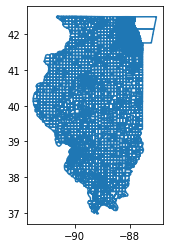

In [84]:
vest_shp.boundary.plot()

# Loading, Combining Election Results

## Load County Fips File

In [85]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Illinois"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Governor Results

In [86]:
gov_results = pd.read_csv('./raw-from-source/SOS/54-180-GOVERNOR AND LIEUTENANT GOVERNOR-2018GE.csv')
gov_results.head()

,JurisdictionID,JurisContainerID,JurisName,EISCandidateID,CandidateName,EISContestID,ContestName,PrecinctName,Registration,EISPartyID,PartyName,VoteCount
0,108,48,CITY OF GALESBURG,110,GRAYSON KASH JACKSON,180,GOVERNOR AND LIEUTENANT GOVERNOR,PRECINCT 18,704,19,LIBERTARIAN,7
1,108,48,CITY OF GALESBURG,115,"WILLIAM ""SAM"" McCANN",180,GOVERNOR AND LIEUTENANT GOVERNOR,PRECINCT 18,704,32,CONSERVATIVE,27
2,108,48,CITY OF GALESBURG,105,JB PRITZKER,180,GOVERNOR AND LIEUTENANT GOVERNOR,PRECINCT 18,704,11,DEMOCRATIC,212
3,108,48,CITY OF GALESBURG,100,BRUCE RAUNER,180,GOVERNOR AND LIEUTENANT GOVERNOR,PRECINCT 18,704,12,REPUBLICAN,121
4,108,48,CITY OF GALESBURG,110,GRAYSON KASH JACKSON,180,GOVERNOR AND LIEUTENANT GOVERNOR,PRECINCT 12,804,19,LIBERTARIAN,7


In [87]:
gov_results = gov_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
gov_results.reset_index(inplace = True)
gov_results.head()

JurisdictionID JurisName      PrecinctName  \
ContestName                                                
CandidateName                                              
0                          1     ADAMS           BEVERLY   
1                          1     ADAMS            BURTON   
2                          1     ADAMS  CAMP POINT PCT 1   
3                          1     ADAMS  CAMP POINT PCT 2   
4                          1     ADAMS           CLAYTON   

                                     VoteCount                       \
ContestName   GOVERNOR AND LIEUTENANT GOVERNOR                        
CandidateName                     BRUCE RAUNER GRAYSON KASH JACKSON   
0                                        102.0                  4.0   
1                                        309.0                 12.0   
2                                        202.0                  9.0   
3                                        250.0                 15.0   
4                                        210.0                 11.0   

                                                                           
ContestName                                                                
CandidateName JB PRITZKER WILLIAM "SAM" McCANN WRITE-IN Write-In Write-in  
0                    20.0                 21.0      NaN      NaN      NaN  
1                    51.0                 37.0      NaN      NaN      NaN  
2                    42.0                 32.0      NaN      NaN      NaN  
3                    41.0                 38.0      NaN      NaN      NaN  
4                    74.0                 51.0      NaN      NaN      NaN

In [88]:
gov_results.columns = ['JurisdictionID','JurisName','PrecinctName','G18GOVRRAU','G18GOVLJAC','G18GOVDPRI','G18GOVCMCC','wi1','wi2','wi3']
gov_results.drop(columns = ['wi1','wi2','wi3'], inplace = True)

In [89]:
gov_results.head()

,JurisdictionID,JurisName,PrecinctName,G18GOVRRAU,G18GOVLJAC,G18GOVDPRI,G18GOVCMCC
0,1,ADAMS,BEVERLY,102.0,4.0,20.0,21.0
1,1,ADAMS,BURTON,309.0,12.0,51.0,37.0
2,1,ADAMS,CAMP POINT PCT 1,202.0,9.0,42.0,32.0
3,1,ADAMS,CAMP POINT PCT 2,250.0,15.0,41.0,38.0
4,1,ADAMS,CLAYTON,210.0,11.0,74.0,51.0


## Attorney General Results

In [90]:
atg_results = pd.read_csv('./raw-from-source/SOS/54-190-ATTORNEY GENERAL-2018GE.csv')
atg_results = atg_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
atg_results.reset_index(inplace = True)
atg_results.head()

JurisdictionID JurisName      PrecinctName        VoteCount  \
ContestName                                              ATTORNEY GENERAL   
CandidateName                                                 BUBBA HARSY   
0                          1     ADAMS           BEVERLY              4.0   
1                          1     ADAMS            BURTON              9.0   
2                          1     ADAMS  CAMP POINT PCT 1              5.0   
3                          1     ADAMS  CAMP POINT PCT 2              8.0   
4                          1     ADAMS           CLAYTON              8.0   

                                        
ContestName                             
CandidateName ERIKA HAROLD KWAME RAOUL  
0                    123.0        21.0  
1                    356.0        42.0  
2                    245.0        37.0  
3                    297.0        34.0  
4                    278.0        58.0

In [91]:
atg_results.columns = ['JurisdictionID','JurisName','PrecinctName','G18ATGLHAR','G18ATGRHAR','G18ATGDRAO']
atg_results.head()

,JurisdictionID,JurisName,PrecinctName,G18ATGLHAR,G18ATGRHAR,G18ATGDRAO
0,1,ADAMS,BEVERLY,4.0,123.0,21.0
1,1,ADAMS,BURTON,9.0,356.0,42.0
2,1,ADAMS,CAMP POINT PCT 1,5.0,245.0,37.0
3,1,ADAMS,CAMP POINT PCT 2,8.0,297.0,34.0
4,1,ADAMS,CLAYTON,8.0,278.0,58.0


## Secretary of State Results

In [92]:
sos_results = pd.read_csv('./raw-from-source/SOS/54-200-SECRETARY OF STATE-2018GE.csv')
sos_results = sos_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
sos_results.reset_index(inplace = True)
sos_results.head()

JurisdictionID JurisName      PrecinctName          VoteCount  \
ContestName                                              SECRETARY OF STATE   
CandidateName                                                 JASON HELLAND   
0                          1     ADAMS           BEVERLY              102.0   
1                          1     ADAMS            BURTON              261.0   
2                          1     ADAMS  CAMP POINT PCT 1              182.0   
3                          1     ADAMS  CAMP POINT PCT 2              225.0   
4                          1     ADAMS           CLAYTON              192.0   

                                        
ContestName                             
CandidateName JESSE WHITE STEVE DUTNER  
0                    42.0          3.0  
1                   147.0          1.0  
2                   100.0          6.0  
3                   111.0          7.0  
4                   147.0          9.0

In [93]:
sos_results.columns = ['JurisdictionID','JurisName','PrecinctName','G18SOSRHEL','G18SOSDWHI','G18SOSLDUT']
sos_results.head()

,JurisdictionID,JurisName,PrecinctName,G18SOSRHEL,G18SOSDWHI,G18SOSLDUT
0,1,ADAMS,BEVERLY,102.0,42.0,3.0
1,1,ADAMS,BURTON,261.0,147.0,1.0
2,1,ADAMS,CAMP POINT PCT 1,182.0,100.0,6.0
3,1,ADAMS,CAMP POINT PCT 2,225.0,111.0,7.0
4,1,ADAMS,CLAYTON,192.0,147.0,9.0


## Comptroller Results

In [94]:
com_results = pd.read_csv('./raw-from-source/SOS/54-210-COMPTROLLER-2018GE.csv')
com_results = com_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
com_results.reset_index(inplace = True)
com_results.head()

JurisdictionID JurisName      PrecinctName   VoteCount  \
ContestName                                              COMPTROLLER   
CandidateName                                            CLAIRE BALL   
0                          1     ADAMS           BEVERLY         5.0   
1                          1     ADAMS            BURTON         5.0   
2                          1     ADAMS  CAMP POINT PCT 1         9.0   
3                          1     ADAMS  CAMP POINT PCT 2        14.0   
4                          1     ADAMS           CLAYTON        10.0   

                                                         
ContestName                                              
CandidateName DARLENE SENGER SUSANA A. MENDOZA Write-In  
0                      113.0              28.0      NaN  
1                      315.0              86.0      NaN  
2                      215.0              62.0      NaN  
3                      265.0              62.0      NaN  
4                      236.0              99.0      NaN

In [95]:
com_results.columns = ['JurisdictionID','JurisName','PrecinctName','G18COMLBAL','G18COMRSEN','G18COMDMEN','wi1']
com_results.drop(columns=['wi1'],inplace=True)
com_results.head()

,JurisdictionID,JurisName,PrecinctName,G18COMLBAL,G18COMRSEN,G18COMDMEN
0,1,ADAMS,BEVERLY,5.0,113.0,28.0
1,1,ADAMS,BURTON,5.0,315.0,86.0
2,1,ADAMS,CAMP POINT PCT 1,9.0,215.0,62.0
3,1,ADAMS,CAMP POINT PCT 2,14.0,265.0,62.0
4,1,ADAMS,CLAYTON,10.0,236.0,99.0


## Treasurer Results

In [96]:
tre_results = pd.read_csv('./raw-from-source/SOS/54-220-TREASURER-2018GE.csv')
tre_results = tre_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
tre_results.reset_index(inplace = True)
tre_results.head()

JurisdictionID JurisName      PrecinctName VoteCount  \
ContestName                                              TREASURER   
CandidateName                                            JIM DODGE   
0                          1     ADAMS           BEVERLY     115.0   
1                          1     ADAMS            BURTON     311.0   
2                          1     ADAMS  CAMP POINT PCT 1     223.0   
3                          1     ADAMS  CAMP POINT PCT 2     268.0   
4                          1     ADAMS           CLAYTON     243.0   

                                                            
ContestName                                                 
CandidateName MICHAEL LEHENEY MICHAEL W. FRERICHS Write-In  
0                         4.0                28.0      NaN  
1                         3.0                88.0      NaN  
2                         9.0                50.0      NaN  
3                        11.0                58.0      NaN  
4                         7.0                92.0      NaN

In [97]:
tre_results.columns = ['JurisdictionID','JurisName','PrecinctName','G18TRERDOD','G18TRELLEH','G18TREDFRE','wi1']
tre_results.drop(columns=['wi1'],inplace=True)
tre_results.head()

,JurisdictionID,JurisName,PrecinctName,G18TRERDOD,G18TRELLEH,G18TREDFRE
0,1,ADAMS,BEVERLY,115.0,4.0,28.0
1,1,ADAMS,BURTON,311.0,3.0,88.0
2,1,ADAMS,CAMP POINT PCT 1,223.0,9.0,50.0
3,1,ADAMS,CAMP POINT PCT 2,268.0,11.0,58.0
4,1,ADAMS,CLAYTON,243.0,7.0,92.0


## Combine Results

In [98]:
election_results = gov_results.merge(atg_results, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False).merge(sos_results, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False).merge(com_results, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False).merge(tre_results, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False)

In [99]:
election_results.columns

Index(['JurisdictionID_x', 'JurisName', 'PrecinctName', 'G18GOVRRAU',
       'G18GOVLJAC', 'G18GOVDPRI', 'G18GOVCMCC', 'JurisdictionID_y',
       'G18ATGLHAR', 'G18ATGRHAR', 'G18ATGDRAO', 'JurisdictionID_x',
       'G18SOSRHEL', 'G18SOSDWHI', 'G18SOSLDUT', 'JurisdictionID_y',
       'G18COMLBAL', 'G18COMRSEN', 'G18COMDMEN', 'JurisdictionID',
       'G18TRERDOD', 'G18TRELLEH', 'G18TREDFRE'],
      dtype='object')

In [100]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(election_results[['JurisName']].drop_duplicates())

                    JurisName
0                       ADAMS
74                  ALEXANDER
85                       BOND
110                     BOONE
148                     BROWN
162                    BUREAU
212                   CALHOUN
219                   CARROLL
241                      CASS
262                 CHAMPAIGN
380                 CHRISTIAN
410                     CLARK
433                      CLAY
455                   CLINTON
494                     COLES
538                      COOK
2137                 CRAWFORD
2161               CUMBERLAND
2173                   DeKALB
2238                   DeWITT
2261                  DOUGLAS
2278                   DuPAGE
3208                    EDGAR
3239                  EDWARDS
3251                EFFINGHAM
3288                  FAYETTE
3316                     FORD
3338                 FRANKLIN
3373                   FULTON
3430                 GALLATIN
3441                   GREENE
3463                   GRUNDY
3503      

In [101]:
election_results = election_results.fillna(0)

Going to only validate the election result totals for now, and not deal with assigning counties to cities that split counties and distributing county wide votes. 

# Validating Election Results

## Statewide

In [102]:
vest_shp.columns

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'NAME20', 'G18GOVDPRI',
       'G18GOVRRAU', 'G18GOVCMCC', 'G18GOVLJAC', 'G18ATGDRAO', 'G18ATGRHAR',
       'G18ATGLHAR', 'G18SOSDWHI', 'G18SOSRHEL', 'G18SOSLDUT', 'G18COMDMEN',
       'G18COMRSEN', 'G18COMLBAL', 'G18TREDFRE', 'G18TRERDOD', 'G18TRELLEH',
       'geometry'],
      dtype='object')

In [103]:
data_columns = ['G18GOVDPRI',
       'G18GOVRRAU', 'G18GOVCMCC', 'G18GOVLJAC', 'G18ATGDRAO', 'G18ATGRHAR',
       'G18ATGLHAR', 'G18SOSDWHI', 'G18SOSRHEL', 'G18SOSLDUT', 'G18COMDMEN',
       'G18COMRSEN', 'G18COMLBAL', 'G18TREDFRE', 'G18TRERDOD', 'G18TRELLEH']

def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))
            
statewide_totals_check(vest_shp,election_results,data_columns)

***Statewide Totals Check***
G18GOVDPRI is equal 	VEST / RDH: 2479746
G18GOVRRAU is equal 	VEST / RDH: 1765751
G18GOVCMCC is equal 	VEST / RDH: 192527
G18GOVLJAC is equal 	VEST / RDH: 109518
G18ATGDRAO is equal 	VEST / RDH: 2488326
G18ATGRHAR is equal 	VEST / RDH: 1944142
G18ATGLHAR is equal 	VEST / RDH: 115941
G18SOSDWHI is equal 	VEST / RDH: 3120207
G18SOSRHEL is equal 	VEST / RDH: 1336079
G18SOSLDUT is equal 	VEST / RDH: 114556
G18COMDMEN is equal 	VEST / RDH: 2716853
G18COMRSEN is equal 	VEST / RDH: 1678346
G18COMLBAL is equal 	VEST / RDH: 140543
G18TREDFRE is equal 	VEST / RDH: 2593816
G18TRERDOD is equal 	VEST / RDH: 1750897
G18TRELLEH is equal 	VEST / RDH: 155256


## County-by-county

In [104]:
#There are 6 cities referenced here
print(election_results['JurisName'].unique())

['ADAMS' 'ALEXANDER' 'BOND' 'BOONE' 'BROWN' 'BUREAU' 'CALHOUN' 'CARROLL'
 'CASS' 'CHAMPAIGN' 'CHRISTIAN' 'CLARK' 'CLAY' 'CLINTON' 'COLES' 'COOK'
 'CRAWFORD' 'CUMBERLAND' 'DeKALB' 'DeWITT' 'DOUGLAS' 'DuPAGE' 'EDGAR'
 'EDWARDS' 'EFFINGHAM' 'FAYETTE' 'FORD' 'FRANKLIN' 'FULTON' 'GALLATIN'
 'GREENE' 'GRUNDY' 'HAMILTON' 'HANCOCK' 'HARDIN' 'HENDERSON' 'HENRY'
 'IROQUOIS' 'JACKSON' 'JASPER' 'JEFFERSON' 'JERSEY' 'JoDAVIESS' 'JOHNSON'
 'KANE' 'KANKAKEE' 'KENDALL' 'KNOX' 'LAKE' 'LaSALLE' 'LAWRENCE' 'LEE'
 'LIVINGSTON' 'LOGAN' 'MACON' 'MACOUPIN' 'MADISON' 'MARION' 'MARSHALL'
 'MASON' 'MASSAC' 'McDONOUGH' 'McHENRY' 'McLEAN' 'MENARD' 'MERCER'
 'MONROE' 'MONTGOMERY' 'MORGAN' 'MOULTRIE' 'OGLE' 'PEORIA' 'PERRY' 'PIATT'
 'PIKE' 'POPE' 'PULASKI' 'PUTNAM' 'RANDOLPH' 'RICHLAND' 'ROCK ISLAND'
 'SALINE' 'SANGAMON' 'SCHUYLER' 'SCOTT' 'SHELBY' 'STARK' 'ST. CLAIR'
 'STEPHENSON' 'TAZEWELL' 'UNION' 'VERMILION' 'WABASH' 'WARREN'
 'WASHINGTON' 'WAYNE' 'WHITE' 'WHITESIDE' 'WILL' 'WILLIAMSON' 'WINNEBAGO'
 'WOODFORD' 

All but one of these cities (Chicago) is in one county. Look up these cities and assign them to the correct county. 
Chicago is split across two counties, but the majority of the city is in Cook County. To start, we will assign the precincts to Cook County, compare to VEST and the official county counts and change if needed


In [105]:
#Make a dictionary to assign counties
juris_name_changes_dict = {'CITY OF BLOOMINGTON':'McLEAN',
'CITY OF CHICAGO':'COOK',
'CITY OF DANVILLE':'VERMILION',
'CITY OF EAST ST. LOUIS':'ST. CLAIR',
'CITY OF GALESBURG':'KNOX',
'CITY OF ROCKFORD':'WINNEBAGO'}

#Keep a copy of the original column in case it's needed
election_results['JurisName_unmod'] = election_results['JurisName']

#Add in the county data and change everything to uppercase
election_results['JurisName'] = election_results['JurisName'].map(juris_name_changes_dict).fillna(election_results['JurisName'])
election_results['JurisName'] = election_results['JurisName'].str.upper()

#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Illinois"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)
fips_file["County Name"]=fips_file["County Name"].str.upper()

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

#Modify the names slightly to match the fips file format
name_mods = {'DEKALB':'DE KALB',
'DUPAGE':"DU PAGE",
'JODAVIESS':"JO DAVIESS",
'LASALLE':"LA SALLE",
'ST. CLAIR':"ST CLAIR"
}

election_results['JurisName'] = election_results['JurisName'].map(name_mods).fillna(election_results['JurisName'])

#Make to the county FIPS
election_results['COUNTYFP20'] = election_results['JurisName'].map(fips_dict).fillna(election_results['JurisName'])

#Print out the FIPs values
election_results['COUNTYFP20'].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', '103', '105', '107',
       '115', '117', '119', '121', '123', '125', '127', '109', '111',
       '113', '129', '131', '133', '135', '137', '139', '141', '143',
       '145', '147', '149', '151', '153', '155', '157', '159', '161',
       '165', '167', '169', '171', '173', '175', '163', '177', '179',
       '181', '183', '185', '187', '189', '191', '193', '195', '197',
       '199', '201', '203'], dtype=object)

In [107]:
data_columns = ['G18GOVDPRI',
       'G18GOVRRAU', 'G18GOVCMCC', 'G18GOVLJAC', 'G18ATGDRAO', 'G18ATGRHAR',
       'G18ATGLHAR', 'G18SOSDWHI', 'G18SOSRHEL', 'G18SOSLDUT', 'G18COMDMEN',
       'G18COMRSEN', 'G18COMLBAL', 'G18TREDFRE', 'G18TRERDOD', 'G18TRELLEH']

def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                    
county_totals_check(vest_shp,election_results,data_columns,"COUNTYFP20",True)

***Countywide Totals Check***

G18GOVDPRI is equal across all counties
	001: 6176 votes
	003: 1154 votes
	005: 2370 votes
	007: 6970 votes
	009: 402 votes
	011: 5290 votes
	013: 795 votes
	015: 1804 votes
	017: 1483 votes
	019: 43257 votes
	021: 3702 votes
	023: 1823 votes
	025: 1104 votes
	027: 3874 votes
	029: 5964 votes
	031: 1262334 votes
	033: 2105 votes
	035: 969 votes
	037: 17016 votes
	039: 1539 votes
	041: 1416 votes
	043: 176556 votes
	045: 1637 votes
	047: 453 votes
	049: 2840 votes
	051: 1951 votes
	053: 971 votes
	055: 5227 votes
	057: 5650 votes
	059: 779 votes
	061: 1026 votes
	063: 7319 votes
	065: 881 votes
	067: 1950 votes
	069: 558 votes
	071: 940 votes
	073: 6997 votes
	075: 1858 votes
	077: 10597 votes
	079: 1170 votes
	081: 4408 votes
	083: 2569 votes
	085: 3602 votes
	087: 1427 votes
	089: 81310 votes
	091: 14595 votes
	093: 20990 votes
	095: 8292 votes
	097: 128603 votes
	099: 17397 votes
	101: 1380 votes
	103: 4995 votes
	105: 3345 votes
	107: 2546 votes
	109: 

	167: 35043 votes
	169: 887 votes
	171: 461 votes
	173: 1970 votes
	175: 562 votes
	177: 5764 votes
	179: 17139 votes
	181: 2467 votes
	183: 7119 votes
	185: 951 votes
	187: 2254 votes
	189: 1325 votes
	191: 883 votes
	193: 1312 votes
	195: 9387 votes
	197: 124864 votes
	199: 8556 votes
	201: 43285 votes
	203: 4098 votes
G18ATGRHAR is equal across all counties
	001: 17910 votes
	003: 1064 votes
	005: 3992 votes
	007: 10445 votes
	009: 1410 votes
	011: 7686 votes
	013: 1310 votes
	015: 3811 votes
	017: 2792 votes
	019: 36881 votes
	021: 8737 votes
	023: 4270 votes
	025: 3655 votes
	027: 9899 votes
	029: 10867 votes
	031: 452625 votes
	033: 4790 votes
	035: 3295 votes
	037: 17242 votes
	039: 4510 votes
	041: 4987 votes
	043: 171711 votes
	045: 4405 votes
	047: 1942 votes
	049: 11140 votes
	051: 5720 votes
	053: 3963 votes
	055: 9818 votes
	057: 6629 votes
	059: 1224 votes
	061: 2897 votes
	063: 11100 votes
	065: 2432 votes
	067: 4964 votes
	069: 1098 votes
	071: 1566 votes
	073: 11627 vo

	097: 5863 votes
	099: 1037 votes
	101: 93 votes
	103: 359 votes
	105: 264 votes
	107: 266 votes
	109: 237 votes
	111: 3167 votes
	113: 2179 votes
	115: 917 votes
	117: 499 votes
	119: 3010 votes
	121: 257 votes
	123: 113 votes
	125: 160 votes
	127: 98 votes
	129: 184 votes
	131: 174 votes
	133: 323 votes
	135: 300 votes
	137: 284 votes
	139: 87 votes
	141: 494 votes
	143: 1673 votes
	145: 174 votes
	147: 220 votes
	149: 161 votes
	151: 30 votes
	153: 28 votes
	155: 53 votes
	157: 214 votes
	159: 132 votes
	161: 1170 votes
	163: 2387 votes
	165: 200 votes
	167: 2908 votes
	169: 101 votes
	171: 41 votes
	173: 191 votes
	175: 76 votes
	177: 385 votes
	179: 1482 votes
	181: 148 votes
	183: 584 votes
	185: 81 votes
	187: 122 votes
	189: 157 votes
	191: 98 votes
	193: 109 votes
	195: 513 votes
	197: 6000 votes
	199: 595 votes
	201: 2647 votes
	203: 393 votes
G18COMDMEN is equal across all counties
	001: 7665 votes
	003: 1195 votes
	005: 2549 votes
	007: 7778 votes
	009: 598 votes
	011: 6065

	035: 2976 votes
	037: 16169 votes
	039: 3797 votes
	041: 3720 votes
	043: 163146 votes
	045: 3855 votes
	047: 1900 votes
	049: 10250 votes
	051: 5369 votes
	053: 3121 votes
	055: 9115 votes
	057: 5610 votes
	059: 1126 votes
	061: 2718 votes
	063: 10441 votes
	065: 2255 votes
	067: 4551 votes
	069: 1064 votes
	071: 1465 votes
	073: 10858 votes
	075: 7011 votes
	077: 8620 votes
	079: 2928 votes
	081: 8699 votes
	083: 5400 votes
	085: 4989 votes
	087: 3621 votes
	089: 77165 votes
	091: 18707 votes
	093: 21367 votes
	095: 8313 votes
	097: 105304 votes
	099: 19804 votes
	101: 2887 votes
	103: 6766 votes
	105: 7854 votes
	107: 6281 votes
	109: 5303 votes
	111: 59065 votes
	113: 32341 votes
	115: 19287 votes
	117: 9730 votes
	119: 51610 votes
	121: 7989 votes
	123: 2878 votes
	125: 2576 votes
	127: 3661 votes
	129: 3077 votes
	131: 3723 votes
	133: 9739 votes
	135: 5957 votes
	137: 6565 votes
	139: 3028 votes
	141: 11339 votes
	143: 27916 votes
	145: 4945 votes
	147: 4036 votes
	149: 4208 vo

Note: It looks like we assigned the Chicago precincts in the same way that VEST did. The final step is to make sure whether, based on shapefiles, that VEST assigned these precincts correctly.

### Load in shapefile from census

In [68]:
shp_list = []
for fips in list(fips_file["FIPS County"]):
    file_path = "./raw-from-source/CENSUS/tl_2020_17_all/tl_2020_17"+str(fips)+"_vtd20.shp"
    county_val = gp.read_file(file_path)
    shp_list.append(county_val)
full_shapefiles_census = pd.concat(shp_list, axis=0, ignore_index=True)

In [69]:
# Dissolve on county to get a full county map
counties_source = full_shapefiles_census.dissolve("COUNTYFP20")
counties_vest = vest_shp.dissolve("COUNTYFP20")

<AxesSubplot:>

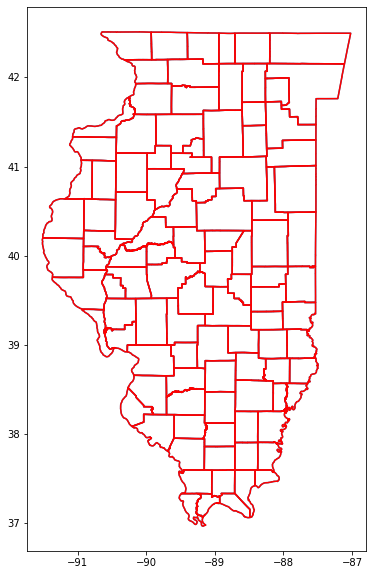

In [70]:
# Compare the census county map to VEST's
ax = counties_source.boundary.plot(figsize=(10,10))
counties_vest.boundary.plot(ax=ax,color="red")

The county shapes seem to match and our Chicago precinct assignment (which matches what VEST has) seems to be justified.

## Precinct-by-precinct

In [71]:
#Create unique_ID columns for both the election results file and the VEST file
election_results["unique_ID"] = election_results["COUNTYFP20"]+"-"+election_results["PrecinctName"].str.upper()
election_results["unique_ID"].value_counts(dropna=False)

vest_shp["unique_ID"] = vest_shp["COUNTYFP20"]+"-"+vest_shp["NAME20"].str.upper()
vest_shp["unique_ID"].value_counts(dropna=False)

161-MOLINE 4              1
017-SANGAMON VALLEY 12    1
031-LEMONT 6              1
113-CROPSEY 01            1
031-ORLAND 2              1
                         ..
187-MONMOUTH 4            1
031-WD 16 PCT 21          1
031-PROVISO 78            1
043-YORK 87               1
075-MARTINTON             1
Name: unique_ID, Length: 10116, dtype: int64

In [72]:
#Perform a join
join = pd.merge(election_results,vest_shp,how="outer",on="unique_ID",indicator=True)
print(join["_merge"].value_counts())

#election_only = join[join["_merge"]=="left_only"]
#vest_only = join[join["_merge"]=="right_only"]
#election_only.to_csv("./election_only.csv")
#vest_only.to_csv("./vest_only.csv")

right_only    6188
left_only     6186
both          3928
Name: _merge, dtype: int64


In [73]:
#Create a dictionary to slightly modify the ID's to match
election_vest_id_changes_dict = {'001-ELLINGTON PCT 1': '001-ELLINGTON 1', '001-MELROSE PCT 1': '001-MELROSE 1', '001-ELLINGTON PCT 2': '001-ELLINGTON 2', '001-MELROSE PCT 6': '001-MELROSE 6', '001-PAYSON PCT 1': '001-PAYSON 1', '001-MELROSE PCT 4': '001-MELROSE 4', '001-MELROSE PCT 3': '001-MELROSE 3', '001-ELLINGTON PCT 3': '001-ELLINGTON 3', '001-CAMP POINT PCT 2': '001-CAMP POINT 2', '001-MELROSE PCT 5': '001-MELROSE 5', '001-MENDON PCT 1': '001-MENDON 1', '001-CAMP POINT PCT 1': '001-CAMP POINT 1', '001-MENDON PCT 2': '001-MENDON 2', '001-PAYSON PCT 2': '001-PAYSON 2', '005-CENTRAL 1-A': '005-CENTRAL 1A', '007-CALEDONIA  1': '007-CALEDONIA 1', '007-CALEDONIA  2': '007-CALEDONIA 2', '007-CALEDONIA  3': '007-CALEDONIA 3', '007-FLORA  1': '007-FLORA 1', '007-FLORA  2': '007-FLORA 2', '007-BELVIDERE 04': '007-BELVIDERE 4', '007-BELVIDERE 09': '007-BELVIDERE 9', '007-LE ROY': '007-LEROY', '007-BELVIDERE 08': '007-BELVIDERE 8', '007-BELVIDERE 07': '007-BELVIDERE 7', '007-BELVIDERE 02': '007-BELVIDERE 2', '007-BELVIDERE 06': '007-BELVIDERE 6', '007-BELVIDERE 01': '007-BELVIDERE 1', '007-BELVIDERE 05': '007-BELVIDERE 5', '007-BELVIDERE 03': '007-BELVIDERE 3', '009-MT. STERLING 1': '009-MT STERLING 1', '009-MT. STERLING 2': '009-MT STERLING 2', '009-COOPERSTOWN TWP.': '009-COOPERSTOWN', '009-MT. STERLING 4': '009-MT STERLING 4', '009-VERSAILLES TWP. 2': '009-VERSAILLES 2', '009-LEE TWP.': '009-LEE', '009-MT. STERLING 5': '009-MT STERLING 5', '009-PEA RIDGE TWP.': '009-PEA RIDGE', '009-VERSAILLES TWP. 1': '009-VERSAILLES 1', '009-MT. STERLING 3': '009-MT STERLING 3', '009-ELKHORN TWP.': '009-ELKHORN', '009-MISSOURI TWP.': '009-MISSOURI', '009-BUCKHORN TWP': '009-BUCKHORN', '009-RIPLEY TWP.': '009-RIPLEY', '013-HARDIN PRECINCT': '013-HARDIN', '013-POINT PRECINCT': '013-POINT', '013-RICHWOODS PRECINCT': '013-RICHWOODS', '013-CRATER-CARLIN PCT.': '013-CRATER-CARLIN', '013-HAMBURG PRECINCT': '013-HAMBURG', '013-GILEAD PRECINCT': '013-GILEAD', '013-BELLEVIEW PRECINCT': '013-BELLEVIEW', '015-CHERRY GROVE-SHANNON 2': '015-CHERRY GROVE/SHANNON 2', '015-ROCK CREEK-LIMA 2': '015-ROCK CREEK/LIMA 2', '015-CHERRY GROVE-SHANNON 1': '015-CHERRY GROVE/SHANNON 1', '015-ROCK CREEK-LIMA 1': '015-ROCK CREEK/LIMA 1', '019-CITY OF CHAMPAIGN 4': '019-CITY OF CHAMPAIGN 04', '019-CITY OF CHAMPAIGN 5': '019-CITY OF CHAMPAIGN 05', '019-CITY OF CHAMPAIGN 8': '019-CITY OF CHAMPAIGN 08', '019-CITY OF CHAMPAIGN 6': '019-CITY OF CHAMPAIGN 06', '019-CITY OF CHAMPAIGN 3': '019-CITY OF CHAMPAIGN 03', '019-CITY OF CHAMPAIGN 7': '019-CITY OF CHAMPAIGN 07', '019-CITY OF CHAMPAIGN 9': '019-CITY OF CHAMPAIGN 09', '019-CITY OF CHAMPAIGN 2': '019-CITY OF CHAMPAIGN 02', '019-CITY OF CHAMPAIGN 1': '019-CITY OF CHAMPAIGN 01', '021-TAYLORVILLE #4': '021-TAYLORVILLE 4', '021-PANA #2': '021-PANA 2', '021-TAYLORVILLE #5': '021-TAYLORVILLE 5', '021-TAYLORVILLE #8': '021-TAYLORVILLE 8', '021-TAYLORVILLE #3': '021-TAYLORVILLE 3', '021-TAYLORVILLE #1': '021-TAYLORVILLE 1', '021-TAYLORVILLE #2': '021-TAYLORVILLE 2', '021-TAYLORVILLE #7': '021-TAYLORVILLE 7', '021-PANA #3': '021-PANA 3', '021-SOUTH FORK #1': '021-SOUTH FORK 1', '021-PANA #1': '021-PANA 1', '021-TAYLORVILLE #6': '021-TAYLORVILLE 6', '021-SOUTH FORK #2': '021-SOUTH FORK 2', '021-PANA #4': '021-PANA 4', '021-SOUTH FORK #3': '021-SOUTH FORK 3', '021-PANA #5': '021-PANA 5', '025-HARTER 5': '025-HARTER V', '025-LOUISVILLE 2': '025-LOUISVILLE II', '025-HARTER 3': '025-HARTER III', '025-LOUISVILLE 1': '025-LOUISVILLE I', '025-HARTER 6': '025-HARTER VI', '025-HARTER 4': '025-HARTER IV', '025-CLAY CITY 1': '025-CLAY CITY I', '025-HARTER 7': '025-HARTER VII', '025-HARTER 1': '025-HARTER I', '025-HARTER 2': '025-HARTER II', '025-CLAY CITY 2': '025-CLAY CITY II', '025-PIXLEY 2': '025-PIXLEY II', '025-LARKINSBURG 1': '025-LARKINSBURG I', '025-LARKINSBURG 2': '025-LARKINSBURG II', '025-PIXLEY 1': '025-PIXLEY I', '037-KINGSTON 01': '037-KINGSTON 1', '037-SQUAW GROVE 01': '037-SQUAW GROVE 1', '037-GENOA 01': '037-GENOA 1', '037-SOMONAUK 01': '037-SOMONAUK 1', '037-FRANKLIN 01': '037-FRANKLIN 1', '037-GENOA 02': '037-GENOA 2', '037-CORTLAND 02': '037-CORTLAND 2', '037-SYCAMORE 03': '037-SYCAMORE 3', '037-CLINTON 01': '037-CLINTON 1', '037-SANDWICH 05': '037-SANDWICH 5', '037-SYCAMORE 09': '037-SYCAMORE 9', '037-SHABBONA 01': '037-SHABBONA 1', '037-CORTLAND 01': '037-CORTLAND 1', '037-SYCAMORE 07': '037-SYCAMORE 7', '037-MALTA 01': '037-MALTA 1', '037-SYCAMORE 02': '037-SYCAMORE 2', '037-CORTLAND 08': '037-CORTLAND 8', '037-DEKALB 09': '037-DEKALB 9', '037-SANDWICH 02': '037-SANDWICH 2', '037-CORTLAND 06': '037-CORTLAND 6', '037-DEKALB 03': '037-DEKALB 3', '037-SANDWICH 04': '037-SANDWICH 4', '037-DEKALB 08': '037-DEKALB 8', '037-MAYFIELD 01': '037-MAYFIELD 1', '037-CORTLAND 03': '037-CORTLAND 3', '037-SANDWICH 01': '037-SANDWICH 1', '037-SANDWICH 03': '037-SANDWICH 3', '037-SYCAMORE 06': '037-SYCAMORE 6', '037-CORTLAND 07': '037-CORTLAND 7', '037-DEKALB 07': '037-DEKALB 7', '037-AFTON 01': '037-AFTON 1', '037-SYCAMORE 01': '037-SYCAMORE 1', '037-SYCAMORE 04': '037-SYCAMORE 4', '037-SYCAMORE 08': '037-SYCAMORE 8', '037-PIERCE 01': '037-PIERCE 1', '037-SOUTH GROVE 01': '037-SOUTH GROVE 1', '037-SYCAMORE 05': '037-SYCAMORE 5', '037-CORTLAND 05': '037-CORTLAND 5', '037-CORTLAND 04': '037-CORTLAND 4', '037-DEKALB 02': '037-DEKALB 2', '037-DEKALB 06': '037-DEKALB 6', '037-DEKALB 05': '037-DEKALB 5', '037-MILAN 01': '037-MILAN 1', '037-VICTOR 01': '037-VICTOR 1', '037-PAW PAW 01': '037-PAW PAW 1', '037-DEKALB 01': '037-DEKALB 1', '037-DEKALB 04': '037-DEKALB 4', '043-MILTON  095': '043-MILTON 95', '043-DOWNERS GROVE  037': '043-DOWNERS GROVE 37', '043-MILTON  025': '043-MILTON 25', '043-DOWNERS GROVE  083': '043-DOWNERS GROVE 83', '043-DOWNERS GROVE  087': '043-DOWNERS GROVE 87', '043-DOWNERS GROVE  007': '043-DOWNERS GROVE 7', '043-DOWNERS GROVE  061': '043-DOWNERS GROVE 61', '043-DOWNERS GROVE  005': '043-DOWNERS GROVE 5', '043-DOWNERS GROVE  022': '043-DOWNERS GROVE 22', '043-DOWNERS GROVE  036': '043-DOWNERS GROVE 36', '043-DOWNERS GROVE  082': '043-DOWNERS GROVE 82', '043-DOWNERS GROVE  038': '043-DOWNERS GROVE 38', '043-LISLE  098': '043-LISLE 98', '043-MILTON  090': '043-MILTON 90', '043-WAYNE  001': '043-WAYNE 1', '043-YORK  133': '043-YORK 133', '043-MILTON  087': '043-MILTON 87', '043-DOWNERS GROVE  035': '043-DOWNERS GROVE 35', '043-BLOOMINGDALE  008': '043-BLOOMINGDALE 8', '043-BLOOMINGDALE  045': '043-BLOOMINGDALE 45', '043-MILTON  075': '043-MILTON 75', '043-DOWNERS GROVE  004': '043-DOWNERS GROVE 4', '043-WINFIELD  019': '043-WINFIELD 19', '043-DOWNERS GROVE  025': '043-DOWNERS GROVE 25', '043-DOWNERS GROVE  089': '043-DOWNERS GROVE 89', '043-DOWNERS GROVE  024': '043-DOWNERS GROVE 24', '043-WAYNE  037': '043-WAYNE 37', '043-MILTON  079': '043-MILTON 79', '043-WAYNE  048': '043-WAYNE 48', '043-MILTON  059': '043-MILTON 59', '043-MILTON  054': '043-MILTON 54', '043-NAPERVILLE  061': '043-NAPERVILLE 61', '043-YORK  121': '043-YORK 121', '043-MILTON  043': '043-MILTON 43', '043-DOWNERS GROVE  008': '043-DOWNERS GROVE 8', '043-DOWNERS GROVE  084': '043-DOWNERS GROVE 84', '043-DOWNERS GROVE  124': '043-DOWNERS GROVE 124', '043-YORK  116': '043-YORK 116', '043-MILTON  037': '043-MILTON 37', '043-DOWNERS GROVE  011': '043-DOWNERS GROVE 11', '043-DOWNERS GROVE  029': '043-DOWNERS GROVE 29', '043-MILTON  018': '043-MILTON 18', '043-LISLE  010': '043-LISLE 10', '043-YORK  029': '043-YORK 29', '043-WINFIELD  007': '043-WINFIELD 7', '043-MILTON  074': '043-MILTON 74', '043-WINFIELD  002': '043-WINFIELD 2', '043-LISLE  090': '043-LISLE 90', '043-MILTON  109': '043-MILTON 109', '043-DOWNERS GROVE  006': '043-DOWNERS GROVE 6', '043-MILTON  032': '043-MILTON 32', '043-DOWNERS GROVE  149': '043-DOWNERS GROVE 149', '043-NAPERVILLE  010': '043-NAPERVILLE 10', '043-ADDISON  003': '043-ADDISON 3', '043-DOWNERS GROVE  041': '043-DOWNERS GROVE 41', '043-MILTON  128': '043-MILTON 128', '043-MILTON  092': '043-MILTON 92', '043-YORK  030': '043-YORK 30', '043-MILTON  106': '043-MILTON 106', '043-DOWNERS GROVE  003': '043-DOWNERS GROVE 3', '043-NAPERVILLE  028': '043-NAPERVILLE 28', '043-LISLE  059': '043-LISLE 59', '043-DOWNERS GROVE  050': '043-DOWNERS GROVE 50', '043-MILTON  049': '043-MILTON 49', '043-BLOOMINGDALE  032': '043-BLOOMINGDALE 32', '043-DOWNERS GROVE  108': '043-DOWNERS GROVE 108', '043-YORK  070': '043-YORK 70', '043-BLOOMINGDALE  020': '043-BLOOMINGDALE 20', '043-MILTON  107': '043-MILTON 107', '043-YORK  006': '043-YORK 6', '043-LISLE  104': '043-LISLE 104', '043-DOWNERS GROVE  059': '043-DOWNERS GROVE 59', '043-LISLE  031': '043-LISLE 31', '043-LISLE  012': '043-LISLE 12', '043-NAPERVILLE  066': '043-NAPERVILLE 66', '043-MILTON  008': '043-MILTON 8', '043-LISLE  058': '043-LISLE 58', '043-DOWNERS GROVE  107': '043-DOWNERS GROVE 107', '043-MILTON  091': '043-MILTON 91', '043-BLOOMINGDALE  017': '043-BLOOMINGDALE 17', '043-MILTON  039': '043-MILTON 39', '043-MILTON  116': '043-MILTON 116', '043-YORK  106': '043-YORK 106', '043-MILTON  045': '043-MILTON 45', '043-MILTON  055': '043-MILTON 55', '043-LISLE  066': '043-LISLE 66', '043-NAPERVILLE  047': '043-NAPERVILLE 47', '043-YORK  002': '043-YORK 2', '043-BLOOMINGDALE  071': '043-BLOOMINGDALE 71', '043-DOWNERS GROVE  001': '043-DOWNERS GROVE 1', '043-MILTON  084': '043-MILTON 84', '043-NAPERVILLE  033': '043-NAPERVILLE 33', '043-MILTON  004': '043-MILTON 4', '043-BLOOMINGDALE  019': '043-BLOOMINGDALE 19', '043-DOWNERS GROVE  098': '043-DOWNERS GROVE 98', '043-DOWNERS GROVE  064': '043-DOWNERS GROVE 64', '043-LISLE  081': '043-LISLE 81', '043-DOWNERS GROVE  044': '043-DOWNERS GROVE 44', '043-LISLE  075': '043-LISLE 75', '043-WINFIELD  010': '043-WINFIELD 10', '043-LISLE  027': '043-LISLE 27', '043-DOWNERS GROVE  085': '043-DOWNERS GROVE 85', '043-MILTON  058': '043-MILTON 58', '043-DOWNERS GROVE  026': '043-DOWNERS GROVE 26', '043-YORK  085': '043-YORK 85', '043-LISLE  022': '043-LISLE 22', '043-DOWNERS GROVE  095': '043-DOWNERS GROVE 95', '043-MILTON  002': '043-MILTON 2', 
                                 '043-MILTON  100': '043-MILTON 100', '043-YORK  061': '043-YORK 61', '043-WINFIELD  014': '043-WINFIELD 14', '043-BLOOMINGDALE  046': '043-BLOOMINGDALE 46', '043-WAYNE  009': '043-WAYNE 9', '043-YORK  082': '043-YORK 82', '043-LISLE  091': '043-LISLE 91', '043-MILTON  020': '043-MILTON 20', '043-BLOOMINGDALE  012': '043-BLOOMINGDALE 12', '043-DOWNERS GROVE  116': '043-DOWNERS GROVE 116', '043-DOWNERS GROVE  134': '043-DOWNERS GROVE 134', '043-ADDISON  004': '043-ADDISON 4', '043-YORK  036': '043-YORK 36', '043-MILTON  065': '043-MILTON 65', '043-NAPERVILLE  001': '043-NAPERVILLE 1', '043-DOWNERS GROVE  021': '043-DOWNERS GROVE 21', '043-DOWNERS GROVE  066': '043-DOWNERS GROVE 66', '043-YORK  003': '043-YORK 3', '043-ADDISON  046': '043-ADDISON 46', '043-ADDISON  018': '043-ADDISON 18', '043-DOWNERS GROVE  043': '043-DOWNERS GROVE 43', '043-DOWNERS GROVE  002': '043-DOWNERS GROVE 2', '043-DOWNERS GROVE  032': '043-DOWNERS GROVE 32', '043-WAYNE  022': '043-WAYNE 22', '043-DOWNERS GROVE  135': '043-DOWNERS GROVE 135', '043-WINFIELD  012': '043-WINFIELD 12', '043-WINFIELD  038': '043-WINFIELD 38', '043-LISLE  037': '043-LISLE 37', '043-BLOOMINGDALE  055': '043-BLOOMINGDALE 55', '043-MILTON  016': '043-MILTON 16', '043-NAPERVILLE  002': '043-NAPERVILLE 2', '043-WINFIELD  020': '043-WINFIELD 20', '043-DOWNERS GROVE  016': '043-DOWNERS GROVE 16', '043-NAPERVILLE  016': '043-NAPERVILLE 16', '043-MILTON  023': '043-MILTON 23', '043-DOWNERS GROVE  017': '043-DOWNERS GROVE 17', '043-DOWNERS GROVE  065': '043-DOWNERS GROVE 65', '043-MILTON  014': '043-MILTON 14', '043-MILTON  028': '043-MILTON 28', '043-LISLE  115': '043-LISLE 115', '043-YORK  084': '043-YORK 84', '043-LISLE  043': '043-LISLE 43', '043-WAYNE  055': '043-WAYNE 55', '043-NAPERVILLE  005': '043-NAPERVILLE 5', '043-DOWNERS GROVE  014': '043-DOWNERS GROVE 14', '043-MILTON  010': '043-MILTON 10', '043-YORK  064': '043-YORK 64', '043-MILTON  077': '043-MILTON 77', '043-YORK  114': '043-YORK 114', '043-BLOOMINGDALE  058': '043-BLOOMINGDALE 58', '043-YORK  040': '043-YORK 40', '043-YORK  034': '043-YORK 34', '043-LISLE  033': '043-LISLE 33', '043-LISLE  003': '043-LISLE 3', '043-YORK  032': '043-YORK 32', '043-ADDISON  025': '043-ADDISON 25', '043-LISLE  030': '043-LISLE 30', '043-YORK  076': '043-YORK 76', '043-YORK  060': '043-YORK 60', '043-MILTON  112': '043-MILTON 112', '043-NAPERVILLE  036': '043-NAPERVILLE 36', '043-DOWNERS GROVE  122': '043-DOWNERS GROVE 122', '043-MILTON  085': '043-MILTON 85', '043-LISLE  079': '043-LISLE 79', '043-YORK  031': '043-YORK 31', '043-DOWNERS GROVE  094': '043-DOWNERS GROVE 94', '043-DOWNERS GROVE  099': '043-DOWNERS GROVE 99', '043-LISLE  007': '043-LISLE 7', '043-MILTON  052': '043-MILTON 52', '043-LISLE  085': '043-LISLE 85', '043-WINFIELD  004': '043-WINFIELD 4', '043-LISLE  095': '043-LISLE 95', '043-NAPERVILLE  045': '043-NAPERVILLE 45', '043-DOWNERS GROVE  055': '043-DOWNERS GROVE 55', '043-MILTON  089': '043-MILTON 89', '043-DOWNERS GROVE  080': '043-DOWNERS GROVE 80', '043-WINFIELD  021': '043-WINFIELD 21', '043-YORK  041': '043-YORK 41', '043-MILTON  061': '043-MILTON 61', '043-MILTON  130': '043-MILTON 130', '043-YORK  010': '043-YORK 10', '043-MILTON  066': '043-MILTON 66', '043-YORK  008': '043-YORK 8', '043-YORK  050': '043-YORK 50', '043-WINFIELD  022': '043-WINFIELD 22', '043-DOWNERS GROVE  121': '043-DOWNERS GROVE 121', '043-WINFIELD  018': '043-WINFIELD 18', '043-ADDISON  006': '043-ADDISON 6', '043-DOWNERS GROVE  034': '043-DOWNERS GROVE 34', '043-DOWNERS GROVE  051': '043-DOWNERS GROVE 51', '043-DOWNERS GROVE  106': '043-DOWNERS GROVE 106', '043-DOWNERS GROVE  046': '043-DOWNERS GROVE 46', '043-DOWNERS GROVE  018': '043-DOWNERS GROVE 18', '043-WAYNE  039': '043-WAYNE 39', '043-DOWNERS GROVE  097': '043-DOWNERS GROVE 97', '043-WAYNE  010': '043-WAYNE 10', '043-YORK  035': '043-YORK 35', '043-MILTON  096': '043-MILTON 96', '043-YORK  122': '043-YORK 122', '043-YORK  001': '043-YORK 1', '043-LISLE  038': '043-LISLE 38', '043-NAPERVILLE  007': '043-NAPERVILLE 7', '043-ADDISON  051': '043-ADDISON 51', '043-MILTON  102': '043-MILTON 102', '043-LISLE  015': '043-LISLE 15', '043-NAPERVILLE  077': '043-NAPERVILLE 77', '043-YORK  109': '043-YORK 109', '043-NAPERVILLE  084': '043-NAPERVILLE 84', '043-DOWNERS GROVE  079': '043-DOWNERS GROVE 79', '043-DOWNERS GROVE  137': '043-DOWNERS GROVE 137', '043-WAYNE  002': '043-WAYNE 2', '043-MILTON  057': '043-MILTON 57', '043-MILTON  071': '043-MILTON 71', '043-WAYNE  032': '043-WAYNE 32', '043-YORK  097': '043-YORK 97', '043-YORK  015': '043-YORK 15', '043-MILTON  068': '043-MILTON 68', '043-YORK  080': '043-YORK 80', '043-YORK  028': '043-YORK 28', '043-BLOOMINGDALE  033': '043-BLOOMINGDALE 33', '043-MILTON  007': '043-MILTON 7', '043-YORK  023': '043-YORK 23', '043-MILTON  082': '043-MILTON 82', '043-NAPERVILLE  071': '043-NAPERVILLE 71', '043-YORK  124': '043-YORK 124', '043-MILTON  040': '043-MILTON 40', '043-DOWNERS GROVE  052': '043-DOWNERS GROVE 52', '043-DOWNERS GROVE  114': '043-DOWNERS GROVE 114', '043-MILTON  011': '043-MILTON 11', '043-DOWNERS GROVE  105': '043-DOWNERS GROVE 105', '043-YORK  047': '043-YORK 47', '043-DOWNERS GROVE  100': '043-DOWNERS GROVE 100', '043-YORK  125': '043-YORK 125', '043-WAYNE  030': '043-WAYNE 30', '043-MILTON  050': '043-MILTON 50', '043-YORK  130': '043-YORK 130', '043-WAYNE  056': '043-WAYNE 56', '043-YORK  051': '043-YORK 51', '043-DOWNERS GROVE  049': '043-DOWNERS GROVE 49', '043-YORK  046': '043-YORK 46', '043-MILTON  083': '043-MILTON 83', '043-LISLE  047': '043-LISLE 47', '043-ADDISON  013': '043-ADDISON 13', '043-MILTON  017': '043-MILTON 17', '043-BLOOMINGDALE  029': '043-BLOOMINGDALE 29', '043-YORK  120': '043-YORK 120', '043-YORK  057': '043-YORK 57', '043-MILTON  027': '043-MILTON 27', '043-YORK  022': '043-YORK 22', '043-DOWNERS GROVE  070': '043-DOWNERS GROVE 70', '043-YORK  066': '043-YORK 66', '043-YORK  077': '043-YORK 77', '043-LISLE  120': '043-LISLE 120', '043-LISLE  034': '043-LISLE 34', '043-MILTON  097': '043-MILTON 97', '043-DOWNERS GROVE  140': '043-DOWNERS GROVE 140', '043-DOWNERS GROVE  023': '043-DOWNERS GROVE 23', '043-YORK  134': '043-YORK 134', '043-LISLE  113': '043-LISLE 113', '043-DOWNERS GROVE  093': '043-DOWNERS GROVE 93', '043-MILTON  015': '043-MILTON 15', '043-BLOOMINGDALE  065': '043-BLOOMINGDALE 65', '043-DOWNERS GROVE  073': '043-DOWNERS GROVE 73', '043-NAPERVILLE  067': '043-NAPERVILLE 67', '043-WINFIELD  028': '043-WINFIELD 28', '043-DOWNERS GROVE  039': '043-DOWNERS GROVE 39', '043-LISLE  046': '043-LISLE 46', '043-LISLE  052': '043-LISLE 52', '043-MILTON  081': '043-MILTON 81', '043-WAYNE  049': '043-WAYNE 49', '043-LISLE  029': '043-LISLE 29', '043-DOWNERS GROVE  115': '043-DOWNERS GROVE 115', '043-BLOOMINGDALE  021': '043-BLOOMINGDALE 21', '043-NAPERVILLE  011': '043-NAPERVILLE 11', '043-ADDISON  054': '043-ADDISON 54', '043-MILTON  056': '043-MILTON 56', '043-YORK  016': '043-YORK 16', '043-MILTON  013': '043-MILTON 13', '043-LISLE  020': '043-LISLE 20', '043-DOWNERS GROVE  103': '043-DOWNERS GROVE 103', '043-WAYNE  023': '043-WAYNE 23', '043-MILTON  073': '043-MILTON 73', '043-WAYNE  033': '043-WAYNE 33', '043-MILTON  115': '043-MILTON 115', '043-MILTON  076': '043-MILTON 76', '043-MILTON  067': '043-MILTON 67', '043-ADDISON  022': '043-ADDISON 22', '043-BLOOMINGDALE  070': '043-BLOOMINGDALE 70', '043-LISLE  060': '043-LISLE 60', '043-DOWNERS GROVE  010': '043-DOWNERS GROVE 10', '043-NAPERVILLE  095': '043-NAPERVILLE 95', '043-YORK  063': '043-YORK 63', '043-YORK  099': '043-YORK 99', '043-YORK  038': '043-YORK 38', '043-DOWNERS GROVE  109': '043-DOWNERS GROVE 109', '043-MILTON  003': '043-MILTON 3', '043-YORK  074': '043-YORK 74', '043-DOWNERS GROVE  146': '043-DOWNERS GROVE 146', '043-BLOOMINGDALE  024': '043-BLOOMINGDALE 24', '043-DOWNERS GROVE  090': '043-DOWNERS GROVE 90', '043-ADDISON  039': '043-ADDISON 39', '043-YORK  024': '043-YORK 24', '043-YORK  004': '043-YORK 4', '043-DOWNERS GROVE  028': '043-DOWNERS GROVE 28', '043-NAPERVILLE  009': '043-NAPERVILLE 9', '043-WAYNE  046': '043-WAYNE 46', '043-ADDISON  029': '043-ADDISON 29', '043-YORK  056': '043-YORK 56', '043-LISLE  004': '043-LISLE 4', '043-DOWNERS GROVE  125': '043-DOWNERS GROVE 125', '043-WAYNE  057': '043-WAYNE 57', '043-MILTON  006': '043-MILTON 6', '043-LISLE  011': '043-LISLE 11', '043-LISLE  044': '043-LISLE 44', '043-YORK  017': '043-YORK 17', '043-ADDISON  060': '043-ADDISON 60', '043-NAPERVILLE  054': '043-NAPERVILLE 54', '043-DOWNERS GROVE  053': '043-DOWNERS GROVE 53', '043-ADDISON  053': '043-ADDISON 53', '043-NAPERVILLE  055': '043-NAPERVILLE 55', '043-YORK  119': '043-YORK 119', '043-NAPERVILLE  031': '043-NAPERVILLE 31', '043-DOWNERS GROVE  131': '043-DOWNERS GROVE 131', '043-WAYNE  013': '043-WAYNE 13', '043-LISLE  016': '043-LISLE 16', '043-WINFIELD  035': '043-WINFIELD 35', '043-ADDISON  008': '043-ADDISON 8', '043-WINFIELD  024': '043-WINFIELD 24', '043-MILTON  019': '043-MILTON 19', '043-YORK  104': '043-YORK 104', '043-YORK  083': '043-YORK 83', '043-BLOOMINGDALE  011': '043-BLOOMINGDALE 11', '043-MILTON  036': '043-MILTON 36', '043-DOWNERS GROVE  031': '043-DOWNERS GROVE 31', '043-YORK  009': '043-YORK 9', '043-NAPERVILLE  029': '043-NAPERVILLE 29', '043-ADDISON  023': '043-ADDISON 23', '043-DOWNERS GROVE  012': '043-DOWNERS GROVE 12', '043-WINFIELD  039': '043-WINFIELD 39', '043-BLOOMINGDALE  038': '043-BLOOMINGDALE 38', '043-YORK  100': '043-YORK 100', '043-NAPERVILLE  013': '043-NAPERVILLE 13', '043-BLOOMINGDALE  001': '043-BLOOMINGDALE 1', '043-ADDISON  038': '043-ADDISON 38', '043-DOWNERS GROVE  068': '043-DOWNERS GROVE 68', '043-LISLE  117': '043-LISLE 117', '043-DOWNERS GROVE  020': '043-DOWNERS GROVE 20', '043-LISLE  107': '043-LISLE 107', '043-WINFIELD  030': '043-WINFIELD 30', '043-YORK  059': '043-YORK 59', '043-NAPERVILLE  042': '043-NAPERVILLE 42', '043-DOWNERS GROVE  132': '043-DOWNERS GROVE 132', '043-BLOOMINGDALE  013': '043-BLOOMINGDALE 13', 
                                '043-MILTON  034': '043-MILTON 34', '043-ADDISON  016': '043-ADDISON 16', '043-LISLE  024': '043-LISLE 24', '043-YORK  128': '043-YORK 128', '043-WAYNE  006': '043-WAYNE 6', '043-YORK  126': '043-YORK 126', '043-WINFIELD  016': '043-WINFIELD 16', '043-NAPERVILLE  039': '043-NAPERVILLE 39', '043-DOWNERS GROVE  145': '043-DOWNERS GROVE 145', '043-LISLE  025': '043-LISLE 25', '043-MILTON  030': '043-MILTON 30', '043-WAYNE  008': '043-WAYNE 8', '043-YORK  110': '043-YORK 110', '043-WAYNE  003': '043-WAYNE 3', '043-NAPERVILLE  037': '043-NAPERVILLE 37', '043-NAPERVILLE  008': '043-NAPERVILLE 8', '043-NAPERVILLE  038': '043-NAPERVILLE 38', '043-DOWNERS GROVE  092': '043-DOWNERS GROVE 92', '043-YORK  098': '043-YORK 98', '043-LISLE  057': '043-LISLE 57', '043-MILTON  122': '043-MILTON 122', '043-DOWNERS GROVE  102': '043-DOWNERS GROVE 102', '043-DOWNERS GROVE  119': '043-DOWNERS GROVE 119', '043-YORK  037': '043-YORK 37', '043-LISLE  110': '043-LISLE 110', '043-MILTON  062': '043-MILTON 62', '043-LISLE  100': '043-LISLE 100', '043-MILTON  029': '043-MILTON 29', '043-LISLE  126': '043-LISLE 126', '043-DOWNERS GROVE  009': '043-DOWNERS GROVE 9', '043-LISLE  077': '043-LISLE 77', '043-YORK  103': '043-YORK 103', '043-MILTON  012': '043-MILTON 12', '043-YORK  053': '043-YORK 53', '043-DOWNERS GROVE  075': '043-DOWNERS GROVE 75', '043-DOWNERS GROVE  013': '043-DOWNERS GROVE 13', '043-ADDISON  066': '043-ADDISON 66', '043-WAYNE  053': '043-WAYNE 53', '043-MILTON  063': '043-MILTON 63', '043-DOWNERS GROVE  060': '043-DOWNERS GROVE 60', '043-MILTON  022': '043-MILTON 22', '043-YORK  111': '043-YORK 111', '043-MILTON  001': '043-MILTON 1', '043-MILTON  064': '043-MILTON 64', '043-DOWNERS GROVE  042': '043-DOWNERS GROVE 42', '043-DOWNERS GROVE  045': '043-DOWNERS GROVE 45', '043-LISLE  039': '043-LISLE 39', '043-MILTON  108': '043-MILTON 108', '043-DOWNERS GROVE  117': '043-DOWNERS GROVE 117', '043-BLOOMINGDALE  086': '043-BLOOMINGDALE 86', '043-YORK  096': '043-YORK 96', '043-MILTON  035': '043-MILTON 35', '043-LISLE  040': '043-LISLE 40', '043-DOWNERS GROVE  077': '043-DOWNERS GROVE 77', '043-BLOOMINGDALE  062': '043-BLOOMINGDALE 62', '043-NAPERVILLE  041': '043-NAPERVILLE 41', '043-NAPERVILLE  062': '043-NAPERVILLE 62', '043-LISLE  021': '043-LISLE 21', '043-DOWNERS GROVE  144': '043-DOWNERS GROVE 144', '043-WAYNE  065': '043-WAYNE 65', '043-MILTON  038': '043-MILTON 38', '043-LISLE  089': '043-LISLE 89', '043-YORK  020': '043-YORK 20', '043-ADDISON  015': '043-ADDISON 15', '043-WAYNE  040': '043-WAYNE 40', '043-LISLE  116': '043-LISLE 116', '043-YORK  062': '043-YORK 62', '043-YORK  086': '043-YORK 86', '043-ADDISON  012': '043-ADDISON 12', '043-LISLE  036': '043-LISLE 36', '043-WAYNE  007': '043-WAYNE 7', '043-LISLE  014': '043-LISLE 14', '043-WINFIELD  027': '043-WINFIELD 27', '043-NAPERVILLE  057': '043-NAPERVILLE 57', '043-WINFIELD  026': '043-WINFIELD 26', '043-MILTON  126': '043-MILTON 126', '043-LISLE  087': '043-LISLE 87', '043-WAYNE  052': '043-WAYNE 52', '043-MILTON  080': '043-MILTON 80', '043-MILTON  026': '043-MILTON 26', '043-NAPERVILLE  022': '043-NAPERVILLE 22', '043-WINFIELD  033': '043-WINFIELD 33', '043-BLOOMINGDALE  034': '043-BLOOMINGDALE 34', '043-WAYNE  067': '043-WAYNE 67', '043-DOWNERS GROVE  078': '043-DOWNERS GROVE 78', '043-MILTON  048': '043-MILTON 48', '043-YORK  090': '043-YORK 90', '043-ADDISON  062': '043-ADDISON 62', '043-DOWNERS GROVE  086': '043-DOWNERS GROVE 86', '043-BLOOMINGDALE  010': '043-BLOOMINGDALE 10', '043-BLOOMINGDALE  081': '043-BLOOMINGDALE 81', '043-LISLE  076': '043-LISLE 76', '043-MILTON  127': '043-MILTON 127', '043-LISLE  096': '043-LISLE 96', '043-DOWNERS GROVE  110': '043-DOWNERS GROVE 110', '043-YORK  011': '043-YORK 11', '043-YORK  075': '043-YORK 75', '043-BLOOMINGDALE  036': '043-BLOOMINGDALE 36', '043-WAYNE  017': '043-WAYNE 17', '043-WAYNE  005': '043-WAYNE 5', '043-MILTON  098': '043-MILTON 98', '043-MILTON  047': '043-MILTON 47', '043-BLOOMINGDALE  066': '043-BLOOMINGDALE 66', '043-ADDISON  068': '043-ADDISON 68', '043-YORK  071': '043-YORK 71', '043-YORK  048': '043-YORK 48', '043-LISLE  093': '043-LISLE 93', '043-DOWNERS GROVE  088': '043-DOWNERS GROVE 88', '043-BLOOMINGDALE  093': '043-BLOOMINGDALE 93', '043-DOWNERS GROVE  057': '043-DOWNERS GROVE 57', '043-MILTON  041': '043-MILTON 41', '043-YORK  018': '043-YORK 18', '043-BLOOMINGDALE  031': '043-BLOOMINGDALE 31', '043-NAPERVILLE  018': '043-NAPERVILLE 18', '043-NAPERVILLE  081': '043-NAPERVILLE 81', '043-ADDISON  005': '043-ADDISON 5', '043-NAPERVILLE  080': '043-NAPERVILLE 80', '043-ADDISON  065': '043-ADDISON 65', '043-WAYNE  035': '043-WAYNE 35', '043-WAYNE  054': '043-WAYNE 54', '043-WAYNE  021': '043-WAYNE 21', '043-NAPERVILLE  012': '043-NAPERVILLE 12', '043-DOWNERS GROVE  151': '043-DOWNERS GROVE 151', '043-LISLE  118': '043-LISLE 118', '043-DOWNERS GROVE  133': '043-DOWNERS GROVE 133', '043-MILTON  110': '043-MILTON 110', '043-LISLE  125': '043-LISLE 125', '043-ADDISON  040': '043-ADDISON 40', '043-LISLE  084': '043-LISLE 84', '043-YORK  101': '043-YORK 101', '043-LISLE  094': '043-LISLE 94', '043-NAPERVILLE  020': '043-NAPERVILLE 20', '043-LISLE  042': '043-LISLE 42', '043-NAPERVILLE  046': '043-NAPERVILLE 46', '043-ADDISON  055': '043-ADDISON 55', '043-ADDISON  026': '043-ADDISON 26', '043-LISLE  119': '043-LISLE 119', '043-BLOOMINGDALE  026': '043-BLOOMINGDALE 26', '043-MILTON  009': '043-MILTON 9', '043-DOWNERS GROVE  062': '043-DOWNERS GROVE 62', '043-DOWNERS GROVE  030': '043-DOWNERS GROVE 30', '043-LISLE  051': '043-LISLE 51', '043-BLOOMINGDALE  092': '043-BLOOMINGDALE 92', '043-DOWNERS GROVE  112': '043-DOWNERS GROVE 112', '043-MILTON  093': '043-MILTON 93', '043-YORK  072': '043-YORK 72', '043-WAYNE  051': '043-WAYNE 51', '043-YORK  123': '043-YORK 123', '043-YORK  044': '043-YORK 44', '043-YORK  007': '043-YORK 7', '043-LISLE  019': '043-LISLE 19', '043-LISLE  072': '043-LISLE 72', '043-LISLE  032': '043-LISLE 32', '043-BLOOMINGDALE  043': '043-BLOOMINGDALE 43', '043-BLOOMINGDALE  007': '043-BLOOMINGDALE 7', '043-DOWNERS GROVE  129': '043-DOWNERS GROVE 129', '043-YORK  065': '043-YORK 65', '043-NAPERVILLE  015': '043-NAPERVILLE 15', '043-DOWNERS GROVE  127': '043-DOWNERS GROVE 127', '043-ADDISON  017': '043-ADDISON 17', '043-LISLE  008': '043-LISLE 8', '043-LISLE  013': '043-LISLE 13', '043-BLOOMINGDALE  030': '043-BLOOMINGDALE 30', '043-LISLE  023': '043-LISLE 23', '043-MILTON  046': '043-MILTON 46', '043-ADDISON  032': '043-ADDISON 32', '043-DOWNERS GROVE  054': '043-DOWNERS GROVE 54', '043-WINFIELD  008': '043-WINFIELD 8', '043-MILTON  069': '043-MILTON 69', '043-ADDISON  031': '043-ADDISON 31', '043-ADDISON  011': '043-ADDISON 11', '043-BLOOMINGDALE  089': '043-BLOOMINGDALE 89', '043-LISLE  054': '043-LISLE 54', '043-WAYNE  004': '043-WAYNE 4', '043-LISLE  070': '043-LISLE 70', '043-LISLE  055': '043-LISLE 55', '043-BLOOMINGDALE  003': '043-BLOOMINGDALE 3', '043-BLOOMINGDALE  044': '043-BLOOMINGDALE 44', '043-NAPERVILLE  092': '043-NAPERVILLE 92', '043-DOWNERS GROVE  015': '043-DOWNERS GROVE 15', '043-BLOOMINGDALE  018': '043-BLOOMINGDALE 18', '043-WAYNE  026': '043-WAYNE 26', '043-DOWNERS GROVE  123': '043-DOWNERS GROVE 123', '043-DOWNERS GROVE  104': '043-DOWNERS GROVE 104', '043-WAYNE  011': '043-WAYNE 11', '043-MILTON  111': '043-MILTON 111', '043-YORK  012': '043-YORK 12', '043-WAYNE  025': '043-WAYNE 25', '043-BLOOMINGDALE  090': '043-BLOOMINGDALE 90', '043-WAYNE  050': '043-WAYNE 50', '043-MILTON  005': '043-MILTON 5', '043-YORK  105': '043-YORK 105', '043-YORK  068': '043-YORK 68', '043-BLOOMINGDALE  009': '043-BLOOMINGDALE 9', '043-LISLE  041': '043-LISLE 41', '043-YORK  021': '043-YORK 21', '043-WAYNE  020': '043-WAYNE 20', '043-YORK  025': '043-YORK 25', '043-LISLE  067': '043-LISLE 67', '043-WINFIELD  005': '043-WINFIELD 5', '043-LISLE  005': '043-LISLE 5', '043-NAPERVILLE  003': '043-NAPERVILLE 3', '043-YORK  013': '043-YORK 13', '043-LISLE  062': '043-LISLE 62', '043-BLOOMINGDALE  056': '043-BLOOMINGDALE 56', '043-NAPERVILLE  019': '043-NAPERVILLE 19', '043-DOWNERS GROVE  074': '043-DOWNERS GROVE 74', '043-WAYNE  059': '043-WAYNE 59', '043-DOWNERS GROVE  048': '043-DOWNERS GROVE 48', '043-ADDISON  059': '043-ADDISON 59', '043-YORK  073': '043-YORK 73', '043-NAPERVILLE  026': '043-NAPERVILLE 26', '043-MILTON  099': '043-MILTON 99', '043-BLOOMINGDALE  061': '043-BLOOMINGDALE 61', '043-ADDISON  042': '043-ADDISON 42', '043-DOWNERS GROVE  096': '043-DOWNERS GROVE 96', '043-LISLE  050': '043-LISLE 50', '043-NAPERVILLE  064': '043-NAPERVILLE 64', '043-WINFIELD  006': '043-WINFIELD 6', '043-YORK  033': '043-YORK 33', '043-LISLE  102': '043-LISLE 102', '043-MILTON  033': '043-MILTON 33', '043-YORK  113': '043-YORK 113', '043-MILTON  031': '043-MILTON 31', '043-WAYNE  038': '043-WAYNE 38', '043-ADDISON  010': '043-ADDISON 10', '043-NAPERVILLE  070': '043-NAPERVILLE 70', '043-YORK  115': '043-YORK 115', '043-MILTON  024': '043-MILTON 24', '043-BLOOMINGDALE  073': '043-BLOOMINGDALE 73', '043-WAYNE  068': '043-WAYNE 68', '043-BLOOMINGDALE  060': '043-BLOOMINGDALE 60', '043-DOWNERS GROVE  063': '043-DOWNERS GROVE 63', '043-WAYNE  058': '043-WAYNE 58', '043-MILTON  042': '043-MILTON 42', '043-DOWNERS GROVE  148': '043-DOWNERS GROVE 148', '043-DOWNERS GROVE  120': '043-DOWNERS GROVE 120', '043-NAPERVILLE  030': '043-NAPERVILLE 30', '043-MILTON  114': '043-MILTON 114', '043-BLOOMINGDALE  080': '043-BLOOMINGDALE 80', '043-ADDISON  020': '043-ADDISON 20', '043-YORK  042': '043-YORK 42', '043-LISLE  078': '043-LISLE 78', '043-ADDISON  052': '043-ADDISON 52', '043-ADDISON  058': '043-ADDISON 58', '043-LISLE  101': '043-LISLE 101', '043-LISLE  056': '043-LISLE 56', '043-MILTON  113': '043-MILTON 113', '043-LISLE  006': '043-LISLE 6', '043-DOWNERS GROVE  136': '043-DOWNERS GROVE 136', '043-BLOOMINGDALE  050': '043-BLOOMINGDALE 50', '043-YORK  135': '043-YORK 135', '043-BLOOMINGDALE  077': '043-BLOOMINGDALE 77', '043-ADDISON  041': '043-ADDISON 41',
                                '043-DOWNERS GROVE  027': '043-DOWNERS GROVE 27', '043-DOWNERS GROVE  154': '043-DOWNERS GROVE 154', '043-DOWNERS GROVE  047': '043-DOWNERS GROVE 47', '043-NAPERVILLE  049': '043-NAPERVILLE 49', '043-MILTON  129': '043-MILTON 129', '043-WINFIELD  031': '043-WINFIELD 31', '043-NAPERVILLE  050': '043-NAPERVILLE 50', '043-LISLE  082': '043-LISLE 82', '043-NAPERVILLE  014': '043-NAPERVILLE 14', '043-YORK  078': '043-YORK 78', '043-NAPERVILLE  048': '043-NAPERVILLE 48', '043-YORK  112': '043-YORK 112', '043-MILTON  088': '043-MILTON 88', '043-LISLE  088': '043-LISLE 88', '043-WINFIELD  037': '043-WINFIELD 37', '043-LISLE  045': '043-LISLE 45', '043-WAYNE  012': '043-WAYNE 12', '043-WAYNE  036': '043-WAYNE 36', '043-LISLE  106': '043-LISLE 106', '043-DOWNERS GROVE  033': '043-DOWNERS GROVE 33', '043-YORK  005': '043-YORK 5', '043-YORK  127': '043-YORK 127', '043-DOWNERS GROVE  147': '043-DOWNERS GROVE 147', '043-BLOOMINGDALE  067': '043-BLOOMINGDALE 67', '043-NAPERVILLE  017': '043-NAPERVILLE 17', '043-LISLE  001': '043-LISLE 1', '043-LISLE  028': '043-LISLE 28', '043-LISLE  080': '043-LISLE 80', '043-ADDISON  063': '043-ADDISON 63', '043-WAYNE  044': '043-WAYNE 44', '043-DOWNERS GROVE  143': '043-DOWNERS GROVE 143', '043-DOWNERS GROVE  081': '043-DOWNERS GROVE 81', '043-ADDISON  064': '043-ADDISON 64', '043-YORK  091': '043-YORK 91', '043-NAPERVILLE  004': '043-NAPERVILLE 4', '043-BLOOMINGDALE  002': '043-BLOOMINGDALE 2', '043-DOWNERS GROVE  141': '043-DOWNERS GROVE 141', '043-WINFIELD  001': '043-WINFIELD 1', '043-LISLE  049': '043-LISLE 49', '043-YORK  089': '043-YORK 89', '043-LISLE  063': '043-LISLE 63', '043-DOWNERS GROVE  058': '043-DOWNERS GROVE 58', '043-LISLE  017': '043-LISLE 17', '043-WAYNE  042': '043-WAYNE 42', '043-LISLE  009': '043-LISLE 9', '043-ADDISON  044': '043-ADDISON 44', '043-BLOOMINGDALE  068': '043-BLOOMINGDALE 68', '043-WINFIELD  017': '043-WINFIELD 17', '043-MILTON  094': '043-MILTON 94', '043-DOWNERS GROVE  019': '043-DOWNERS GROVE 19', '043-MILTON  060': '043-MILTON 60', '043-YORK  069': '043-YORK 69', '043-DOWNERS GROVE  040': '043-DOWNERS GROVE 40', '043-BLOOMINGDALE  039': '043-BLOOMINGDALE 39', '043-WAYNE  064': '043-WAYNE 64', '043-MILTON  044': '043-MILTON 44', '043-MILTON  105': '043-MILTON 105', '043-ADDISON  061': '043-ADDISON 61', '043-BLOOMINGDALE  059': '043-BLOOMINGDALE 59', '043-NAPERVILLE  096': '043-NAPERVILLE 96', '043-LISLE  111': '043-LISLE 111', '043-WAYNE  015': '043-WAYNE 15', '043-WINFIELD  029': '043-WINFIELD 29', '043-BLOOMINGDALE  041': '043-BLOOMINGDALE 41', '043-LISLE  121': '043-LISLE 121', '043-NAPERVILLE  044': '043-NAPERVILLE 44', '043-NAPERVILLE  032': '043-NAPERVILLE 32', '043-YORK  052': '043-YORK 52', '043-MILTON  124': '043-MILTON 124', '043-DOWNERS GROVE  071': '043-DOWNERS GROVE 71', '043-NAPERVILLE  051': '043-NAPERVILLE 51', '043-WAYNE  043': '043-WAYNE 43', '043-ADDISON  045': '043-ADDISON 45', '043-BLOOMINGDALE  078': '043-BLOOMINGDALE 78', '043-BLOOMINGDALE  085': '043-BLOOMINGDALE 85', '043-LISLE  127': '043-LISLE 127', '043-LISLE  069': '043-LISLE 69', '043-WINFIELD  034': '043-WINFIELD 34', '043-MILTON  125': '043-MILTON 125', '043-WAYNE  034': '043-WAYNE 34', '043-ADDISON  024': '043-ADDISON 24', '043-NAPERVILLE  043': '043-NAPERVILLE 43', '043-MILTON  104': '043-MILTON 104', '043-LISLE  105': '043-LISLE 105', '043-MILTON  021': '043-MILTON 21', '043-WAYNE  028': '043-WAYNE 28', '043-YORK  087': '043-YORK 87', '043-BLOOMINGDALE  079': '043-BLOOMINGDALE 79', '043-DOWNERS GROVE  111': '043-DOWNERS GROVE 111', '043-LISLE  035': '043-LISLE 35', '043-BLOOMINGDALE  052': '043-BLOOMINGDALE 52', '043-MILTON  078': '043-MILTON 78', '043-ADDISON  043': '043-ADDISON 43', '043-DOWNERS GROVE  091': '043-DOWNERS GROVE 91', '043-DOWNERS GROVE  101': '043-DOWNERS GROVE 101', '043-LISLE  065': '043-LISLE 65', '043-NAPERVILLE  034': '043-NAPERVILLE 34', '043-MILTON  103': '043-MILTON 103', '043-BLOOMINGDALE  053': '043-BLOOMINGDALE 53', '043-ADDISON  028': '043-ADDISON 28', '043-LISLE  109': '043-LISLE 109', '043-MILTON  086': '043-MILTON 86', '043-WAYNE  029': '043-WAYNE 29', '043-YORK  026': '043-YORK 26', '043-DOWNERS GROVE  067': '043-DOWNERS GROVE 67', '043-WAYNE  061': '043-WAYNE 61', '043-YORK  117': '043-YORK 117', '043-WAYNE  060': '043-WAYNE 60', '043-ADDISON  047': '043-ADDISON 47', '043-ADDISON  007': '043-ADDISON 7', '043-WINFIELD  015': '043-WINFIELD 15', '043-ADDISON  057': '043-ADDISON 57', '043-ADDISON  036': '043-ADDISON 36', '043-BLOOMINGDALE  074': '043-BLOOMINGDALE 74', '043-YORK  027': '043-YORK 27', '043-BLOOMINGDALE  005': '043-BLOOMINGDALE 5', '043-LISLE  068': '043-LISLE 68', '043-WAYNE  014': '043-WAYNE 14', '043-YORK  014': '043-YORK 14', '043-NAPERVILLE  021': '043-NAPERVILLE 21', '043-LISLE  112': '043-LISLE 112', '043-ADDISON  056': '043-ADDISON 56', '043-YORK  067': '043-YORK 67', '043-ADDISON  021': '043-ADDISON 21', '043-ADDISON  009': '043-ADDISON 9', '043-YORK  095': '043-YORK 95', '043-ADDISON  030': '043-ADDISON 30', '043-YORK  043': '043-YORK 43', '043-DOWNERS GROVE  056': '043-DOWNERS GROVE 56', '043-YORK  102': '043-YORK 102', '043-NAPERVILLE  088': '043-NAPERVILLE 88', '043-DOWNERS GROVE  069': '043-DOWNERS GROVE 69', '043-DOWNERS GROVE  156': '043-DOWNERS GROVE 156', '043-WAYNE  024': '043-WAYNE 24', '043-DOWNERS GROVE  152': '043-DOWNERS GROVE 152', '043-LISLE  099': '043-LISLE 99', '043-BLOOMINGDALE  042': '043-BLOOMINGDALE 42', '043-BLOOMINGDALE  049': '043-BLOOMINGDALE 49', '043-DOWNERS GROVE  118': '043-DOWNERS GROVE 118', '043-LISLE  122': '043-LISLE 122', '043-NAPERVILLE  024': '043-NAPERVILLE 24', '043-DOWNERS GROVE  138': '043-DOWNERS GROVE 138', '043-BLOOMINGDALE  083': '043-BLOOMINGDALE 83', '043-DOWNERS GROVE  130': '043-DOWNERS GROVE 130', '043-ADDISON  001': '043-ADDISON 1', '043-WINFIELD  011': '043-WINFIELD 11', '043-NAPERVILLE  094': '043-NAPERVILLE 94', '043-LISLE  061': '043-LISLE 61', '043-BLOOMINGDALE  006': '043-BLOOMINGDALE 6', '043-YORK  054': '043-YORK 54', '043-BLOOMINGDALE  051': '043-BLOOMINGDALE 51', '043-BLOOMINGDALE  004': '043-BLOOMINGDALE 4', '043-ADDISON  019': '043-ADDISON 19', '043-BLOOMINGDALE  016': '043-BLOOMINGDALE 16', '043-BLOOMINGDALE  022': '043-BLOOMINGDALE 22', '043-NAPERVILLE  053': '043-NAPERVILLE 53', '043-ADDISON  050': '043-ADDISON 50', '043-DOWNERS GROVE  153': '043-DOWNERS GROVE 153', '043-NAPERVILLE  076': '043-NAPERVILLE 76', '043-YORK  055': '043-YORK 55', '043-MILTON  120': '043-MILTON 120', '043-MILTON  123': '043-MILTON 123', '043-YORK  019': '043-YORK 19', '043-MILTON  070': '043-MILTON 70', '043-LISLE  048': '043-LISLE 48', '043-NAPERVILLE  023': '043-NAPERVILLE 23', '043-LISLE  002': '043-LISLE 2', '043-WAYNE  047': '043-WAYNE 47', '043-NAPERVILLE  006': '043-NAPERVILLE 6', '043-LISLE  071': '043-LISLE 71', '043-NAPERVILLE  074': '043-NAPERVILLE 74', '043-BLOOMINGDALE  087': '043-BLOOMINGDALE 87', '043-WINFIELD  040': '043-WINFIELD 40', '043-LISLE  083': '043-LISLE 83', '043-BLOOMINGDALE  104': '043-BLOOMINGDALE 104', '043-NAPERVILLE  060': '043-NAPERVILLE 60', '043-LISLE  064': '043-LISLE 64', '043-WINFIELD  023': '043-WINFIELD 23', '043-ADDISON  014': '043-ADDISON 14', '043-BLOOMINGDALE  094': '043-BLOOMINGDALE 94', '043-DOWNERS GROVE  126': '043-DOWNERS GROVE 126', '043-BLOOMINGDALE  100': '043-BLOOMINGDALE 100', '043-BLOOMINGDALE  101': '043-BLOOMINGDALE 101', '043-NAPERVILLE  082': '043-NAPERVILLE 82', '043-WAYNE  041': '043-WAYNE 41', '043-NAPERVILLE  027': '043-NAPERVILLE 27', '043-MILTON  101': '043-MILTON 101', '043-LISLE  108': '043-LISLE 108', '043-BLOOMINGDALE  025': '043-BLOOMINGDALE 25', '043-BLOOMINGDALE  027': '043-BLOOMINGDALE 27', '043-NAPERVILLE  063': '043-NAPERVILLE 63', '043-MILTON  118': '043-MILTON 118', '043-ADDISON  037': '043-ADDISON 37', '043-WINFIELD  036': '043-WINFIELD 36', '043-YORK  092': '043-YORK 92', '043-YORK  093': '043-YORK 93', '043-NAPERVILLE  073': '043-NAPERVILLE 73', '043-NAPERVILLE  091': '043-NAPERVILLE 91', '043-ADDISON  067': '043-ADDISON 67', '043-NAPERVILLE  058': '043-NAPERVILLE 58', '043-YORK  118': '043-YORK 118', '043-WAYNE  045': '043-WAYNE 45', '043-BLOOMINGDALE  054': '043-BLOOMINGDALE 54', '043-LISLE  103': '043-LISLE 103', '043-BLOOMINGDALE  082': '043-BLOOMINGDALE 82', '043-WINFIELD  025': '043-WINFIELD 25', '043-NAPERVILLE  078': '043-NAPERVILLE 78', '043-LISLE  074': '043-LISLE 74', '043-WAYNE  019': '043-WAYNE 19', '043-LISLE  018': '043-LISLE 18', '043-ADDISON  034': '043-ADDISON 34', '043-YORK  058': '043-YORK 58', '043-NAPERVILLE  072': '043-NAPERVILLE 72', '043-WINFIELD  003': '043-WINFIELD 3', '043-NAPERVILLE  093': '043-NAPERVILLE 93', '043-YORK  079': '043-YORK 79', '043-ADDISON  033': '043-ADDISON 33', '043-YORK  108': '043-YORK 108', '043-BLOOMINGDALE  075': '043-BLOOMINGDALE 75', '043-ADDISON  049': '043-ADDISON 49', '043-LISLE  097': '043-LISLE 97', '043-YORK  129': '043-YORK 129', '043-BLOOMINGDALE  102': '043-BLOOMINGDALE 102', '043-YORK  107': '043-YORK 107', '043-YORK  049': '043-YORK 49', '043-BLOOMINGDALE  064': '043-BLOOMINGDALE 64', '043-BLOOMINGDALE  063': '043-BLOOMINGDALE 63', '043-YORK  094': '043-YORK 94', '043-ADDISON  035': '043-ADDISON 35', '043-NAPERVILLE  056': '043-NAPERVILLE 56', '043-BLOOMINGDALE  047': '043-BLOOMINGDALE 47', '043-NAPERVILLE  059': '043-NAPERVILLE 59', '043-NAPERVILLE  075': '043-NAPERVILLE 75', '043-LISLE  092': '043-LISLE 92', '043-NAPERVILLE  065': '043-NAPERVILLE 65', '043-BLOOMINGDALE  088': '043-BLOOMINGDALE 88', '043-BLOOMINGDALE  095': '043-BLOOMINGDALE 95', '043-BLOOMINGDALE  028': '043-BLOOMINGDALE 28', '043-YORK  045': '043-YORK 45', '043-BLOOMINGDALE  048': '043-BLOOMINGDALE 48', '043-ADDISON  027': '043-ADDISON 27', '043-NAPERVILLE  040': '043-NAPERVILLE 40', '043-BLOOMINGDALE  014': '043-BLOOMINGDALE 14', '043-BLOOMINGDALE  098': '043-BLOOMINGDALE 98', '043-LISLE  086': '043-LISLE 86', '043-ADDISON  069': '043-ADDISON 69', '043-YORK  136': '043-YORK 136', '043-WAYNE  018': '043-WAYNE 18', '043-WINFIELD  009': '043-WINFIELD 9', '043-DOWNERS GROVE  076': '043-DOWNERS GROVE 76', '043-NAPERVILLE  025': '043-NAPERVILLE 25', '043-BLOOMINGDALE  037': '043-BLOOMINGDALE 37', '043-WAYNE  063': '043-WAYNE 63', '043-BLOOMINGDALE  072': '043-BLOOMINGDALE 72', '043-WINFIELD  041': '043-WINFIELD 41', '043-WINFIELD  013': '043-WINFIELD 13', '043-DOWNERS GROVE  155': '043-DOWNERS GROVE 155', '043-WAYNE  027': '043-WAYNE 27', '043-BLOOMINGDALE  076': '043-BLOOMINGDALE 76', '043-DOWNERS GROVE  113': '043-DOWNERS GROVE 113', '043-BLOOMINGDALE  035': '043-BLOOMINGDALE 35', '043-LISLE  114': '043-LISLE 114', '043-WAYNE  031': '043-WAYNE 31', '043-NAPERVILLE  087': '043-NAPERVILLE 87', '043-YORK  088': '043-YORK 88', '043-YORK  081': '043-YORK 81', '043-ADDISON  002': '043-ADDISON 2', '043-DOWNERS GROVE  142': '043-DOWNERS GROVE 142', '043-LISLE  123': '043-LISLE 123', '043-BLOOMINGDALE  103': '043-BLOOMINGDALE 103', '043-MILTON  051': '043-MILTON 51', '043-MILTON  053': '043-MILTON 53', '043-NAPERVILLE  068': '043-NAPERVILLE 68', '043-DOWNERS GROVE  150': '043-DOWNERS GROVE 150', '043-MILTON  072': '043-MILTON 72', '043-DOWNERS GROVE  128': '043-DOWNERS GROVE 128', '043-MILTON  119': '043-MILTON 119', '043-LISLE  124': '043-LISLE 124', '043-LISLE  026': '043-LISLE 26', '043-NAPERVILLE  089': '043-NAPERVILLE 89', '043-BLOOMINGDALE  040': '043-BLOOMINGDALE 40', '043-LISLE  053': '043-LISLE 53', '043-BLOOMINGDALE  097': '043-BLOOMINGDALE 97', '043-YORK  131': '043-YORK 131', '043-YORK  039': '043-YORK 39', '043-YORK  132': '043-YORK 132', '043-WAYNE  016': '043-WAYNE 16', '043-BLOOMINGDALE  096': '043-BLOOMINGDALE 96', '043-BLOOMINGDALE  091': '043-BLOOMINGDALE 91', '043-WAYNE  062': '043-WAYNE 62', '043-BLOOMINGDALE  023': '043-BLOOMINGDALE 23', '043-MILTON  121': '043-MILTON 121', '043-NAPERVILLE  085': '043-NAPERVILLE 85', '043-ADDISON  048': '043-ADDISON 48', '043-NAPERVILLE  069': '043-NAPERVILLE 69', '043-WAYNE  066': '043-WAYNE 66', '043-BLOOMINGDALE  069': '043-BLOOMINGDALE 69', '043-LISLE  128': '043-LISLE 128', '043-NAPERVILLE  035': '043-NAPERVILLE 35', '043-NAPERVILLE  052': '043-NAPERVILLE 52', '043-NAPERVILLE  086': '043-NAPERVILLE 86', '043-DOWNERS GROVE  139': '043-DOWNERS GROVE 139', '043-NAPERVILLE  083': '043-NAPERVILLE 83', '043-NAPERVILLE  097': '043-NAPERVILLE 97', '043-BLOOMINGDALE  084': '043-BLOOMINGDALE 84', '043-NAPERVILLE  079': '043-NAPERVILLE 79', '043-MILTON  117': '043-MILTON 117', '043-BLOOMINGDALE  015': '043-BLOOMINGDALE 15', '043-LISLE  129': '043-LISLE 129', '043-DOWNERS GROVE  072': '043-DOWNERS GROVE 72', '043-BLOOMINGDALE  057': '043-BLOOMINGDALE 57', '043-WINFIELD  032': '043-WINFIELD 32', '043-BLOOMINGDALE  099': '043-BLOOMINGDALE 99', '043-NAPERVILLE  090': '043-NAPERVILLE 90', '043-LISLE  073': '043-LISLE 73', '045-KANSAS': '045-KANSAS 1', '045-ROSS  2': '045-ROSS 2', '045-EMBARRASS': '045-EMBARRASS 1', '045-ROSS  1': '045-ROSS 1', '045-PARIS  7': '045-PARIS 7', '045-PARIS  1': '045-PARIS 1', '045-PARIS  2': '045-PARIS 2', '045-PARIS  3': '045-PARIS 3', '045-YOUNG AMERICA  1': '045-YOUNG AMERICA 1', '045-PARIS  5': '045-PARIS 5', '045-PARIS  9': '045-PARIS 9', '045-PARIS  6': '045-PARIS 6', '045-PARIS  8': '045-PARIS 8', '045-PARIS  4': '045-PARIS 4', '045-YOUNG AMERICA  2': '045-YOUNG AMERICA 2', '049-ST. FRANCIS': '049-ST FRANCIS', '051-S HURRICANE 1': '051-SO HURRICANE 1', '055-CAVE': '055-CAVE 1', '057-CANTON 05': '057-CANTON 5', '057-CANTON 08': '057-CANTON 8', '057-LEE TWP': '057-LEE', '057-CANTON 02': '057-CANTON 2', '057-CANTON 01': '057-CANTON 1', '057-CANTON 04': '057-CANTON 4', '057-CANTON 06': '057-CANTON 6', '057-CANTON 07': '057-CANTON 7', '057-CANTON 03': '057-CANTON 3', '057-CANTON 09': '057-CANTON 9', '061-BLUFFDALE 1': '061-BLUFFDALE', '061-LINDER 1': '061-LINDER', '061-RUBICON 1': '061-RUBICON', '061-WOODVILLE 1': '061-WOODVILLE', '061-WRIGHTS 2': '061-WRIGHTS', '061-PATTERSON 1': '061-PATTERSON', '061-ATHENSVILLE 1': '061-ATHENSVILLE', '061-WALKERVILLE 1': '061-WALKERVILLE', '063-ERIENNA 01': '063-ERIENNA 1', '063-AUX SABLE 06': '063-AUX SABLE 6', '063-AUX SABLE 04': '063-AUX SABLE 4', '063-SARATOGA 04': '063-SARATOGA 4', '063-AUX SABLE 05': '063-AUX SABLE 5', '063-WAUPONSEE 02': '063-WAUPONSEE 2', '063-MAZON 01': '063-MAZON', '063-WAUPONSEE 01': '063-WAUPONSEE 1', '063-GOOSE LAKE 02': '063-GOOSE LAKE 2', '063-BRACEVILLE 01': '063-BRACEVILLE 1', '063-FELIX 02': '063-FELIX 2', '063-ERIENNA 02': '063-ERIENNA 2', '063-GARFIELD 01': '063-GARFIELD', '063-AUX SABLE 01': '063-AUX SABLE 1', '063-AUX SABLE 07': '063-AUX SABLE 7', '063-MORRIS 04': '063-MORRIS 4', '063-MORRIS 02': '063-MORRIS 2', '063-BRACEVILLE 04': '063-BRACEVILLE 4', '063-FELIX 01': '063-FELIX 1', '063-SARATOGA 03': '063-SARATOGA 3', '063-SARATOGA 05': '063-SARATOGA 5', '063-AUX SABLE 03': '063-AUX SABLE 3', '063-SARATOGA 01': '063-SARATOGA 1', '063-BRACEVILLE 03': '063-BRACEVILLE 3', '063-BRACEVILLE 02': '063-BRACEVILLE 2', '063-AUX SABLE 02': '063-AUX SABLE 2', '063-MORRIS 01': '063-MORRIS 1', '063-GOOSE LAKE 01': '063-GOOSE LAKE 1', '063-SARATOGA 02': '063-SARATOGA 2', '063-MORRIS 05': '063-MORRIS 5', '063-MORRIS 03': '063-MORRIS 3', '063-FELIX 04': '063-FELIX 4', '063-VIENNA 01': '063-VIENNA', '063-GREENFIELD 01': '063-GREENFIELD', '063-NETTLE CREEK 01': '063-NETTLE CREEK', '063-FELIX 03': '063-FELIX 3', '063-GOODFARM 01': '063-GOODFARM', '063-NORMAN 01': '063-NORMAN', '063-MAINE 01': '063-MAINE', '063-HIGHLAND 01': '063-HIGHLAND', '067-CARTHAGE 1': '067-CARTHAGE I', '067-LAHARPE 1': '067-LAHARPE I', '067-MONTEBELLO 3': '067-MONTEBELLO III', '067-MONTEBELLO 1': '067-MONTEBELLO I', '067-MONTEBELLO 4': '067-MONTIBELLO IV', '067-CARTHAGE 2': '067-CARTHAGE II', '067-MONTEBELLO 2': '067-MONTEBELLO II', '067-CARTHAGE 3': '067-CARTHAGE III', '067-CARTHAGE 4': '067-CARTHAGE IV', '067-WARSAW 3': '067-WARSAW III', '067-LAHARPE 2': '067-LAHARPE II', '067-ST. MARYS': '067-ST MARYS', '067-WARSAW 2': '067-WARSAW II', '067-ST. ALBANS': '067-ST ALBANS', '067-WARSAW 1': '067-WARSAW I', '069-CAVE IN ROCK': '069-CAVE-IN-ROCK', '071-OQUAWKA #2': '071-OQUAWKA 2', '071-OQUAWKA #1': '071-OQUAWKA 1', '071-GLADSTONE #1': '071-GLADSTONE 1', '071-GLADSTONE #2': '071-GLADSTONE 2', '077-MURPHYSBORO 03': '077-MURPHYSBORO 3', '077-MURPHYSBORO 08': '077-MURPHYSBORO 8', '077-MURPHYSBORO 04': '077-MURPHYSBORO 4', '077-MURPHYSBORO 09': '077-MURPHYSBORO 9', '077-BRADLEY-CAMPBELL HILL': '077-BRADLEY - CAMPBELL HILL', '077-BRADLEY-AVA': '077-BRADLEY - AVA', '077-CARBONDALE 01': '077-CARBONDALE 1', '077-CARBONDALE 08': '077-CARBONDALE 8', '077-MURPHYSBORO 01': '077-MURPHYSBORO 1', '077-MURPHYSBORO 07': '077-MURPHYSBORO 7', '077-MURPHYSBORO 06': '077-MURPHYSBORO 6', '077-MURPHYSBORO 05': '077-MURPHYSBORO 5', '077-MURPHYSBORO 02': '077-MURPHYSBORO 2', '077-CARBONDALE 06': '077-CARBONDALE 6', '077-CARBONDALE 07': '077-CARBONDALE 7', '077-CARBONDALE 09': '077-CARBONDALE 9', '077-CARBONDALE 04': '077-CARBONDALE 4', '077-CARBONDALE 02': '077-CARBONDALE 2', '077-CARBONDALE 05': '077-CARBONDALE 5', '079-STE. MARIE 1': '079-STE MARIE 1', '079-STE. MARIE 2': '079-STE MARIE 2', '081-MT. VERNON 2': '081-MOUNT VERNON 2', '081-MT. VERNON 1': '081-MOUNT VERNON 1', '081-MT. VERNON 5': '081-MOUNT VERNON 5', '081-MT. VERNON 7': '081-MOUNT VERNON 7', '081-MT. VERNON 8': '081-MOUNT VERNON 8', '081-MT. VERNON 3': '081-MOUNT VERNON 3', '081-MT. VERNON 9': '081-MOUNT VERNON 9', '081-MT. VERNON 10': '081-MOUNT VERNON 10', '081-MT. VERNON 4': '081-MOUNT VERNON 4', '081-MT. VERNON 6': '081-MOUNT VERNON 6', '089-RU0002': '089-RUTLAND 2', '089-CA0007': '089-CAMPTON 7', '089-PL0002': '089-PLATO 2', '089-SG0006': '089-SUGAR GROVE 6', '089-BB0003': '089-BLACKBERRY 3', '089-RU0004': '089-RUTLAND 4', '089-EL0059': '089-ELGIN 59', '089-BB0002': '089-BLACKBERRY 2', '089-BB0004': '089-BLACKBERRY 4', '089-GE0021': '089-GENEVA 21', '089-HA0002': '089-HAMPSHIRE 2', '089-SG0002': '089-SUGAR GROVE 2', '089-BA0021': '089-BATAVIA 21', '089-SG0005': '089-SUGAR GROVE 5', '089-HA0003': '089-HAMPSHIRE 3', '089-EL0058': '089-ELGIN 58', '089-SC0024': '089-ST. CHARLES 24', '089-GE0017': '089-GENEVA 17', '089-HA0001': '089-HAMPSHIRE 1', '089-RU0001': '089-RUTLAND 1', '089-EL0047': '089-ELGIN 47', '089-DU0028': '089-DUNDEE 28', '089-SC0031': '089-ST. CHARLES 31', '089-SC0021': '089-ST. CHARLES 21', '089-EL0024': '089-ELGIN 24', '089-SG0004': '089-SUGAR GROVE 4', '089-PL0001': '089-PLATO 1', '089-BB0005': '089-BLACKBERRY 5', '089-RU0007': '089-RUTLAND 7', '089-BA0019': '089-BATAVIA 19', '089-BA0010': '089-BATAVIA 10', '089-RU0009': '089-RUTLAND 9', '089-BB0006': '089-BLACKBERRY 6', '089-CA0001': '089-CAMPTON 1', '089-DU0018': '089-DUNDEE 18', '089-SC0016': '089-ST. CHARLES 16', '089-CA0010': '089-CAMPTON 10', '089-SC0026': '089-ST. CHARLES 26', '089-BA0016': '089-BATAVIA 16', '089-BU0001': '089-BURLINGTON 1', '089-PL0003': '089-PLATO 3', '089-GE0020': '089-GENEVA 20', '089-SC0027': '089-ST. CHARLES 27', '089-EL0053': '089-ELGIN 53', '089-GE0019': '089-GENEVA 19', '089-SC0007': '089-ST. CHARLES 07', '089-SC0008': '089-ST. CHARLES 08', '089-CA0002': '089-CAMPTON 2', '089-SC0022': '089-ST. CHARLES 22', '089-CA0005': '089-CAMPTON 5', '089-RU0005': '089-RUTLAND 5', '089-SC0030': '089-ST. CHARLES 30', '089-GE0005': '089-GENEVA 05', '089-CA0003': '089-CAMPTON 3', '089-W01P09': '089-AURORA CITY 1-9', '089-DU0033': '089-DUNDEE 33', '089-BA0020': '089-BATAVIA 20', '089-BA0014': '089-BATAVIA 14', '089-CA0008': '089-CAMPTON 8', '089-DU0020': '089-DUNDEE 20', '089-DU0030': '089-DUNDEE 30', '089-SC0028': '089-ST. CHARLES 28', '089-BA0006': '089-BATAVIA 06', '089-SG0003': '089-SUGAR GROVE 3', '089-CA0004': '089-CAMPTON 4', '089-SC0032': '089-ST. CHARLES 32', '089-DU0032': '089-DUNDEE 32', '089-SC0029': '089-ST. CHARLES 29', '089-SC0034': '089-ST. CHARLES 34', '089-KA0001': '089-KANEVILLE 1', '089-CA0009': '089-CAMPTON 9', '089-GE0013': '089-GENEVA 13', '089-VI0002': '089-VIRGIL 2', '089-GE0004': '089-GENEVA 04', '089-SC0033': '089-ST. CHARLES 33', '089-SC0003': '089-ST. CHARLES 03', '089-SC0002': '089-ST. CHARLES 02', '089-EL0048': '089-ELGIN 48', '089-CA0006': '089-CAMPTON 6', '089-BB0001': '089-BLACKBERRY 1', '089-BA0008': '089-BATAVIA 08', '089-AU0013': '089-AURORA 13', '089-EL0055': '089-ELGIN 55', '089-BA0007': '089-BATAVIA 07', '089-SC0012': '089-ST. CHARLES 12', '089-BA0018': '089-BATAVIA 18', '089-RU0003': '089-RUTLAND 3', '089-W05P12': '089-AURORA CITY 5-12', '089-BA0003': '089-BATAVIA 03', '089-GE0001': '089-GENEVA 01', '089-W10P01': '089-AURORA CITY 10-1', '089-DU0004': '089-DUNDEE 04', '089-GE0014': '089-GENEVA 14', '089-DU0035': '089-DUNDEE 35', '089-BA0017': '089-BATAVIA 17', '089-SC0005': '089-ST. CHARLES 05', '089-DU0034': '089-DUNDEE 34', '089-SC0018': '089-ST. CHARLES 18', '089-EL0051': '089-ELGIN 51', '089-GE0007': '089-GENEVA 07', '089-BA0015': '089-BATAVIA 15', '089-DU0022': '089-DUNDEE 22', '089-GE0018': '089-GENEVA 18', '089-SC0011': '089-ST. CHARLES 11', '089-GE0011': '089-GENEVA 11', '089-BR0002': '089-BIG ROCK 2', '089-SC0006': '089-ST. CHARLES 06', '089-EL0016': '089-ELGIN 16', '089-EL0007': '089-ELGIN 7', '089-W05P13': '089-AURORA CITY 5-13', '089-GE0016': '089-GENEVA 16', '089-SC0001': '089-ST. CHARLES 01', '089-BA0011': '089-BATAVIA 11', '089-DU0001': '089-DUNDEE 01', '089-RU0006': '089-RUTLAND 6', '089-W05P01': '089-AURORA CITY 5-1', '089-AU0011': '089-AURORA 11', '089-DU0011': '089-DUNDEE 11', '089-DU0029': '089-DUNDEE 29', '089-BA0013': '089-BATAVIA 13', '089-GE0003': '089-GENEVA 03', '089-SC0025': '089-ST. CHARLES 25', '089-DU0025': '089-DUNDEE 25', '089-W05P11': '089-AURORA CITY 5-11', '089-W01P03': '089-AURORA CITY 1-3', '089-EL0056': '089-ELGIN 56', '089-AU0015': '089-AURORA 15', '089-SC0010': '089-ST. CHARLES 10', '089-W05P03': '089-AURORA CITY 5-3', '089-GE0009': '089-GENEVA 09', '089-DU0015': '089-DUNDEE 15', '089-BA0012': '089-BATAVIA 12', '089-BR0001': '089-BIG ROCK 1', '089-GE0012': '089-GENEVA 12', '089-EL0038': '089-ELGIN 38', '089-BA0002': '089-BATAVIA 02', '089-W05P02': '089-AURORA CITY 5-2', '089-DU0016': '089-DUNDEE 16', '089-AU0001': '089-AURORA 1', '089-GE0006': '089-GENEVA 06', '089-DU0007': '089-DUNDEE 07', '089-AU0014': '089-AURORA 14', '089-SC0009': '089-ST. CHARLES 09', '089-BA0005': '089-BATAVIA 05', '089-SG0001': '089-SUGAR GROVE 1', '089-EL0054': '089-ELGIN 54', '089-BA0009': '089-BATAVIA 09', '089-GE0002': '089-GENEVA 02', '089-SC0015': '089-ST. CHARLES 15', '089-EL0049': '089-ELGIN 49', '089-BA0004': '089-BATAVIA 04', '089-SC0017': '089-ST. CHARLES 17', '089-EL0057': '089-ELGIN 57', '089-GE0008': '089-GENEVA 08', '089-BA0001': '089-BATAVIA 01', '089-DU0024': '089-DUNDEE 24', '089-EL0039': '089-ELGIN 39', '089-EL0052': '089-ELGIN 52', '089-EL0036': '089-ELGIN 36', '089-EL0010': '089-ELGIN 10', '089-DU0026': '089-DUNDEE 26', '089-W05P14': '089-AURORA CITY 5-14', '089-AU0009': '089-AURORA 9', '089-DU0031': '089-DUNDEE 31', '089-DU0027': '089-DUNDEE 27', '089-EL0015': '089-ELGIN 15', '089-EL0014': '089-ELGIN 14', '089-W04P09': '089-AURORA CITY 4-9', '089-W04P08': '089-AURORA CITY 4-8', '089-W05P06': '089-AURORA CITY 5-6', '089-W05P07': '089-AURORA CITY 5-7', '089-SC0020': '089-ST. CHARLES 20', '089-EL0025': '089-ELGIN 25', '089-W07P05': '089-AURORA CITY 7-5', '089-DU0002': '089-DUNDEE 02', '089-VI0001': '089-VIRGIL 1', '089-DU0023': '089-DUNDEE 23', '089-W03P07': '089-AURORA CITY 3-7', '089-GE0015': '089-GENEVA 15', '089-AU0007': '089-AURORA 7', '089-W01P01': '089-AURORA CITY 1-1', '089-EL0021': '089-ELGIN 21', '089-EL0008': '089-ELGIN 8', '089-W05P08': '089-AURORA CITY 5-8', '089-W05P04': '089-AURORA CITY 5-4', '089-EL0037': '089-ELGIN 37', '089-W04P07': '089-AURORA CITY 4-7', '089-SC0019': '089-ST. CHARLES 19', '089-DU0010': '089-DUNDEE 10', '089-EL0041': '089-ELGIN 41', '089-EL0044': '089-ELGIN 44', '089-AU0004': '089-AURORA 4', '089-SC0004': '089-ST. CHARLES 04', '089-DU0003': '089-DUNDEE 03', '089-RU0008': '089-RUTLAND 8', '089-EL0017': '089-ELGIN 17', '089-AU0008': '089-AURORA 8', '089-EL0042': '089-ELGIN 42', '089-W01P05': '089-AURORA CITY 1-5', '089-W05P09': '089-AURORA CITY 5-9', '089-EL0046': '089-ELGIN 46', '089-EL0035': '089-ELGIN 35', '089-SC0023': '089-ST. CHARLES 23', '089-W04P06': '089-AURORA CITY 4-6', '089-EL0030': '089-ELGIN 30', '089-GE0010': '089-GENEVA 10', '089-EL0002': '089-ELGIN 2', '089-AU0002': '089-AURORA 2', '089-W06P08': '089-AURORA CITY 6-8', '089-DU0014': '089-DUNDEE 14', '089-W01P08': '089-AURORA CITY 1-8', '089-W06P02': '089-AURORA CITY 6-2', '089-EL0012': '089-ELGIN 12', '089-EL0004': '089-ELGIN 4', '089-W01P06': '089-AURORA CITY 1-6', '089-EL0027': '089-ELGIN 27', '089-EL0001': '089-ELGIN 1', '089-AU0003': '089-AURORA 3', '089-SC0014': '089-ST. CHARLES 14', '089-W06P04': '089-AURORA CITY 6-4', '089-W06P05': '089-AURORA CITY 6-5', '089-DU0008': '089-DUNDEE 08', '089-W06P09': '089-AURORA CITY 6-9', '089-EL0050': '089-ELGIN 50', '089-EL0040': '089-ELGIN 40', '089-AU0005': '089-AURORA 5', '089-W05P10': '089-AURORA CITY 5-10', '089-W04P01': '089-AURORA CITY 4-1', '089-EL0029': '089-ELGIN 29', '089-EL0031': '089-ELGIN 31', '089-W06P07': '089-AURORA CITY 6-7', '089-W04P05': '089-AURORA CITY 4-5', '089-W04P04': '089-AURORA CITY 4-4', '089-SC0013': '089-ST. CHARLES 13', '089-EL0005': '089-ELGIN 5', '089-EL0043': '089-ELGIN 43', '089-W07P06': '089-AURORA CITY 7-6', '089-EL0023': '089-ELGIN 23', '089-EL0013': '089-ELGIN 13', '089-EL0045': '089-ELGIN 45', '089-W06P10': '089-AURORA CITY 6-10', '089-EL0034': '089-ELGIN 34', '089-W06P01': '089-AURORA CITY 6-1', '089-EL0020': '089-ELGIN 20', '089-W04P10': '089-AURORA CITY 4-10', '089-W03P03': '089-AURORA CITY 3-3', '089-W05P05': '089-AURORA CITY 5-5', '089-EL0009': '089-ELGIN 9', '089-W01P02': '089-AURORA CITY 1-2', '089-W03P01': '089-AURORA CITY 3-1', '089-EL0006': '089-ELGIN 6', '089-EL0028': '089-ELGIN 28', '089-W06P06': '089-AURORA CITY 6-6', '089-AU0012': '089-AURORA 12', '089-EL0003': '089-ELGIN 3', '089-EL0011': '089-ELGIN 11', '089-DU0009': '089-DUNDEE 09', '089-DU0017': '089-DUNDEE 17', '089-EL0019': '089-ELGIN 19', '089-W02P02': '089-AURORA CITY 2-2', '089-DU0013': '089-DUNDEE 13', '089-W03P06': '089-AURORA CITY 3-6', '089-W03P05': '089-AURORA CITY 3-5', '089-DU0021': '089-DUNDEE 21', '089-EL0018': '089-ELGIN 18', '089-W01P04': '089-AURORA CITY 1-4', '089-W01P07': '089-AURORA CITY 1-7', '089-W07P04': '089-AURORA CITY 7-4', '089-DU0006': '089-DUNDEE 06', '089-W03P04': '089-AURORA CITY 3-4', '089-EL0022': '089-ELGIN 22', '089-EL0026': '089-ELGIN 26', '089-AU0006': '089-AURORA 6', '089-W04P02': '089-AURORA CITY 4-2', '089-DU0019': '089-DUNDEE 19', '089-W03P02': '089-AURORA CITY 3-2', '089-EL0032': '089-ELGIN 32', '089-W04P03': '089-AURORA CITY 4-3', '089-DU0005': '089-DUNDEE 05', '089-W07P03': '089-AURORA CITY 7-3', '089-W02P06': '089-AURORA CITY 2-6', '089-W02P01': '089-AURORA CITY 2-1', '089-AU0010': '089-AURORA 10', '089-DU0012': '089-DUNDEE 12', '089-W02P04': '089-AURORA CITY 2-4', '089-EL0033': '089-ELGIN 33', '089-W07P01': '089-AURORA CITY 7-1', '089-W06P03': '089-AURORA CITY 6-3', '089-W02P05': '089-AURORA CITY 2-5', '089-W02P03': '089-AURORA CITY 2-3', '089-W07P02': '089-AURORA CITY 7-2', '091-BOURBONNAIS #19': '091-BOURBONNAIS 19', '091-LIMESTONE #3': '091-LIMESTONE 3', '091-BOURBONNAIS #7': '091-BOURBONNAIS 7', '091-BOURBONNAIS #11': '091-BOURBONNAIS 11', '091-BOURBONNAIS #1': '091-BOURBONNAIS 1', '091-BOURBONNAIS #5': '091-BOURBONNAIS 5', '091-AROMA #4': '091-AROMA 4', '091-MANTENO #6': '091-MANTENO 6', '091-AROMA #2': '091-AROMA 2', '091-MOMENCE #1': '091-MOMENCE 1', '091-BOURBONNAIS #4': '091-BOURBONNAIS 4', '091-BOURBONNAIS #6': '091-BOURBONNAIS 6', '091-YELLOWHEAD #2': '091-YELLOWHEAD 2', '091-BOURBONNAIS #2': '091-BOURBONNAIS 2', '091-MANTENO #7': '091-MANTENO 7', '091-BOURBONNAIS #20': '091-BOURBONNAIS 20', '091-KANKAKEE #3': '091-KANKAKEE 3', '091-BOURBONNAIS #12': '091-BOURBONNAIS 12', '091-BOURBONNAIS #14': '091-BOURBONNAIS 14', '091-MANTENO #2': '091-MANTENO 2', '091-MANTENO #4': '091-MANTENO 4', '091-LIMESTONE #2': '091-LIMESTONE 2', 
                                '091-YELLOWHEAD #1': '091-YELLOWHEAD 1', '091-BOURBONNAIS #21': '091-BOURBONNAIS 21', '091-LIMESTONE #4': '091-LIMESTONE 4', '091-KANKAKEE #7': '091-KANKAKEE 7', '091-MANTENO #5': '091-MANTENO 5', '091-MANTENO #1': '091-MANTENO 1', '091-PILOT #1': '091-PILOT 1', '091-PILOT #2': '091-PILOT 2', '091-BOURBONNAIS #15': '091-BOURBONNAIS 15', '091-GANEER #3': '091-GANEER 3', '091-LIMESTONE #1': '091-LIMESTONE 1', '091-KANKAKEE #2': '091-KANKAKEE 2', '091-KANKAKEE #4': '091-KANKAKEE 4', '091-NORTON #1': '091-NORTON', '091-BOURBONNAIS #8': '091-BOURBONNAIS 8', '091-BOURBONNAIS #13': '091-BOURBONNAIS 13', '091-MANTENO #3': '091-MANTENO 3', '091-GANEER #1': '091-GANEER 1', '091-MOMENCE #2': '091-MOMENCE 2', '091-BOURBONNAIS #16': '091-BOURBONNAIS 16', '091-ST. ANNE #1': '091-ST. ANNE 1', '091-AROMA #1': '091-AROMA 1', '091-ST. ANNE #2': '091-ST. ANNE 2', '091-KANKAKEE #5': '091-KANKAKEE 5', '091-BOURBONNAIS #10': '091-BOURBONNAIS 10', '091-OTTO #2': '091-OTTO 2', '091-KANKAKEE #6': '091-KANKAKEE 6', '091-BOURBONNAIS #3': '091-BOURBONNAIS 3', '091-BOURBONNAIS #18': '091-BOURBONNAIS 18', '091-BOURBONNAIS #17': '091-BOURBONNAIS 17', '091-OTTO #1': '091-OTTO 1', '091-KANKAKEE #11': '091-KANKAKEE 11', '091-KANKAKEE #1': '091-KANKAKEE 1', '091-OTTO #3': '091-OTTO 3', '091-KANKAKEE #15': '091-KANKAKEE 15', '091-KANKAKEE #10': '091-KANKAKEE 10', '091-KANKAKEE #8': '091-KANKAKEE 8', '091-PEMBROKE #2': '091-PEMBROKE 2', '091-KANKAKEE #12': '091-KANKAKEE 12', '091-KANKAKEE #14': '091-KANKAKEE 14', '091-GANEER #2': '091-GANEER 2', '091-PEMBROKE #1': '091-PEMBROKE 1', '093-OSWEGO 2': '093-OSWEGO 03-02', '093-BRISTOL 13': '093-BRISTOL 02-13', '093-OSWEGO 25': '093-OSWEGO 03-25', '093-KENDALL 3': '093-KENDALL 05-03', '093-BRISTOL 5': '093-BRISTOL 02-05', '093-OSWEGO 26': '093-OSWEGO 03-26', '093-NA AU SAY 1': '093-NA-AU-SAY 06-01', '093-KENDALL 6': '093-KENDALL 05-06', '093-KENDALL 4': '093-KENDALL 05-04', '093-OSWEGO 36': '093-OSWEGO 03-36', '093-OSWEGO 31': '093-OSWEGO 03-31', '093-BRISTOL 9': '093-BRISTOL 02-09', '093-OSWEGO 35': '093-OSWEGO 03-35', '093-SEWARD 1': '093-SEWARD 09-01', '093-KENDALL 5': '093-KENDALL 05-05', '093-BRISTOL 3': '093-BRISTOL 02-03', '093-BRISTOL 17': '093-BRISTOL 02-17', '093-NA AU SAY 2': '093-NA-AU-SAY 06-02', '093-OSWEGO 21': '093-OSWEGO 03-21', '093-BRISTOL 10': '093-BRISTOL 02-10', '093-OSWEGO 33': '093-OSWEGO 03-33', '093-FOX 2': '093-FOX 04-02', '093-BRISTOL 15': '093-BRISTOL 02-15', '093-BRISTOL 1': '093-BRISTOL 02-01', '093-BIG GROVE 1': '093-BIG GROVE 07-01', '093-OSWEGO 38 AU02': '093-OSWEGO 03-38', '093-SEWARD 3': '093-SEWARD 09-03', '093-OSWEGO 22': '093-OSWEGO 03-22', '093-OSWEGO 30': '093-OSWEGO 03-30', '093-LISBON 1': '093-LISBON 08-01', '093-OSWEGO 4': '093-OSWEGO 03-04', '093-OSWEGO 24': '093-OSWEGO 03-24', '093-OSWEGO 11': '093-OSWEGO 03-11', '093-OSWEGO 10': '093-OSWEGO 03-10', '093-KENDALL 2': '093-KENDALL 05-02', '093-FOX 1': '093-FOX 04-01', '093-OSWEGO 7': '093-OSWEGO 03-07', '093-BRISTOL 6': '093-BRISTOL 02-06', '093-BRISTOL 11': '093-BRISTOL 02-11', '093-OSWEGO 29': '093-OSWEGO 03-29', '093-OSWEGO 8': '093-OSWEGO 03-08', '093-BRISTOL 7': '093-BRISTOL 02-07', '093-OSWEGO 27': '093-OSWEGO 03-27', '093-OSWEGO 9': '093-OSWEGO 03-09', '093-BRISTOL 4': '093-BRISTOL 02-04', '093-LITTLE ROCK 8': '093-LITTLE ROCK 01-08', '093-LITTLE ROCK 3': '093-LITTLE ROCK 01-03', '093-OSWEGO 39 AU03': '093-OSWEGO 03-39', '093-OSWEGO 13': '093-OSWEGO 03-13', '093-BRISTOL 16': '093-BRISTOL 02-16', '093-OSWEGO 28': '093-OSWEGO 03-28', '093-LITTLE ROCK 7': '093-LITTLE ROCK 01-07', '093-BRISTOL 18': '093-BRISTOL 02-18', '093-KENDALL 1': '093-KENDALL 05-01', '093-OSWEGO 32': '093-OSWEGO 03-32', '093-BRISTOL 14': '093-BRISTOL 02-14', '093-OSWEGO 34': '093-OSWEGO 03-34', '093-OSWEGO 17': '093-OSWEGO 03-17', '093-BRISTOL 8': '093-BRISTOL 02-08', '093-OSWEGO 16': '093-OSWEGO 03-16', '093-OSWEGO 20': '093-OSWEGO 03-20', '093-NA AU SAY 4': '093-NA-AU-SAY 06-04', '093-OSWEGO 19': '093-OSWEGO 03-19', '093-LITTLE ROCK 10': '093-LITTLE ROCK 01-10', '093-OSWEGO 37 AU01': '093-OSWEGO 03-37', '093-LITTLE ROCK 1': '093-LITTLE ROCK 01-01', '093-SEWARD 2': '093-SEWARD 09-02', '093-BRISTOL 12': '093-BRISTOL 02-12', '093-LITTLE ROCK 9': '093-LITTLE ROCK 01-09', '093-BIG GROVE 2': '093-BIG GROVE 07-02', '093-OSWEGO 23': '093-OSWEGO 03-23', '093-BRISTOL 2': '093-BRISTOL 02-02', '093-NA AU SAY 5': '093-NA-AU-SAY 06-05', '093-LITTLE ROCK 6': '093-LITTLE ROCK 01-06', '093-NA AU SAY 3': '093-NA-AU-SAY 06-03', '093-LITTLE ROCK 11': '093-LITTLE ROCK 01-11', '093-OSWEGO 15': '093-OSWEGO 03-15', '093-LITTLE ROCK 5': '093-LITTLE ROCK 01-05', '093-OSWEGO 18': '093-OSWEGO 03-18', '093-OSWEGO 12': '093-OSWEGO 03-12', '093-OSWEGO 3': '093-OSWEGO 03-03', '093-OSWEGO 6': '093-OSWEGO 03-06', '093-OSWEGO 5': '093-OSWEGO 03-05', '093-LITTLE ROCK 4': '093-LITTLE ROCK 01-04', '093-LITTLE ROCK 2': '093-LITTLE ROCK 01-02', '093-OSWEGO 1': '093-OSWEGO 03-01', '093-OSWEGO 14': '093-OSWEGO 03-14', '095-PRECINCT 19': '095-GALESBURG CITY 19', '095-PRECINCT 20': '095-GALESBURG CITY 20', '095-PRECINCT 17': '095-GALESBURG CITY 17', '095-PRECINCT 16': '095-GALESBURG CITY 16', '095-CEDAR THIRD': '095-CEDAR 3', '095-PRECINCT 14': '095-GALESBURG CITY 14', '095-PRECINCT 1': '095-GALESBURG CITY 1', '095-PRECINCT 21': '095-GALESBURG CITY 21', '095-KNOX SIX': '095-KNOX 6', '095-PRECINCT 4': '095-GALESBURG CITY 4', '095-KNOX THIRD': '095-KNOX 3', '095-HENDERSON SECOND': '095-HENDERSON 2', '095-KNOX SECOND': '095-KNOX 2', '095-PRECINCT 9': '095-GALESBURG CITY 9', '095-PRECINCT 5': '095-GALESBURG CITY 5', '095-PRECINCT 3': '095-GALESBURG CITY 3', '095-KNOX FIFTH': '095-KNOX 5', '095-PRECINCT 15': '095-GALESBURG CITY 15', '095-PRECINCT 2': '095-GALESBURG CITY 2', '095-PRECINCT 10': '095-GALESBURG CITY 10', '095-CEDAR SECOND': '095-CEDAR 2', '095-HENDERSON FIRST': '095-HENDERSON 1', '095-CEDAR FOURTH': '095-CEDAR 4', '095-PRECINCT 18': '095-GALESBURG CITY 18', '095-INDIAN POINT FIRST': '095-INDIAN POINT 1', '095-KNOX FIRST': '095-KNOX 1', '095-CEDAR FIRST': '095-CEDAR 1', '095-PRECINCT 7': '095-GALESBURG CITY 7', '095-KNOX SEVEN': '095-KNOX 7', '095-PRECINCT 11': '095-GALESBURG CITY 11', '095-PRECINCT 13': '095-GALESBURG CITY 13', '095-KNOX FOURTH': '095-KNOX 4', '095-INDIAN POINT SECOND': '095-INDIAN POINT 2', '095-PRECINCT 6': '095-GALESBURG CITY 6', '095-PRECINCT 8': '095-GALESBURG CITY 8', '095-PRECINCT 12': '095-GALESBURG CITY 12', '099-LASALLE 9': '099-LA SALLE 9', '099-LASALLE 11': '099-LA SALLE 11', '099-LASALLE 12': '099-LA SALLE 12', '099-LASALLE 8': '099-LA SALLE 8', '099-LASALLE 5': '099-LA SALLE 5', '099-LASALLE 6': '099-LA SALLE 6', '099-LASALLE 14': '099-LA SALLE 14', '099-LASALLE 1': '099-LA SALLE 1', '099-LASALLE 10': '099-LA SALLE 10', '099-LASALLE 13': '099-LA SALLE 13', '099-LASALLE 7': '099-LA SALLE 7', '099-LASALLE 2': '099-LA SALLE 2', '099-LASALLE 3': '099-LA SALLE 3', '099-LASALLE 4': '099-LA SALLE 4', '103-DIXON 01': '103-DIXON 1', '103-DIXON 02': '103-DIXON 2', '103-DIXON 09': '103-DIXON 9', '103-DIXON 07': '103-DIXON 7', '103-DIXON 04': '103-DIXON 4', '103-DIXON 06': '103-DIXON 6', '103-DIXON 03': '103-DIXON 3', '103-DIXON 08': '103-DIXON 8', '103-DIXON 05': '103-DIXON 5', '105-INDIAN GRV 1': '105-INDIAN GROVE 1', '105-INDIAN GRV 2': '105-INDIAN GROVE 2', '105-INDIAN GRV 3': '105-INDIAN GROVE 3', '105-INDIAN GRV 4': '105-INDIAN GROVE 4', '105-CHATSWORTH 1': '105-CHATSWORTH', '105-PONTIAC  1': '105-PONTIAC 1', '107-MT. PULASKI 1': '107-MT PULASKI 1', '107-MT. PULASKI 2': '107-MT PULASKI 2', '109-MACOMB CITY 09': '109-MACOMB CITY 9', '109-MACOMB CITY 06': '109-MACOMB CITY 6', '109-MACOMB CITY 08': '109-MACOMB CITY 8', '109-MACOMB CITY 01': '109-MACOMB CITY 1', '109-MACOMB CITY 05': '109-MACOMB CITY 5', '109-MACOMB CITY 07': '109-MACOMB CITY 7', '109-MACOMB CITY 04': '109-MACOMB CITY 4', '109-MACOMB CITY 03': '109-MACOMB CITY 3', '109-MACOMB CITY 02': '109-MACOMB CITY 2', '111-RILEY  1': '111-RILEY 1', '111-GRAFTON  8': '111-GRAFTON 8', '111-GRAFTON  4': '111-GRAFTON 4', '111-RICHMOND  1': '111-RICHMOND 1', '111-RICHMOND  4': '111-RICHMOND 4', '111-MCHENRY  4': '111-MCHENRY 4', '111-BURTON  3': '111-BURTON 3', '111-DUNHAM  1': '111-DUNHAM 1', '111-BURTON  2': '111-BURTON 2', '111-SENECA  2': '111-SENECA 2', '111-RICHMOND  2': '111-RICHMOND 2', '111-GRAFTON  6': '111-GRAFTON 6', '111-SENECA  1': '111-SENECA 1', '111-MARENGO  4': '111-MARENGO 4', '111-DORR  9': '111-DORR 9', '111-NUNDA  1': '111-NUNDA 1', '111-ALDEN  1': '111-ALDEN 1', '111-MARENGO  3': '111-MARENGO 3', '111-GREENWOOD  5': '111-GREENWOOD 5', '111-MCHENRY  6': '111-MCHENRY 6', '111-GRAFTON  7': '111-GRAFTON 7', '111-NUNDA  6': '111-NUNDA 6', '111-CORAL  2': '111-CORAL 2', '111-MARENGO  1': '111-MARENGO 1', '111-GRAFTON  1': '111-GRAFTON 1', '111-CHEMUNG  5': '111-CHEMUNG 5', '111-GREENWOOD  3': '111-GREENWOOD 3', '111-ALGONQUIN  5': '111-ALGONQUIN 5', '111-BURTON  1': '111-BURTON 1', '111-CORAL  3': '111-CORAL 3', '111-CORAL  1': '111-CORAL 1', '111-HARTLAND  1': '111-HARTLAND 1', '111-HEBRON  1': '111-HEBRON 1', '111-MCHENRY  9': '111-MCHENRY 9', '111-MCHENRY  1': '111-MCHENRY 1', '111-DORR  7': '111-DORR 7', '111-MCHENRY  2': '111-MCHENRY 2', '111-GREENWOOD  1': '111-GREENWOOD 1', '111-MCHENRY  3': '111-MCHENRY 3', '111-MARENGO  2': '111-MARENGO 2', '111-GREENWOOD  7': '111-GREENWOOD 7', '111-GRAFTON  2': '111-GRAFTON 2', '111-ALGONQUIN  9': '111-ALGONQUIN 9', '111-CHEMUNG  2': '111-CHEMUNG 2', '111-NUNDA  7': '111-NUNDA 7', '111-HEBRON  2': '111-HEBRON 2', '111-HARTLAND  2': '111-HARTLAND 2', '111-GREENWOOD  2': '111-GREENWOOD 2', '111-ALGONQUIN  4': '111-ALGONQUIN 4', '111-NUNDA  2': '111-NUNDA 2', '111-ALGONQUIN  8': '111-ALGONQUIN 8', '111-NUNDA  4': '111-NUNDA 4', '111-ALGONQUIN  2': '111-ALGONQUIN 2', '111-NUNDA  9': '111-NUNDA 9', '111-GREENWOOD  6': '111-GREENWOOD 6', '111-ALGONQUIN  6': '111-ALGONQUIN 6', '111-NUNDA  8': '111-NUNDA 8', '111-CHEMUNG  1': '111-CHEMUNG 1', '111-MCHENRY  7': '111-MCHENRY 7', '111-DORR  2': '111-DORR 2', '111-MCHENRY  8': '111-MCHENRY 8', '111-ALGONQUIN  7': '111-ALGONQUIN 7', '111-GRAFTON  5': '111-GRAFTON 5', '111-DORR  4': '111-DORR 4', '111-NUNDA  5': '111-NUNDA 5', '111-CHEMUNG  3': '111-CHEMUNG 3', '111-MCHENRY  5': '111-MCHENRY 5', '111-RICHMOND  3': '111-RICHMOND 3', '111-DORR  1': '111-DORR 1', '111-DORR  6': '111-DORR 6', '111-DORR  5': '111-DORR 5', '111-GRAFTON  9': '111-GRAFTON 9', '111-ALGONQUIN  3': '111-ALGONQUIN 3', '111-ALGONQUIN  1': '111-ALGONQUIN 1', '111-DORR  8': '111-DORR 8', '111-DORR  3': '111-DORR 3', '111-GREENWOOD  4': '111-GREENWOOD 4', '111-NUNDA  3': '111-NUNDA 3', '111-GRAFTON  3': '111-GRAFTON 3', '111-CHEMUNG  4': '111-CHEMUNG 4', '113-PRECINCT 43': '113-CITY OF BLOOMINGTON 43', '113-PRECINCT 44': '113-CITY OF BLOOMINGTON 44', '113-PRECINCT 40': '113-CITY OF BLOOMINGTON 40', '113-PRECINCT 36': '113-CITY OF BLOOMINGTON 36', '113-PRECINCT 33': '113-CITY OF BLOOMINGTON 33', '113-PRECINCT 35': '113-CITY OF BLOOMINGTON 35', '113-PRECINCT 10': '113-CITY OF BLOOMINGTON 10', '113-PRECINCT 11': '113-CITY OF BLOOMINGTON 11', '113-PRECINCT 39': '113-CITY OF BLOOMINGTON 39', '113-PRECINCT 52': '113-CITY OF BLOOMINGTON 52', '113-PRECINCT 34': '113-CITY OF BLOOMINGTON 34', '113-PRECINCT 25': '113-CITY OF BLOOMINGTON 25', '113-PRECINCT 22': '113-CITY OF BLOOMINGTON 22', '113-PRECINCT 3': '113-CITY OF BLOOMINGTON 3', '113-PRECINCT 49': '113-CITY OF BLOOMINGTON 49', '113-PRECINCT 42': '113-CITY OF BLOOMINGTON 42', '113-PRECINCT 38': '113-CITY OF BLOOMINGTON 38', '113-PRECINCT 37': '113-CITY OF BLOOMINGTON 37', '113-PRECINCT 27': '113-CITY OF BLOOMINGTON 27', '113-PRECINCT 21': '113-CITY OF BLOOMINGTON 21', '113-PRECINCT 14': '113-CITY OF BLOOMINGTON 14', '113-PRECINCT 20': '113-CITY OF BLOOMINGTON 20', '113-PRECINCT 8': '113-CITY OF BLOOMINGTON 8', '113-PRECINCT 51': '113-CITY OF BLOOMINGTON 51', '113-PRECINCT 50': '113-CITY OF BLOOMINGTON 50', '113-PRECINCT 2': '113-CITY OF BLOOMINGTON 2', 
                                '113-PRECINCT 28': '113-CITY OF BLOOMINGTON 28', '113-PRECINCT 16': '113-CITY OF BLOOMINGTON 16', '113-PRECINCT 19': '113-CITY OF BLOOMINGTON 19', '113-PRECINCT 18': '113-CITY OF BLOOMINGTON 18', '113-PRECINCT 17': '113-CITY OF BLOOMINGTON 17', '113-PRECINCT 45': '113-CITY OF BLOOMINGTON 45', '113-PRECINCT 24': '113-CITY OF BLOOMINGTON 24', '113-PRECINCT 4': '113-CITY OF BLOOMINGTON 4', '113-PRECINCT 32': '113-CITY OF BLOOMINGTON 32', '113-PRECINCT 48': '113-CITY OF BLOOMINGTON 48', '113-PRECINCT 29': '113-CITY OF BLOOMINGTON 29', '113-PRECINCT 41': '113-CITY OF BLOOMINGTON 41', '113-PRECINCT 15': '113-CITY OF BLOOMINGTON 15', '113-PRECINCT 31': '113-CITY OF BLOOMINGTON 31', '113-PRECINCT 30': '113-CITY OF BLOOMINGTON 30', '113-PRECINCT 13': '113-CITY OF BLOOMINGTON 13', '113-PRECINCT 23': '113-CITY OF BLOOMINGTON 23', '113-PRECINCT 6': '113-CITY OF BLOOMINGTON 6', '113-PRECINCT 12': '113-CITY OF BLOOMINGTON 12', '113-PRECINCT 9': '113-CITY OF BLOOMINGTON 9', '113-PRECINCT 1': '113-CITY OF BLOOMINGTON 1', '113-PRECINCT 7': '113-CITY OF BLOOMINGTON 7', '113-PRECINCT 5': '113-CITY OF BLOOMINGTON 5', '113-PRECINCT 47': '113-CITY OF BLOOMINGTON 47', '113-PRECINCT 46': '113-CITY OF BLOOMINGTON 46', '113-PRECINCT 26': '113-CITY OF BLOOMINGTON 26', '117-HILYARD': '117-HILLYARD', '119-LEEF  01': '119-LEEF 01', '121-CENTRALIA 08': '121-CENTRALIA 8', '121-CENTRALIA 09': '121-CENTRALIA 9', '121-CENTRALIA 05': '121-CENTRALIA 5', '121-CENTRALIA 07': '121-CENTRALIA 7', '121-CENTRALIA 04': '121-CENTRALIA 4', '121-CENTRALIA 03': '121-CENTRALIA 3', '121-CENTRALIA 06': '121-CENTRALIA 6', '121-CENTRALIA 02': '121-CENTRALIA 2', '121-CENTRALIA 01': '121-CENTRALIA 1', '125-ALLENS GROVE': '125-ALLENS GROVE 1', '125-KILBOURNE': '125-KILBOURNE 1', '127-GRANT': '127-GRANT 14', '127-JEFFERSON': '127-JEFFERSON 16', '127-ADKINS': '127-ADKINS 17', '127-WASHINGTON': '127-WASHINGTON 9', '127-BENTON': '127-BENTON 10', '127-EAST BROOKLYN': '127-EAST BROOKLYN 7', '127-FRANKLIN': '127-FRANKLIN 15', '127-JACKSON': '127-JACKSON 8', '127-WEST BROOKLYN': '127-WEST BROOKLYN 6', '127-HILLERMAN': '127-HILLERMAN 13', '127-LINCOLN': '127-LINCOLN 5', '127-GEORGES CREEK': '127-GEORGES CREEK 11', '127-LOGAN': '127-LOGAN 12', '133-PRECINCT 6': '133-MONROE 6', '133-PRECINCT 1': '133-MONROE 1', '133-PRECINCT 30': '133-MONROE 30', '133-PRECINCT 12': '133-MONROE 12', '133-PRECINCT 14': '133-MONROE 14', '133-PRECINCT 7': '133-MONROE 7', '133-PRECINCT 29': '133-MONROE 29', '133-PRECINCT 21': '133-MONROE 21', '133-PRECINCT 28': '133-MONROE 28', '133-PRECINCT 10': '133-MONROE 10', '133-PRECINCT 22': '133-MONROE 22', '133-PRECINCT 3': '133-MONROE 3', '133-PRECINCT 20': '133-MONROE 20', '133-PRECINCT 35': '133-MONROE 35', '133-PRECINCT 25': '133-MONROE 25', '133-PRECINCT 15': '133-MONROE 15', '133-PRECINCT 23': '133-MONROE 23', '133-PRECINCT 2': '133-MONROE 2', '133-PRECINCT 27': '133-MONROE 27', '133-PRECINCT 16': '133-MONROE 16', '133-PRECINCT 9': '133-MONROE 9', '133-PRECINCT 13': '133-MONROE 13', '133-PRECINCT 24': '133-MONROE 24', '133-PRECINCT 11': '133-MONROE 11', '133-PRECINCT 4': '133-MONROE 4', '133-PRECINCT 17': '133-MONROE 17', '133-PRECINCT 8': '133-MONROE 8', '133-PRECINCT 26': '133-MONROE 26', '133-PRECINCT 19': '133-MONROE 19', '133-PRECINCT 34': '133-MONROE 34', '133-PRECINCT 33': '133-MONROE 33', '133-PRECINCT 36': '133-MONROE 36', '133-PRECINCT 5': '133-MONROE 5', '133-PRECINCT 18': '133-MONROE 18', '133-PRECINCT 37': '133-MONROE 37', '133-PRECINCT 31': '133-MONROE 31', '133-PRECINCT 32': '133-MONROE 32', '135-FILLMORE CONSOLIDATED': '135-FILLMORE', '137-S JACKSONVILLE 3': '137-SOUTH JACKSONVILLE 3', '137-WAVERLY 01': '137-WAVERLY 1', '137-JACKSONVILLE 06': '137-JACKSONVILLE 6', '137-S JACKSONVILLE 1': '137-SOUTH JACKSONVILLE 1', '137-S JACKSONVILLE 4': '137-SOUTH JACKSONVILLE 4', '137-JACKSONVILLE 02': '137-JACKSONVILLE 2', '137-WAVERLY 03': '137-WAVERLY 3', '137-S JACKSONVILLE 2': '137-SOUTH JACKSONVILLE 2', '137-WAVERLY 02': '137-WAVERLY 2', '137-JACKSONVILLE 04': '137-JACKSONVILLE 4', '137-JACKSONVILLE 08': '137-JACKSONVILLE 8', '137-MEREDOSIA 01': '137-MEREDOSIA 1', '137-JACKSONVILLE 05': '137-JACKSONVILLE 5', '137-MEREDOSIA 02': '137-MEREDOSIA 2', '137-JACKSONVILLE 09': '137-JACKSONVILLE 9', '137-JACKSONVILLE 01': '137-JACKSONVILLE 1', '137-JACKSONVILLE 03': '137-JACKSONVILLE 3', '137-JACKSONVILLE 07': '137-JACKSONVILLE 7', '139-SULLIVAN #7': '139-SULLIVAN 7', '139-EAST NELSON #1': '139-EAST NELSON 1', '139-LOWE #1': '139-LOWE 1', '139-SULLIVAN #3': '139-SULLIVAN 3', '139-MARROWBONE #2': '139-MARROWBONE 2', '139-SULLIVAN #4': '139-SULLIVAN 4', '139-LOVINGTON #2': '139-LOVINGTON 2', '139-WHITLEY #1': '139-WHITLEY 1', '139-SULLIVAN #1': '139-SULLIVAN 1', '139-MARROWBONE #1': '139-MARROWBONE 1', '139-SULLIVAN #5': '139-SULLIVAN 5', '139-DORA #1': '139-DORA 1', '139-SULLIVAN #2': '139-SULLIVAN 2', '139-LOVINGTON #1': '139-LOVINGTON 1', '139-SULLIVAN #6': '139-SULLIVAN 6', '139-JONATHAN CREEK #1': '139-JONATHAN CREEK 1', '141-MT. MORRIS 4': '141-MT MORRIS 4', '141-MT. MORRIS 3': '141-MT MORRIS 3', '141-MT. MORRIS 1': '141-MT MORRIS 1', '141-MT. MORRIS 2': '141-MT MORRIS 2', '143-PE93': '143-PEORIA 93', '143-PE95': '143-PEORIA 95', '143-PE74': '143-PEORIA 74', '143-PE75': '143-PEORIA 75', '143-ME02': '143-MEDINA 2', '143-RA03': '143-RADNOR 3', '143-PE69': '143-PEORIA 69', '143-PE90': '143-PEORIA 90', '143-PE71': '143-PEORIA 71', '143-PE89': '143-PEORIA 89', '143-ME04': '143-MEDINA 4', '143-PE91': '143-PEORIA 91', '143-JU02': '143-JUBILEE 2', '143-JU01': '143-JUBILEE 1', '143-KI02': '143-KICKAPOO 2', '143-AK01': '143-AKRON', '143-PE94': '143-PEORIA 94', '143-PE48': '143-PEORIA 48', '143-PE88': '143-PEORIA 88', '143-KI01': '143-KICKAPOO 1', '143-PE85': '143-PEORIA 85', '143-PE72': '143-PEORIA 72', '143-LI14': '143-LIMESTONE 14', '143-RA02': '143-RADNOR 2', '143-ME01': '143-MEDINA 1', '143-HA01': '143-HALLOCK 1', '143-RI02': '143-RICHWOODS 2', '143-LO01': '143-LOGAN 1', '143-PE84': '143-PEORIA 84', '143-LI18': '143-LIMESTONE 18', '143-PE92': '143-PEORIA 92', '143-PE87': '143-PEORIA 87', '143-PE79': '143-PEORIA 79', '143-RA01': '143-RADNOR 1', '143-TR01': '143-TRIVOLI 1', '143-PE78': '143-PEORIA 78', '143-PE82': '143-PEORIA 82', '143-PE76': '143-PEORIA 76', '143-HA02': '143-HALLOCK 2', '143-LO03': '143-LOGAN 3', '143-CH05': '143-CHILLICOTHE 5', '143-BR01': '143-BRIMFIELD 1', '143-LO02': '143-LOGAN 2', '143-ME03': '143-MEDINA 3', '143-ME05': '143-MEDINA 5', '143-RO02': '143-ROSEFIELD 2', '143-PE59': '143-PEORIA 59', '143-PE70': '143-PEORIA 70', '143-PE86': '143-PEORIA 86', '143-PE53': '143-PEORIA 53', '143-PE38': '143-PEORIA 38', '143-HO01': '143-HOLLIS 1', '143-HO02': '143-HOLLIS 2', '143-PE81': '143-PEORIA 81', '143-PE52': '143-PEORIA 52', '143-CH08': '143-CHILLICOTHE 8', '143-ME06': '143-MEDINA 6', '143-PE27': '143-PEORIA 27', '143-LI10': '143-LIMESTONE 10', '143-CH10': '143-CHILLICOTHE 10', '143-PE46': '143-PEORIA 46', '143-EL03': '143-ELMWOOD 3', '143-TI01': '143-TIMBER 1', '143-PE73': '143-PEORIA 73', '143-PE50': '143-PEORIA 50', '143-PE66': '143-PEORIA 66', '143-PE45': '143-PEORIA 45', '143-PE61': '143-PEORIA 61', '143-PE49': '143-PEORIA 49', '143-PR02': '143-PRINCEVILLE 2', '143-LI19': '143-LIMESTONE 19', '143-LI11': '143-LIMESTONE 11', '143-EL01': '143-ELMWOOD 1', '143-CH06': '143-CHILLICOTHE 6', '143-PE54': '143-PEORIA 54', '143-KI03': '143-KICKAPOO 3', '143-RO01': '143-ROSEFIELD 1', '143-PR01': '143-PRINCEVILLE 1', '143-PE55': '143-PEORIA 55', '143-LI07': '143-LIMESTONE 7', '143-PE56': '143-PEORIA 56', '143-PE47': '143-PEORIA 47', '143-PE51': '143-PEORIA 51', '143-CH09': '143-CHILLICOTHE 9', '143-PE30': '143-PEORIA 30', '143-LI09': '143-LIMESTONE 9', '143-LI03': '143-LIMESTONE 3', '143-LI02': '143-LIMESTONE 2', '143-RI03': '143-RICHWOODS 3', '143-PE29': '143-PEORIA 29', '143-PE80': '143-PEORIA 80', '143-TI03': '143-TIMBER 3', '143-RI01': '143-RICHWOODS 1', '143-EL02': '143-ELMWOOD 2', '143-LI05': '143-LIMESTONE 5', '143-TI02': '143-TIMBER 2', '143-RI04': '143-RICHWOODS 4', '143-LI12': '143-LIMESTONE 12', '143-LI04': '143-LIMESTONE 4', '143-LI15': '143-LIMESTONE 15', '143-PE64': '143-PEORIA 64', '143-PE43': '143-PEORIA 43', '143-CH01': '143-CHILLICOTHE 1', '143-LI17': '143-LIMESTONE 17', '143-LI20': '143-LIMESTONE 20', '143-PE77': '143-PEORIA 77', '143-PE44': '143-PEORIA 44', '143-WP02': '143-WEST PEORIA 2', '143-PE40': '143-PEORIA 40', '143-WP04': '143-WEST PEORIA 4', '143-PE20': '143-PEORIA 20', '143-PE83': '143-PEORIA 83', '143-CH04': '143-CHILLICOTHE 4', '143-PE62': '143-PEORIA 62', '143-MI01': '143-MILLBROOK', '143-PE68': '143-PEORIA 68', '143-CH07': '143-CHILLICOTHE 7', '143-PE65': '143-PEORIA 65', '143-WP03': '143-WEST PEORIA 3', '143-PE67': '143-PEORIA 67', '143-LI06': '143-LIMESTONE 6', '143-PE57': '143-PEORIA 57', '143-LI01': '143-LIMESTONE 1', '143-RI05': '143-RICHWOODS 5', '143-CH02': '143-CHILLICOTHE 2', '143-PE19': '143-PEORIA 19', '143-PE60': '143-PEORIA 60', '143-LI13': '143-LIMESTONE 13', '143-PE39': '143-PEORIA 39', '143-PE12': '143-PEORIA 12', '143-WP01': '143-WEST PEORIA 1', '143-PE58': '143-PEORIA 58', '143-LI08': '143-LIMESTONE 8', '143-PE28': '143-PEORIA 28', '143-PE42': '143-PEORIA 42', '143-PE25': '143-PEORIA 25', '143-LI16': '143-LIMESTONE 16', '143-PE26': '143-PEORIA 26', '143-PE07': '143-PEORIA 7', '143-PE33': '143-PEORIA 33', '143-CH03': '143-CHILLICOTHE 3', '143-PE23': '143-PEORIA 23', '143-PE37': '143-PEORIA 37', '143-PE18': '143-PEORIA 18', '143-PE41': '143-PEORIA 41', '143-PE17': '143-PEORIA 17', '143-PE63': '143-PEORIA 63', '143-PE15': '143-PEORIA 15',
                                '143-PE16': '143-PEORIA 16', '143-PE36': '143-PEORIA 36', '143-PE32': '143-PEORIA 32', '143-PE24': '143-PEORIA 24', '143-PE35': '143-PEORIA 35', '143-PE34': '143-PEORIA 34', '143-PE11': '143-PEORIA 11', '143-PE22': '143-PEORIA 22', '143-PE14': '143-PEORIA 14', '143-PE13': '143-PEORIA 13', '143-PE21': '143-PEORIA 21', '143-PE31': '143-PEORIA 31', '143-PE04': '143-PEORIA 4', '143-PE05': '143-PEORIA 5', '143-PE03': '143-PEORIA 3', '143-PE01': '143-PEORIA 1', '143-PE02': '143-PEORIA 2', '143-PE08': '143-PEORIA 8', '143-PE06': '143-PEORIA 6', '143-PE10': '143-PEORIA 10', '143-PE09': '143-PEORIA 9', '145-DUQUOIN 10': '145-DU QUOIN 10', '145-DUQUOIN 07': '145-DU QUOIN 7', '145-DUQUOIN 04': '145-DU QUOIN 4', '145-DUQUOIN 08': '145-DU QUOIN 8', '145-DUQUOIN 11': '145-DU QUOIN 11', '145-DUQUOIN 12': '145-DU QUOIN 12', '145-DUQUOIN 09': '145-DU QUOIN 9', '145-DUQUOIN 03': '145-DU QUOIN 3', '145-DUQUOIN 01': '145-DU QUOIN 1', '145-DUQUOIN 05': '145-DU QUOIN 5', '145-DUQUOIN 06': '145-DU QUOIN 6', '145-DUQUOIN 02': '145-DU QUOIN 2', '149-MARTINSBURG': '149-MARTINSBURG 1', '153-VILLA RIDGE-AMERICA': '153-VILLA RIDGE - AMERICA', '155-HENNEPIN 1': '155-HENNEPIN', '155-SENACHWINE 1': '155-SENACHWINE', '157-PRAIRIE DU ROCHER': '157-PRAIRIE-DU-ROCHER', '159-OLNEY 07': '159-OLNEY 7', '159-OLNEY 09': '159-OLNEY 9', '159-OLNEY 04': '159-OLNEY 4', '159-OLNEY 05': '159-OLNEY 5', '159-OLNEY 03': '159-OLNEY 3', '159-OLNEY 06': '159-OLNEY 6', '159-OLNEY 01': '159-OLNEY 1', '159-OLNEY 02': '159-OLNEY 2', '161-SO MOLINE 4': '161-SOUTH MOLINE 4', '161-SO MOLINE 8': '161-SOUTH MOLINE 8', '161-SO MOLINE 13': '161-SOUTH MOLINE 13', '161-SO MOLINE 9': '161-SOUTH MOLINE 9', '161-SO ROCK ISLAND 12': '161-SOUTH ROCK ISLAND 12', '161-SO MOLINE 11': '161-SOUTH MOLINE 11', '161-SO MOLINE 7': '161-SOUTH MOLINE 7', '161-SO MOLINE 29': '161-SOUTH MOLINE 29', '161-SO ROCK ISLAND 11': '161-SOUTH ROCK ISLAND 11', '161-SO ROCK ISLAND 14': '161-SOUTH ROCK ISLAND 14', '161-SO ROCK ISLAND 13': '161-SOUTH ROCK ISLAND 13', '161-SO MOLINE 17': '161-SOUTH MOLINE 17', '161-SO ROCK ISLAND 8': '161-SOUTH ROCK ISLAND 8', '161-SO MOLINE 28': '161-SOUTH MOLINE 28', '161-SO MOLINE 20': '161-SOUTH MOLINE 20', '161-SO MOLINE 18': '161-SOUTH MOLINE 18', '161-SO ROCK ISLAND 3': '161-SOUTH ROCK ISLAND 3', '161-SO MOLINE 19': '161-SOUTH MOLINE 19', '161-SO ROCK ISLAND 4': '161-SOUTH ROCK ISLAND 4', '161-SO ROCK ISLAND 6': '161-SOUTH ROCK ISLAND 6', '161-SO MOLINE 6': '161-SOUTH MOLINE 6', '161-SO MOLINE 27': '161-SOUTH MOLINE 27', '161-SO ROCK ISLAND 5': '161-SOUTH ROCK ISLAND 5', '161-SO ROCK ISLAND 10': '161-SOUTH ROCK ISLAND 10', '161-SO MOLINE 2': '161-SOUTH MOLINE 2', '161-SO MOLINE 5': '161-SOUTH MOLINE 5', '161-SO MOLINE 22': '161-SOUTH MOLINE 22', '161-SO MOLINE 16': '161-SOUTH MOLINE 16', '161-SO MOLINE 15': '161-SOUTH MOLINE 15', '161-SO MOLINE 24': '161-SOUTH MOLINE 24', '161-SO MOLINE 25': '161-SOUTH MOLINE 25', '161-SO ROCK ISLAND 7': '161-SOUTH ROCK ISLAND 7', '161-SO MOLINE 21': '161-SOUTH MOLINE 21', '161-SO MOLINE 14': '161-SOUTH MOLINE 14', '161-SO MOLINE 1': '161-SOUTH MOLINE 1', '161-SO MOLINE 26': '161-SOUTH MOLINE 26', '161-SO ROCK ISLAND 9': '161-SOUTH ROCK ISLAND 9', '161-SO MOLINE 23': '161-SOUTH MOLINE 23', '161-SO MOLINE 3': '161-SOUTH MOLINE 3', '161-SO MOLINE 12': '161-SOUTH MOLINE 12', '161-SO MOLINE 10': '161-SOUTH MOLINE 10', '161-SO ROCK ISLAND 15': '161-SOUTH ROCK ISLAND 15', '161-SO ROCK ISLAND 1': '161-SOUTH ROCK ISLAND 1', '161-SO ROCK ISLAND 2': '161-SOUTH ROCK ISLAND 2', '161-SO ROCK ISLAND 16': '161-SOUTH ROCK ISLAND 16', '163-O FALLON 16': '163-OFALLON 16', '163-O FALLON 8': '163-OFALLON 8', '163-O FALLON 12': '163-OFALLON 12', '163-O FALLON 11': '163-OFALLON 11', '163-O FALLON 15': '163-OFALLON 15', '163-O FALLON 7': '163-OFALLON 7', '163-O FALLON 9': '163-OFALLON 9', '163-O FALLON 5': '163-OFALLON 5', '163-O FALLON 13': '163-OFALLON 13', '163-O FALLON 6': '163-OFALLON 6', '163-O FALLON 14': '163-OFALLON 14', '163-O FALLON 1': '163-OFALLON 1', '163-O FALLON 17': '163-OFALLON 17', '163-O FALLON 2': '163-OFALLON 2', '163-O FALLON 10': '163-OFALLON 10', '163-O FALLON 18': '163-OFALLON 18', '163-O FALLON 4': '163-OFALLON 4', '163-O FALLON 3': '163-OFALLON 3', '163-PRECINCT 25': '163-EAST ST LOUIS 25', '163-PRECINCT 02': '163-EAST ST LOUIS 2', '163-PRECINCT 12': '163-EAST ST LOUIS 12', '163-PRECINCT 10': '163-EAST ST LOUIS 10', '163-PRECINCT 01': '163-EAST ST LOUIS 1', '163-PRECINCT 20': '163-EAST ST LOUIS 20', '163-PRECINCT 06': '163-EAST ST LOUIS 6', '163-PRECINCT 18': '163-EAST ST LOUIS 18', '163-PRECINCT 16': '163-EAST ST LOUIS 16', '163-PRECINCT 19': '163-EAST ST LOUIS 19', '163-PRECINCT 04': '163-EAST ST LOUIS 4', '163-PRECINCT 05': '163-EAST ST LOUIS 5', '163-PRECINCT 15': '163-EAST ST LOUIS 15', '163-PRECINCT 09': '163-EAST ST LOUIS 9', '163-PRECINCT 23': '163-EAST ST LOUIS 23', '163-PRECINCT 14': '163-EAST ST LOUIS 14', '163-PRECINCT 24': '163-EAST ST LOUIS 24', '163-PRECINCT 13': '163-EAST ST LOUIS 13', '163-PRECINCT 21': '163-EAST ST LOUIS 21', '163-PRECINCT 03': '163-EAST ST LOUIS 3', '163-PRECINCT 11': '163-EAST ST LOUIS 11', '163-PRECINCT 08': '163-EAST ST LOUIS 8', '163-PRECINCT 22': '163-EAST ST LOUIS 22', '163-PRECINCT 17': '163-EAST ST LOUIS 17', '163-PRECINCT 07': '163-EAST ST LOUIS 7', '165-HARRISBURG # 10': '165-HARRISBURG 10', '165-HARRISBURG # 08': '165-HARRISBURG 8', '165-HARRISBURG # 06': '165-HARRISBURG 6', '165-CARRIER MILLS #2': '165-CARRIER MILLS 2', '165-EAST ELDORADO #2': '165-ELDORADO 2', '165-CARRIER MILLS #1': '165-CARRIER MILLS 1', '165-EAST ELDORADO #1': '165-ELDORADO 1', '165-HARRISBURG # 09': '165-HARRISBURG 9', '165-EAST ELDORADO #5': '165-ELDORADO 5', '165-HARRISBURG # 04': '165-HARRISBURG 4', '165-HARRISBURG # 05': '165-HARRISBURG 5', '165-EAST ELDORADO #4': '165-ELDORADO 4', '165-HARRISBURG # 07': '165-HARRISBURG 7', '165-EAST ELDORADO #6': '165-ELDORADO 6', '165-HARRISBURG # 03': '165-HARRISBURG 3', '165-HARRISBURG # 02': '165-HARRISBURG 2', '165-EAST ELDORADO #3': '165-ELDORADO 3', '165-HARRISBURG # 01': '165-HARRISBURG 1', '173-TOWER HILL 1': '173-TOWER HILL', '179-LT MACKINAW 2': '179-LITTLE MACKINAW 2', '179-LT MACKINAW 1': '179-LITTLE MACKINAW 1', '179-BOYNTON': '179-BOYNTON 1', '181-UNION': '181-UNION 1', '183-PRECINCT 17': '183-DANVILLE CITY 17', '183-PRECINCT 7': '183-DANVILLE CITY 7', '183-PRECINCT 33': '183-DANVILLE CITY 33', '183-PRECINCT 2': '183-DANVILLE CITY 2', '183-PRECINCT 1': '183-DANVILLE CITY 1', '183-DANVILLE 06': '183-DANVILLE 6', '183-DANVILLE 01': '183-DANVILLE 1', '183-PRECINCT 6': '183-DANVILLE CITY 6', '183-PRECINCT 31': '183-DANVILLE CITY 31', '183-PRECINCT 18': '183-DANVILLE CITY 18', '183-PRECINCT 27': '183-DANVILLE CITY 27', '183-DANVILLE 07': '183-DANVILLE 7', '183-PRECINCT 32': '183-DANVILLE CITY 32', '183-PRECINCT 29': '183-DANVILLE CITY 29', '183-PRECINCT 3': '183-DANVILLE CITY 3', '183-DANVILLE 08': '183-DANVILLE 8', '183-PRECINCT 16': '183-DANVILLE CITY 16', '183-DANVILLE 02': '183-DANVILLE 2', '183-DANVILLE 03': '183-DANVILLE 3', '183-DANVILLE 04': '183-DANVILLE 4', '183-CARROLL 1': '183-CARROLL', '183-PRECINCT 11': '183-DANVILLE CITY 11', '183-PRECINCT 20': '183-DANVILLE CITY 20', '183-DANVILLE 09': '183-DANVILLE 9', '183-PRECINCT 21': '183-DANVILLE CITY 21', '183-DANVILLE 05': '183-DANVILLE 5', '183-PRECINCT 24': '183-DANVILLE CITY 24', '183-PRECINCT 4': '183-DANVILLE CITY 4', '183-LOVE 1': '183-LOVE', '183-JAMAICA 1': '183-JAMAICA', '183-PRECINCT 23': '183-DANVILLE CITY 23', '183-PRECINCT 10': '183-DANVILLE CITY 10', '183-PRECINCT 28': '183-DANVILLE CITY 28', '183-PRECINCT 26': '183-DANVILLE CITY 26', '183-PRECINCT 22': '183-DANVILLE CITY 22', '183-PRECINCT 13': '183-DANVILLE CITY 13', '183-PRECINCT 15': '183-DANVILLE CITY 15', '183-PRECINCT 8': '183-DANVILLE CITY 8', '183-PRECINCT 19': '183-DANVILLE CITY 19', '183-PRECINCT 14': '183-DANVILLE CITY 14', '183-PRECINCT 25': '183-DANVILLE CITY 25', '187-TOMPKINS 1': '187-TOMPKINS', '187-GREENBUSH 1': '187-GREENBUSH', '187-MONMOUTH 03': '187-MONMOUTH 3', '187-MONMOUTH 06': '187-MONMOUTH 6', '187-MONMOUTH 09': '187-MONMOUTH 9', '187-MONMOUTH 05': '187-MONMOUTH 5', '187-HALE 1': '187-HALE', '187-COLDBROOK 1': '187-COLDBROOK', '187-SUMNER 1': '187-SUMNER', '187-MONMOUTH 04': '187-MONMOUTH 4', '187-SPRING GROVE-ALEXIS 1': '187-SPRING GROVE-ALEXIS', '187-FLOYD 1': '187-FLOYD', '187-LENOX 1': '187-LENOX', '187-KELLY 1': '187-KELLY', '187-SPRING GROVE-GERLAW 2': '187-SPRING GROVE-GERLAW', '187-MONMOUTH 07': '187-MONMOUTH 7', '187-BERWICK 1': '187-BERWICK', '187-ELLISON 1': '187-ELLISON', '187-MONMOUTH 02': '187-MONMOUTH 2', '187-SWAN 1': '187-SWAN', '187-MONMOUTH 08': '187-MONMOUTH 8', '187-MONMOUTH 01': '187-MONMOUTH 1', '187-POINT PLEASANT 1': '187-POINT PLEASANT', '189-IRVINGTON 1': '189-IRVINGTON', '191-MT. ERIE': '191-MT ERIE', '191-GOLDENGATE': '191-GOLDEN GATE', '193-GRAY 24': '193-GREY 24', '193-HERALDS PRAIRIE 22': '193-HEROLDS PRAIRIE 22', '195-UNION GROVE 1': '195-UNION GROVE', '195-GARDEN PLAIN 1': '195-GARDEN PLAIN', '195-JORDAN 1': '195-JORDAN', '195-LYNDON 1': '195-LYNDON', '195-USTICK 1': '195-USTICK', '195-GENESEE 1': '195-GENESEE', '195-ALBANY 1': '195-ALBANY', '195-COLOMA 06': '195-COLOMA 6', '195-TAMPICO 1': '195-TAMPICO', '195-COLOMA 09': '195-COLOMA 9', '195-FENTON 1': '195-FENTON', '195-COLOMA 02': '195-COLOMA 2', '195-CLYDE 1': '195-CLYDE', '195-COLOMA 08': '195-COLOMA 8', '195-COLOMA 05': '195-COLOMA 5', '195-PORTLAND 1': '195-PORTLAND', '195-COLOMA 07': '195-COLOMA 7', '195-STERLING 02': '195-STERLING 2', '195-STERLING 09': '195-STERLING 9', '195-NEWTON 1': '195-NEWTON', '195-HUME 1': '195-HUME', '195-COLOMA 01': '195-COLOMA 1', '195-STERLING 07': '195-STERLING 7', '195-COLOMA 04': '195-COLOMA 4', '195-STERLING 08': '195-STERLING 8', '195-STERLING 01': '195-STERLING 1', '195-STERLING 05': '195-STERLING 5', '195-HAHNAMAN 1': '195-HAHNAMAN', '195-STERLING 03': '195-STERLING 3', '195-COLOMA 03': '195-COLOMA 3', '195-STERLING 04': '195-STERLING 4', '195-STERLING 06': '195-STERLING 6', '197-DU PAGE PCT 003': '197-DUPAGE PCT 003', '197-DU PAGE PCT 007': '197-DUPAGE PCT 007', '197-DU PAGE PCT 002': '197-DUPAGE PCT 002', '197-DU PAGE PCT 001': '197-DUPAGE PCT 001', '197-DU PAGE PCT 034': '197-DUPAGE PCT 034', '197-DU PAGE PCT 036': '197-DUPAGE PCT 036', '197-DU PAGE PCT 014': '197-DUPAGE PCT 014', '197-DU PAGE PCT 032': '197-DUPAGE PCT 032', '197-DU PAGE PCT 004': '197-DUPAGE PCT 004', '197-DU PAGE PCT 023': '197-DUPAGE PCT 023', '197-DU PAGE PCT 033': '197-DUPAGE PCT 033', '197-DU PAGE PCT 037': '197-DUPAGE PCT 037', '197-DU PAGE PCT 005': '197-DUPAGE PCT 005', '197-DU PAGE PCT 013': '197-DUPAGE PCT 013', '197-DU PAGE PCT 017': '197-DUPAGE PCT 017', '197-DU PAGE PCT 016': '197-DUPAGE PCT 016', '197-DU PAGE PCT 006': '197-DUPAGE PCT 006', '197-DU PAGE PCT 029': '197-DUPAGE PCT 029', '197-DU PAGE PCT 015': '197-DUPAGE PCT 015', '197-DU PAGE PCT 021': '197-DUPAGE PCT 021', '197-DU PAGE PCT 022': '197-DUPAGE PCT 022', '197-DU PAGE PCT 009': '197-DUPAGE PCT 009', '197-DU PAGE PCT 010': '197-DUPAGE PCT 010', '197-DU PAGE PCT 012': '197-DUPAGE PCT 012', '197-DU PAGE PCT 024': '197-DUPAGE PCT 024', '197-DU PAGE PCT 018': '197-DUPAGE PCT 018', '197-DU PAGE PCT 011': '197-DUPAGE PCT 011', '197-DU PAGE PCT 025': '197-DUPAGE PCT 025', '197-DU PAGE PCT 031': '197-DUPAGE PCT 031', '197-DU PAGE PCT 019': '197-DUPAGE PCT 019', '197-DU PAGE PCT 026': '197-DUPAGE PCT 026', '197-DU PAGE PCT 008': '197-DUPAGE PCT 008', '197-DU PAGE PCT 027': '197-DUPAGE PCT 027', '197-DU PAGE PCT 028': '197-DUPAGE PCT 028', '197-DU PAGE PCT 030': '197-DUPAGE PCT 030', '197-DU PAGE PCT 020': '197-DUPAGE PCT 020', '197-DU PAGE PCT 035': '197-DUPAGE PCT 035', '199-CORINTH 1': '199-CORINTH', '199-GRASSY 1': '199-GRASSY', '201-ROSCOE 09': '201-ROSCOE 9', '201-CHERRY VALLEY 04': '201-CHERRY VALLEY 4', '201-CHERRY VALLEY 01': '201-CHERRY VALLEY 1', '201-ROSCOE 06': '201-ROSCOE 6', '201-CHERRY VALLEY 03': '201-CHERRY VALLEY 3', '201-ROSCOE 02': '201-ROSCOE 2', '201-WARD 1 PRECINCT 1': '201-WD 01 PCT 01', '201-WARD 1 PRECINCT 2': '201-WD 01 PCT 02', '201-WARD 4 PRECINCT 4': '201-WD 04 PCT 04', '201-WARD 1 PRECINCT 4': '201-WD 01 PCT 04', '201-WARD 9 PRECINCT 6': '201-WD 09 PCT 06', '201-ROCKTON 01': '201-ROCKTON 1', '201-WARD 12 PRECINCT 6': '201-WD 12 PCT 06', '201-WARD 4 PRECINCT 1': '201-WD 04 PCT 01', '201-WARD 4 PRECINCT 2': '201-WD 04 PCT 02', '201-WARD 14 PRECINCT 2': '201-WD 14 PCT 02', '201-WARD 4 PRECINCT 6': '201-WD 04 PCT 06', '201-WARD 1 PRECINCT 6': '201-WD 01 PCT 06', '201-WARD 1 PRECINCT 3': '201-WD 01 PCT 03', '201-WARD 1 PRECINCT 8': '201-WD 01 PCT 08', '201-HARLEM 01': '201-HARLEM 1', '201-CHERRY VALLEY 06': '201-CHERRY VALLEY 6', '201-WARD 2 PRECINCT 4': '201-WD 02 PCT 04', '201-WARD 4 PRECINCT 5': '201-WD 04 PCT 05', '201-ROCKTON 02': '201-ROCKTON 2', '201-WARD 1 PRECINCT 5': '201-WD 01 PCT 05', '201-WARD 4 PRECINCT 3': '201-WD 04 PCT 03', '201-HARLEM 02': '201-HARLEM 2', '201-WARD 4 PRECINCT 7': '201-WD 04 PCT 07', '201-ROSCOE 08': '201-ROSCOE 8', '201-WARD 1 PRECINCT 7': '201-WD 01 PCT 07', '201-ROSCOE 03': '201-ROSCOE 3', '201-ROCKFORD 08': '201-ROCKFORD 8', '201-CHERRY VALLEY 02': '201-CHERRY VALLEY 2', '201-WARD 3 PRECINCT 1': '201-WD 03 PCT 01', '201-ROCKTON 08': '201-ROCKTON 8', '201-ROSCOE 01': '201-ROSCOE 1', '201-WARD 10 PRECINCT 7': '201-WD 10 PCT 07', '201-HARLEM 08': '201-HARLEM 8', '201-ROCKTON 06': '201-ROCKTON 6', '201-ROCKFORD 09': '201-ROCKFORD 9', '201-ROCKFORD 05': '201-ROCKFORD 5', '201-ROSCOE 07': '201-ROSCOE 7', '201-WARD 3 PRECINCT 2': '201-WD 03 PCT 02', '201-ROCKTON 03': '201-ROCKTON 3', '201-WARD 14 PRECINCT 3': '201-WD 14 PCT 03', '201-WARD 10 PRECINCT 5': '201-WD 10 PCT 05', '201-WARD 2 PRECINCT 3': '201-WD 02 PCT 03', '201-WARD 3 PRECINCT 4': '201-WD 03 PCT 04', '201-WARD 12 PRECINCT 7': '201-WD 12 PCT 07', '201-ROCKFORD 02': '201-ROCKFORD 2', '201-WARD 4 PRECINCT 8': '201-WD 04 PCT 08', '201-WARD 14 PRECINCT 5': '201-WD 14 PCT 05', '201-ROSCOE 05': '201-ROSCOE 5', '201-WARD 6 PRECINCT 1': '201-WD 06 PCT 01', '201-WARD 12 PRECINCT 1': '201-WD 12 PCT 01', '201-ROSCOE 04': '201-ROSCOE 4', '201-HARLEM 05': '201-HARLEM 5', '201-CHERRY VALLEY 05': '201-CHERRY VALLEY 5', '201-WARD 2 PRECINCT 6': '201-WD 02 PCT 06', '201-WARD 3 PRECINCT 7': '201-WD 03 PCT 07', '201-WARD 14 PRECINCT 6': '201-WD 14 PCT 06', '201-WARD 12 PRECINCT 2': '201-WD 12 PCT 02', '201-WARD 2 PRECINCT 5': '201-WD 02 PCT 05', '201-HARLEM 06': '201-HARLEM 6', '201-ROCKTON 05': '201-ROCKTON 5', '201-ROCKTON 09': '201-ROCKTON 9', '201-WARD 9 PRECINCT 5': '201-WD 09 PCT 05', '201-WARD 10 PRECINCT 3': '201-WD 10 PCT 03', '201-ROCKFORD 01': '201-ROCKFORD 1', '201-WARD 8 PRECINCT 4': '201-WD 08 PCT 04', '201-WARD 10 PRECINCT 6': '201-WD 10 PCT 06', '201-WARD 6 PRECINCT 3': '201-WD 06 PCT 03', '201-WARD 9 PRECINCT 2': '201-WD 09 PCT 02', '201-WARD 10 PRECINCT 4': '201-WD 10 PCT 04', '201-WARD 2 PRECINCT 1': '201-WD 02 PCT 01', '201-WARD 9 PRECINCT 4': '201-WD 09 PCT 04', '201-WARD 14 PRECINCT 4': '201-WD 14 PCT 04', '201-WARD 10 PRECINCT 1': '201-WD 10 PCT 01', '201-WARD 3 PRECINCT 6': '201-WD 03 PCT 06', '201-ROCKFORD 04': '201-ROCKFORD 4', '201-WARD 6 PRECINCT 2': '201-WD 06 PCT 02', '201-WARD 8 PRECINCT 1': '201-WD 08 PCT 01', '201-WARD 10 PRECINCT 2': '201-WD 10 PCT 02', '201-WARD 8 PRECINCT 5': '201-WD 08 PCT 05', '201-WARD 12 PRECINCT 4': '201-WD 12 PCT 04', '201-WARD 8 PRECINCT 3': '201-WD 08 PCT 03', '201-WARD 14 PRECINCT 1': '201-WD 14 PCT 01', '201-WARD 8 PRECINCT 2': '201-WD 08 PCT 02', '201-HARLEM 09': '201-HARLEM 9', '201-WARD 8 PRECINCT 6': '201-WD 08 PCT 06', '201-WARD 2 PRECINCT 2': '201-WD 02 PCT 02', '201-WARD 9 PRECINCT 1': '201-WD 09 PCT 01', '201-HARLEM 07': '201-HARLEM 7', '201-WARD 6 PRECINCT 4': '201-WD 06 PCT 04', '201-WARD 12 PRECINCT 3': '201-WD 12 PCT 03', '201-WARD 12 PRECINCT 5': '201-WD 12 PCT 05', '201-WARD 6 PRECINCT 5': '201-WD 06 PCT 05', '201-WARD 3 PRECINCT 3': '201-WD 03 PCT 03', '201-WARD 11 PRECINCT 4': '201-WD 11 PCT 04', '201-WARD 3 PRECINCT 5': '201-WD 03 PCT 05', '201-WARD 7 PRECINCT 1': '201-WD 07 PCT 01', '201-WARD 9 PRECINCT 3': '201-WD 09 PCT 03', '201-WARD 11 PRECINCT 1': '201-WD 11 PCT 01', '201-WARD 7 PRECINCT 3': '201-WD 07 PCT 03', '201-WARD 11 PRECINCT 2': '201-WD 11 PCT 02', '201-WARD 7 PRECINCT 4': '201-WD 07 PCT 04', '201-WARD 5 PRECINCT 4': '201-WD 05 PCT 04', '201-WARD 11 PRECINCT 3': '201-WD 11 PCT 03', '201-ROCKFORD 07': '201-ROCKFORD 7', '201-WARD 5 PRECINCT 3': '201-WD 05 PCT 03', '201-WARD 5 PRECINCT 5': '201-WD 05 PCT 05', '201-WARD 7 PRECINCT 2': '201-WD 07 PCT 02', '201-WARD 13 PRECINCT 5': '201-WD 13 PCT 05', '201-WARD 5 PRECINCT 2': '201-WD 05 PCT 02', '201-WARD 7 PRECINCT 5': '201-WD 07 PCT 05', '201-WARD 7 PRECINCT 6': '201-WD 07 PCT 06', '201-WARD 13 PRECINCT 2': '201-WD 13 PCT 02', '201-WARD 13 PRECINCT 1': '201-WD 13 PCT 01', '201-WARD 13 PRECINCT 4': '201-WD 13 PCT 04', '201-WARD 5 PRECINCT 1': '201-WD 05 PCT 01', '201-WARD 13 PRECINCT 3': '201-WD 13 PCT 03', '031-9000001': '031-RICH 1', '031-9000036': '031-RICH 36', '031-7502001': '031-EVANSTON 2-1', '031-7100038': '031-BLOOM 38', '031-8500031': '031-OAK PARK 31', '031-7507002': '031-EVANSTON 7-2', '031-7504004': '031-EVANSTON 4-4', '031-7507001': '031-EVANSTON 7-1', '031-8500017': '031-OAK PARK 17', '031-9000015': '031-RICH 15', '031-8500020': '031-OAK PARK 20', '031-8500016': '031-OAK PARK 16', '031-WARD 04 PRECINCT 37': '031-WD 04 PCT 37', '031-7600027': '031-HANOVER 27', '031-WARD 42 PRECINCT 04': '031-WD 42 PCT 04', '031-9000008': '031-RICH 8', '031-7506001': '031-EVANSTON 6-1', '031-8500015': '031-OAK PARK 15', '031-7501004': '031-EVANSTON 1-4', '031-WARD 05 PRECINCT 23': '031-WD 05 PCT 23', '031-7505002': '031-EVANSTON 5-2', '031-8500028': '031-OAK PARK 28', '031-9000047': '031-RICH 47', '031-7509003': '031-EVANSTON 9-3', '031-8500003': '031-OAK PARK 3', '031-8300051': '031-NORTHFIELD 51', '031-9000046': '031-RICH 46', '031-WARD 46 PRECINCT 10': '031-WD 46 PCT 10', '031-WARD 44 PRECINCT 01': '031-WD 44 PCT 01', '031-WARD 04 PRECINCT 16': '031-WD 04 PCT 16', '031-WARD 42 PRECINCT 42': '031-WD 42 PCT 42', '031-8500006': '031-OAK PARK 6', '031-8900034': '031-PROVISO 34', '031-9000025': '031-RICH 25', '031-8500030': '031-OAK PARK 30', '031-7502004': '031-EVANSTON 2-4', '031-9000030': '031-RICH 30', '031-WARD 49 PRECINCT 20': '031-WD 49 PCT 20', '031-7503002': '031-EVANSTON 3-2', '031-7504006': '031-EVANSTON 4-6', '031-9000023': '031-RICH 23', '031-WARD 48 PRECINCT 10': '031-WD 48 PCT 10', '031-8500036': '031-OAK PARK 36', '031-WARD 40 PRECINCT 13': '031-WD 40 PCT 13', '031-WARD 42 PRECINCT 36': '031-WD 42 PCT 36', '031-WARD 04 PRECINCT 01': '031-WD 04 PCT 01', '031-9000006': '031-RICH 6', '031-8500035': '031-OAK PARK 35', '031-WARD 27 PRECINCT 45': '031-WD 27 PCT 45', '031-WARD 44 PRECINCT 08': '031-WD 44 PCT 08', '031-7508005': '031-EVANSTON 8-5', '031-7506007': '031-EVANSTON 6-7', '031-7506005': '031-EVANSTON 6-5', '031-7507005': '031-EVANSTON 7-5', '031-WARD 48 PRECINCT 27': '031-WD 48 PCT 27', '031-WARD 25 PRECINCT 21': '031-WD 25 PCT 21', '031-WARD 27 PRECINCT 01': '031-WD 27 PCT 01', '031-8500002': '031-OAK PARK 2', '031-WARD 03 PRECINCT 39': '031-WD 03 PCT 39', '031-7100013': '031-BLOOM 13', '031-9500120': '031-THORNTON 120', '031-7509004': '031-EVANSTON 9-4', '031-7508001': '031-EVANSTON 8-1', '031-WARD 47 PRECINCT 26': '031-WD 47 PCT 26', '031-WARD 03 PRECINCT 25': '031-WD 03 PCT 25', '031-WARD 47 PRECINCT 19': '031-WD 47 PCT 19', '031-WARD 03 PRECINCT 18': '031-WD 03 PCT 18', '031-WARD 49 PRECINCT 18': '031-WD 49 PCT 18', '031-9000009': '031-RICH 9', '031-WARD 44 PRECINCT 17': '031-WD 44 PCT 17', '031-WARD 49 PRECINCT 12': '031-WD 49 PCT 12', '031-WARD 27 PRECINCT 48': '031-WD 27 PCT 48', '031-WARD 49 PRECINCT 28': '031-WD 49 PCT 28', '031-WARD 04 PRECINCT 30': '031-WD 04 PCT 30', '031-WARD 04 PRECINCT 23': '031-WD 04 PCT 23', '031-9000003': '031-RICH 3', '031-8900067': '031-PROVISO 67', '031-WARD 01 PRECINCT 23': '031-WD 01 PCT 23', '031-8200021': '031-NILES 21', '031-7503005': '031-EVANSTON 3-5', '031-WARD 04 PRECINCT 04': '031-WD 04 PCT 04', '031-WARD 49 PRECINCT 23': '031-WD 49 PCT 23', '031-8900071': '031-PROVISO 71', '031-7503003': '031-EVANSTON 3-3', '031-8100002': '031-NEW TRIER 2', '031-9500066': '031-THORNTON 66', '031-WARD 44 PRECINCT 41': '031-WD 44 PCT 41', '031-8900082': '031-PROVISO 82', '031-9500077': '031-THORNTON 77', '031-WARD 49 PRECINCT 25': '031-WD 49 PCT 25', '031-WARD 44 PRECINCT 21': '031-WD 44 PCT 21', '031-WARD 48 PRECINCT 44': '031-WD 48 PCT 44', '031-9000032': '031-RICH 32', '031-WARD 47 PRECINCT 10': '031-WD 47 PCT 10', '031-9000045': '031-RICH 45', '031-WARD 47 PRECINCT 15': '031-WD 47 PCT 15', '031-9500034': '031-THORNTON 34', '031-WARD 04 PRECINCT 27': '031-WD 04 PCT 27', '031-WARD 05 PRECINCT 04': '031-WD 05 PCT 04', '031-WARD 44 PRECINCT 06': '031-WD 44 PCT 06', '031-9500054': '031-THORNTON 54', '031-8500008': '031-OAK PARK 8', '031-7200040': '031-BREMEN 40', '031-WARD 46 PRECINCT 27': '031-WD 46 PCT 27', '031-7300011': '031-CALUMET 11', '031-WARD 42 PRECINCT 40': '031-WD 42 PCT 40', '031-7100024': '031-BLOOM 24', '031-WARD 33 PRECINCT 08': '031-WD 33 PCT 08', '031-WARD 01 PRECINCT 21': '031-WD 01 PCT 21', '031-8500019': '031-OAK PARK 19', '031-WARD 04 PRECINCT 21': '031-WD 04 PCT 21', '031-WARD 48 PRECINCT 41': '031-WD 48 PCT 41', '031-WARD 10 PRECINCT 15': '031-WD 10 PCT 15', '031-7200029': '031-BREMEN 29', '031-WARD 25 PRECINCT 31': '031-WD 25 PCT 31', '031-8500005': '031-OAK PARK 5', '031-8200049': '031-NILES 49', '031-WARD 33 PRECINCT 03': '031-WD 33 PCT 03', '031-WARD 03 PRECINCT 17': '031-WD 03 PCT 17', '031-WARD 33 PRECINCT 18': '031-WD 33 PCT 18', '031-WARD 46 PRECINCT 05': '031-WD 46 PCT 05', '031-WARD 32 PRECINCT 22': '031-WD 32 PCT 22', '031-8500014': '031-OAK PARK 14', '031-9500087': '031-THORNTON 87', '031-7100045': '031-BLOOM 45', '031-WARD 44 PRECINCT 26': '031-WD 44 PCT 26', '031-9500035': '031-THORNTON 35', '031-8500013': '031-OAK PARK 13', '031-9500107': '031-THORNTON 107', '031-7501002': '031-EVANSTON 1-2', '031-WARD 47 PRECINCT 30': '031-WD 47 PCT 30', '031-7506004': '031-EVANSTON 6-4', '031-WARD 42 PRECINCT 39': '031-WD 42 PCT 39', '031-WARD 47 PRECINCT 32': '031-WD 47 PCT 32', '031-WARD 44 PRECINCT 19': '031-WD 44 PCT 19', '031-WARD 04 PRECINCT 15': '031-WD 04 PCT 15', '031-7503001': '031-EVANSTON 3-1', '031-WARD 48 PRECINCT 31': '031-WD 48 PCT 31', '031-WARD 07 PRECINCT 09': '031-WD 07 PCT 09', '031-WARD 48 PRECINCT 21': '031-WD 48 PCT 21', '031-9500073': '031-THORNTON 73', '031-WARD 49 PRECINCT 04': '031-WD 49 PCT 04', '031-9000005': '031-RICH 5', '031-WARD 49 PRECINCT 29': '031-WD 49 PCT 29', '031-8500004': '031-OAK PARK 4', '031-WARD 33 PRECINCT 04': '031-WD 33 PCT 04', '031-WARD 03 PRECINCT 01': '031-WD 03 PCT 01', '031-9500038': '031-THORNTON 38', '031-7300006': '031-CALUMET 6', '031-WARD 40 PRECINCT 16': '031-WD 40 PCT 16', '031-WARD 44 PRECINCT 05': '031-WD 44 PCT 05', '031-9500084': '031-THORNTON 84', '031-8500010': '031-OAK PARK 10', '031-WARD 48 PRECINCT 12': '031-WD 48 PCT 12', '031-8200007': '031-NILES 7', '031-WARD 28 PRECINCT 11': '031-WD 28 PCT 11', '031-WARD 46 PRECINCT 16': '031-WD 46 PCT 16', '031-9000043': '031-RICH 43', '031-WARD 04 PRECINCT 10': '031-WD 04 PCT 10', '031-8300028': '031-NORTHFIELD 28', '031-9500089': '031-THORNTON 89', '031-8500023': '031-OAK PARK 23', '031-WARD 44 PRECINCT 35': '031-WD 44 PCT 35', '031-8900018': '031-PROVISO 18', '031-WARD 40 PRECINCT 27': '031-WD 40 PCT 27', '031-WARD 48 PRECINCT 42': '031-WD 48 PCT 42', '031-WARD 42 PRECINCT 10': '031-WD 42 PCT 10', '031-WARD 47 PRECINCT 23': '031-WD 47 PCT 23', '031-7900016': '031-LYONS 16', '031-9300001': '031-SCHAUMBURG 1', '031-WARD 33 PRECINCT 02': '031-WD 33 PCT 02', '031-7505003': '031-EVANSTON 5-3', '031-7508004': '031-EVANSTON 8-4', '031-WARD 20 PRECINCT 34': '031-WD 20 PCT 34', '031-WARD 33 PRECINCT 24': '031-WD 33 PCT 24', '031-WARD 44 PRECINCT 33': '031-WD 44 PCT 33', '031-7900060': '031-LYONS 60', '031-7100036': '031-BLOOM 36', '031-WARD 11 PRECINCT 07': '031-WD 11 PCT 07', '031-WARD 46 PRECINCT 26': '031-WD 46 PCT 26', '031-WARD 42 PRECINCT 35': '031-WD 42 PCT 35', '031-8900090': '031-PROVISO 90', '031-8000030': '031-MAINE 30', '031-WARD 46 PRECINCT 34': '031-WD 46 PCT 34', '031-9000021': '031-RICH 21', '031-9100008': '031-RIVER FOREST 8', '031-WARD 47 PRECINCT 06': '031-WD 47 PCT 06', '031-WARD 04 PRECINCT 17': '031-WD 04 PCT 17', '031-WARD 44 PRECINCT 30': '031-WD 44 PCT 30', '031-WARD 01 PRECINCT 10': '031-WD 01 PCT 10', '031-9000048': '031-RICH 48', '031-9500021': '031-THORNTON 21', '031-9500083': '031-THORNTON 83', '031-WARD 04 PRECINCT 07': '031-WD 04 PCT 07', '031-WARD 48 PRECINCT 06': '031-WD 48 PCT 06', '031-WARD 47 PRECINCT 25': '031-WD 47 PCT 25', '031-8900083': '031-PROVISO 83', '031-8900050': '031-PROVISO 50', '031-8200038': '031-NILES 38', '031-8100024': '031-NEW TRIER 24', '031-WARD 03 PRECINCT 22': '031-WD 03 PCT 22', '031-WARD 44 PRECINCT 37': '031-WD 44 PCT 37', '031-WARD 40 PRECINCT 08': '031-WD 40 PCT 08', '031-WARD 05 PRECINCT 09': '031-WD 05 PCT 09', '031-WARD 46 PRECINCT 35': '031-WD 46 PCT 35', '031-9905001': '031-BERWYN 5-1', '031-WARD 01 PRECINCT 16': '031-WD 01 PCT 16', '031-WARD 02 PRECINCT 40': '031-WD 02 PCT 40', '031-9700059': '031-WORTH 59', '031-9500006': '031-THORNTON 6', '031-9908001': '031-BERWYN 8-1', '031-WARD 47 PRECINCT 41': '031-WD 47 PCT 41', '031-8500025': '031-OAK PARK 25', '031-WARD 04 PRECINCT 35': '031-WD 04 PCT 35', '031-WARD 33 PRECINCT 16': '031-WD 33 PCT 16', '031-WARD 49 PRECINCT 11': '031-WD 49 PCT 11', '031-7200063': '031-BREMEN 63', '031-WARD 46 PRECINCT 24': '031-WD 46 PCT 24', '031-7503006': '031-EVANSTON 3-6', '031-WARD 46 PRECINCT 03': '031-WD 46 PCT 03', '031-WARD 43 PRECINCT 41': '031-WD 43 PCT 41', '031-8500011': '031-OAK PARK 11', '031-WARD 03 PRECINCT 34': '031-WD 03 PCT 34', '031-WARD 47 PRECINCT 36': '031-WD 47 PCT 36', '031-WARD 48 PRECINCT 20': '031-WD 48 PCT 20', '031-8500033': '031-OAK PARK 33', '031-WARD 46 PRECINCT 12': '031-WD 46 PCT 12', '031-WARD 33 PRECINCT 20': '031-WD 33 PCT 20', '031-9000027': '031-RICH 27', '031-7501003': '031-EVANSTON 1-3', '031-WARD 46 PRECINCT 09': '031-WD 46 PCT 09', '031-WARD 04 PRECINCT 09': '031-WD 04 PCT 09', '031-WARD 04 PRECINCT 36': '031-WD 04 PCT 36', '031-WARD 33 PRECINCT 25': '031-WD 33 PCT 25', '031-WARD 48 PRECINCT 13': '031-WD 48 PCT 13', '031-WARD 02 PRECINCT 33': '031-WD 02 PCT 33', '031-WARD 32 PRECINCT 06': '031-WD 32 PCT 06', '031-7100041': '031-BLOOM 41', '031-WARD 44 PRECINCT 20': '031-WD 44 PCT 20', '031-9000012': '031-RICH 12', '031-WARD 11 PRECINCT 06': '031-WD 11 PCT 06', '031-WARD 35 PRECINCT 10': '031-WD 35 PCT 10', '031-8500029': '031-OAK PARK 29', '031-WARD 05 PRECINCT 35': '031-WD 05 PCT 35', '031-WARD 44 PRECINCT 27': '031-WD 44 PCT 27', '031-WARD 25 PRECINCT 03': '031-WD 25 PCT 03', '031-WARD 49 PRECINCT 30': '031-WD 49 PCT 30', '031-WARD 40 PRECINCT 38': '031-WD 40 PCT 38', '031-WARD 49 PRECINCT 13': '031-WD 49 PCT 13', '031-9000018': '031-RICH 18', '031-8200014': '031-NILES 14', '031-WARD 46 PRECINCT 33': '031-WD 46 PCT 33', '031-WARD 49 PRECINCT 27': '031-WD 49 PCT 27', '031-8900066': '031-PROVISO 66', '031-WARD 01 PRECINCT 29': '031-WD 01 PCT 29', '031-WARD 46 PRECINCT 17': '031-WD 46 PCT 17', '031-7200051': '031-BREMEN 51', '031-7502003': '031-EVANSTON 2-3', '031-WARD 42 PRECINCT 26': '031-WD 42 PCT 26', '031-WARD 02 PRECINCT 05': '031-WD 02 PCT 05', '031-8500026': '031-OAK PARK 26', '031-WARD 40 PRECINCT 03': '031-WD 40 PCT 03', '031-WARD 04 PRECINCT 02': '031-WD 04 PCT 02', '031-WARD 04 PRECINCT 13': '031-WD 04 PCT 13', '031-7509002': '031-EVANSTON 9-2', '031-WARD 04 PRECINCT 06': '031-WD 04 PCT 06', '031-WARD 49 PRECINCT 26': '031-WD 49 PCT 26', '031-WARD 01 PRECINCT 35': '031-WD 01 PCT 35', '031-WARD 43 PRECINCT 28': '031-WD 43 PCT 28', '031-WARD 25 PRECINCT 10': '031-WD 25 PCT 10', '031-WARD 32 PRECINCT 26': '031-WD 32 PCT 26', '031-WARD 34 PRECINCT 25': '031-WD 34 PCT 25', '031-WARD 49 PRECINCT 03': '031-WD 49 PCT 03', '031-WARD 01 PRECINCT 19': '031-WD 01 PCT 19', '031-8100001': '031-NEW TRIER 1', '031-9100001': '031-RIVER FOREST 1', '031-7504002': '031-EVANSTON 4-2', '031-WARD 40 PRECINCT 06': '031-WD 40 PCT 06', '031-8900048': '031-PROVISO 48', '031-WARD 40 PRECINCT 25': '031-WD 40 PCT 25', '031-9000026': '031-RICH 26', '031-WARD 05 PRECINCT 34': '031-WD 05 PCT 34', '031-WARD 04 PRECINCT 12': '031-WD 04 PCT 12', '031-WARD 49 PRECINCT 09': '031-WD 49 PCT 09', '031-WARD 03 PRECINCT 02': '031-WD 03 PCT 02', '031-8200033': '031-NILES 33', '031-WARD 02 PRECINCT 17': '031-WD 02 PCT 17', '031-WARD 01 PRECINCT 05': '031-WD 01 PCT 05', '031-WARD 44 PRECINCT 34': '031-WD 44 PCT 34', '031-WARD 01 PRECINCT 03': '031-WD 01 PCT 03', '031-WARD 46 PRECINCT 38': '031-WD 46 PCT 38', '031-9500027': '031-THORNTON 27', 
                                '031-9500122': '031-THORNTON 122', '031-WARD 25 PRECINCT 16': '031-WD 25 PCT 16', '031-8200059': '031-NILES 59', '031-WARD 05 PRECINCT 20': '031-WD 05 PCT 20', '031-8900061': '031-PROVISO 61', '031-7100014': '031-BLOOM 14', '031-WARD 03 PRECINCT 32': '031-WD 03 PCT 32', '031-WARD 05 PRECINCT 32': '031-WD 05 PCT 32', '031-8900062': '031-PROVISO 62', '031-WARD 42 PRECINCT 17': '031-WD 42 PCT 17', '031-8900054': '031-PROVISO 54', '031-WARD 47 PRECINCT 05': '031-WD 47 PCT 05', '031-8200053': '031-NILES 53', '031-9000024': '031-RICH 24', '031-WARD 48 PRECINCT 03': '031-WD 48 PCT 03', '031-WARD 40 PRECINCT 23': '031-WD 40 PCT 23', '031-WARD 47 PRECINCT 42': '031-WD 47 PCT 42', '031-WARD 47 PRECINCT 29': '031-WD 47 PCT 29', '031-9000039': '031-RICH 39', '031-9000002': '031-RICH 2', '031-8200060': '031-NILES 60', '031-WARD 19 PRECINCT 43': '031-WD 19 PCT 43', '031-WARD 02 PRECINCT 08': '031-WD 02 PCT 08', '031-WARD 44 PRECINCT 18': '031-WD 44 PCT 18', '031-WARD 01 PRECINCT 12': '031-WD 01 PCT 12', '031-WARD 05 PRECINCT 27': '031-WD 05 PCT 27', '031-WARD 28 PRECINCT 46': '031-WD 28 PCT 46', '031-WARD 42 PRECINCT 09': '031-WD 42 PCT 09', '031-9700004': '031-WORTH 4', '031-8100033': '031-NEW TRIER 33', '031-WARD 46 PRECINCT 30': '031-WD 46 PCT 30', '031-WARD 44 PRECINCT 36': '031-WD 44 PCT 36', '031-WARD 33 PRECINCT 27': '031-WD 33 PCT 27', '031-WARD 01 PRECINCT 11': '031-WD 01 PCT 11', '031-7508002': '031-EVANSTON 8-2', '031-WARD 44 PRECINCT 32': '031-WD 44 PCT 32', '031-WARD 05 PRECINCT 24': '031-WD 05 PCT 24', '031-WARD 42 PRECINCT 14': '031-WD 42 PCT 14', '031-WARD 02 PRECINCT 03': '031-WD 02 PCT 03', '031-WARD 04 PRECINCT 08': '031-WD 04 PCT 08', '031-7505001': '031-EVANSTON 5-1', '031-WARD 19 PRECINCT 36': '031-WD 19 PCT 36', '031-8100004': '031-NEW TRIER 4', '031-WARD 27 PRECINCT 07': '031-WD 27 PCT 07', '031-7509006': '031-EVANSTON 9-6', '031-WARD 47 PRECINCT 12': '031-WD 47 PCT 12', '031-WARD 32 PRECINCT 03': '031-WD 32 PCT 03', '031-7900004': '031-LYONS 4', '031-WARD 04 PRECINCT 38': '031-WD 04 PCT 38', '031-WARD 27 PRECINCT 38': '031-WD 27 PCT 38', '031-9500004': '031-THORNTON 4', '031-8100036': '031-NEW TRIER 36', '031-WARD 47 PRECINCT 47': '031-WD 47 PCT 47', '031-WARD 05 PRECINCT 03': '031-WD 05 PCT 03', '031-WARD 32 PRECINCT 34': '031-WD 32 PCT 34', '031-WARD 48 PRECINCT 43': '031-WD 48 PCT 43', '031-WARD 05 PRECINCT 22': '031-WD 05 PCT 22', '031-WARD 44 PRECINCT 23': '031-WD 44 PCT 23', '031-WARD 33 PRECINCT 07': '031-WD 33 PCT 07', '031-WARD 04 PRECINCT 32': '031-WD 04 PCT 32', '031-8200064': '031-NILES 64', '031-WARD 01 PRECINCT 30': '031-WD 01 PCT 30', '031-WARD 40 PRECINCT 31': '031-WD 40 PCT 31', '031-8900033': '031-PROVISO 33', '031-WARD 05 PRECINCT 21': '031-WD 05 PCT 21', '031-WARD 28 PRECINCT 34': '031-WD 28 PCT 34', '031-7502005': '031-EVANSTON 2-5', '031-WARD 42 PRECINCT 33': '031-WD 42 PCT 33', '031-WARD 44 PRECINCT 29': '031-WD 44 PCT 29', '031-WARD 32 PRECINCT 29': '031-WD 32 PCT 29', '031-8300060': '031-NORTHFIELD 60', '031-WARD 03 PRECINCT 06': '031-WD 03 PCT 06', '031-8000009': '031-MAINE 9', '031-WARD 05 PRECINCT 37': '031-WD 05 PCT 37', '031-WARD 02 PRECINCT 01': '031-WD 02 PCT 01', '031-WARD 44 PRECINCT 12': '031-WD 44 PCT 12', '031-WARD 03 PRECINCT 33': '031-WD 03 PCT 33', '031-WARD 01 PRECINCT 33': '031-WD 01 PCT 33', '031-WARD 48 PRECINCT 16': '031-WD 48 PCT 16', '031-WARD 46 PRECINCT 32': '031-WD 46 PCT 32', '031-8200063': '031-NILES 63', '031-WARD 03 PRECINCT 27': '031-WD 03 PCT 27', '031-8200017': '031-NILES 17', '031-WARD 47 PRECINCT 34': '031-WD 47 PCT 34', '031-WARD 48 PRECINCT 37': '031-WD 48 PCT 37', '031-WARD 48 PRECINCT 07': '031-WD 48 PCT 07', '031-WARD 04 PRECINCT 11': '031-WD 04 PCT 11', '031-8900076': '031-PROVISO 76', '031-WARD 27 PRECINCT 13': '031-WD 27 PCT 13', '031-WARD 44 PRECINCT 16': '031-WD 44 PCT 16', '031-7100049': '031-BLOOM 49', '031-WARD 43 PRECINCT 37': '031-WD 43 PCT 37', '031-WARD 47 PRECINCT 04': '031-WD 47 PCT 04', '031-WARD 32 PRECINCT 14': '031-WD 32 PCT 14', '031-WARD 03 PRECINCT 31': '031-WD 03 PCT 31', '031-WARD 32 PRECINCT 28': '031-WD 32 PCT 28', '031-WARD 04 PRECINCT 14': '031-WD 04 PCT 14', '031-WARD 35 PRECINCT 15': '031-WD 35 PCT 15', '031-WARD 44 PRECINCT 22': '031-WD 44 PCT 22', '031-WARD 46 PRECINCT 18': '031-WD 46 PCT 18', '031-WARD 46 PRECINCT 31': '031-WD 46 PCT 31', '031-WARD 49 PRECINCT 07': '031-WD 49 PCT 07', '031-WARD 03 PRECINCT 04': '031-WD 03 PCT 04', '031-WARD 45 PRECINCT 07': '031-WD 45 PCT 07', '031-9902004': '031-BERWYN 2-4', '031-WARD 02 PRECINCT 43': '031-WD 02 PCT 43', '031-8500034': '031-OAK PARK 34', '031-WARD 02 PRECINCT 35': '031-WD 02 PCT 35', '031-WARD 47 PRECINCT 31': '031-WD 47 PCT 31', '031-7503007': '031-EVANSTON 3-7', '031-WARD 32 PRECINCT 08': '031-WD 32 PCT 08', '031-WARD 04 PRECINCT 31': '031-WD 04 PCT 31', '031-WARD 48 PRECINCT 32': '031-WD 48 PCT 32', '031-9000042': '031-RICH 42', '031-WARD 33 PRECINCT 23': '031-WD 33 PCT 23', '031-WARD 03 PRECINCT 14': '031-WD 03 PCT 14', '031-8100013': '031-NEW TRIER 13', '031-8200016': '031-NILES 16', '031-WARD 05 PRECINCT 33': '031-WD 05 PCT 33', '031-8200044': '031-NILES 44', '031-8200061': '031-NILES 61', '031-WARD 19 PRECINCT 47': '031-WD 19 PCT 47', '031-WARD 05 PRECINCT 11': '031-WD 05 PCT 11', '031-WARD 44 PRECINCT 11': '031-WD 44 PCT 11', '031-WARD 44 PRECINCT 39': '031-WD 44 PCT 39', '031-WARD 42 PRECINCT 02': '031-WD 42 PCT 02', '031-WARD 49 PRECINCT 05': '031-WD 49 PCT 05', '031-8300032': '031-NORTHFIELD 32', '031-8300047': '031-NORTHFIELD 47', '031-WARD 46 PRECINCT 07': '031-WD 46 PCT 07', '031-WARD 30 PRECINCT 25': '031-WD 30 PCT 25', '031-WARD 20 PRECINCT 09': '031-WD 20 PCT 09', '031-WARD 47 PRECINCT 39': '031-WD 47 PCT 39', '031-8300046': '031-NORTHFIELD 46', '031-WARD 40 PRECINCT 22': '031-WD 40 PCT 22', '031-9500079': '031-THORNTON 79', '031-WARD 40 PRECINCT 32': '031-WD 40 PCT 32', '031-9000034': '031-RICH 34', '031-WARD 33 PRECINCT 19': '031-WD 33 PCT 19', '031-8100021': '031-NEW TRIER 21', '031-9500094': '031-THORNTON 94', '031-9000038': '031-RICH 38', '031-WARD 33 PRECINCT 11': '031-WD 33 PCT 11', '031-WARD 32 PRECINCT 01': '031-WD 32 PCT 01', '031-WARD 47 PRECINCT 24': '031-WD 47 PCT 24', '031-WARD 40 PRECINCT 26': '031-WD 40 PCT 26', '031-WARD 01 PRECINCT 04': '031-WD 01 PCT 04', '031-8900004': '031-PROVISO 4', '031-WARD 19 PRECINCT 02': '031-WD 19 PCT 02', '031-WARD 32 PRECINCT 17': '031-WD 32 PCT 17', '031-WARD 33 PRECINCT 21': '031-WD 33 PCT 21', '031-WARD 02 PRECINCT 21': '031-WD 02 PCT 21', '031-WARD 44 PRECINCT 28': '031-WD 44 PCT 28', '031-WARD 32 PRECINCT 32': '031-WD 32 PCT 32', '031-WARD 43 PRECINCT 16': '031-WD 43 PCT 16', '031-8500018': '031-OAK PARK 18', '031-WARD 32 PRECINCT 40': '031-WD 32 PCT 40', '031-WARD 29 PRECINCT 02': '031-WD 29 PCT 02', '031-WARD 05 PRECINCT 08': '031-WD 05 PCT 08', '031-WARD 40 PRECINCT 28': '031-WD 40 PCT 28', '031-WARD 05 PRECINCT 07': '031-WD 05 PCT 07', '031-WARD 04 PRECINCT 22': '031-WD 04 PCT 22', '031-WARD 27 PRECINCT 40': '031-WD 27 PCT 40', '031-7100030': '031-BLOOM 30', '031-WARD 33 PRECINCT 28': '031-WD 33 PCT 28', '031-WARD 47 PRECINCT 22': '031-WD 47 PCT 22', '031-8300018': '031-NORTHFIELD 18', '031-WARD 47 PRECINCT 40': '031-WD 47 PCT 40', '031-WARD 47 PRECINCT 38': '031-WD 47 PCT 38', '031-8900053': '031-PROVISO 53', '031-WARD 01 PRECINCT 27': '031-WD 01 PCT 27', '031-WARD 04 PRECINCT 33': '031-WD 04 PCT 33', '031-WARD 35 PRECINCT 17': '031-WD 35 PCT 17', '031-9901003': '031-BERWYN 1-3', '031-WARD 47 PRECINCT 37': '031-WD 47 PCT 37', '031-WARD 46 PRECINCT 25': '031-WD 46 PCT 25', '031-8900005': '031-PROVISO 5', '031-WARD 40 PRECINCT 21': '031-WD 40 PCT 21', '031-WARD 43 PRECINCT 20': '031-WD 43 PCT 20', '031-WARD 32 PRECINCT 20': '031-WD 32 PCT 20', '031-WARD 04 PRECINCT 25': '031-WD 04 PCT 25', '031-WARD 03 PRECINCT 40': '031-WD 03 PCT 40', '031-WARD 35 PRECINCT 22': '031-WD 35 PCT 22', '031-8900029': '031-PROVISO 29', '031-WARD 32 PRECINCT 36': '031-WD 32 PCT 36', '031-WARD 03 PRECINCT 11': '031-WD 03 PCT 11', '031-WARD 25 PRECINCT 13': '031-WD 25 PCT 13', '031-WARD 39 PRECINCT 12': '031-WD 39 PCT 12', '031-WARD 47 PRECINCT 21': '031-WD 47 PCT 21', '031-7200056': '031-BREMEN 56', '031-WARD 49 PRECINCT 32': '031-WD 49 PCT 32', '031-8900039': '031-PROVISO 39', '031-9500046': '031-THORNTON 46', '031-8900074': '031-PROVISO 74', '031-9000040': '031-RICH 40', '031-WARD 20 PRECINCT 11': '031-WD 20 PCT 11', '031-WARD 30 PRECINCT 22': '031-WD 30 PCT 22', '031-WARD 48 PRECINCT 04': '031-WD 48 PCT 04', '031-WARD 29 PRECINCT 44': '031-WD 29 PCT 44', '031-WARD 03 PRECINCT 20': '031-WD 03 PCT 20', '031-WARD 46 PRECINCT 02': '031-WD 46 PCT 02', '031-WARD 01 PRECINCT 01': '031-WD 01 PCT 01', '031-WARD 48 PRECINCT 24': '031-WD 48 PCT 24', '031-WARD 05 PRECINCT 28': '031-WD 05 PCT 28', '031-WARD 35 PRECINCT 25': '031-WD 35 PCT 25', '031-WARD 42 PRECINCT 21': '031-WD 42 PCT 21', '031-WARD 48 PRECINCT 23': '031-WD 48 PCT 23', '031-WARD 33 PRECINCT 09': '031-WD 33 PCT 09', '031-WARD 46 PRECINCT 14': '031-WD 46 PCT 14', '031-9000051': '031-RICH 51', '031-WARD 25 PRECINCT 27': '031-WD 25 PCT 27', '031-WARD 42 PRECINCT 07': '031-WD 42 PCT 07', '031-WARD 33 PRECINCT 17': '031-WD 33 PCT 17', '031-9500078': '031-THORNTON 78', '031-8200041': '031-NILES 41', '031-WARD 43 PRECINCT 10': '031-WD 43 PCT 10', '031-9100004': '031-RIVER FOREST 4', '031-8300012': '031-NORTHFIELD 12', '031-8900064': '031-PROVISO 64', '031-WARD 02 PRECINCT 25': '031-WD 02 PCT 25', '031-9300002': '031-SCHAUMBURG 2', '031-WARD 01 PRECINCT 25': '031-WD 01 PCT 25', '031-WARD 47 PRECINCT 13': '031-WD 47 PCT 13', '031-9700080': '031-WORTH 80', '031-WARD 45 PRECINCT 06': '031-WD 45 PCT 06', '031-7506003': '031-EVANSTON 6-3', '031-WARD 48 PRECINCT 38': '031-WD 48 PCT 38', '031-WARD 29 PRECINCT 21': '031-WD 29 PCT 21', '031-WARD 49 PRECINCT 10': '031-WD 49 PCT 10', '031-WARD 32 PRECINCT 11': '031-WD 32 PCT 11', '031-WARD 32 PRECINCT 37': '031-WD 32 PCT 37', '031-WARD 03 PRECINCT 13': '031-WD 03 PCT 13', '031-9907004': '031-BERWYN 7-4', '031-9700015': '031-WORTH 15', '031-WARD 49 PRECINCT 22': '031-WD 49 PCT 22', '031-WARD 02 PRECINCT 45': '031-WD 02 PCT 45', '031-8900019': '031-PROVISO 19', '031-8300007': '031-NORTHFIELD 7', '031-WARD 33 PRECINCT 01': '031-WD 33 PCT 01', '031-9800019': '031-CICERO 19', '031-WARD 02 PRECINCT 14': '031-WD 02 PCT 14', '031-WARD 04 PRECINCT 18': '031-WD 04 PCT 18', '031-WARD 47 PRECINCT 16': '031-WD 47 PCT 16', '031-WARD 43 PRECINCT 04': '031-WD 43 PCT 04', '031-WARD 01 PRECINCT 18': '031-WD 01 PCT 18', '031-7300010': '031-CALUMET 10', '031-WARD 47 PRECINCT 20': '031-WD 47 PCT 20', '031-WARD 46 PRECINCT 04': '031-WD 46 PCT 04', '031-WARD 29 PRECINCT 30': '031-WD 29 PCT 30', '031-WARD 32 PRECINCT 07': '031-WD 32 PCT 07', '031-8900040': '031-PROVISO 40', '031-WARD 42 PRECINCT 18': '031-WD 42 PCT 18', '031-WARD 03 PRECINCT 21': '031-WD 03 PCT 21', '031-9500074': '031-THORNTON 74', '031-WARD 25 PRECINCT 23': '031-WD 25 PCT 23', '031-WARD 30 PRECINCT 24': '031-WD 30 PCT 24', '031-WARD 42 PRECINCT 19': '031-WD 42 PCT 19', '031-8500007': '031-OAK PARK 7', '031-8500021': '031-OAK PARK 21', '031-WARD 04 PRECINCT 05': '031-WD 04 PCT 05', '031-WARD 35 PRECINCT 11': '031-WD 35 PCT 11', '031-8900099': '031-PROVISO 99', '031-7509001': '031-EVANSTON 9-1', '031-WARD 48 PRECINCT 28': '031-WD 48 PCT 28', '031-WARD 48 PRECINCT 01': '031-WD 48 PCT 01', '031-WARD 40 PRECINCT 33': '031-WD 40 PCT 33', '031-WARD 04 PRECINCT 26': '031-WD 04 PCT 26', '031-WARD 03 PRECINCT 26': '031-WD 03 PCT 26', '031-WARD 32 PRECINCT 43': '031-WD 32 PCT 43', '031-WARD 47 PRECINCT 18': '031-WD 47 PCT 18', '031-WARD 44 PRECINCT 10': '031-WD 44 PCT 10', '031-WARD 19 PRECINCT 13': '031-WD 19 PCT 13', '031-WARD 07 PRECINCT 33': '031-WD 07 PCT 33', '031-WARD 49 PRECINCT 16': '031-WD 49 PCT 16', '031-WARD 40 PRECINCT 19': '031-WD 40 PCT 19', '031-WARD 44 PRECINCT 09': '031-WD 44 PCT 09', '031-WARD 32 PRECINCT 23': '031-WD 32 PCT 23', '031-WARD 43 PRECINCT 18': '031-WD 43 PCT 18', '031-9200004': '031-RIVERSIDE 4', '031-8900036': '031-PROVISO 36', '031-WARD 05 PRECINCT 29': '031-WD 05 PCT 29', '031-9700031': '031-WORTH 31', '031-WARD 46 PRECINCT 39': '031-WD 46 PCT 39', '031-WARD 19 PRECINCT 48': '031-WD 19 PCT 48', '031-7200075': '031-BREMEN 75', '031-WARD 03 PRECINCT 09': '031-WD 03 PCT 09', '031-WARD 08 PRECINCT 52': '031-WD 08 PCT 52', '031-9600078': '031-WHEELING 78', '031-8200003': '031-NILES 3', '031-WARD 25 PRECINCT 02': '031-WD 25 PCT 02', '031-WARD 32 PRECINCT 16': '031-WD 32 PCT 16', '031-8900030': '031-PROVISO 30', '031-WARD 42 PRECINCT 03': '031-WD 42 PCT 03', '031-WARD 42 PRECINCT 15': '031-WD 42 PCT 15', '031-WARD 34 PRECINCT 17': '031-WD 34 PCT 17', '031-8500001': '031-OAK PARK 1', '031-9800023': '031-CICERO 23', '031-WARD 47 PRECINCT 02': '031-WD 47 PCT 02', '031-WARD 46 PRECINCT 13': '031-WD 46 PCT 13', '031-WARD 29 PRECINCT 20': '031-WD 29 PCT 20', '031-8200024': '031-NILES 24', '031-WARD 49 PRECINCT 19': '031-WD 49 PCT 19', '031-WARD 32 PRECINCT 31': '031-WD 32 PCT 31', '031-WARD 05 PRECINCT 26': '031-WD 05 PCT 26', '031-9600064': '031-WHEELING 64', '031-WARD 44 PRECINCT 25': '031-WD 44 PCT 25', '031-WARD 43 PRECINCT 19': '031-WD 43 PCT 19', '031-7100047': '031-BLOOM 47', '031-8000006': '031-MAINE 6', '031-WARD 05 PRECINCT 18': '031-WD 05 PCT 18', '031-8100038': '031-NEW TRIER 38', '031-WARD 49 PRECINCT 06': '031-WD 49 PCT 06', '031-WARD 46 PRECINCT 11': '031-WD 46 PCT 11', '031-WARD 09 PRECINCT 50': '031-WD 09 PCT 50', '031-WARD 33 PRECINCT 15': '031-WD 33 PCT 15', '031-WARD 47 PRECINCT 45': '031-WD 47 PCT 45', '031-WARD 47 PRECINCT 17': '031-WD 47 PCT 17', '031-WARD 08 PRECINCT 10': '031-WD 08 PCT 10', '031-WARD 08 PRECINCT 42': '031-WD 08 PCT 42', '031-7900056': '031-LYONS 56', '031-8100020': '031-NEW TRIER 20', '031-WARD 43 PRECINCT 21': '031-WD 43 PCT 21', '031-WARD 46 PRECINCT 28': '031-WD 46 PCT 28', '031-WARD 47 PRECINCT 11': '031-WD 47 PCT 11', '031-8900086': '031-PROVISO 86', '031-7800026': '031-LEYDEN 26', '031-WARD 32 PRECINCT 05': '031-WD 32 PCT 05', '031-WARD 02 PRECINCT 20': '031-WD 02 PCT 20', '031-WARD 46 PRECINCT 15': '031-WD 46 PCT 15', '031-8900003': '031-PROVISO 3', '031-WARD 03 PRECINCT 12': '031-WD 03 PCT 12', '031-9200008': '031-RIVERSIDE 8', '031-9500092': '031-THORNTON 92', '031-WARD 39 PRECINCT 28': '031-WD 39 PCT 28', '031-WARD 32 PRECINCT 21': '031-WD 32 PCT 21', '031-WARD 01 PRECINCT 36': '031-WD 01 PCT 36', 
                                '031-9500076': '031-THORNTON 76', '031-WARD 46 PRECINCT 37': '031-WD 46 PCT 37', '031-WARD 29 PRECINCT 25': '031-WD 29 PCT 25', '031-WARD 02 PRECINCT 42': '031-WD 02 PCT 42', '031-9800001': '031-CICERO 1', '031-9700096': '031-WORTH 96', '031-WARD 04 PRECINCT 24': '031-WD 04 PCT 24', '031-9500058': '031-THORNTON 58', '031-WARD 44 PRECINCT 15': '031-WD 44 PCT 15', '031-7400034': '031-ELK GROVE 34', '031-9600027': '031-WHEELING 27', '031-8900024': '031-PROVISO 24', '031-WARD 32 PRECINCT 19': '031-WD 32 PCT 19', '031-WARD 07 PRECINCT 32': '031-WD 07 PCT 32', '031-7600041': '031-HANOVER 41', '031-WARD 02 PRECINCT 29': '031-WD 02 PCT 29', '031-9903005': '031-BERWYN 3-5', '031-WARD 18 PRECINCT 10': '031-WD 18 PCT 10', '031-WARD 42 PRECINCT 28': '031-WD 42 PCT 28', '031-WARD 35 PRECINCT 08': '031-WD 35 PCT 08', '031-WARD 14 PRECINCT 05': '031-WD 14 PCT 05', '031-9700038': '031-WORTH 38', '031-7900021': '031-LYONS 21', '031-9200011': '031-RIVERSIDE 11', '031-WARD 32 PRECINCT 02': '031-WD 32 PCT 02', '031-WARD 35 PRECINCT 02': '031-WD 35 PCT 02', '031-WARD 33 PRECINCT 13': '031-WD 33 PCT 13', '031-WARD 42 PRECINCT 31': '031-WD 42 PCT 31', '031-WARD 42 PRECINCT 20': '031-WD 42 PCT 20', '031-WARD 42 PRECINCT 16': '031-WD 42 PCT 16', '031-WARD 50 PRECINCT 35': '031-WD 50 PCT 35', '031-7502002': '031-EVANSTON 2-2', '031-WARD 50 PRECINCT 31': '031-WD 50 PCT 31', '031-7100043': '031-BLOOM 43', '031-WARD 30 PRECINCT 18': '031-WD 30 PCT 18', '031-8100031': '031-NEW TRIER 31', '031-WARD 44 PRECINCT 38': '031-WD 44 PCT 38', '031-8100003': '031-NEW TRIER 3', '031-8900092': '031-PROVISO 92', '031-WARD 02 PRECINCT 15': '031-WD 02 PCT 15', '031-9500090': '031-THORNTON 90', '031-WARD 03 PRECINCT 29': '031-WD 03 PCT 29', '031-7600020': '031-HANOVER 20', '031-WARD 25 PRECINCT 17': '031-WD 25 PCT 17', '031-9600070': '031-WHEELING 70', '031-7600037': '031-HANOVER 37', '031-7501001': '031-EVANSTON 1-1', '031-WARD 02 PRECINCT 36': '031-WD 02 PCT 36', '031-WARD 25 PRECINCT 08': '031-WD 25 PCT 08', '031-9600007': '031-WHEELING 7', '031-WARD 44 PRECINCT 02': '031-WD 44 PCT 02', '031-WARD 08 PRECINCT 21': '031-WD 08 PCT 21', '031-8500022': '031-OAK PARK 22', '031-WARD 02 PRECINCT 28': '031-WD 02 PCT 28', '031-9100003': '031-RIVER FOREST 3', '031-9000020': '031-RICH 20', '031-WARD 29 PRECINCT 28': '031-WD 29 PCT 28', '031-9500019': '031-THORNTON 19', '031-WARD 39 PRECINCT 30': '031-WD 39 PCT 30', '031-WARD 29 PRECINCT 43': '031-WD 29 PCT 43', '031-WARD 29 PRECINCT 10': '031-WD 29 PCT 10', '031-WARD 42 PRECINCT 41': '031-WD 42 PCT 41', '031-8200015': '031-NILES 15', '031-9700010': '031-WORTH 10', '031-7508003': '031-EVANSTON 8-3', '031-WARD 29 PRECINCT 12': '031-WD 29 PCT 12', '031-8200035': '031-NILES 35', '031-8200039': '031-NILES 39', '031-8300021': '031-NORTHFIELD 21', '031-9600071': '031-WHEELING 71', '031-WARD 07 PRECINCT 06': '031-WD 07 PCT 06', '031-WARD 27 PRECINCT 11': '031-WD 27 PCT 11', '031-8200028': '031-NILES 28', '031-9500116': '031-THORNTON 116', '031-8100015': '031-NEW TRIER 15', '031-WARD 47 PRECINCT 35': '031-WD 47 PCT 35', '031-WARD 27 PRECINCT 27': '031-WD 27 PCT 27', '031-7506002': '031-EVANSTON 6-2', '031-WARD 03 PRECINCT 15': '031-WD 03 PCT 15', '031-WARD 32 PRECINCT 35': '031-WD 32 PCT 35', '031-WARD 44 PRECINCT 14': '031-WD 44 PCT 14', '031-WARD 19 PRECINCT 28': '031-WD 19 PCT 28', '031-WARD 11 PRECINCT 05': '031-WD 11 PCT 05', '031-9500067': '031-THORNTON 67', '031-8200046': '031-NILES 46', '031-WARD 01 PRECINCT 37': '031-WD 01 PCT 37', '031-9300044': '031-SCHAUMBURG 44', '031-9500052': '031-THORNTON 52', '031-WARD 19 PRECINCT 49': '031-WD 19 PCT 49', '031-7900045': '031-LYONS 45', '031-9000011': '031-RICH 11', '031-9700069': '031-WORTH 69', '031-WARD 47 PRECINCT 08': '031-WD 47 PCT 08', '031-7100001': '031-BLOOM 1', '031-9500008': '031-THORNTON 8', '031-WARD 25 PRECINCT 19': '031-WD 25 PCT 19', '031-WARD 03 PRECINCT 19': '031-WD 03 PCT 19', '031-WARD 43 PRECINCT 30': '031-WD 43 PCT 30', '031-WARD 32 PRECINCT 33': '031-WD 32 PCT 33', '031-WARD 47 PRECINCT 44': '031-WD 47 PCT 44', '031-WARD 46 PRECINCT 36': '031-WD 46 PCT 36', '031-WARD 06 PRECINCT 36': '031-WD 06 PCT 36', '031-WARD 05 PRECINCT 19': '031-WD 05 PCT 19', '031-WARD 35 PRECINCT 07': '031-WD 35 PCT 07', '031-WARD 47 PRECINCT 27': '031-WD 47 PCT 27', '031-7900020': '031-LYONS 20', '031-9100007': '031-RIVER FOREST 7', '031-WARD 21 PRECINCT 28': '031-WD 21 PCT 28', '031-WARD 48 PRECINCT 30': '031-WD 48 PCT 30', '031-9000022': '031-RICH 22', '031-WARD 20 PRECINCT 22': '031-WD 20 PCT 22', '031-WARD 30 PRECINCT 08': '031-WD 30 PCT 08', '031-9600041': '031-WHEELING 41', '031-7300007': '031-CALUMET 7', '031-WARD 43 PRECINCT 13': '031-WD 43 PCT 13', '031-9500018': '031-THORNTON 18', '031-WARD 48 PRECINCT 11': '031-WD 48 PCT 11', '031-WARD 34 PRECINCT 21': '031-WD 34 PCT 21', '031-WARD 05 PRECINCT 16': '031-WD 05 PCT 16', '031-9000037': '031-RICH 37', '031-WARD 02 PRECINCT 06': '031-WD 02 PCT 06', '031-WARD 01 PRECINCT 14': '031-WD 01 PCT 14', '031-WARD 43 PRECINCT 32': '031-WD 43 PCT 32', '031-WARD 32 PRECINCT 13': '031-WD 32 PCT 13', '031-WARD 47 PRECINCT 09': '031-WD 47 PCT 09', '031-9000049': '031-RICH 49', '031-WARD 33 PRECINCT 12': '031-WD 33 PCT 12', '031-7504003': '031-EVANSTON 4-3', '031-WARD 01 PRECINCT 06': '031-WD 01 PCT 06', '031-WARD 01 PRECINCT 24': '031-WD 01 PCT 24', '031-8300055': '031-NORTHFIELD 55', '031-9500115': '031-THORNTON 115', '031-9300061': '031-SCHAUMBURG 61', '031-WARD 17 PRECINCT 21': '031-WD 17 PCT 21', '031-9000028': '031-RICH 28', '031-8900102': '031-PROVISO 102', '031-9600026': '031-WHEELING 26', '031-8100027': '031-NEW TRIER 27', '031-9500007': '031-THORNTON 7', '031-WARD 48 PRECINCT 17': '031-WD 48 PCT 17', '031-9500072': '031-THORNTON 72', '031-WARD 42 PRECINCT 29': '031-WD 42 PCT 29', '031-WARD 02 PRECINCT 16': '031-WD 02 PCT 16', '031-9600036': '031-WHEELING 36', '031-WARD 32 PRECINCT 25': '031-WD 32 PCT 25', '031-WARD 26 PRECINCT 28': '031-WD 26 PCT 28', '031-WARD 48 PRECINCT 40': '031-WD 48 PCT 40', '031-7600001': '031-HANOVER 1', '031-9700021': '031-WORTH 21', '031-WARD 11 PRECINCT 19': '031-WD 11 PCT 19', '031-WARD 25 PRECINCT 11': '031-WD 25 PCT 11', '031-WARD 40 PRECINCT 11': '031-WD 40 PCT 11', '031-7507004': '031-EVANSTON 7-4', '031-WARD 47 PRECINCT 28': '031-WD 47 PCT 28', '031-WARD 08 PRECINCT 07': '031-WD 08 PCT 07', '031-WARD 27 PRECINCT 37': '031-WD 27 PCT 37', '031-8700057': '031-PALATINE 57', '031-WARD 48 PRECINCT 25': '031-WD 48 PCT 25', '031-WARD 18 PRECINCT 26': '031-WD 18 PCT 26', '031-8900045': '031-PROVISO 45', '031-8200056': '031-NILES 56', '031-WARD 01 PRECINCT 40': '031-WD 01 PCT 40', '031-7800023': '031-LEYDEN 23', '031-8000077': '031-MAINE 77', '031-9600092': '031-WHEELING 92', '031-9906004': '031-BERWYN 6-4', '031-WARD 01 PRECINCT 44': '031-WD 01 PCT 44', '031-9000029': '031-RICH 29', '031-9400003': '031-STICKNEY 3', '031-WARD 45 PRECINCT 15': '031-WD 45 PCT 15', '031-9800024': '031-CICERO 24', '031-WARD 22 PRECINCT 23': '031-WD 22 PCT 23', '031-WARD 18 PRECINCT 22': '031-WD 18 PCT 22', '031-WARD 44 PRECINCT 40': '031-WD 44 PCT 40', '031-WARD 01 PRECINCT 38': '031-WD 01 PCT 38', '031-WARD 27 PRECINCT 06': '031-WD 27 PCT 06', '031-WARD 08 PRECINCT 41': '031-WD 08 PCT 41', '031-WARD 06 PRECINCT 01': '031-WD 06 PCT 01', '031-9800010': '031-CICERO 10', '031-WARD 32 PRECINCT 41': '031-WD 32 PCT 41', '031-WARD 43 PRECINCT 42': '031-WD 43 PCT 42', '031-9500088': '031-THORNTON 88', '031-WARD 20 PRECINCT 31': '031-WD 20 PCT 31', '031-8200031': '031-NILES 31', '031-WARD 17 PRECINCT 10': '031-WD 17 PCT 10', '031-8700040': '031-PALATINE 40', '031-8300056': '031-NORTHFIELD 56', '031-9600084': '031-WHEELING 84', '031-WARD 02 PRECINCT 04': '031-WD 02 PCT 04', '031-WARD 32 PRECINCT 10': '031-WD 32 PCT 10', '031-WARD 29 PRECINCT 40': '031-WD 29 PCT 40', '031-WARD 47 PRECINCT 46': '031-WD 47 PCT 46', '031-8300022': '031-NORTHFIELD 22', '031-WARD 47 PRECINCT 14': '031-WD 47 PCT 14', '031-8900026': '031-PROVISO 26', '031-8100037': '031-NEW TRIER 37', '031-WARD 40 PRECINCT 05': '031-WD 40 PCT 05', '031-WARD 42 PRECINCT 23': '031-WD 42 PCT 23', '031-9500075': '031-THORNTON 75', '031-7300003': '031-CALUMET 3', '031-WARD 05 PRECINCT 15': '031-WD 05 PCT 15', '031-WARD 20 PRECINCT 29': '031-WD 20 PCT 29', '031-WARD 47 PRECINCT 03': '031-WD 47 PCT 03', '031-WARD 29 PRECINCT 15': '031-WD 29 PCT 15', '031-WARD 46 PRECINCT 06': '031-WD 46 PCT 06', '031-8300045': '031-NORTHFIELD 45', '031-WARD 47 PRECINCT 07': '031-WD 47 PCT 07', '031-WARD 45 PRECINCT 04': '031-WD 45 PCT 04', '031-WARD 42 PRECINCT 32': '031-WD 42 PCT 32', '031-8200043': '031-NILES 43', '031-WARD 48 PRECINCT 34': '031-WD 48 PCT 34', '031-WARD 08 PRECINCT 04': '031-WD 08 PCT 04', '031-8900009': '031-PROVISO 9', '031-WARD 40 PRECINCT 07': '031-WD 40 PCT 07', '031-9904003': '031-BERWYN 4-3', '031-WARD 32 PRECINCT 38': '031-WD 32 PCT 38', '031-WARD 32 PRECINCT 04': '031-WD 32 PCT 04', '031-WARD 08 PRECINCT 20': '031-WD 08 PCT 20', '031-WARD 06 PRECINCT 03': '031-WD 06 PCT 03', '031-9300034': '031-SCHAUMBURG 34', '031-WARD 03 PRECINCT 37': '031-WD 03 PCT 37', '031-9000004': '031-RICH 4', '031-7100023': '031-BLOOM 23', '031-WARD 40 PRECINCT 20': '031-WD 40 PCT 20', '031-WARD 01 PRECINCT 17': '031-WD 01 PCT 17', '031-WARD 22 PRECINCT 03': '031-WD 22 PCT 03', '031-WARD 32 PRECINCT 15': '031-WD 32 PCT 15', '031-8700066': '031-PALATINE 66', '031-8900038': '031-PROVISO 38', '031-8900100': '031-PROVISO 100', '031-WARD 01 PRECINCT 32': '031-WD 01 PCT 32', '031-7400005': '031-ELK GROVE 5', '031-WARD 29 PRECINCT 01': '031-WD 29 PCT 01', '031-WARD 08 PRECINCT 13': '031-WD 08 PCT 13', '031-WARD 09 PRECINCT 14': '031-WD 09 PCT 14', '031-8700050': '031-PALATINE 50', '031-WARD 08 PRECINCT 03': '031-WD 08 PCT 03', '031-WARD 49 PRECINCT 24': '031-WD 49 PCT 24', '031-8200023': '031-NILES 23', '031-9902003': '031-BERWYN 2-3', '031-WARD 04 PRECINCT 34': '031-WD 04 PCT 34', '031-WARD 28 PRECINCT 40': '031-WD 28 PCT 40', '031-8600001': '031-ORLAND 1', '031-8200037': '031-NILES 37', '031-WARD 19 PRECINCT 19': '031-WD 19 PCT 19', '031-9700017': '031-WORTH 17', '031-WARD 43 PRECINCT 02': '031-WD 43 PCT 02', '031-7900009': '031-LYONS 9', '031-8100017': '031-NEW TRIER 17', '031-WARD 43 PRECINCT 35': '031-WD 43 PCT 35', '031-WARD 47 PRECINCT 43': '031-WD 47 PCT 43', '031-WARD 01 PRECINCT 15': '031-WD 01 PCT 15', '031-WARD 02 PRECINCT 07': '031-WD 02 PCT 07', '031-WARD 21 PRECINCT 09': '031-WD 21 PCT 09', '031-9600082': '031-WHEELING 82', '031-WARD 47 PRECINCT 33': '031-WD 47 PCT 33', '031-WARD 02 PRECINCT 12': '031-WD 02 PCT 12', '031-WARD 08 PRECINCT 51': '031-WD 08 PCT 51', '031-WARD 09 PRECINCT 37': '031-WD 09 PCT 37', '031-9500091': '031-THORNTON 91', '031-9600046': '031-WHEELING 46', '031-9600049': '031-WHEELING 49', '031-WARD 05 PRECINCT 25': '031-WD 05 PCT 25', '031-WARD 02 PRECINCT 31': '031-WD 02 PCT 31', '031-WARD 37 PRECINCT 26': '031-WD 37 PCT 26', '031-8500037': '031-OAK PARK 37', '031-9500017': '031-THORNTON 17', '031-WARD 02 PRECINCT 41': '031-WD 02 PCT 41', '031-9800017': '031-CICERO 17', '031-7400023': '031-ELK GROVE 23', '031-WARD 35 PRECINCT 01': '031-WD 35 PCT 01', '031-7200080': '031-BREMEN 80', '031-WARD 44 PRECINCT 04': '031-WD 44 PCT 04', '031-WARD 17 PRECINCT 20': '031-WD 17 PCT 20', '031-8300050': '031-NORTHFIELD 50', '031-8900032': '031-PROVISO 32', '031-WARD 01 PRECINCT 02': '031-WD 01 PCT 02', '031-WARD 25 PRECINCT 07': '031-WD 25 PCT 07', '031-9700008': '031-WORTH 8', '031-7100012': '031-BLOOM 12', '031-8600025': '031-ORLAND 25', '031-7800049': '031-LEYDEN 49', '031-WARD 02 PRECINCT 22': '031-WD 02 PCT 22', '031-8300043': '031-NORTHFIELD 43', '031-8900097': '031-PROVISO 97', '031-WARD 04 PRECINCT 29': '031-WD 04 PCT 29', '031-7600026': '031-HANOVER 26', 
                                '031-8900027': '031-PROVISO 27', '031-8500032': '031-OAK PARK 32', '031-9500117': '031-THORNTON 117', '031-WARD 24 PRECINCT 26': '031-WD 24 PCT 26', '031-9500064': '031-THORNTON 64', '031-WARD 34 PRECINCT 20': '031-WD 34 PCT 20', '031-WARD 40 PRECINCT 36': '031-WD 40 PCT 36', '031-WARD 07 PRECINCT 34': '031-WD 07 PCT 34', '031-8900020': '031-PROVISO 20', '031-WARD 01 PRECINCT 31': '031-WD 01 PCT 31', '031-8300001': '031-NORTHFIELD 1', '031-WARD 08 PRECINCT 29': '031-WD 08 PCT 29', '031-WARD 29 PRECINCT 42': '031-WD 29 PCT 42', '031-7800050': '031-LEYDEN 50', '031-9600076': '031-WHEELING 76', '031-WARD 32 PRECINCT 30': '031-WD 32 PCT 30', '031-WARD 32 PRECINCT 09': '031-WD 32 PCT 09', '031-WARD 18 PRECINCT 21': '031-WD 18 PCT 21', '031-8500024': '031-OAK PARK 24', '031-WARD 05 PRECINCT 05': '031-WD 05 PCT 05', '031-WARD 44 PRECINCT 31': '031-WD 44 PCT 31', '031-WARD 01 PRECINCT 39': '031-WD 01 PCT 39', '031-WARD 25 PRECINCT 24': '031-WD 25 PCT 24', '031-WARD 35 PRECINCT 31': '031-WD 35 PCT 31', '031-WARD 03 PRECINCT 30': '031-WD 03 PCT 30', '031-WARD 21 PRECINCT 35': '031-WD 21 PCT 35', '031-8000060': '031-MAINE 60', '031-WARD 42 PRECINCT 24': '031-WD 42 PCT 24', '031-WARD 46 PRECINCT 20': '031-WD 46 PCT 20', '031-9300022': '031-SCHAUMBURG 22', '031-WARD 46 PRECINCT 23': '031-WD 46 PCT 23', '031-WARD 18 PRECINCT 34': '031-WD 18 PCT 34', '031-9500022': '031-THORNTON 22', '031-8300016': '031-NORTHFIELD 16', '031-7100042': '031-BLOOM 42', '031-WARD 33 PRECINCT 05': '031-WD 33 PCT 05', '031-WARD 18 PRECINCT 35': '031-WD 18 PCT 35', '031-8800025': '031-PALOS 25', '031-WARD 26 PRECINCT 34': '031-WD 26 PCT 34', '031-WARD 46 PRECINCT 29': '031-WD 46 PCT 29', '031-WARD 49 PRECINCT 33': '031-WD 49 PCT 33', '031-8200019': '031-NILES 19', '031-WARD 21 PRECINCT 29': '031-WD 21 PCT 29', '031-WARD 05 PRECINCT 38': '031-WD 05 PCT 38', '031-WARD 43 PRECINCT 31': '031-WD 43 PCT 31', '031-WARD 03 PRECINCT 23': '031-WD 03 PCT 23', '031-9000044': '031-RICH 44', '031-9500015': '031-THORNTON 15', '031-WARD 28 PRECINCT 31': '031-WD 28 PCT 31', '031-WARD 49 PRECINCT 14': '031-WD 49 PCT 14', '031-9800005': '031-CICERO 5', '031-WARD 33 PRECINCT 10': '031-WD 33 PCT 10', '031-WARD 21 PRECINCT 18': '031-WD 21 PCT 18', '031-WARD 11 PRECINCT 25': '031-WD 11 PCT 25', '031-8900051': '031-PROVISO 51', '031-WARD 07 PRECINCT 36': '031-WD 07 PCT 36', '031-WARD 09 PRECINCT 23': '031-WD 09 PCT 23', '031-WARD 45 PRECINCT 14': '031-WD 45 PCT 14', '031-8000091': '031-MAINE 91', '031-WARD 11 PRECINCT 33': '031-WD 11 PCT 33', '031-9500065': '031-THORNTON 65', '031-8900073': '031-PROVISO 73', '031-WARD 25 PRECINCT 28': '031-WD 25 PCT 28', '031-WARD 34 PRECINCT 06': '031-WD 34 PCT 06', '031-9600025': '031-WHEELING 25', '031-WARD 43 PRECINCT 09': '031-WD 43 PCT 09', '031-7100002': '031-BLOOM 2', '031-WARD 28 PRECINCT 25': '031-WD 28 PCT 25', '031-WARD 01 PRECINCT 08': '031-WD 01 PCT 08', '031-WARD 06 PRECINCT 29': '031-WD 06 PCT 29', '031-7200078': '031-BREMEN 78', '031-9500037': '031-THORNTON 37', '031-7200031': '031-BREMEN 31', '031-WARD 40 PRECINCT 37': '031-WD 40 PCT 37', '031-8700059': '031-PALATINE 59', '031-8700029': '031-PALATINE 29', '031-7200021': '031-BREMEN 21', '031-9500119': '031-THORNTON 119', '031-WARD 29 PRECINCT 13': '031-WD 29 PCT 13', '031-9000007': '031-RICH 7', '031-7800010': '031-LEYDEN 10', '031-7000010': '031-BARRINGTON 10', '031-9500048': '031-THORNTON 48', '031-WARD 08 PRECINCT 05': '031-WD 08 PCT 05', '031-WARD 27 PRECINCT 10': '031-WD 27 PCT 10', '031-WARD 35 PRECINCT 23': '031-WD 35 PCT 23', '031-WARD 32 PRECINCT 39': '031-WD 32 PCT 39', '031-9300077': '031-SCHAUMBURG 77', '031-9500024': '031-THORNTON 24', '031-WARD 34 PRECINCT 07': '031-WD 34 PCT 07', '031-8200057': '031-NILES 57', '031-WARD 17 PRECINCT 04': '031-WD 17 PCT 04', '031-WARD 43 PRECINCT 39': '031-WD 43 PCT 39', '031-WARD 11 PRECINCT 17': '031-WD 11 PCT 17', '031-WARD 18 PRECINCT 37': '031-WD 18 PCT 37', '031-WARD 18 PRECINCT 41': '031-WD 18 PCT 41', '031-WARD 08 PRECINCT 27': '031-WD 08 PCT 27', '031-WARD 20 PRECINCT 05': '031-WD 20 PCT 05', '031-8900085': '031-PROVISO 85', '031-WARD 29 PRECINCT 04': '031-WD 29 PCT 04', '031-7509005': '031-EVANSTON 9-5', '031-7200001': '031-BREMEN 1', '031-WARD 09 PRECINCT 48': '031-WD 09 PCT 48', '031-WARD 35 PRECINCT 03': '031-WD 35 PCT 03', '031-WARD 25 PRECINCT 05': '031-WD 25 PCT 05', '031-9600066': '031-WHEELING 66', '031-WARD 42 PRECINCT 08': '031-WD 42 PCT 08', '031-WARD 04 PRECINCT 28': '031-WD 04 PCT 28', '031-WARD 04 PRECINCT 20': '031-WD 04 PCT 20', '031-7200032': '031-BREMEN 32', '031-WARD 03 PRECINCT 03': '031-WD 03 PCT 03', '031-8600013': '031-ORLAND 13', '031-WARD 33 PRECINCT 26': '031-WD 33 PCT 26', '031-8200058': '031-NILES 58', '031-WARD 50 PRECINCT 13': '031-WD 50 PCT 13', '031-WARD 25 PRECINCT 12': '031-WD 25 PCT 12', '031-9300039': '031-SCHAUMBURG 39', '031-WARD 46 PRECINCT 40': '031-WD 46 PCT 40', '031-WARD 06 PRECINCT 02': '031-WD 06 PCT 02', '031-WARD 43 PRECINCT 29': '031-WD 43 PCT 29', '031-WARD 09 PRECINCT 13': '031-WD 09 PCT 13', '031-WARD 17 PRECINCT 41': '031-WD 17 PCT 41', '031-WARD 29 PRECINCT 03': '031-WD 29 PCT 03', '031-8100032': '031-NEW TRIER 32', '031-WARD 08 PRECINCT 35': '031-WD 08 PCT 35', '031-7100019': '031-BLOOM 19', '031-7100060': '031-BLOOM 60', '031-WARD 06 PRECINCT 45': '031-WD 06 PCT 45', '031-7200026': '031-BREMEN 26', '031-8900041': '031-PROVISO 41', '031-7100033': '031-BLOOM 33', '031-WARD 03 PRECINCT 24': '031-WD 03 PCT 24', '031-9600091': '031-WHEELING 91', '031-WARD 43 PRECINCT 15': '031-WD 43 PCT 15', '031-8700054': '031-PALATINE 54', '031-7600028': '031-HANOVER 28', '031-7900007': '031-LYONS 7', '031-WARD 08 PRECINCT 36': '031-WD 08 PCT 36', '031-7200017': '031-BREMEN 17', '031-WARD 21 PRECINCT 42': '031-WD 21 PCT 42', '031-7900057': '031-LYONS 57', '031-9500033': '031-THORNTON 33', '031-9300021': '031-SCHAUMBURG 21', '031-WARD 07 PRECINCT 10': '031-WD 07 PCT 10', '031-WARD 21 PRECINCT 49': '031-WD 21 PCT 49', '031-WARD 04 PRECINCT 03': '031-WD 04 PCT 03', '031-WARD 08 PRECINCT 19': '031-WD 08 PCT 19', '031-8900094': '031-PROVISO 94', '031-WARD 12 PRECINCT 03': '031-WD 12 PCT 03', '031-WARD 21 PRECINCT 46': '031-WD 21 PCT 46', '031-WARD 49 PRECINCT 08': '031-WD 49 PCT 08', '031-9500080': '031-THORNTON 80', '031-WARD 37 PRECINCT 10': '031-WD 37 PCT 10', '031-9907003': '031-BERWYN 7-3', '031-8000014': '031-MAINE 14', '031-9500045': '031-THORNTON 45', '031-WARD 09 PRECINCT 12': '031-WD 09 PCT 12', '031-9500085': '031-THORNTON 85', '031-WARD 21 PRECINCT 05': '031-WD 21 PCT 05', '031-WARD 21 PRECINCT 01': '031-WD 21 PCT 01', '031-9500105': '031-THORNTON 105', '031-WARD 08 PRECINCT 28': '031-WD 08 PCT 28', '031-WARD 12 PRECINCT 10': '031-WD 12 PCT 10', '031-7600014': '031-HANOVER 14', '031-7400039': '031-ELK GROVE 39', '031-WARD 43 PRECINCT 44': '031-WD 43 PCT 44', '031-9600088': '031-WHEELING 88', '031-8500009': '031-OAK PARK 9', '031-8900075': '031-PROVISO 75', '031-WARD 27 PRECINCT 16': '031-WD 27 PCT 16', '031-WARD 02 PRECINCT 18': '031-WD 02 PCT 18', '031-WARD 03 PRECINCT 38': '031-WD 03 PCT 38', '031-WARD 33 PRECINCT 22': '031-WD 33 PCT 22', '031-WARD 25 PRECINCT 22': '031-WD 25 PCT 22', '031-8100016': '031-NEW TRIER 16', '031-8400011': '031-NORWOOD PARK 11', '031-WARD 20 PRECINCT 24': '031-WD 20 PCT 24', '031-WARD 33 PRECINCT 06': '031-WD 33 PCT 06', '031-WARD 20 PRECINCT 16': '031-WD 20 PCT 16', '031-8000005': '031-MAINE 5', '031-9400006': '031-STICKNEY 6', '031-9300062': '031-SCHAUMBURG 62', '031-8200050': '031-NILES 50', '031-WARD 43 PRECINCT 14': '031-WD 43 PCT 14', '031-WARD 34 PRECINCT 40': '031-WD 34 PCT 40', '031-WARD 42 PRECINCT 38': '031-WD 42 PCT 38', '031-WARD 34 PRECINCT 19': '031-WD 34 PCT 19', '031-9500081': '031-THORNTON 81', '031-WARD 26 PRECINCT 27': '031-WD 26 PCT 27', '031-WARD 26 PRECINCT 21': '031-WD 26 PCT 21', '031-9500086': '031-THORNTON 86', '031-WARD 06 PRECINCT 38': '031-WD 06 PCT 38', '031-9200001': '031-RIVERSIDE 1', '031-WARD 09 PRECINCT 40': '031-WD 09 PCT 40', '031-WARD 13 PRECINCT 15': '031-WD 13 PCT 15', '031-WARD 22 PRECINCT 10': '031-WD 22 PCT 10', '031-8000042': '031-MAINE 42', '031-WARD 06 PRECINCT 48': '031-WD 06 PCT 48', '031-WARD 34 PRECINCT 01': '031-WD 34 PCT 01', '031-WARD 32 PRECINCT 42': '031-WD 32 PCT 42', '031-8300027': '031-NORTHFIELD 27', '031-9600019': '031-WHEELING 19', '031-9300031': '031-SCHAUMBURG 31', '031-WARD 34 PRECINCT 12': '031-WD 34 PCT 12', '031-WARD 34 PRECINCT 35': '031-WD 34 PCT 35', '031-WARD 02 PRECINCT 11': '031-WD 02 PCT 11', '031-WARD 31 PRECINCT 07': '031-WD 31 PCT 07', '031-WARD 34 PRECINCT 45': '031-WD 34 PCT 45', '031-WARD 05 PRECINCT 13': '031-WD 05 PCT 13', '031-WARD 07 PRECINCT 11': '031-WD 07 PCT 11', '031-8000024': '031-MAINE 24', '031-WARD 35 PRECINCT 05': '031-WD 35 PCT 05', '031-WARD 50 PRECINCT 34': '031-WD 50 PCT 34', '031-9500014': '031-THORNTON 14', '031-WARD 01 PRECINCT 20': '031-WD 01 PCT 20', '031-WARD 06 PRECINCT 06': '031-WD 06 PCT 06', '031-WARD 35 PRECINCT 28': '031-WD 35 PCT 28', '031-8900079': '031-PROVISO 79', '031-WARD 25 PRECINCT 09': '031-WD 25 PCT 09', '031-8900022': '031-PROVISO 22', '031-9500010': '031-THORNTON 10', '031-WARD 11 PRECINCT 21': '031-WD 11 PCT 21', '031-WARD 19 PRECINCT 10': '031-WD 19 PCT 10', '031-WARD 40 PRECINCT 10': '031-WD 40 PCT 10', '031-8100030': '031-NEW TRIER 30', '031-8700039': '031-PALATINE 39', '031-WARD 43 PRECINCT 27': '031-WD 43 PCT 27', '031-8900072': '031-PROVISO 72', '031-WARD 03 PRECINCT 08': '031-WD 03 PCT 08', '031-WARD 17 PRECINCT 12': '031-WD 17 PCT 12', '031-8900063': '031-PROVISO 63', '031-WARD 18 PRECINCT 14': '031-WD 18 PCT 14', '031-WARD 39 PRECINCT 34': '031-WD 39 PCT 34', '031-WARD 48 PRECINCT 39': '031-WD 48 PCT 39', '031-9800027': '031-CICERO 27', '031-WARD 08 PRECINCT 06': '031-WD 08 PCT 06', '031-7100016': '031-BLOOM 16', '031-WARD 35 PRECINCT 06': '031-WD 35 PCT 06', '031-8700026': '031-PALATINE 26', '031-WARD 34 PRECINCT 26': '031-WD 34 PCT 26', '031-WARD 27 PRECINCT 33': '031-WD 27 PCT 33', '031-WARD 06 PRECINCT 42': '031-WD 06 PCT 42', '031-WARD 03 PRECINCT 16': '031-WD 03 PCT 16', '031-WARD 09 PRECINCT 26': '031-WD 09 PCT 26', '031-WARD 42 PRECINCT 25': '031-WD 42 PCT 25', '031-9600037': '031-WHEELING 37', '031-8900012': '031-PROVISO 12', '031-7200049': '031-BREMEN 49', '031-WARD 08 PRECINCT 39': '031-WD 08 PCT 39', '031-WARD 09 PRECINCT 49': '031-WD 09 PCT 49', '031-WARD 06 PRECINCT 16': '031-WD 06 PCT 16', '031-WARD 06 PRECINCT 34': '031-WD 06 PCT 34', '031-7200077': '031-BREMEN 77', '031-WARD 25 PRECINCT 30': '031-WD 25 PCT 30', '031-8700042': '031-PALATINE 42', '031-9300032': '031-SCHAUMBURG 32', '031-8700005': '031-PALATINE 5', '031-8200010': '031-NILES 10', '031-7400010': '031-ELK GROVE 10', '031-WARD 27 PRECINCT 35': '031-WD 27 PCT 35', '031-WARD 19 PRECINCT 14': '031-WD 19 PCT 14', '031-WARD 49 PRECINCT 31': '031-WD 49 PCT 31', '031-WARD 05 PRECINCT 01': '031-WD 05 PCT 01', '031-WARD 20 PRECINCT 23': '031-WD 20 PCT 23', '031-WARD 11 PRECINCT 03': '031-WD 11 PCT 03', '031-7100027': '031-BLOOM 27', '031-WARD 04 PRECINCT 19': '031-WD 04 PCT 19', '031-WARD 20 PRECINCT 07': '031-WD 20 PCT 07', '031-9800009': '031-CICERO 9', '031-8300053': '031-NORTHFIELD 53', '031-9300042': '031-SCHAUMBURG 42', '031-WARD 05 PRECINCT 17': '031-WD 05 PCT 17', '031-7200047': '031-BREMEN 47', '031-7507003': '031-EVANSTON 7-3', '031-WARD 29 PRECINCT 19': '031-WD 29 PCT 19', '031-WARD 45 PRECINCT 02': '031-WD 45 PCT 02', '031-9000017': '031-RICH 17', '031-9700040': '031-WORTH 40', '031-WARD 30 PRECINCT 23': '031-WD 30 PCT 23', '031-8700002': '031-PALATINE 2', '031-WARD 08 PRECINCT 30': '031-WD 08 PCT 30', '031-9600038': '031-WHEELING 38', '031-7800006': '031-LEYDEN 6', '031-WARD 28 PRECINCT 43': '031-WD 28 PCT 43', '031-WARD 09 PRECINCT 15': '031-WD 09 PCT 15', '031-9500003': '031-THORNTON 3', '031-WARD 28 PRECINCT 37': '031-WD 28 PCT 37', '031-9000010': '031-RICH 10', '031-7100044': '031-BLOOM 44', '031-7200066': '031-BREMEN 66', '031-7300001': '031-CALUMET 1', '031-WARD 01 PRECINCT 34': '031-WD 01 PCT 34', '031-WARD 34 PRECINCT 34': '031-WD 34 PCT 34', '031-WARD 39 PRECINCT 08': '031-WD 39 PCT 08', '031-9300028': '031-SCHAUMBURG 28', '031-WARD 18 PRECINCT 04': '031-WD 18 PCT 04', '031-WARD 26 PRECINCT 41': '031-WD 26 PCT 41', '031-7300004': '031-CALUMET 4', '031-WARD 21 PRECINCT 14': '031-WD 21 PCT 14', '031-8700060': '031-PALATINE 60', '031-7300005': '031-CALUMET 5', '031-8900056': '031-PROVISO 56', '031-WARD 07 PRECINCT 14': '031-WD 07 PCT 14', '031-WARD 08 PRECINCT 50': '031-WD 08 PCT 50', '031-WARD 06 PRECINCT 37': '031-WD 06 PCT 37', '031-9500101': '031-THORNTON 101', '031-8000022': '031-MAINE 22', '031-WARD 06 PRECINCT 31': '031-WD 06 PCT 31', '031-WARD 42 PRECINCT 06': '031-WD 42 PCT 06', '031-WARD 35 PRECINCT 04': '031-WD 35 PCT 04', '031-9800028': '031-CICERO 28', '031-WARD 11 PRECINCT 12': '031-WD 11 PCT 12', '031-8700041': '031-PALATINE 41', '031-9600083': '031-WHEELING 83', '031-8200026': '031-NILES 26', '031-9300016': '031-SCHAUMBURG 16', '031-WARD 50 PRECINCT 07': '031-WD 50 PCT 07', '031-9000035': '031-RICH 35', '031-7000006': '031-BARRINGTON 6', '031-WARD 21 PRECINCT 03': '031-WD 21 PCT 03', '031-WARD 28 PRECINCT 10': '031-WD 28 PCT 10', '031-WARD 09 PRECINCT 09': '031-WD 09 PCT 09', '031-WARD 37 PRECINCT 06': '031-WD 37 PCT 06', '031-WARD 34 PRECINCT 51': '031-WD 34 PCT 51', '031-WARD 24 PRECINCT 16': '031-WD 24 PCT 16', '031-WARD 09 PRECINCT 47': '031-WD 09 PCT 47', '031-7800013': '031-LEYDEN 13', '031-WARD 50 PRECINCT 32': '031-WD 50 PCT 32', '031-WARD 46 PRECINCT 22': '031-WD 46 PCT 22', '031-WARD 50 PRECINCT 15': '031-WD 50 PCT 15', '031-WARD 08 PRECINCT 56': '031-WD 08 PCT 56', '031-WARD 07 PRECINCT 35': '031-WD 07 PCT 35', '031-WARD 40 PRECINCT 12': '031-WD 40 PCT 12', '031-WARD 02 PRECINCT 24': '031-WD 02 PCT 24', '031-WARD 21 PRECINCT 08': '031-WD 21 PCT 08', '031-9500118': '031-THORNTON 118', '031-WARD 43 PRECINCT 03': '031-WD 43 PCT 03', '031-WARD 39 PRECINCT 03': '031-WD 39 PCT 03', '031-8900087': '031-PROVISO 87', '031-WARD 43 PRECINCT 33': '031-WD 43 PCT 33', '031-8200042': '031-NILES 42', '031-WARD 34 PRECINCT 48': '031-WD 34 PCT 48', '031-9600011': '031-WHEELING 11', '031-WARD 05 PRECINCT 39': '031-WD 05 PCT 39', '031-WARD 06 PRECINCT 44': '031-WD 06 PCT 44', '031-WARD 37 PRECINCT 16': '031-WD 37 PCT 16', '031-9700036': '031-WORTH 36', '031-7600034': '031-HANOVER 34', '031-WARD 02 PRECINCT 26': '031-WD 02 PCT 26', '031-WARD 20 PRECINCT 13': '031-WD 20 PCT 13', '031-WARD 06 PRECINCT 41': '031-WD 06 PCT 41', '031-9600042': '031-WHEELING 42', '031-WARD 35 PRECINCT 30': '031-WD 35 PCT 30', '031-WARD 11 PRECINCT 26': '031-WD 11 PCT 26', '031-WARD 20 PRECINCT 26': '031-WD 20 PCT 26', '031-9200013': '031-RIVERSIDE 13', '031-WARD 07 PRECINCT 37': '031-WD 07 PCT 37', '031-WARD 01 PRECINCT 09': '031-WD 01 PCT 09', '031-WARD 05 PRECINCT 14': '031-WD 05 PCT 14', '031-WARD 18 PRECINCT 31': '031-WD 18 PCT 31', '031-WARD 32 PRECINCT 12': '031-WD 32 PCT 12', '031-WARD 06 PRECINCT 08': '031-WD 06 PCT 08', '031-WARD 09 PRECINCT 38': '031-WD 09 PCT 38', '031-WARD 50 PRECINCT 08': '031-WD 50 PCT 08', '031-WARD 34 PRECINCT 03': '031-WD 34 PCT 03', '031-9400010': '031-STICKNEY 10', '031-WARD 18 PRECINCT 13': '031-WD 18 PCT 13', '031-7600016': '031-HANOVER 16', '031-WARD 09 PRECINCT 39': '031-WD 09 PCT 39', '031-WARD 21 PRECINCT 19': '031-WD 21 PCT 19', '031-9700054': '031-WORTH 54', '031-WARD 32 PRECINCT 27': '031-WD 32 PCT 27', '031-WARD 08 PRECINCT 08': '031-WD 08 PCT 08', '031-WARD 29 PRECINCT 37': '031-WD 29 PCT 37', '031-8900065': '031-PROVISO 65', '031-8200027': '031-NILES 27', '031-WARD 50 PRECINCT 28': '031-WD 50 PCT 28', '031-9400016': '031-STICKNEY 16', '031-WARD 35 PRECINCT 24': '031-WD 35 PCT 24', '031-9700014': '031-WORTH 14', '031-WARD 48 PRECINCT 22': '031-WD 48 PCT 22', '031-8000029': '031-MAINE 29', '031-8900025': '031-PROVISO 25', '031-9700072': '031-WORTH 72', '031-8200034': '031-NILES 34', '031-WARD 29 PRECINCT 26': '031-WD 29 PCT 26', '031-8200048': '031-NILES 48', '031-WARD 19 PRECINCT 37': '031-WD 19 PCT 37', '031-9800011': '031-CICERO 11', '031-8100007': '031-NEW TRIER 7', '031-9200010': '031-RIVERSIDE 10', '031-9600010': '031-WHEELING 10', '031-WARD 21 PRECINCT 07': '031-WD 21 PCT 07', '031-WARD 02 PRECINCT 37': '031-WD 02 PCT 37', '031-9700078': '031-WORTH 78', '031-WARD 35 PRECINCT 21': '031-WD 35 PCT 21', '031-WARD 34 PRECINCT 44': '031-WD 34 PCT 44', '031-9904002': '031-BERWYN 4-2', '031-WARD 15 PRECINCT 10': '031-WD 15 PCT 10', '031-WARD 15 PRECINCT 09': '031-WD 15 PCT 09', '031-8700021': '031-PALATINE 21', '031-7400018': '031-ELK GROVE 18', '031-WARD 19 PRECINCT 27': '031-WD 19 PCT 27', '031-WARD 43 PRECINCT 05': '031-WD 43 PCT 05', '031-8200022': '031-NILES 22', '031-WARD 05 PRECINCT 06': '031-WD 05 PCT 06', '031-WARD 26 PRECINCT 03': '031-WD 26 PCT 03', '031-WARD 21 PRECINCT 41': '031-WD 21 PCT 41', '031-7200044': '031-BREMEN 44', '031-WARD 26 PRECINCT 33': '031-WD 26 PCT 33', '031-WARD 30 PRECINCT 28': '031-WD 30 PCT 28', '031-9700013': '031-WORTH 13', '031-WARD 50 PRECINCT 37': '031-WD 50 PCT 37', '031-WARD 11 PRECINCT 24': '031-WD 11 PCT 24', '031-9906003': '031-BERWYN 6-3', '031-8000034': '031-MAINE 34', '031-WARD 07 PRECINCT 03': '031-WD 07 PCT 03', '031-WARD 29 PRECINCT 18': '031-WD 29 PCT 18', '031-WARD 24 PRECINCT 22': '031-WD 24 PCT 22', '031-9500023': '031-THORNTON 23', '031-WARD 09 PRECINCT 22': '031-WD 09 PCT 22', '031-WARD 48 PRECINCT 45': '031-WD 48 PCT 45', '031-WARD 08 PRECINCT 25': '031-WD 08 PCT 25', '031-WARD 22 PRECINCT 08': '031-WD 22 PCT 08', '031-7900072': '031-LYONS 72', '031-WARD 42 PRECINCT 05': '031-WD 42 PCT 05', '031-8900069': '031-PROVISO 69', '031-WARD 37 PRECINCT 09': '031-WD 37 PCT 09', '031-9700075': '031-WORTH 75', '031-8300020': '031-NORTHFIELD 20', '031-WARD 05 PRECINCT 10': '031-WD 05 PCT 10', '031-WARD 39 PRECINCT 33': '031-WD 39 PCT 33', '031-9500114': '031-THORNTON 114', '031-9800021': '031-CICERO 21', '031-8700015': '031-PALATINE 15', '031-8300054': '031-NORTHFIELD 54', '031-WARD 34 PRECINCT 32': '031-WD 34 PCT 32', '031-WARD 24 PRECINCT 19': '031-WD 24 PCT 19', '031-9800015': '031-CICERO 15', '031-WARD 46 PRECINCT 01': '031-WD 46 PCT 01', '031-WARD 43 PRECINCT 11': '031-WD 43 PCT 11', '031-9600022': '031-WHEELING 22', '031-9600030': '031-WHEELING 30', '031-WARD 17 PRECINCT 14': '031-WD 17 PCT 14', '031-7100050': '031-BLOOM 50', '031-WARD 37 PRECINCT 37': '031-WD 37 PCT 37', '031-7506006': '031-EVANSTON 6-6', '031-8900098': '031-PROVISO 98', '031-WARD 45 PRECINCT 17': '031-WD 45 PCT 17', '031-WARD 36 PRECINCT 19': '031-WD 36 PCT 19', '031-WARD 30 PRECINCT 01': '031-WD 30 PCT 01', '031-WARD 49 PRECINCT 15': '031-WD 49 PCT 15', '031-9500099': '031-THORNTON 99', '031-9905002': '031-BERWYN 5-2', '031-8300030': '031-NORTHFIELD 30', '031-WARD 27 PRECINCT 02': '031-WD 27 PCT 02', '031-WARD 27 PRECINCT 17': '031-WD 27 PCT 17', '031-WARD 07 PRECINCT 04': '031-WD 07 PCT 04', '031-WARD 37 PRECINCT 24': '031-WD 37 PCT 24', '031-WARD 13 PRECINCT 34': '031-WD 13 PCT 34', '031-WARD 11 PRECINCT 22': '031-WD 11 PCT 22', '031-WARD 35 PRECINCT 20': '031-WD 35 PCT 20', '031-WARD 14 PRECINCT 07': '031-WD 14 PCT 07', '031-8300019': '031-NORTHFIELD 19', '031-WARD 29 PRECINCT 07': '031-WD 29 PCT 07', '031-9600012': '031-WHEELING 12', '031-WARD 09 PRECINCT 25': '031-WD 09 PCT 25', '031-7100007': '031-BLOOM 7', '031-8900016': '031-PROVISO 16', '031-9700025': '031-WORTH 25', '031-WARD 10 PRECINCT 14': '031-WD 10 PCT 14', '031-WARD 36 PRECINCT 10': '031-WD 36 PCT 10', '031-8000021': '031-MAINE 21', '031-WARD 05 PRECINCT 31': '031-WD 05 PCT 31', '031-WARD 40 PRECINCT 29': '031-WD 40 PCT 29', '031-WARD 12 PRECINCT 20': '031-WD 12 PCT 20', '031-9700057': '031-WORTH 57', '031-WARD 18 PRECINCT 08': '031-WD 18 PCT 08', '031-WARD 21 PRECINCT 27': '031-WD 21 PCT 27', '031-WARD 26 PRECINCT 37': '031-WD 26 PCT 37', '031-9300052': '031-SCHAUMBURG 52', '031-7600039': '031-HANOVER 39', '031-WARD 06 PRECINCT 33': '031-WD 06 PCT 33', '031-WARD 20 PRECINCT 19': '031-WD 20 PCT 19', '031-9000014': '031-RICH 14', '031-8600073': '031-ORLAND 73', '031-WARD 08 PRECINCT 45': '031-WD 08 PCT 45', '031-WARD 18 PRECINCT 32': '031-WD 18 PCT 32', '031-8900013': '031-PROVISO 13', '031-WARD 45 PRECINCT 08': '031-WD 45 PCT 08', '031-9700009': '031-WORTH 9', '031-8900015': '031-PROVISO 15', '031-8100005': '031-NEW TRIER 5', '031-8700006': '031-PALATINE 6', '031-8700008': '031-PALATINE 8', '031-7900050': '031-LYONS 50', '031-WARD 30 PRECINCT 20': '031-WD 30 PCT 20', '031-9500056': '031-THORNTON 56', '031-WARD 28 PRECINCT 35': '031-WD 28 PCT 35', '031-7200038': '031-BREMEN 38', '031-8600036': '031-ORLAND 36', '031-WARD 34 PRECINCT 42': '031-WD 34 PCT 42', '031-WARD 07 PRECINCT 43': '031-WD 07 PCT 43', '031-9700090': '031-WORTH 90', '031-WARD 50 PRECINCT 06': '031-WD 50 PCT 06', '031-WARD 26 PRECINCT 01': '031-WD 26 PCT 01', '031-WARD 17 PRECINCT 18': '031-WD 17 PCT 18', '031-WARD 43 PRECINCT 43': '031-WD 43 PCT 43', '031-WARD 09 PRECINCT 24': '031-WD 09 PCT 24', '031-WARD 29 PRECINCT 16': '031-WD 29 PCT 16', '031-WARD 39 PRECINCT 14': '031-WD 39 PCT 14', '031-8900091': '031-PROVISO 91', '031-WARD 44 PRECINCT 24': '031-WD 44 PCT 24', '031-7504001': '031-EVANSTON 4-1', '031-WARD 24 PRECINCT 40': '031-WD 24 PCT 40', '031-8200013': '031-NILES 13', '031-WARD 09 PRECINCT 01': '031-WD 09 PCT 01', '031-9500025': '031-THORNTON 25', '031-WARD 19 PRECINCT 05': '031-WD 19 PCT 05', '031-8300062': '031-NORTHFIELD 62', '031-8300026': '031-NORTHFIELD 26', '031-WARD 18 PRECINCT 12': '031-WD 18 PCT 12', '031-WARD 21 PRECINCT 24': '031-WD 21 PCT 24', '031-WARD 09 PRECINCT 05': '031-WD 09 PCT 05', '031-9800006': '031-CICERO 6', '031-8000048': '031-MAINE 48', '031-9600034': '031-WHEELING 34', '031-7900070': '031-LYONS 70', '031-WARD 21 PRECINCT 44': '031-WD 21 PCT 44', '031-WARD 08 PRECINCT 34': '031-WD 08 PCT 34', '031-WARD 27 PRECINCT 50': '031-WD 27 PCT 50', '031-WARD 09 PRECINCT 42': '031-WD 09 PCT 42', '031-WARD 28 PRECINCT 13': '031-WD 28 PCT 13', '031-WARD 34 PRECINCT 10': '031-WD 34 PCT 10', '031-9700046': '031-WORTH 46', '031-WARD 22 PRECINCT 21': '031-WD 22 PCT 21', '031-9000031': '031-RICH 31', '031-WARD 25 PRECINCT 26': '031-WD 25 PCT 26', '031-WARD 44 PRECINCT 13': '031-WD 44 PCT 13', '031-8200002': '031-NILES 2', '031-WARD 37 PRECINCT 05': '031-WD 37 PCT 05', '031-WARD 08 PRECINCT 49': '031-WD 08 PCT 49', '031-WARD 07 PRECINCT 07': '031-WD 07 PCT 07', '031-WARD 18 PRECINCT 29': '031-WD 18 PCT 29', '031-9903004': '031-BERWYN 3-4', '031-WARD 14 PRECINCT 15': '031-WD 14 PCT 15', '031-WARD 31 PRECINCT 04': '031-WD 31 PCT 04', '031-WARD 11 PRECINCT 29': '031-WD 11 PCT 29', '031-8700056': '031-PALATINE 56', '031-WARD 34 PRECINCT 30': '031-WD 34 PCT 30', '031-8000070': '031-MAINE 70', '031-WARD 21 PRECINCT 48': '031-WD 21 PCT 48', '031-WARD 09 PRECINCT 35': '031-WD 09 PCT 35', '031-8600029': '031-ORLAND 29', '031-WARD 40 PRECINCT 15': '031-WD 40 PCT 15', '031-9400005': '031-STICKNEY 5', '031-WARD 07 PRECINCT 41': '031-WD 07 PCT 41', '031-WARD 14 PRECINCT 02': '031-WD 14 PCT 02', '031-WARD 34 PRECINCT 22': '031-WD 34 PCT 22', '031-WARD 21 PRECINCT 43': '031-WD 21 PCT 43', '031-WARD 28 PRECINCT 45': '031-WD 28 PCT 45', '031-9500026': '031-THORNTON 26', '031-WARD 21 PRECINCT 04': '031-WD 21 PCT 04', '031-WARD 09 PRECINCT 08': '031-WD 09 PCT 08', '031-WARD 49 PRECINCT 02': '031-WD 49 PCT 02', '031-7600040': '031-HANOVER 40', '031-WARD 34 PRECINCT 13': '031-WD 34 PCT 13', '031-WARD 29 PRECINCT 09': '031-WD 29 PCT 09', '031-WARD 35 PRECINCT 09': '031-WD 35 PCT 09', '031-WARD 07 PRECINCT 15': '031-WD 07 PCT 15', '031-WARD 37 PRECINCT 14': '031-WD 37 PCT 14', '031-WARD 18 PRECINCT 38': '031-WD 18 PCT 38', '031-8900001': '031-PROVISO 1', '031-WARD 27 PRECINCT 21': '031-WD 27 PCT 21', '031-WARD 08 PRECINCT 18': '031-WD 08 PCT 18', '031-8100034': '031-NEW TRIER 34', '031-9700029': '031-WORTH 29', '031-WARD 37 PRECINCT 33': '031-WD 37 PCT 33', '031-WARD 09 PRECINCT 32': '031-WD 09 PCT 32', '031-WARD 14 PRECINCT 22': '031-WD 14 PCT 22', '031-WARD 08 PRECINCT 48': '031-WD 08 PCT 48', '031-WARD 39 PRECINCT 17': '031-WD 39 PCT 17', '031-9500121': '031-THORNTON 121', '031-7800008': '031-LEYDEN 8', '031-WARD 21 PRECINCT 38': '031-WD 21 PCT 38', '031-WARD 07 PRECINCT 23': '031-WD 07 PCT 23', '031-WARD 34 PRECINCT 47': '031-WD 34 PCT 47', '031-7200008': '031-BREMEN 8', '031-WARD 37 PRECINCT 35': '031-WD 37 PCT 35', '031-WARD 06 PRECINCT 07': '031-WD 06 PCT 07', '031-9800029': '031-CICERO 29', '031-WARD 08 PRECINCT 33': '031-WD 08 PCT 33', '031-WARD 20 PRECINCT 32': '031-WD 20 PCT 32', '031-WARD 26 PRECINCT 32': '031-WD 26 PCT 32', '031-WARD 21 PRECINCT 26': '031-WD 21 PCT 26', '031-9700034': '031-WORTH 34', '031-7800009': '031-LEYDEN 9', '031-WARD 29 PRECINCT 27': '031-WD 29 PCT 27', '031-WARD 24 PRECINCT 18': '031-WD 24 PCT 18', '031-WARD 25 PRECINCT 04': '031-WD 25 PCT 04', '031-WARD 06 PRECINCT 32': '031-WD 06 PCT 32', '031-7900005': '031-LYONS 5', '031-7900065': '031-LYONS 65', '031-WARD 21 PRECINCT 12': '031-WD 21 PCT 12', '031-7200048': '031-BREMEN 48', '031-WARD 18 PRECINCT 15': '031-WD 18 PCT 15', '031-9700068': '031-WORTH 68', '031-9000016': '031-RICH 16', '031-9500068': '031-THORNTON 68', '031-9300045': '031-SCHAUMBURG 45', '031-7200018': '031-BREMEN 18', '031-WARD 26 PRECINCT 12': '031-WD 26 PCT 12', '031-9700097': '031-WORTH 97', '031-WARD 34 PRECINCT 49': '031-WD 34 PCT 49', '031-9907002': '031-BERWYN 7-2', '031-9300029': '031-SCHAUMBURG 29', '031-7600044': '031-HANOVER 44', '031-7600043': '031-HANOVER 43', '031-9700070': '031-WORTH 70', '031-7400007': '031-ELK GROVE 7', '031-WARD 17 PRECINCT 15': '031-WD 17 PCT 15', '031-WARD 18 PRECINCT 19': '031-WD 18 PCT 19', '031-WARD 37 PRECINCT 15': '031-WD 37 PCT 15', '031-WARD 06 PRECINCT 19': '031-WD 06 PCT 19', '031-7100055': '031-BLOOM 55', '031-8300017': '031-NORTHFIELD 17', '031-7200069': '031-BREMEN 69', '031-WARD 39 PRECINCT 35': '031-WD 39 PCT 35', '031-WARD 26 PRECINCT 39': '031-WD 26 PCT 39', '031-WARD 40 PRECINCT 02': '031-WD 40 PCT 02', '031-8800018': '031-PALOS 18', '031-WARD 25 PRECINCT 15': '031-WD 25 PCT 15', '031-WARD 45 PRECINCT 35': '031-WD 45 PCT 35', '031-WARD 28 PRECINCT 28': '031-WD 28 PCT 28', '031-9700030': '031-WORTH 30', '031-7900044': '031-LYONS 44', '031-8700024': '031-PALATINE 24', '031-8300031': '031-NORTHFIELD 31', '031-8700034': '031-PALATINE 34', '031-8700037': '031-PALATINE 37', '031-WARD 43 PRECINCT 25': '031-WD 43 PCT 25', '031-WARD 09 PRECINCT 51': '031-WD 09 PCT 51', '031-WARD 29 PRECINCT 14': '031-WD 29 PCT 14', '031-WARD 24 PRECINCT 11': '031-WD 24 PCT 11', '031-WARD 02 PRECINCT 27': '031-WD 02 PCT 27', '031-WARD 09 PRECINCT 46': '031-WD 09 PCT 46', '031-7300002': '031-CALUMET 2', '031-WARD 30 PRECINCT 10': '031-WD 30 PCT 10', '031-WARD 02 PRECINCT 09': '031-WD 02 PCT 09', '031-9600051': '031-WHEELING 51', '031-WARD 02 PRECINCT 13': '031-WD 02 PCT 13', '031-9600039': '031-WHEELING 39', '031-WARD 06 PRECINCT 14': '031-WD 06 PCT 14', '031-WARD 30 PRECINCT 07': '031-WD 30 PCT 07', '031-WARD 20 PRECINCT 01': '031-WD 20 PCT 01', '031-8600070': '031-ORLAND 70', '031-WARD 18 PRECINCT 23': '031-WD 18 PCT 23', '031-7100048': '031-BLOOM 48', '031-9400015': '031-STICKNEY 15', '031-WARD 21 PRECINCT 16': '031-WD 21 PCT 16', '031-WARD 29 PRECINCT 17': '031-WD 29 PCT 17', '031-WARD 25 PRECINCT 25': '031-WD 25 PCT 25', '031-7100020': '031-BLOOM 20', '031-7100054': '031-BLOOM 54', '031-WARD 24 PRECINCT 36': '031-WD 24 PCT 36', '031-WARD 21 PRECINCT 13': '031-WD 21 PCT 13', '031-7100004': '031-BLOOM 4', '031-WARD 43 PRECINCT 06': '031-WD 43 PCT 06', '031-WARD 46 PRECINCT 19': '031-WD 46 PCT 19', '031-7800003': '031-LEYDEN 3', '031-WARD 29 PRECINCT 24': '031-WD 29 PCT 24', '031-8900081': '031-PROVISO 81', '031-7800024': '031-LEYDEN 24', '031-9903001': '031-BERWYN 3-1', '031-9800030': '031-CICERO 30', '031-8200020': '031-NILES 20', '031-9600059': '031-WHEELING 59', '031-8900028': '031-PROVISO 28', '031-WARD 18 PRECINCT 36': '031-WD 18 PCT 36', '031-WARD 35 PRECINCT 29': '031-WD 35 PCT 29', '031-WARD 26 PRECINCT 07': '031-WD 26 PCT 07', '031-9600028': '031-WHEELING 28', '031-WARD 37 PRECINCT 40': '031-WD 37 PCT 40', '031-WARD 09 PRECINCT 20': '031-WD 09 PCT 20', '031-WARD 17 PRECINCT 26': '031-WD 17 PCT 26', '031-WARD 45 PRECINCT 05': '031-WD 45 PCT 05', '031-WARD 06 PRECINCT 35': '031-WD 06 PCT 35', '031-WARD 42 PRECINCT 01': '031-WD 42 PCT 01', '031-WARD 17 PRECINCT 40': '031-WD 17 PCT 40', '031-WARD 09 PRECINCT 19': '031-WD 09 PCT 19', '031-WARD 27 PRECINCT 25': '031-WD 27 PCT 25', '031-WARD 29 PRECINCT 23': '031-WD 29 PCT 23', '031-9800025': '031-CICERO 25', '031-WARD 32 PRECINCT 18': '031-WD 32 PCT 18', '031-8100026': '031-NEW TRIER 26', '031-9600055': '031-WHEELING 55', '031-7400049': '031-ELK GROVE 49', '031-WARD 17 PRECINCT 24': '031-WD 17 PCT 24', '031-WARD 21 PRECINCT 47': '031-WD 21 PCT 47', '031-8000056': '031-MAINE 56', '031-7400047': '031-ELK GROVE 47', '031-WARD 28 PRECINCT 23': '031-WD 28 PCT 23', '031-8800017': '031-PALOS 17', '031-WARD 11 PRECINCT 08': '031-WD 11 PCT 08', '031-WARD 14 PRECINCT 08': '031-WD 14 PCT 08', '031-8700046': '031-PALATINE 46', '031-9600062': '031-WHEELING 62', '031-8300037': '031-NORTHFIELD 37', '031-7900015': '031-LYONS 15', '031-9000041': '031-RICH 41', '031-7300009': '031-CALUMET 9', '031-WARD 21 PRECINCT 11': '031-WD 21 PCT 11', '031-9500039': '031-THORNTON 39', '031-WARD 19 PRECINCT 40': '031-WD 19 PCT 40', '031-WARD 28 PRECINCT 08': '031-WD 28 PCT 08', '031-8900059': '031-PROVISO 59', '031-WARD 08 PRECINCT 26': '031-WD 08 PCT 26', '031-WARD 37 PRECINCT 31': '031-WD 37 PCT 31', '031-WARD 01 PRECINCT 07': '031-WD 01 PCT 07', '031-7100017': '031-BLOOM 17', '031-WARD 06 PRECINCT 11': '031-WD 06 PCT 11', '031-WARD 50 PRECINCT 04': '031-WD 50 PCT 04', '031-WARD 07 PRECINCT 45': '031-WD 07 PCT 45', '031-WARD 35 PRECINCT 26': '031-WD 35 PCT 26', '031-WARD 19 PRECINCT 56': '031-WD 19 PCT 56', '031-8600047': '031-ORLAND 47', '031-8300002': '031-NORTHFIELD 2', '031-7900067': '031-LYONS 67', '031-WARD 07 PRECINCT 02': '031-WD 07 PCT 02', '031-WARD 21 PRECINCT 45': '031-WD 21 PCT 45', '031-WARD 42 PRECINCT 12': '031-WD 42 PCT 12', '031-WARD 08 PRECINCT 22': '031-WD 08 PCT 22', '031-WARD 29 PRECINCT 08': '031-WD 29 PCT 08', '031-WARD 34 PRECINCT 43': '031-WD 34 PCT 43', '031-WARD 21 PRECINCT 32': '031-WD 21 PCT 32', '031-9700058': '031-WORTH 58', '031-WARD 48 PRECINCT 18': '031-WD 48 PCT 18', '031-WARD 10 PRECINCT 11': '031-WD 10 PCT 11', '031-WARD 12 PRECINCT 11': '031-WD 12 PCT 11', '031-7400051': '031-ELK GROVE 51', '031-8300041': '031-NORTHFIELD 41', '031-9600003': '031-WHEELING 3', '031-WARD 07 PRECINCT 12': '031-WD 07 PCT 12', '031-WARD 08 PRECINCT 17': '031-WD 08 PCT 17', '031-WARD 08 PRECINCT 02': '031-WD 08 PCT 02', '031-WARD 08 PRECINCT 12': '031-WD 08 PCT 12', '031-WARD 18 PRECINCT 40': '031-WD 18 PCT 40', '031-9500095': '031-THORNTON 95', '031-7300012': '031-CALUMET 12', '031-WARD 40 PRECINCT 09': '031-WD 40 PCT 09', '031-WARD 35 PRECINCT 27': '031-WD 35 PCT 27', '031-7900014': '031-LYONS 14', '031-8700007': '031-PALATINE 7', '031-WARD 39 PRECINCT 19': '031-WD 39 PCT 19', '031-8900044': '031-PROVISO 44', '031-7600024': '031-HANOVER 24', '031-WARD 21 PRECINCT 52': '031-WD 21 PCT 52', '031-8700020': '031-PALATINE 20', '031-WARD 46 PRECINCT 08': '031-WD 46 PCT 08', '031-WARD 46 PRECINCT 21': '031-WD 46 PCT 21', '031-WARD 38 PRECINCT 34': '031-WD 38 PCT 34', '031-WARD 18 PRECINCT 30': '031-WD 18 PCT 30', '031-8100029': '031-NEW TRIER 29', '031-7800015': '031-LEYDEN 15', '031-WARD 21 PRECINCT 51': '031-WD 21 PCT 51', '031-WARD 40 PRECINCT 17': '031-WD 40 PCT 17', '031-WARD 06 PRECINCT 09': '031-WD 06 PCT 09', '031-WARD 06 PRECINCT 40': '031-WD 06 PCT 40', '031-WARD 06 PRECINCT 43': '031-WD 06 PCT 43', '031-WARD 08 PRECINCT 15': '031-WD 08 PCT 15', '031-WARD 37 PRECINCT 36': '031-WD 37 PCT 36', '031-WARD 27 PRECINCT 32': '031-WD 27 PCT 32', '031-8900101': '031-PROVISO 101', '031-WARD 20 PRECINCT 08': '031-WD 20 PCT 08', '031-8300059': '031-NORTHFIELD 59', '031-WARD 48 PRECINCT 15': '031-WD 48 PCT 15', '031-9700016': '031-WORTH 16', '031-WARD 13 PRECINCT 19': '031-WD 13 PCT 19', '031-9700094': '031-WORTH 94', '031-7200025': '031-BREMEN 25', '031-7000008': '031-BARRINGTON 8', '031-WARD 40 PRECINCT 18': '031-WD 40 PCT 18', '031-WARD 25 PRECINCT 29': '031-WD 25 PCT 29', '031-WARD 45 PRECINCT 03': '031-WD 45 PCT 03', '031-WARD 49 PRECINCT 01': '031-WD 49 PCT 01', '031-7200027': '031-BREMEN 27', '031-WARD 45 PRECINCT 10': '031-WD 45 PCT 10', '031-WARD 16 PRECINCT 01': '031-WD 16 PCT 01', '031-WARD 21 PRECINCT 36': '031-WD 21 PCT 36', '031-WARD 19 PRECINCT 38': '031-WD 19 PCT 38', '031-WARD 43 PRECINCT 40': '031-WD 43 PCT 40', '031-WARD 18 PRECINCT 09': '031-WD 18 PCT 09', '031-8900002': '031-PROVISO 2', '031-WARD 18 PRECINCT 16': '031-WD 18 PCT 16', '031-7200071': '031-BREMEN 71', '031-9700077': '031-WORTH 77', '031-WARD 37 PRECINCT 30': '031-WD 37 PCT 30', '031-7800032': '031-LEYDEN 32', '031-9908002': '031-BERWYN 8-2', '031-WARD 13 PRECINCT 37': '031-WD 13 PCT 37', '031-WARD 39 PRECINCT 18': '031-WD 39 PCT 18', '031-9300073': '031-SCHAUMBURG 73', '031-7600035': '031-HANOVER 35', '031-WARD 02 PRECINCT 38': '031-WD 02 PCT 38', '031-7200012': '031-BREMEN 12', '031-9700019': '031-WORTH 19', '031-WARD 39 PRECINCT 20': '031-WD 39 PCT 20', '031-9500096': '031-THORNTON 96', '031-WARD 24 PRECINCT 31': '031-WD 24 PCT 31', '031-7503004': '031-EVANSTON 3-4', '031-WARD 07 PRECINCT 39': '031-WD 07 PCT 39', '031-8800028': '031-PALOS 28', '031-WARD 13 PRECINCT 05': '031-WD 13 PCT 05', '031-9400014': '031-STICKNEY 14', '031-8500012': '031-OAK PARK 12', '031-7504005': '031-EVANSTON 4-5', '031-WARD 45 PRECINCT 09': '031-WD 45 PCT 09', '031-WARD 36 PRECINCT 17': '031-WD 36 PCT 17', '031-WARD 18 PRECINCT 46': '031-WD 18 PCT 46', '031-9600065': '031-WHEELING 65', '031-8000025': '031-MAINE 25', '031-8900049': '031-PROVISO 49', '031-WARD 34 PRECINCT 15': '031-WD 34 PCT 15', '031-7100031': '031-BLOOM 31', '031-WARD 17 PRECINCT 03': '031-WD 17 PCT 03', '031-WARD 24 PRECINCT 24': '031-WD 24 PCT 24', '031-8900052': '031-PROVISO 52', 
                                '031-WARD 29 PRECINCT 38': '031-WD 29 PCT 38', '031-7600011': '031-HANOVER 11', '031-9907001': '031-BERWYN 7-1', '031-8600018': '031-ORLAND 18', '031-WARD 40 PRECINCT 34': '031-WD 40 PCT 34', '031-WARD 30 PRECINCT 19': '031-WD 30 PCT 19', '031-WARD 07 PRECINCT 19': '031-WD 07 PCT 19', '031-9000033': '031-RICH 33', '031-9700037': '031-WORTH 37', '031-9400004': '031-STICKNEY 4', '031-WARD 30 PRECINCT 11': '031-WD 30 PCT 11', '031-9300057': '031-SCHAUMBURG 57', '031-9300059': '031-SCHAUMBURG 59', '031-7600007': '031-HANOVER 7', '031-8900037': '031-PROVISO 37', '031-WARD 48 PRECINCT 19': '031-WD 48 PCT 19', '031-9500012': '031-THORNTON 12', '031-WARD 17 PRECINCT 02': '031-WD 17 PCT 02', '031-WARD 05 PRECINCT 40': '031-WD 05 PCT 40', '031-WARD 49 PRECINCT 17': '031-WD 49 PCT 17', '031-WARD 05 PRECINCT 02': '031-WD 05 PCT 02', '031-WARD 28 PRECINCT 33': '031-WD 28 PCT 33', '031-WARD 06 PRECINCT 15': '031-WD 06 PCT 15', '031-9700002': '031-WORTH 2', '031-WARD 12 PRECINCT 08': '031-WD 12 PCT 08', '031-9300026': '031-SCHAUMBURG 26', '031-WARD 29 PRECINCT 06': '031-WD 29 PCT 06', '031-WARD 18 PRECINCT 17': '031-WD 18 PCT 17', '031-WARD 39 PRECINCT 25': '031-WD 39 PCT 25', '031-8900095': '031-PROVISO 95', '031-WARD 18 PRECINCT 07': '031-WD 18 PCT 07', '031-8700014': '031-PALATINE 14', '031-WARD 40 PRECINCT 01': '031-WD 40 PCT 01', '031-8100011': '031-NEW TRIER 11', '031-WARD 21 PRECINCT 34': '031-WD 21 PCT 34', '031-WARD 07 PRECINCT 01': '031-WD 07 PCT 01', '031-9500040': '031-THORNTON 40', '031-9600072': '031-WHEELING 72', '031-WARD 39 PRECINCT 24': '031-WD 39 PCT 24', '031-WARD 12 PRECINCT 04': '031-WD 12 PCT 04', '031-8900035': '031-PROVISO 35', '031-9700003': '031-WORTH 3', '031-WARD 10 PRECINCT 17': '031-WD 10 PCT 17', '031-WARD 13 PRECINCT 47': '031-WD 13 PCT 47', '031-9800004': '031-CICERO 4', '031-8100014': '031-NEW TRIER 14', '031-7400003': '031-ELK GROVE 3', '031-8000047': '031-MAINE 47', '031-7800016': '031-LEYDEN 16', '031-7505004': '031-EVANSTON 5-4', '031-9700098': '031-WORTH 98', '031-9600073': '031-WHEELING 73', '031-8000035': '031-MAINE 35', '031-WARD 21 PRECINCT 17': '031-WD 21 PCT 17', '031-WARD 17 PRECINCT 36': '031-WD 17 PCT 36', '031-WARD 13 PRECINCT 41': '031-WD 13 PCT 41', '031-WARD 47 PRECINCT 01': '031-WD 47 PCT 01', '031-9700064': '031-WORTH 64', '031-WARD 15 PRECINCT 16': '031-WD 15 PCT 16', '031-8800019': '031-PALOS 19', '031-9300012': '031-SCHAUMBURG 12', '031-8700017': '031-PALATINE 17', '031-WARD 21 PRECINCT 40': '031-WD 21 PCT 40', '031-WARD 34 PRECINCT 24': '031-WD 34 PCT 24', '031-7100032': '031-BLOOM 32', '031-WARD 48 PRECINCT 46': '031-WD 48 PCT 46', '031-WARD 16 PRECINCT 35': '031-WD 16 PCT 35', '031-WARD 23 PRECINCT 10': '031-WD 23 PCT 10', '031-8900010': '031-PROVISO 10', '031-7800030': '031-LEYDEN 30', '031-9600044': '031-WHEELING 44', '031-9300023': '031-SCHAUMBURG 23', '031-9600020': '031-WHEELING 20', '031-WARD 11 PRECINCT 11': '031-WD 11 PCT 11', '031-8900057': '031-PROVISO 57', '031-WARD 24 PRECINCT 27': '031-WD 24 PCT 27', '031-9600005': '031-WHEELING 5', '031-WARD 29 PRECINCT 36': '031-WD 29 PCT 36', '031-WARD 09 PRECINCT 29': '031-WD 09 PCT 29', '031-7600033': '031-HANOVER 33', '031-WARD 45 PRECINCT 12': '031-WD 45 PCT 12', '031-WARD 08 PRECINCT 23': '031-WD 08 PCT 23', '031-WARD 10 PRECINCT 27': '031-WD 10 PCT 27', '031-9500050': '031-THORNTON 50', '031-9800032': '031-CICERO 32', '031-7600038': '031-HANOVER 38', '031-8400003': '031-NORWOOD PARK 3', '031-8700064': '031-PALATINE 64', '031-WARD 37 PRECINCT 41': '031-WD 37 PCT 41', '031-WARD 38 PRECINCT 35': '031-WD 38 PCT 35', '031-WARD 34 PRECINCT 05': '031-WD 34 PCT 05', '031-WARD 13 PRECINCT 46': '031-WD 13 PCT 46', '031-7100022': '031-BLOOM 22', '031-WARD 43 PRECINCT 34': '031-WD 43 PCT 34', '031-7200064': '031-BREMEN 64', '031-WARD 01 PRECINCT 22': '031-WD 01 PCT 22', '031-WARD 10 PRECINCT 28': '031-WD 10 PCT 28', '031-8300052': '031-NORTHFIELD 52', '031-WARD 39 PRECINCT 06': '031-WD 39 PCT 06', '031-WARD 17 PRECINCT 29': '031-WD 17 PCT 29', '031-7400014': '031-ELK GROVE 14', '031-WARD 34 PRECINCT 36': '031-WD 34 PCT 36', '031-WARD 21 PRECINCT 23': '031-WD 21 PCT 23', '031-WARD 43 PRECINCT 22': '031-WD 43 PCT 22', '031-WARD 25 PRECINCT 01': '031-WD 25 PCT 01', '031-9500028': '031-THORNTON 28', '031-7100057': '031-BLOOM 57', '031-7100028': '031-BLOOM 28', '031-WARD 15 PRECINCT 12': '031-WD 15 PCT 12', '031-WARD 30 PRECINCT 02': '031-WD 30 PCT 02', '031-WARD 30 PRECINCT 13': '031-WD 30 PCT 13', '031-WARD 12 PRECINCT 12': '031-WD 12 PCT 12', '031-9300056': '031-SCHAUMBURG 56', '031-WARD 27 PRECINCT 41': '031-WD 27 PCT 41', '031-7800048': '031-LEYDEN 48', '031-WARD 42 PRECINCT 34': '031-WD 42 PCT 34', '031-8200045': '031-NILES 45', '031-WARD 37 PRECINCT 38': '031-WD 37 PCT 38', '031-9500069': '031-THORNTON 69', '031-WARD 30 PRECINCT 15': '031-WD 30 PCT 15', '031-WARD 21 PRECINCT 15': '031-WD 21 PCT 15', '031-WARD 50 PRECINCT 20': '031-WD 50 PCT 20', '031-9500032': '031-THORNTON 32', '031-WARD 22 PRECINCT 24': '031-WD 22 PCT 24', '031-9300043': '031-SCHAUMBURG 43', '031-7000002': '031-BARRINGTON 2', '031-WARD 21 PRECINCT 33': '031-WD 21 PCT 33', '031-WARD 29 PRECINCT 05': '031-WD 29 PCT 05', '031-7100018': '031-BLOOM 18', '031-WARD 37 PRECINCT 34': '031-WD 37 PCT 34', '031-7700008': '031-LEMONT 8', '031-9905003': '031-BERWYN 5-3', '031-9800014': '031-CICERO 14', '031-WARD 14 PRECINCT 03': '031-WD 14 PCT 03', '031-WARD 15 PRECINCT 11': '031-WD 15 PCT 11', '031-7200055': '031-BREMEN 55', '031-WARD 12 PRECINCT 13': '031-WD 12 PCT 13', '031-9600057': '031-WHEELING 57', '031-9600079': '031-WHEELING 79', '031-WARD 19 PRECINCT 20': '031-WD 19 PCT 20', '031-8800007': '031-PALOS 7', '031-WARD 09 PRECINCT 27': '031-WD 09 PCT 27', '031-WARD 21 PRECINCT 22': '031-WD 21 PCT 22', '031-WARD 39 PRECINCT 31': '031-WD 39 PCT 31', '031-WARD 42 PRECINCT 13': '031-WD 42 PCT 13', '031-8900043': '031-PROVISO 43', '031-WARD 36 PRECINCT 25': '031-WD 36 PCT 25', '031-9600086': '031-WHEELING 86', '031-9500016': '031-THORNTON 16', '031-WARD 45 PRECINCT 01': '031-WD 45 PCT 01', '031-WARD 27 PRECINCT 28': '031-WD 27 PCT 28', '031-WARD 21 PRECINCT 10': '031-WD 21 PCT 10', '031-WARD 26 PRECINCT 36': '031-WD 26 PCT 36', '031-9700053': '031-WORTH 53', '031-WARD 50 PRECINCT 36': '031-WD 50 PCT 36', '031-8600054': '031-ORLAND 54', '031-WARD 34 PRECINCT 11': '031-WD 34 PCT 11', '031-WARD 41 PRECINCT 15': '031-WD 41 PCT 15', '031-8600009': '031-ORLAND 9', '031-WARD 41 PRECINCT 37': '031-WD 41 PCT 37', '031-7200042': '031-BREMEN 42', '031-WARD 09 PRECINCT 06': '031-WD 09 PCT 06', '031-9600043': '031-WHEELING 43', '031-8900042': '031-PROVISO 42', '031-9500111': '031-THORNTON 111', '031-WARD 28 PRECINCT 09': '031-WD 28 PCT 09', '031-7800031': '031-LEYDEN 31', '031-WARD 12 PRECINCT 19': '031-WD 12 PCT 19', '031-9800022': '031-CICERO 22', '031-7400037': '031-ELK GROVE 37', '031-7600030': '031-HANOVER 30', '031-9100005': '031-RIVER FOREST 5', '031-WARD 09 PRECINCT 02': '031-WD 09 PCT 02', '031-WARD 21 PRECINCT 20': '031-WD 21 PCT 20', '031-WARD 17 PRECINCT 38': '031-WD 17 PCT 38', '031-9500059': '031-THORNTON 59', '031-WARD 17 PRECINCT 27': '031-WD 17 PCT 27', '031-WARD 07 PRECINCT 40': '031-WD 07 PCT 40', '031-9700043': '031-WORTH 43', '031-WARD 29 PRECINCT 41': '031-WD 29 PCT 41', '031-WARD 12 PRECINCT 06': '031-WD 12 PCT 06', '031-9700011': '031-WORTH 11', '031-9300054': '031-SCHAUMBURG 54', '031-8300049': '031-NORTHFIELD 49', '031-WARD 09 PRECINCT 43': '031-WD 09 PCT 43', '031-WARD 02 PRECINCT 02': '031-WD 02 PCT 02', '031-WARD 24 PRECINCT 03': '031-WD 24 PCT 03', '031-WARD 18 PRECINCT 01': '031-WD 18 PCT 01', '031-WARD 08 PRECINCT 37': '031-WD 08 PCT 37', '031-WARD 07 PRECINCT 18': '031-WD 07 PCT 18', '031-WARD 19 PRECINCT 22': '031-WD 19 PCT 22', '031-9500106': '031-THORNTON 106', '031-8000079': '031-MAINE 79', '031-WARD 14 PRECINCT 12': '031-WD 14 PCT 12', '031-8100012': '031-NEW TRIER 12', '031-7600004': '031-HANOVER 4', '031-9300038': '031-SCHAUMBURG 38', '031-7100058': '031-BLOOM 58', '031-WARD 42 PRECINCT 27': '031-WD 42 PCT 27', '031-WARD 45 PRECINCT 30': '031-WD 45 PCT 30', '031-WARD 45 PRECINCT 18': '031-WD 45 PCT 18', '031-WARD 11 PRECINCT 01': '031-WD 11 PCT 01', '031-WARD 23 PRECINCT 05': '031-WD 23 PCT 05', '031-9600040': '031-WHEELING 40', '031-8000067': '031-MAINE 67', '031-WARD 41 PRECINCT 28': '031-WD 41 PCT 28', '031-WARD 05 PRECINCT 12': '031-WD 05 PCT 12', '031-8900017': '031-PROVISO 17', '031-WARD 24 PRECINCT 06': '031-WD 24 PCT 06', '031-WARD 16 PRECINCT 17': '031-WD 16 PCT 17', '031-8000078': '031-MAINE 78', '031-7100003': '031-BLOOM 3', '031-8100028': '031-NEW TRIER 28', '031-9300025': '031-SCHAUMBURG 25', '031-7900069': '031-LYONS 69', '031-7900052': '031-LYONS 52', '031-WARD 05 PRECINCT 30': '031-WD 05 PCT 30', '031-WARD 21 PRECINCT 25': '031-WD 21 PCT 25', '031-8900031': '031-PROVISO 31', '031-WARD 21 PRECINCT 54': '031-WD 21 PCT 54', '031-WARD 08 PRECINCT 01': '031-WD 08 PCT 01', '031-8800035': '031-PALOS 35', '031-WARD 27 PRECINCT 20': '031-WD 27 PCT 20', '031-WARD 26 PRECINCT 05': '031-WD 26 PCT 05', '031-9800012': '031-CICERO 12', '031-WARD 34 PRECINCT 08': '031-WD 34 PCT 08', '031-WARD 06 PRECINCT 30': '031-WD 06 PCT 30', '031-WARD 31 PRECINCT 16': '031-WD 31 PCT 16', '031-9100002': '031-RIVER FOREST 2', '031-7900063': '031-LYONS 63', '031-9300018': '031-SCHAUMBURG 18', '031-WARD 42 PRECINCT 37': '031-WD 42 PCT 37', '031-9500013': '031-THORNTON 13', 
                                '031-WARD 37 PRECINCT 23': '031-WD 37 PCT 23', '031-7600018': '031-HANOVER 18', '031-WARD 08 PRECINCT 11': '031-WD 08 PCT 11', '031-WARD 28 PRECINCT 12': '031-WD 28 PCT 12', '031-WARD 30 PRECINCT 17': '031-WD 30 PCT 17', '031-WARD 21 PRECINCT 39': '031-WD 21 PCT 39', '031-WARD 34 PRECINCT 02': '031-WD 34 PCT 02', '031-WARD 13 PRECINCT 44': '031-WD 13 PCT 44', '031-WARD 48 PRECINCT 35': '031-WD 48 PCT 35', '031-WARD 22 PRECINCT 05': '031-WD 22 PCT 05', '031-WARD 25 PRECINCT 18': '031-WD 25 PCT 18', '031-9600069': '031-WHEELING 69', '031-WARD 43 PRECINCT 24': '031-WD 43 PCT 24', '031-WARD 43 PRECINCT 23': '031-WD 43 PCT 23', '031-9700050': '031-WORTH 50', '031-WARD 28 PRECINCT 42': '031-WD 28 PCT 42', '031-7100059': '031-BLOOM 59', '031-WARD 37 PRECINCT 39': '031-WD 37 PCT 39', '031-9500055': '031-THORNTON 55', '031-7200013': '031-BREMEN 13', '031-WARD 12 PRECINCT 14': '031-WD 12 PCT 14', '031-9300024': '031-SCHAUMBURG 24', '031-WARD 38 PRECINCT 39': '031-WD 38 PCT 39', '031-WARD 40 PRECINCT 24': '031-WD 40 PCT 24', '031-WARD 02 PRECINCT 32': '031-WD 02 PCT 32', '031-WARD 34 PRECINCT 31': '031-WD 34 PCT 31', '031-WARD 06 PRECINCT 39': '031-WD 06 PCT 39', '031-9700092': '031-WORTH 92', '031-WARD 23 PRECINCT 30': '031-WD 23 PCT 30', '031-8300024': '031-NORTHFIELD 24', '031-7600023': '031-HANOVER 23', '031-9600017': '031-WHEELING 17', '031-9500005': '031-THORNTON 5', '031-WARD 10 PRECINCT 01': '031-WD 10 PCT 01', '031-9700063': '031-WORTH 63', '031-WARD 39 PRECINCT 07': '031-WD 39 PCT 07', '031-WARD 21 PRECINCT 53': '031-WD 21 PCT 53', '031-WARD 40 PRECINCT 14': '031-WD 40 PCT 14', '031-7800033': '031-LEYDEN 33', '031-WARD 12 PRECINCT 17': '031-WD 12 PCT 17', '031-8200030': '031-NILES 30', '031-7200074': '031-BREMEN 74', '031-WARD 25 PRECINCT 32': '031-WD 25 PCT 32', '031-WARD 10 PRECINCT 20': '031-WD 10 PCT 20', '031-WARD 45 PRECINCT 34': '031-WD 45 PCT 34', '031-7400022': '031-ELK GROVE 22', '031-8700047': '031-PALATINE 47', '031-9300009': '031-SCHAUMBURG 9', '031-7100052': '031-BLOOM 52', '031-WARD 07 PRECINCT 38': '031-WD 07 PCT 38', '031-WARD 09 PRECINCT 16': '031-WD 09 PCT 16', '031-WARD 45 PRECINCT 36': '031-WD 45 PCT 36', '031-9200006': '031-RIVERSIDE 6', '031-WARD 07 PRECINCT 44': '031-WD 07 PCT 44', '031-9500109': '031-THORNTON 109', '031-8200001': '031-NILES 1', '031-WARD 36 PRECINCT 14': '031-WD 36 PCT 14', '031-9700084': '031-WORTH 84', '031-WARD 22 PRECINCT 25': '031-WD 22 PCT 25', '031-WARD 18 PRECINCT 24': '031-WD 18 PCT 24', '031-WARD 12 PRECINCT 16': '031-WD 12 PCT 16', '031-7400019': '031-ELK GROVE 19', '031-WARD 39 PRECINCT 05': '031-WD 39 PCT 05', '031-8300015': '031-NORTHFIELD 15', '031-7400016': '031-ELK GROVE 16', '031-8300025': '031-NORTHFIELD 25', '031-8300014': '031-NORTHFIELD 14', '031-WARD 01 PRECINCT 26': '031-WD 01 PCT 26', '031-WARD 16 PRECINCT 25': '031-WD 16 PCT 25', '031-WARD 18 PRECINCT 42': '031-WD 18 PCT 42', '031-WARD 17 PRECINCT 16': '031-WD 17 PCT 16', '031-WARD 37 PRECINCT 27': '031-WD 37 PCT 27', '031-WARD 39 PRECINCT 09': '031-WD 39 PCT 09', '031-WARD 37 PRECINCT 29': '031-WD 37 PCT 29', '031-WARD 12 PRECINCT 01': '031-WD 12 PCT 01', '031-WARD 13 PRECINCT 13': '031-WD 13 PCT 13', '031-WARD 23 PRECINCT 08': '031-WD 23 PCT 08', '031-WARD 11 PRECINCT 13': '031-WD 11 PCT 13', '031-7600005': '031-HANOVER 5', '031-WARD 17 PRECINCT 39': '031-WD 17 PCT 39', '031-WARD 08 PRECINCT 54': '031-WD 08 PCT 54', '031-8700062': '031-PALATINE 62', '031-9500053': '031-THORNTON 53', '031-WARD 34 PRECINCT 16': '031-WD 34 PCT 16', '031-WARD 26 PRECINCT 48': '031-WD 26 PCT 48', '031-WARD 21 PRECINCT 06': '031-WD 21 PCT 06', '031-WARD 12 PRECINCT 23': '031-WD 12 PCT 23', '031-WARD 30 PRECINCT 04': '031-WD 30 PCT 04', '031-WARD 36 PRECINCT 04': '031-WD 36 PCT 04', '031-8700069': '031-PALATINE 69', '031-8000017': '031-MAINE 17', '031-WARD 32 PRECINCT 24': '031-WD 32 PCT 24', '031-WARD 41 PRECINCT 05': '031-WD 41 PCT 05', '031-WARD 08 PRECINCT 47': '031-WD 08 PCT 47', '031-WARD 28 PRECINCT 07': '031-WD 28 PCT 07', '031-WARD 40 PRECINCT 30': '031-WD 40 PCT 30', '031-WARD 06 PRECINCT 04': '031-WD 06 PCT 04', '031-WARD 03 PRECINCT 41': '031-WD 03 PCT 41', '031-WARD 22 PRECINCT 17': '031-WD 22 PCT 17', '031-8300048': '031-NORTHFIELD 48', '031-WARD 08 PRECINCT 32': '031-WD 08 PCT 32', '031-8600015': '031-ORLAND 15', '031-WARD 02 PRECINCT 10': '031-WD 02 PCT 10', '031-8300003': '031-NORTHFIELD 3', '031-WARD 23 PRECINCT 39': '031-WD 23 PCT 39', '031-WARD 28 PRECINCT 26': '031-WD 28 PCT 26', '031-WARD 09 PRECINCT 21': '031-WD 09 PCT 21', '031-9800013': '031-CICERO 13', '031-8800036': '031-PALOS 36', '031-WARD 44 PRECINCT 07': '031-WD 44 PCT 07', '031-WARD 02 PRECINCT 30': '031-WD 02 PCT 30', '031-WARD 03 PRECINCT 28': '031-WD 03 PCT 28', '031-WARD 09 PRECINCT 44': '031-WD 09 PCT 44', '031-8400004': '031-NORWOOD PARK 4', '031-7200062': '031-BREMEN 62', '031-7600002': '031-HANOVER 2', '031-7400042': '031-ELK GROVE 42', '031-9500044': '031-THORNTON 44', '031-WARD 37 PRECINCT 21': '031-WD 37 PCT 21', '031-7800019': '031-LEYDEN 19', '031-9400012': '031-STICKNEY 12', '031-7100008': '031-BLOOM 8', '031-WARD 17 PRECINCT 01': '031-WD 17 PCT 01', '031-8600042': '031-ORLAND 42', '031-WARD 34 PRECINCT 50': '031-WD 34 PCT 50', '031-WARD 24 PRECINCT 39': '031-WD 24 PCT 39', '031-WARD 23 PRECINCT 11': '031-WD 23 PCT 11', '031-7400004': '031-ELK GROVE 4', '031-8300035': '031-NORTHFIELD 35', '031-WARD 27 PRECINCT 36': '031-WD 27 PCT 36', '031-WARD 08 PRECINCT 55': '031-WD 08 PCT 55', '031-9700035': '031-WORTH 35', '031-8800020': '031-PALOS 20', '031-WARD 12 PRECINCT 21': '031-WD 12 PCT 21', '031-WARD 11 PRECINCT 10': '031-WD 11 PCT 10', '031-WARD 50 PRECINCT 17': '031-WD 50 PCT 17', '031-WARD 10 PRECINCT 21': '031-WD 10 PCT 21', '031-8100009': '031-NEW TRIER 9', '031-WARD 44 PRECINCT 03': '031-WD 44 PCT 03', '031-WARD 34 PRECINCT 27': '031-WD 34 PCT 27', '031-9600087': '031-WHEELING 87', '031-7900002': '031-LYONS 2', '031-WARD 03 PRECINCT 07': '031-WD 03 PCT 07', '031-8200036': '031-NILES 36', '031-WARD 01 PRECINCT 43': '031-WD 01 PCT 43', '031-9500093': '031-THORNTON 93', '031-WARD 36 PRECINCT 16': '031-WD 36 PCT 16', '031-WARD 37 PRECINCT 25': '031-WD 37 PCT 25', '031-WARD 22 PRECINCT 02': '031-WD 22 PCT 02', '031-WARD 18 PRECINCT 45': '031-WD 18 PCT 45', '031-8900011': '031-PROVISO 11', '031-WARD 12 PRECINCT 07': '031-WD 12 PCT 07', '031-WARD 18 PRECINCT 25': '031-WD 18 PCT 25', '031-WARD 38 PRECINCT 31': '031-WD 38 PCT 31', '031-9700033': '031-WORTH 33', '031-WARD 02 PRECINCT 34': '031-WD 02 PCT 34', '031-WARD 36 PRECINCT 27': '031-WD 36 PCT 27', '031-WARD 39 PRECINCT 41': '031-WD 39 PCT 41', '031-WARD 10 PRECINCT 13': '031-WD 10 PCT 13', '031-9700085': '031-WORTH 85', '031-WARD 14 PRECINCT 09': '031-WD 14 PCT 09', '031-WARD 36 PRECINCT 05': '031-WD 36 PCT 05', '031-WARD 10 PRECINCT 10': '031-WD 10 PCT 10', '031-WARD 43 PRECINCT 17': '031-WD 43 PCT 17', '031-WARD 20 PRECINCT 03': '031-WD 20 PCT 03', '031-WARD 21 PRECINCT 21': '031-WD 21 PCT 21', '031-7100046': '031-BLOOM 46', '031-WARD 38 PRECINCT 37': '031-WD 38 PCT 37', '031-8900058': '031-PROVISO 58', '031-WARD 17 PRECINCT 17': '031-WD 17 PCT 17', '031-WARD 37 PRECINCT 32': '031-WD 37 PCT 32', '031-9901004': '031-BERWYN 1-4', '031-WARD 26 PRECINCT 02': '031-WD 26 PCT 02', '031-WARD 43 PRECINCT 08': '031-WD 43 PCT 08', '031-WARD 43 PRECINCT 12': '031-WD 43 PCT 12', '031-7400002': '031-ELK GROVE 2', '031-WARD 38 PRECINCT 23': '031-WD 38 PCT 23', '031-WARD 19 PRECINCT 42': '031-WD 19 PCT 42', '031-WARD 21 PRECINCT 30': '031-WD 21 PCT 30', '031-8000049': '031-MAINE 49', '031-WARD 50 PRECINCT 29': '031-WD 50 PCT 29', '031-WARD 16 PRECINCT 23': '031-WD 16 PCT 23', '031-WARD 36 PRECINCT 15': '031-WD 36 PCT 15', '031-9700006': '031-WORTH 6', '031-7900028': '031-LYONS 28', '031-9600075': '031-WHEELING 75', '031-7900064': '031-LYONS 64', '031-WARD 07 PRECINCT 17': '031-WD 07 PCT 17', '031-WARD 27 PRECINCT 31': '031-WD 27 PCT 31', '031-7900019': '031-LYONS 19', '031-WARD 08 PRECINCT 46': '031-WD 08 PCT 46', '031-9500123': '031-THORNTON 123', '031-WARD 26 PRECINCT 25': '031-WD 26 PCT 25', '031-WARD 09 PRECINCT 41': '031-WD 09 PCT 41', '031-WARD 09 PRECINCT 10': '031-WD 09 PCT 10', '031-9500042': '031-THORNTON 42', '031-WARD 36 PRECINCT 07': '031-WD 36 PCT 07', '031-7800005': '031-LEYDEN 5', '031-WARD 50 PRECINCT 26': '031-WD 50 PCT 26', '031-WARD 45 PRECINCT 39': '031-WD 45 PCT 39', '031-9700100': '031-WORTH 100', '031-WARD 15 PRECINCT 04': '031-WD 15 PCT 04', '031-9800016': '031-CICERO 16', '031-WARD 18 PRECINCT 18': '031-WD 18 PCT 18', '031-8000031': '031-MAINE 31', '031-8200012': '031-NILES 12', '031-WARD 06 PRECINCT 13': '031-WD 06 PCT 13', '031-WARD 18 PRECINCT 48': '031-WD 18 PCT 48', '031-WARD 07 PRECINCT 24': '031-WD 07 PCT 24', '031-WARD 07 PRECINCT 26': '031-WD 07 PCT 26', '031-7200035': '031-BREMEN 35', '031-WARD 18 PRECINCT 33': '031-WD 18 PCT 33', '031-WARD 50 PRECINCT 21': '031-WD 50 PCT 21', '031-WARD 45 PRECINCT 16': '031-WD 45 PCT 16', '031-9901002': '031-BERWYN 1-2', '031-WARD 30 PRECINCT 03': '031-WD 30 PCT 03', '031-WARD 34 PRECINCT 33': '031-WD 34 PCT 33', '031-8200055': '031-NILES 55', '031-9700065': '031-WORTH 65', '031-WARD 07 PRECINCT 27': '031-WD 07 PCT 27', '031-WARD 23 PRECINCT 06': '031-WD 23 PCT 06', '031-WARD 06 PRECINCT 18': '031-WD 06 PCT 18', '031-WARD 39 PRECINCT 22': '031-WD 39 PCT 22', '031-WARD 23 PRECINCT 33': '031-WD 23 PCT 33', '031-WARD 38 PRECINCT 22': '031-WD 38 PCT 22', '031-WARD 22 PRECINCT 06': '031-WD 22 PCT 06', '031-9300014': '031-SCHAUMBURG 14', '031-9600061': '031-WHEELING 61', '031-WARD 38 PRECINCT 41': '031-WD 38 PCT 41', '031-8000054': '031-MAINE 54', '031-8000052': '031-MAINE 52', '031-WARD 09 PRECINCT 36': '031-WD 09 PCT 36', '031-9300071': '031-SCHAUMBURG 71', '031-9600015': '031-WHEELING 15', '031-WARD 45 PRECINCT 37': '031-WD 45 PCT 37', '031-7600042': '031-HANOVER 42', '031-WARD 24 PRECINCT 02': '031-WD 24 PCT 02', '031-9901005': '031-BERWYN 1-5', '031-WARD 34 PRECINCT 23': '031-WD 34 PCT 23', '031-WARD 38 PRECINCT 14': '031-WD 38 PCT 14', '031-WARD 30 PRECINCT 06': '031-WD 30 PCT 06', '031-WARD 21 PRECINCT 50': '031-WD 21 PCT 50', '031-WARD 39 PRECINCT 11': '031-WD 39 PCT 11', '031-WARD 38 PRECINCT 32': '031-WD 38 PCT 32', '031-WARD 48 PRECINCT 05': '031-WD 48 PCT 05', '031-8800016': '031-PALOS 16', '031-7400011': '031-ELK GROVE 11', '031-7000004': '031-BARRINGTON 4', '031-8000013': '031-MAINE 13', '031-8100025': '031-NEW TRIER 25', '031-8400006': '031-NORWOOD PARK 6', '031-WARD 07 PRECINCT 42': '031-WD 07 PCT 42', '031-WARD 36 PRECINCT 20': '031-WD 36 PCT 20', '031-WARD 26 PRECINCT 10': '031-WD 26 PCT 10', '031-WARD 36 PRECINCT 18': '031-WD 36 PCT 18', '031-7800036': '031-LEYDEN 36', '031-WARD 07 PRECINCT 05': '031-WD 07 PCT 05', '031-9600050': '031-WHEELING 50', '031-7900010': '031-LYONS 10', '031-WARD 37 PRECINCT 18': '031-WD 37 PCT 18', '031-WARD 18 PRECINCT 20': '031-WD 18 PCT 20', '031-9300051': '031-SCHAUMBURG 51', '031-WARD 24 PRECINCT 34': '031-WD 24 PCT 34', '031-WARD 27 PRECINCT 08': '031-WD 27 PCT 08', '031-9300027': '031-SCHAUMBURG 27', '031-9700089': '031-WORTH 89', '031-7200010': '031-BREMEN 10', '031-WARD 38 PRECINCT 33': '031-WD 38 PCT 33', '031-WARD 22 PRECINCT 13': '031-WD 22 PCT 13', '031-7900023': '031-LYONS 23', '031-9300003': '031-SCHAUMBURG 3', '031-8800030': '031-PALOS 30', '031-WARD 07 PRECINCT 08': '031-WD 07 PCT 08', '031-WARD 14 PRECINCT 21': '031-WD 14 PCT 21', '031-8600014': '031-ORLAND 14', '031-8800027': '031-PALOS 27', '031-9500041': '031-THORNTON 41', '031-7100039': '031-BLOOM 39', '031-WARD 28 PRECINCT 02': '031-WD 28 PCT 02', '031-WARD 17 PRECINCT 22': '031-WD 17 PCT 22', '031-WARD 36 PRECINCT 30': '031-WD 36 PCT 30', '031-9700005': '031-WORTH 5', '031-WARD 10 PRECINCT 35': '031-WD 10 PCT 35', '031-8700063': '031-PALATINE 63', '031-8300010': '031-NORTHFIELD 10', '031-8000026': '031-MAINE 26', '031-WARD 43 PRECINCT 38': '031-WD 43 PCT 38', '031-8900060': '031-PROVISO 60', '031-WARD 34 PRECINCT 29': '031-WD 34 PCT 29', '031-WARD 29 PRECINCT 35': '031-WD 29 PCT 35', '031-7400040': '031-ELK GROVE 40', '031-WARD 38 PRECINCT 19': '031-WD 38 PCT 19', '031-9700039': '031-WORTH 39', '031-WARD 36 PRECINCT 09': '031-WD 36 PCT 09', '031-8400001': '031-NORWOOD PARK 1', '031-9600090': '031-WHEELING 90', '031-7400027': '031-ELK GROVE 27', '031-WARD 27 PRECINCT 26': '031-WD 27 PCT 26', '031-WARD 20 PRECINCT 12': '031-WD 20 PCT 12', '031-WARD 41 PRECINCT 14': '031-WD 41 PCT 14', '031-WARD 43 PRECINCT 26': '031-WD 43 PCT 26', '031-7200067': '031-BREMEN 67', '031-WARD 13 PRECINCT 39': '031-WD 13 PCT 39', '031-WARD 26 PRECINCT 35': '031-WD 26 PCT 35', '031-WARD 13 PRECINCT 14': '031-WD 13 PCT 14', '031-7700011': '031-LEMONT 11', '031-WARD 27 PRECINCT 05': '031-WD 27 PCT 05', '031-8900055': '031-PROVISO 55', '031-8000008': '031-MAINE 8', '031-9400011': '031-STICKNEY 11', '031-7200073': '031-BREMEN 73', '031-WARD 08 PRECINCT 40': '031-WD 08 PCT 40', '031-7700013': '031-LEMONT 13', '031-WARD 13 PRECINCT 09': '031-WD 13 PCT 09', '031-WARD 30 PRECINCT 12': '031-WD 30 PCT 12', '031-7800040': '031-LEYDEN 40', '031-WARD 18 PRECINCT 11': '031-WD 18 PCT 11', '031-WARD 23 PRECINCT 32': '031-WD 23 PCT 32', '031-WARD 41 PRECINCT 21': '031-WD 41 PCT 21', '031-WARD 07 PRECINCT 22': '031-WD 07 PCT 22', '031-WARD 01 PRECINCT 41': '031-WD 01 PCT 41', '031-9300017': '031-SCHAUMBURG 17', '031-7400001': '031-ELK GROVE 1', '031-9600063': '031-WHEELING 63', '031-WARD 45 PRECINCT 22': '031-WD 45 PCT 22', '031-7200039': '031-BREMEN 39', '031-8200052': '031-NILES 52', '031-WARD 18 PRECINCT 02': '031-WD 18 PCT 02', '031-WARD 38 PRECINCT 29': '031-WD 38 PCT 29', '031-7200058': '031-BREMEN 58', '031-9700023': '031-WORTH 23', '031-WARD 29 PRECINCT 39': '031-WD 29 PCT 39', '031-WARD 20 PRECINCT 15': '031-WD 20 PCT 15', '031-WARD 41 PRECINCT 35': '031-WD 41 PCT 35', '031-7400020': '031-ELK GROVE 20', '031-8000004': '031-MAINE 4', '031-9700086': '031-WORTH 86', '031-WARD 16 PRECINCT 18': '031-WD 16 PCT 18', '031-WARD 28 PRECINCT 32': '031-WD 28 PCT 32', '031-7100037': '031-BLOOM 37', '031-WARD 24 PRECINCT 35': '031-WD 24 PCT 35', '031-WARD 17 PRECINCT 37': '031-WD 17 PCT 37', '031-WARD 09 PRECINCT 45': '031-WD 09 PCT 45', '031-WARD 31 PRECINCT 39': '031-WD 31 PCT 39', '031-8000082': '031-MAINE 82', '031-8600021': '031-ORLAND 21', '031-WARD 36 PRECINCT 29': '031-WD 36 PCT 29', '031-WARD 37 PRECINCT 17': '031-WD 37 PCT 17', '031-WARD 39 PRECINCT 16': '031-WD 39 PCT 16', '031-7400013': '031-ELK GROVE 13', '031-WARD 07 PRECINCT 29': '031-WD 07 PCT 29', '031-9300067': '031-SCHAUMBURG 67', '031-8900093': '031-PROVISO 93', '031-WARD 09 PRECINCT 03': '031-WD 09 PCT 03', '031-WARD 24 PRECINCT 14': '031-WD 24 PCT 14', '031-9901001': '031-BERWYN 1-1', '031-WARD 07 PRECINCT 20': '031-WD 07 PCT 20', '031-WARD 39 PRECINCT 43': '031-WD 39 PCT 43', '031-WARD 39 PRECINCT 37': '031-WD 39 PCT 37', '031-WARD 19 PRECINCT 35': '031-WD 19 PCT 35', '031-WARD 36 PRECINCT 01': '031-WD 36 PCT 01', '031-WARD 12 PRECINCT 22': '031-WD 12 PCT 22', '031-WARD 38 PRECINCT 17': '031-WD 38 PCT 17', '031-WARD 12 PRECINCT 02': '031-WD 12 PCT 02', '031-8300004': '031-NORTHFIELD 4', '031-9600053': '031-WHEELING 53', '031-8700011': '031-PALATINE 11', '031-7200011': '031-BREMEN 11', '031-8800039': '031-PALOS 39', '031-WARD 43 PRECINCT 07': '031-WD 43 PCT 07', '031-7800011': '031-LEYDEN 11', '031-WARD 17 PRECINCT 06': '031-WD 17 PCT 06', '031-WARD 41 PRECINCT 13': '031-WD 41 PCT 13', '031-WARD 39 PRECINCT 02': '031-WD 39 PCT 02', '031-9500043': '031-THORNTON 43', '031-8800012': '031-PALOS 12', '031-WARD 38 PRECINCT 28': '031-WD 38 PCT 28', '031-WARD 45 PRECINCT 38': '031-WD 45 PCT 38', '031-9300015': '031-SCHAUMBURG 15', '031-8000086': '031-MAINE 86', '031-9200009': '031-RIVERSIDE 9', '031-WARD 03 PRECINCT 05': '031-WD 03 PCT 05', '031-WARD 18 PRECINCT 50': '031-WD 18 PCT 50', '031-WARD 17 PRECINCT 13': '031-WD 17 PCT 13', '031-9600056': '031-WHEELING 56', '031-9000013': '031-RICH 13', '031-7700005': '031-LEMONT 5', '031-WARD 38 PRECINCT 40': '031-WD 38 PCT 40', '031-WARD 35 PRECINCT 14': '031-WD 35 PCT 14', '031-9500061': '031-THORNTON 61', '031-WARD 26 PRECINCT 11': '031-WD 26 PCT 11', '031-8600037': '031-ORLAND 37', '031-WARD 35 PRECINCT 13': '031-WD 35 PCT 13', '031-WARD 26 PRECINCT 20': '031-WD 26 PCT 20', '031-WARD 13 PRECINCT 40': '031-WD 13 PCT 40', '031-WARD 36 PRECINCT 24': '031-WD 36 PCT 24', '031-WARD 10 PRECINCT 32': '031-WD 10 PCT 32', '031-9800003': '031-CICERO 3', '031-8300038': '031-NORTHFIELD 38', '031-7900048': '031-LYONS 48', '031-7400017': '031-ELK GROVE 17', '031-8400002': '031-NORWOOD PARK 2', '031-WARD 28 PRECINCT 20': '031-WD 28 PCT 20', '031-WARD 24 PRECINCT 09': '031-WD 24 PCT 09', '031-WARD 49 PRECINCT 21': '031-WD 49 PCT 21', '031-9500110': '031-THORNTON 110', '031-WARD 37 PRECINCT 28': '031-WD 37 PCT 28', '031-7900047': '031-LYONS 47', '031-8900021': '031-PROVISO 21', '031-WARD 21 PRECINCT 02': '031-WD 21 PCT 02', '031-8900008': '031-PROVISO 8', '031-WARD 41 PRECINCT 19': '031-WD 41 PCT 19', '031-7400028': '031-ELK GROVE 28', '031-WARD 25 PRECINCT 20': '031-WD 25 PCT 20', '031-WARD 34 PRECINCT 18': '031-WD 34 PCT 18', '031-8200018': '031-NILES 18', '031-WARD 38 PRECINCT 18': '031-WD 38 PCT 18', '031-WARD 38 PRECINCT 26': '031-WD 38 PCT 26', '031-WARD 36 PRECINCT 03': '031-WD 36 PCT 03', '031-WARD 14 PRECINCT 13': '031-WD 14 PCT 13', '031-WARD 36 PRECINCT 02': '031-WD 36 PCT 02', '031-9902002': '031-BERWYN 2-2', '031-9700082': '031-WORTH 82', '031-8200029': '031-NILES 29', '031-8300008': '031-NORTHFIELD 8', '031-8300029': '031-NORTHFIELD 29', '031-9300078': '031-SCHAUMBURG 78', '031-WARD 09 PRECINCT 04': '031-WD 09 PCT 04', '031-WARD 16 PRECINCT 06': '031-WD 16 PCT 06', '031-8600010': '031-ORLAND 10', '031-7200002': '031-BREMEN 2', '031-WARD 16 PRECINCT 31': '031-WD 16 PCT 31', '031-7800004': '031-LEYDEN 4', '031-9200005': '031-RIVERSIDE 5', '031-WARD 26 PRECINCT 06': '031-WD 26 PCT 06', '031-8000018': '031-MAINE 18', '031-7100025': '031-BLOOM 25', '031-7900003': '031-LYONS 3', '031-WARD 35 PRECINCT 18': '031-WD 35 PCT 18', '031-9800031': '031-CICERO 31', '031-9600001': '031-WHEELING 1', '031-7600022': '031-HANOVER 22', '031-7600009': '031-HANOVER 9', '031-WARD 29 PRECINCT 33': '031-WD 29 PCT 33', '031-WARD 27 PRECINCT 34': '031-WD 27 PCT 34', '031-9100006': '031-RIVER FOREST 6', '031-8900089': '031-PROVISO 89', '031-WARD 16 PRECINCT 15': '031-WD 16 PCT 15', '031-WARD 07 PRECINCT 25': '031-WD 07 PCT 25', '031-WARD 34 PRECINCT 04': '031-WD 34 PCT 04', '031-WARD 19 PRECINCT 18': '031-WD 19 PCT 18', '031-WARD 11 PRECINCT 04': '031-WD 11 PCT 04', '031-9700020': '031-WORTH 20', '031-WARD 05 PRECINCT 41': '031-WD 05 PCT 41', '031-WARD 19 PRECINCT 51': '031-WD 19 PCT 51', '031-7200070': '031-BREMEN 70', '031-WARD 38 PRECINCT 01': '031-WD 38 PCT 01', '031-8700058': '031-PALATINE 58', '031-7600032': '031-HANOVER 32', '031-WARD 34 PRECINCT 14': '031-WD 34 PCT 14', '031-WARD 28 PRECINCT 18': '031-WD 28 PCT 18', '031-WARD 27 PRECINCT 39': '031-WD 27 PCT 39', '031-7100034': '031-BLOOM 34', '031-WARD 14 PRECINCT 14': '031-WD 14 PCT 14', '031-WARD 14 PRECINCT 27': '031-WD 14 PCT 27', '031-WARD 14 PRECINCT 24': '031-WD 14 PCT 24', '031-WARD 35 PRECINCT 12': '031-WD 35 PCT 12', '031-WARD 09 PRECINCT 07': '031-WD 09 PCT 07', '031-9600080': '031-WHEELING 80', '031-8100039': '031-NEW TRIER 39', '031-WARD 24 PRECINCT 01': '031-WD 24 PCT 01', '031-WARD 19 PRECINCT 57': '031-WD 19 PCT 57', '031-WARD 23 PRECINCT 26': '031-WD 23 PCT 26', '031-WARD 09 PRECINCT 30': '031-WD 09 PCT 30', '031-WARD 34 PRECINCT 52': '031-WD 34 PCT 52', '031-WARD 12 PRECINCT 18': '031-WD 12 PCT 18', '031-9500009': '031-THORNTON 9', '031-WARD 09 PRECINCT 31': '031-WD 09 PCT 31', '031-WARD 10 PRECINCT 23': '031-WD 10 PCT 23', '031-WARD 41 PRECINCT 09': '031-WD 41 PCT 09', '031-8100006': '031-NEW TRIER 6', '031-WARD 08 PRECINCT 31': '031-WD 08 PCT 31', '031-WARD 08 PRECINCT 14': '031-WD 08 PCT 14', '031-7200034': '031-BREMEN 34', '031-WARD 28 PRECINCT 22': '031-WD 28 PCT 22', '031-WARD 18 PRECINCT 47': '031-WD 18 PCT 47', '031-8700022': '031-PALATINE 22', '031-8300044': '031-NORTHFIELD 44', '031-WARD 02 PRECINCT 19': '031-WD 02 PCT 19', '031-WARD 27 PRECINCT 49': '031-WD 27 PCT 49', '031-9500047': '031-THORNTON 47', '031-WARD 39 PRECINCT 15': '031-WD 39 PCT 15', '031-9500060': '031-THORNTON 60', '031-WARD 45 PRECINCT 13': '031-WD 45 PCT 13', '031-WARD 19 PRECINCT 26': '031-WD 19 PCT 26', '031-8000051': '031-MAINE 51', '031-7100056': '031-BLOOM 56', '031-WARD 37 PRECINCT 22': '031-WD 37 PCT 22', '031-WARD 13 PRECINCT 25': '031-WD 13 PCT 25', '031-8600002': '031-ORLAND 2', '031-WARD 13 PRECINCT 43': '031-WD 13 PCT 43', '031-WARD 17 PRECINCT 08': '031-WD 17 PCT 08', '031-WARD 14 PRECINCT 19': '031-WD 14 PCT 19', '031-WARD 36 PRECINCT 23': '031-WD 36 PCT 23', '031-WARD 22 PRECINCT 16': '031-WD 22 PCT 16', '031-9600054': '031-WHEELING 54', '031-WARD 18 PRECINCT 27': '031-WD 18 PCT 27', '031-WARD 16 PRECINCT 09': '031-WD 16 PCT 09', '031-WARD 38 PRECINCT 15': '031-WD 38 PCT 15', '031-WARD 43 PRECINCT 36': '031-WD 43 PCT 36', '031-8700035': '031-PALATINE 35', '031-8700013': '031-PALATINE 13', '031-WARD 16 PRECINCT 04': '031-WD 16 PCT 04', '031-WARD 45 PRECINCT 32': '031-WD 45 PCT 32', '031-WARD 48 PRECINCT 36': '031-WD 48 PCT 36', '031-WARD 26 PRECINCT 42': '031-WD 26 PCT 42', '031-7300008': '031-CALUMET 8', '031-WARD 07 PRECINCT 21': '031-WD 07 PCT 21', '031-WARD 40 PRECINCT 35': '031-WD 40 PCT 35', '031-WARD 37 PRECINCT 02': '031-WD 37 PCT 02', '031-7700012': '031-LEMONT 12', '031-WARD 23 PRECINCT 34': '031-WD 23 PCT 34', '031-9600052': '031-WHEELING 52', '031-7400043': '031-ELK GROVE 43', '031-7900039': '031-LYONS 39', '031-WARD 07 PRECINCT 16': '031-WD 07 PCT 16', '031-7900073': '031-LYONS 73', '031-9500001': '031-THORNTON 1', '031-WARD 18 PRECINCT 39': '031-WD 18 PCT 39', '031-WARD 39 PRECINCT 13': '031-WD 39 PCT 13', '031-WARD 05 PRECINCT 36': '031-WD 05 PCT 36', '031-7900059': '031-LYONS 59', '031-8300013': '031-NORTHFIELD 13', '031-8000040': '031-MAINE 40', '031-WARD 06 PRECINCT 12': '031-WD 06 PCT 12', '031-WARD 09 PRECINCT 18': '031-WD 09 PCT 18', '031-9400009': '031-STICKNEY 9', '031-WARD 28 PRECINCT 17': '031-WD 28 PCT 17', '031-8600062': '031-ORLAND 62', '031-WARD 17 PRECINCT 28': '031-WD 17 PCT 28', '031-8000050': '031-MAINE 50', '031-WARD 36 PRECINCT 06': '031-WD 36 PCT 06', '031-WARD 15 PRECINCT 01': '031-WD 15 PCT 01', '031-WARD 11 PRECINCT 31': '031-WD 11 PCT 31', '031-9300006': '031-SCHAUMBURG 6', '031-7100040': '031-BLOOM 40', '031-WARD 06 PRECINCT 26': '031-WD 06 PCT 26', '031-9300076': '031-SCHAUMBURG 76', '031-WARD 21 PRECINCT 31': '031-WD 21 PCT 31', '031-8000023': '031-MAINE 23', '031-WARD 09 PRECINCT 33': '031-WD 09 PCT 33', '031-8000053': '031-MAINE 53', '031-WARD 16 PRECINCT 16': '031-WD 16 PCT 16', '031-WARD 28 PRECINCT 19': '031-WD 28 PCT 19', '031-WARD 15 PRECINCT 05': '031-WD 15 PCT 05', '031-WARD 36 PRECINCT 22': '031-WD 36 PCT 22', '031-7200043': '031-BREMEN 43', '031-9800026': '031-CICERO 26', '031-WARD 13 PRECINCT 45': '031-WD 13 PCT 45', '031-WARD 48 PRECINCT 09': '031-WD 48 PCT 09', '031-WARD 41 PRECINCT 06': '031-WD 41 PCT 06', '031-WARD 16 PRECINCT 02': '031-WD 16 PCT 02', '031-9800007': '031-CICERO 7', '031-8300042': '031-NORTHFIELD 42', '031-WARD 30 PRECINCT 32': '031-WD 30 PCT 32', '031-WARD 27 PRECINCT 23': '031-WD 27 PCT 23', '031-WARD 41 PRECINCT 31': '031-WD 41 PCT 31', '031-WARD 08 PRECINCT 44': '031-WD 08 PCT 44', '031-WARD 50 PRECINCT 09': '031-WD 50 PCT 09', '031-9500029': '031-THORNTON 29', '031-WARD 45 PRECINCT 31': '031-WD 45 PCT 31', '031-7100015': '031-BLOOM 15', '031-WARD 39 PRECINCT 40': '031-WD 39 PCT 40', '031-WARD 41 PRECINCT 30': '031-WD 41 PCT 30', '031-9600060': '031-WHEELING 60', '031-WARD 37 PRECINCT 20': '031-WD 37 PCT 20', '031-WARD 06 PRECINCT 47': '031-WD 06 PCT 47', '031-7400021': '031-ELK GROVE 21', '031-9200003': '031-RIVERSIDE 3', '031-WARD 27 PRECINCT 24': '031-WD 27 PCT 24', '031-WARD 17 PRECINCT 09': '031-WD 17 PCT 09', '031-9500100': '031-THORNTON 100', '031-9200007': '031-RIVERSIDE 7', '031-WARD 29 PRECINCT 29': '031-WD 29 PCT 29', '031-8700019': '031-PALATINE 19', '031-8600064': '031-ORLAND 64', '031-7200004': '031-BREMEN 4', '031-8200004': '031-NILES 4', '031-WARD 28 PRECINCT 27': '031-WD 28 PCT 27', '031-9500051': '031-THORNTON 51', '031-WARD 45 PRECINCT 21': '031-WD 45 PCT 21', '031-9903003': '031-BERWYN 3-3', '031-9906002': '031-BERWYN 6-2', '031-7100061': '031-BLOOM 61', '031-WARD 17 PRECINCT 07': '031-WD 17 PCT 07', '031-9800020': '031-CICERO 20', '031-WARD 15 PRECINCT 06': '031-WD 15 PCT 06', '031-WARD 41 PRECINCT 22': '031-WD 41 PCT 22', '031-8800038': '031-PALOS 38', '031-WARD 41 PRECINCT 12': '031-WD 41 PCT 12', '031-WARD 22 PRECINCT 18': '031-WD 22 PCT 18', '031-9300008': '031-SCHAUMBURG 8', '031-7800046': '031-LEYDEN 46', '031-WARD 07 PRECINCT 28': '031-WD 07 PCT 28', '031-8200062': '031-NILES 62', '031-WARD 06 PRECINCT 46': '031-WD 06 PCT 46', '031-WARD 17 PRECINCT 32': '031-WD 17 PCT 32', '031-8200047': '031-NILES 47', '031-WARD 15 PRECINCT 13': '031-WD 15 PCT 13', '031-WARD 26 PRECINCT 30': '031-WD 26 PCT 30', '031-WARD 39 PRECINCT 23': '031-WD 39 PCT 23', '031-WARD 26 PRECINCT 24': '031-WD 26 PCT 24', '031-WARD 31 PRECINCT 27': '031-WD 31 PCT 27', '031-9300053': '031-SCHAUMBURG 53', '031-9600045': '031-WHEELING 45', '031-8700036': '031-PALATINE 36', '031-WARD 06 PRECINCT 05': '031-WD 06 PCT 05', '031-WARD 27 PRECINCT 47': '031-WD 27 PCT 47', '031-8800031': '031-PALOS 31', '031-WARD 41 PRECINCT 43': '031-WD 41 PCT 43', '031-WARD 19 PRECINCT 25': '031-WD 19 PCT 25', '031-9400008': '031-STICKNEY 8', '031-WARD 41 PRECINCT 17': '031-WD 41 PCT 17', '031-WARD 36 PRECINCT 26': '031-WD 36 PCT 26', '031-WARD 22 PRECINCT 20': '031-WD 22 PCT 20', '031-WARD 42 PRECINCT 30': '031-WD 42 PCT 30', '031-WARD 21 PRECINCT 37': '031-WD 21 PCT 37', '031-WARD 43 PRECINCT 46': '031-WD 43 PCT 46', '031-7900018': '031-LYONS 18', '031-WARD 08 PRECINCT 38': '031-WD 08 PCT 38', '031-WARD 19 PRECINCT 34': '031-WD 19 PCT 34', '031-7400035': '031-ELK GROVE 35', '031-WARD 19 PRECINCT 31': '031-WD 19 PCT 31', '031-9400013': '031-STICKNEY 13', '031-WARD 29 PRECINCT 34': '031-WD 29 PCT 34', '031-WARD 16 PRECINCT 29': '031-WD 16 PCT 29', '031-WARD 28 PRECINCT 04': '031-WD 28 PCT 04', '031-WARD 08 PRECINCT 09': '031-WD 08 PCT 09', '031-WARD 20 PRECINCT 25': '031-WD 20 PCT 25', '031-9300060': '031-SCHAUMBURG 60', '031-WARD 13 PRECINCT 35': '031-WD 13 PCT 35', '031-WARD 19 PRECINCT 53': '031-WD 19 PCT 53', '031-WARD 10 PRECINCT 04': '031-WD 10 PCT 04', '031-WARD 45 PRECINCT 40': '031-WD 45 PCT 40', '031-8900080': '031-PROVISO 80', '031-WARD 22 PRECINCT 12': '031-WD 22 PCT 12', '031-WARD 15 PRECINCT 14': '031-WD 15 PCT 14', '031-9600035': '031-WHEELING 35', '031-8600040': '031-ORLAND 40', '031-7800021': '031-LEYDEN 21', '031-WARD 09 PRECINCT 34': '031-WD 09 PCT 34', '031-8600043': '031-ORLAND 43', '031-8600051': '031-ORLAND 51', '031-8600058': '031-ORLAND 58', '031-WARD 41 PRECINCT 39': '031-WD 41 PCT 39', '031-8900047': '031-PROVISO 47', '031-WARD 45 PRECINCT 44': '031-WD 45 PCT 44', '031-WARD 34 PRECINCT 46': '031-WD 34 PCT 46', '031-WARD 38 PRECINCT 05': '031-WD 38 PCT 05', '031-WARD 15 PRECINCT 19': '031-WD 15 PCT 19', '031-WARD 10 PRECINCT 29': '031-WD 10 PCT 29', '031-WARD 38 PRECINCT 27': '031-WD 38 PCT 27', '031-8100018': '031-NEW TRIER 18', '031-9300068': '031-SCHAUMBURG 68', '031-9300030': '031-SCHAUMBURG 30', '031-WARD 15 PRECINCT 22': '031-WD 15 PCT 22', '031-9600047': '031-WHEELING 47', '031-WARD 31 PRECINCT 40': '031-WD 31 PCT 40', '031-WARD 15 PRECINCT 23': '031-WD 15 PCT 23', '031-WARD 16 PRECINCT 32': '031-WD 16 PCT 32', '031-WARD 03 PRECINCT 36': '031-WD 03 PCT 36', '031-WARD 34 PRECINCT 39': '031-WD 34 PCT 39', '031-WARD 16 PRECINCT 11': '031-WD 16 PCT 11', '031-WARD 38 PRECINCT 09': '031-WD 38 PCT 09', '031-WARD 41 PRECINCT 11': '031-WD 41 PCT 11', '031-WARD 14 PRECINCT 29': '031-WD 14 PCT 29', '031-WARD 50 PRECINCT 10': '031-WD 50 PCT 10', '031-8100010': '031-NEW TRIER 10', '031-8700010': '031-PALATINE 10', '031-7400029': '031-ELK GROVE 29', '031-8900068': '031-PROVISO 68', '031-7900053': '031-LYONS 53', '031-WARD 27 PRECINCT 44': '031-WD 27 PCT 44', '031-9600009': '031-WHEELING 9', '031-8000059': '031-MAINE 59', '031-WARD 22 PRECINCT 22': '031-WD 22 PCT 22', '031-8900070': '031-PROVISO 70', '031-WARD 11 PRECINCT 09': '031-WD 11 PCT 09', '031-8400012': '031-NORWOOD PARK 12', '031-WARD 31 PRECINCT 26': '031-WD 31 PCT 26', '031-7900055': '031-LYONS 55', '031-9300072': '031-SCHAUMBURG 72', '031-WARD 27 PRECINCT 18': '031-WD 27 PCT 18', '031-8000002': '031-MAINE 2', '031-WARD 41 PRECINCT 07': '031-WD 41 PCT 07', '031-7900011': '031-LYONS 11', '031-WARD 17 PRECINCT 11': '031-WD 17 PCT 11', '031-8700016': '031-PALATINE 16', '031-WARD 14 PRECINCT 17': '031-WD 14 PCT 17', '031-WARD 37 PRECINCT 12': '031-WD 37 PCT 12', '031-WARD 45 PRECINCT 41': '031-WD 45 PCT 41', '031-WARD 18 PRECINCT 03': '031-WD 18 PCT 03', '031-WARD 10 PRECINCT 30': '031-WD 10 PCT 30', '031-WARD 23 PRECINCT 04': '031-WD 23 PCT 04', '031-7200059': '031-BREMEN 59', '031-8600034': '031-ORLAND 34', '031-9400020': '031-STICKNEY 20', '031-WARD 28 PRECINCT 21': '031-WD 28 PCT 21', '031-WARD 16 PRECINCT 33': '031-WD 16 PCT 33', '031-WARD 24 PRECINCT 20': '031-WD 24 PCT 20', '031-9500103': '031-THORNTON 103', '031-9700026': '031-WORTH 26', '031-WARD 13 PRECINCT 24': '031-WD 13 PCT 24', '031-9700042': '031-WORTH 42', '031-WARD 37 PRECINCT 04': '031-WD 37 PCT 04', '031-WARD 31 PRECINCT 36': '031-WD 31 PCT 36', '031-WARD 38 PRECINCT 03': '031-WD 38 PCT 03', '031-WARD 12 PRECINCT 15': '031-WD 12 PCT 15', '031-WARD 11 PRECINCT 18': '031-WD 11 PCT 18', '031-7900025': '031-LYONS 25', '031-WARD 20 PRECINCT 35': '031-WD 20 PCT 35', '031-WARD 41 PRECINCT 47': '031-WD 41 PCT 47', '031-WARD 41 PRECINCT 10': '031-WD 41 PCT 10', '031-9700087': '031-WORTH 87', '031-WARD 25 PRECINCT 14': '031-WD 25 PCT 14', '031-WARD 17 PRECINCT 34': '031-WD 17 PCT 34', '031-WARD 10 PRECINCT 19': '031-WD 10 PCT 19', '031-WARD 15 PRECINCT 08': '031-WD 15 PCT 08', '031-9500108': '031-THORNTON 108', '031-WARD 10 PRECINCT 06': '031-WD 10 PCT 06', '031-WARD 36 PRECINCT 21': '031-WD 36 PCT 21', '031-9300047': '031-SCHAUMBURG 47', '031-9600048': '031-WHEELING 48', '031-8700030': '031-PALATINE 30', '031-WARD 24 PRECINCT 25': '031-WD 24 PCT 25', '031-WARD 39 PRECINCT 01': '031-WD 39 PCT 01', '031-WARD 29 PRECINCT 22': '031-WD 29 PCT 22', '031-WARD 15 PRECINCT 17': '031-WD 15 PCT 17', '031-WARD 45 PRECINCT 27': '031-WD 45 PCT 27', '031-WARD 23 PRECINCT 13': '031-WD 23 PCT 13', '031-9700045': '031-WORTH 45', '031-WARD 38 PRECINCT 16': '031-WD 38 PCT 16', '031-WARD 30 PRECINCT 09': '031-WD 30 PCT 09', '031-WARD 38 PRECINCT 36': '031-WD 38 PCT 36', '031-7600006': '031-HANOVER 6', '031-8000046': '031-MAINE 46', '031-7900031': '031-LYONS 31', '031-9300064': '031-SCHAUMBURG 64', '031-WARD 28 PRECINCT 03': '031-WD 28 PCT 03', '031-WARD 16 PRECINCT 10': '031-WD 16 PCT 10', '031-WARD 48 PRECINCT 33': '031-WD 48 PCT 33', '031-7800034': '031-LEYDEN 34', '031-WARD 39 PRECINCT 04': '031-WD 39 PCT 04', '031-WARD 30 PRECINCT 05': '031-WD 30 PCT 05', '031-8300036': '031-NORTHFIELD 36', '031-7800014': '031-LEYDEN 14', '031-7200007': '031-BREMEN 7', '031-9500030': '031-THORNTON 30', '031-WARD 17 PRECINCT 25': '031-WD 17 PCT 25', '031-WARD 29 PRECINCT 31': '031-WD 29 PCT 31', '031-WARD 38 PRECINCT 06': '031-WD 38 PCT 06', '031-WARD 22 PRECINCT 09': '031-WD 22 PCT 09', '031-WARD 23 PRECINCT 22': '031-WD 23 PCT 22', '031-WARD 37 PRECINCT 03': '031-WD 37 PCT 03', '031-WARD 45 PRECINCT 11': '031-WD 45 PCT 11', '031-WARD 18 PRECINCT 28': '031-WD 18 PCT 28', '031-7900061': '031-LYONS 61', '031-8000069': '031-MAINE 69', '031-WARD 39 PRECINCT 45': '031-WD 39 PCT 45', '031-9400002': '031-STICKNEY 2', '031-WARD 34 PRECINCT 09': '031-WD 34 PCT 09', '031-WARD 02 PRECINCT 23': '031-WD 02 PCT 23', '031-WARD 16 PRECINCT 13': '031-WD 16 PCT 13', '031-9500071': '031-THORNTON 71', '031-9200012': '031-RIVERSIDE 12', '031-9300063': '031-SCHAUMBURG 63', '031-WARD 26 PRECINCT 14': '031-WD 26 PCT 14', '031-7200014': '031-BREMEN 14', '031-WARD 23 PRECINCT 15': '031-WD 23 PCT 15', '031-8400017': '031-NORWOOD PARK 17', '031-WARD 38 PRECINCT 21': '031-WD 38 PCT 21', '031-WARD 41 PRECINCT 04': '031-WD 41 PCT 04', '031-WARD 31 PRECINCT 13': '031-WD 31 PCT 13', '031-9600018': '031-WHEELING 18', '031-7400009': '031-ELK GROVE 9', '031-8200006': '031-NILES 6', '031-8000080': '031-MAINE 80', '031-WARD 37 PRECINCT 07': '031-WD 37 PCT 07', '031-WARD 13 PRECINCT 11': '031-WD 13 PCT 11', '031-WARD 38 PRECINCT 25': '031-WD 38 PCT 25', '031-9400019': '031-STICKNEY 19', '031-WARD 07 PRECINCT 30': '031-WD 07 PCT 30', '031-8600048': '031-ORLAND 48', '031-9700095': '031-WORTH 95', '031-8800033': '031-PALOS 33', '031-7600025': '031-HANOVER 25', '031-8700043': '031-PALATINE 43', '031-8700025': '031-PALATINE 25', '031-WARD 27 PRECINCT 46': '031-WD 27 PCT 46', '031-7100026': '031-BLOOM 26', '031-WARD 48 PRECINCT 29': '031-WD 48 PCT 29', '031-8600035': '031-ORLAND 35', '031-7400038': '031-ELK GROVE 38', '031-8600059': '031-ORLAND 59', '031-9903002': '031-BERWYN 3-2', '031-WARD 10 PRECINCT 31': '031-WD 10 PCT 31', '031-WARD 41 PRECINCT 46': '031-WD 41 PCT 46', '031-WARD 38 PRECINCT 13': '031-WD 38 PCT 13', '031-WARD 10 PRECINCT 02': '031-WD 10 PCT 02', '031-WARD 38 PRECINCT 30': '031-WD 38 PCT 30', '031-WARD 41 PRECINCT 45': '031-WD 41 PCT 45', '031-WARD 22 PRECINCT 04': '031-WD 22 PCT 04', '031-9300040': '031-SCHAUMBURG 40', '031-WARD 45 PRECINCT 33': '031-WD 45 PCT 33', '031-7600036': '031-HANOVER 36', '031-WARD 28 PRECINCT 24': '031-WD 28 PCT 24', '031-8000033': '031-MAINE 33', '031-9300041': '031-SCHAUMBURG 41', '031-WARD 12 PRECINCT 09': '031-WD 12 PCT 09', '031-9700028': '031-WORTH 28', '031-WARD 31 PRECINCT 35': '031-WD 31 PCT 35', '031-WARD 16 PRECINCT 28': '031-WD 16 PCT 28', '031-WARD 45 PRECINCT 23': '031-WD 45 PCT 23', '031-WARD 38 PRECINCT 11': '031-WD 38 PCT 11', '031-WARD 12 PRECINCT 05': '031-WD 12 PCT 05', '031-WARD 24 PRECINCT 38': '031-WD 24 PCT 38', '031-8100008': '031-NEW TRIER 8', '031-WARD 06 PRECINCT 17': '031-WD 06 PCT 17', '031-WARD 39 PRECINCT 42': '031-WD 39 PCT 42', '031-WARD 20 PRECINCT 10': '031-WD 20 PCT 10', '031-WARD 22 PRECINCT 15': '031-WD 22 PCT 15', '031-WARD 23 PRECINCT 19': '031-WD 23 PCT 19', '031-9700056': '031-WORTH 56', '031-WARD 13 PRECINCT 30': '031-WD 13 PCT 30', '031-9300019': '031-SCHAUMBURG 19', '031-8000010': '031-MAINE 10', '031-9300007': '031-SCHAUMBURG 7', '031-7600015': '031-HANOVER 15', '031-7200015': '031-BREMEN 15', '031-WARD 19 PRECINCT 23': '031-WD 19 PCT 23', '031-WARD 22 PRECINCT 11': '031-WD 22 PCT 11', '031-9600081': '031-WHEELING 81', '031-8200054': '031-NILES 54', '031-WARD 37 PRECINCT 13': '031-WD 37 PCT 13', '031-WARD 38 PRECINCT 38': '031-WD 38 PCT 38', '031-WARD 45 PRECINCT 43': '031-WD 45 PCT 43', '031-WARD 27 PRECINCT 42': '031-WD 27 PCT 42', '031-WARD 39 PRECINCT 21': '031-WD 39 PCT 21', '031-WARD 23 PRECINCT 09': '031-WD 23 PCT 09', '031-WARD 14 PRECINCT 01': '031-WD 14 PCT 01', '031-8100022': '031-NEW TRIER 22', '031-8700032': '031-PALATINE 32', '031-7700007': '031-LEMONT 7', '031-8700027': '031-PALATINE 27', '031-9600085': '031-WHEELING 85', '031-7900040': '031-LYONS 40', '031-WARD 39 PRECINCT 26': '031-WD 39 PCT 26', '031-8600022': '031-ORLAND 22', '031-9300033': '031-SCHAUMBURG 33', '031-WARD 17 PRECINCT 05': '031-WD 17 PCT 05', '031-WARD 41 PRECINCT 36': '031-WD 41 PCT 36', '031-9700022': '031-WORTH 22', '031-8600075': '031-ORLAND 75', '031-WARD 45 PRECINCT 28': '031-WD 45 PCT 28', '031-WARD 38 PRECINCT 24': '031-WD 38 PCT 24', '031-WARD 27 PRECINCT 43': '031-WD 27 PCT 43', '031-8900014': '031-PROVISO 14', '031-WARD 41 PRECINCT 26': '031-WD 41 PCT 26', '031-WARD 19 PRECINCT 46': '031-WD 19 PCT 46', '031-8700052': '031-PALATINE 52', '031-WARD 24 PRECINCT 04': '031-WD 24 PCT 04', '031-WARD 02 PRECINCT 39': '031-WD 02 PCT 39', '031-WARD 30 PRECINCT 21': '031-WD 30 PCT 21', '031-7400036': '031-ELK GROVE 36', '031-WARD 41 PRECINCT 33': '031-WD 41 PCT 33', '031-WARD 23 PRECINCT 02': '031-WD 23 PCT 02', '031-7000001': '031-BARRINGTON 1', '031-9600074': '031-WHEELING 74', '031-7700003': '031-LEMONT 3', '031-WARD 20 PRECINCT 18': '031-WD 20 PCT 18', '031-WARD 28 PRECINCT 14': '031-WD 28 PCT 14', '031-WARD 15 PRECINCT 20': '031-WD 15 PCT 20', '031-WARD 35 PRECINCT 16': '031-WD 35 PCT 16', '031-WARD 37 PRECINCT 08': '031-WD 37 PCT 08', '031-WARD 24 PRECINCT 17': '031-WD 24 PCT 17', '031-WARD 24 PRECINCT 23': '031-WD 24 PCT 23', '031-WARD 13 PRECINCT 26': '031-WD 13 PCT 26', '031-7700006': '031-LEMONT 6', '031-WARD 39 PRECINCT 32': '031-WD 39 PCT 32', '031-8600063': '031-ORLAND 63', '031-WARD 27 PRECINCT 29': '031-WD 27 PCT 29', '031-8000027': '031-MAINE 27', '031-WARD 10 PRECINCT 03': '031-WD 10 PCT 03', '031-WARD 48 PRECINCT 08': '031-WD 48 PCT 08', '031-WARD 36 PRECINCT 28': '031-WD 36 PCT 28', '031-WARD 20 PRECINCT 21': '031-WD 20 PCT 21', '031-WARD 33 PRECINCT 14': '031-WD 33 PCT 14', '031-7800017': '031-LEYDEN 17', '031-WARD 23 PRECINCT 24': '031-WD 23 PCT 24', '031-WARD 19 PRECINCT 15': '031-WD 19 PCT 15', '031-9800002': '031-CICERO 2', '031-8200025': '031-NILES 25', '031-9500082': '031-THORNTON 82', '031-WARD 23 PRECINCT 07': '031-WD 23 PCT 07', '031-WARD 38 PRECINCT 08': '031-WD 38 PCT 08', '031-WARD 42 PRECINCT 11': '031-WD 42 PCT 11', '031-9300035': '031-SCHAUMBURG 35', '031-WARD 09 PRECINCT 17': '031-WD 09 PCT 17', '031-8600008': '031-ORLAND 8', '031-WARD 19 PRECINCT 07': '031-WD 19 PCT 07', '031-8600052': '031-ORLAND 52', '031-WARD 45 PRECINCT 42': '031-WD 45 PCT 42', '031-9300048': '031-SCHAUMBURG 48', '031-8700065': '031-PALATINE 65', '031-8000074': '031-MAINE 74', '031-WARD 41 PRECINCT 03': '031-WD 41 PCT 03', '031-7600008': '031-HANOVER 8', '031-8000037': '031-MAINE 37', '031-8900006': '031-PROVISO 6', '031-7800047': '031-LEYDEN 47', '031-WARD 13 PRECINCT 03': '031-WD 13 PCT 03', '031-WARD 26 PRECINCT 09': '031-WD 26 PCT 09', '031-8800037': '031-PALOS 37', '031-WARD 31 PRECINCT 23': '031-WD 31 PCT 23', '031-WARD 43 PRECINCT 45': '031-WD 43 PCT 45', '031-WARD 02 PRECINCT 44': '031-WD 02 PCT 44', '031-WARD 45 PRECINCT 20': '031-WD 45 PCT 20', '031-9300049': '031-SCHAUMBURG 49', '031-WARD 16 PRECINCT 07': '031-WD 16 PCT 07', '031-9300004': '031-SCHAUMBURG 4', '031-WARD 16 PRECINCT 34': '031-WD 16 PCT 34', '031-WARD 27 PRECINCT 03': '031-WD 27 PCT 03', '031-WARD 37 PRECINCT 19': '031-WD 37 PCT 19', '031-8600066': '031-ORLAND 66', '031-WARD 14 PRECINCT 26': '031-WD 14 PCT 26', '031-9300011': '031-SCHAUMBURG 11', '031-WARD 24 PRECINCT 29': '031-WD 24 PCT 29', '031-WARD 41 PRECINCT 41': '031-WD 41 PCT 41', '031-8700001': '031-PALATINE 1', '031-WARD 34 PRECINCT 28': '031-WD 34 PCT 28', '031-7200003': '031-BREMEN 3', '031-8800010': '031-PALOS 10', '031-7800044': '031-LEYDEN 44', '031-9600058': '031-WHEELING 58', '031-WARD 38 PRECINCT 20': '031-WD 38 PCT 20', '031-WARD 26 PRECINCT 18': '031-WD 26 PCT 18', '031-WARD 41 PRECINCT 38': '031-WD 41 PCT 38', '031-WARD 36 PRECINCT 08': '031-WD 36 PCT 08', '031-WARD 13 PRECINCT 31': '031-WD 13 PCT 31', '031-8700044': '031-PALATINE 44', '031-8400014': '031-NORWOOD PARK 14', '031-7400030': '031-ELK GROVE 30', '031-7200016': '031-BREMEN 16', '031-WARD 17 PRECINCT 30': '031-WD 17 PCT 30', '031-WARD 16 PRECINCT 21': '031-WD 16 PCT 21', '031-9700071': '031-WORTH 71', '031-WARD 13 PRECINCT 12': '031-WD 13 PCT 12', '031-WARD 31 PRECINCT 29': '031-WD 31 PCT 29', '031-WARD 26 PRECINCT 17': '031-WD 26 PCT 17', '031-8700009': '031-PALATINE 9', '031-9500102': '031-THORNTON 102', '031-WARD 50 PRECINCT 30': '031-WD 50 PCT 30', '031-8000058': '031-MAINE 58', '031-7800043': '031-LEYDEN 43', '031-7100009': '031-BLOOM 9', '031-9500049': '031-THORNTON 49', '031-9700027': '031-WORTH 27', '031-7200061': '031-BREMEN 61', '031-7800029': '031-LEYDEN 29', '031-8600045': '031-ORLAND 45', '031-WARD 22 PRECINCT 14': '031-WD 22 PCT 14', '031-WARD 41 PRECINCT 42': '031-WD 41 PCT 42', '031-WARD 19 PRECINCT 32': '031-WD 19 PCT 32', '031-9300069': '031-SCHAUMBURG 69', '031-WARD 17 PRECINCT 35': '031-WD 17 PCT 35', '031-8100035': '031-NEW TRIER 35', '031-WARD 41 PRECINCT 18': '031-WD 41 PCT 18', '031-WARD 31 PRECINCT 05': '031-WD 31 PCT 05', '031-7900022': '031-LYONS 22', '031-WARD 48 PRECINCT 26': '031-WD 48 PCT 26', '031-WARD 07 PRECINCT 31': '031-WD 07 PCT 31', '031-7100005': '031-BLOOM 5', '031-7900051': '031-LYONS 51', '031-WARD 23 PRECINCT 25': '031-WD 23 PCT 25', '031-8600041': '031-ORLAND 41', '031-WARD 14 PRECINCT 23': '031-WD 14 PCT 23', '031-7200079': '031-BREMEN 79', '031-WARD 13 PRECINCT 22': '031-WD 13 PCT 22', '031-WARD 50 PRECINCT 25': '031-WD 50 PCT 25', '031-8300057': '031-NORTHFIELD 57', '031-7200030': '031-BREMEN 30', '031-WARD 10 PRECINCT 26': '031-WD 10 PCT 26', '031-WARD 08 PRECINCT 24': '031-WD 08 PCT 24', '031-WARD 29 PRECINCT 32': '031-WD 29 PCT 32', '031-7900068': '031-LYONS 68', '031-9000019': '031-RICH 19', '031-9902001': '031-BERWYN 2-1', '031-WARD 41 PRECINCT 16': '031-WD 41 PCT 16', '031-WARD 10 PRECINCT 09': '031-WD 10 PCT 09', '031-9600067': '031-WHEELING 67', '031-WARD 37 PRECINCT 11': '031-WD 37 PCT 11', '031-WARD 16 PRECINCT 27': '031-WD 16 PCT 27', '031-8600050': '031-ORLAND 50', '031-9904004': '031-BERWYN 4-4', '031-WARD 15 PRECINCT 07': '031-WD 15 PCT 07', '031-WARD 14 PRECINCT 28': '031-WD 14 PCT 28', '031-8400005': '031-NORWOOD PARK 5', '031-WARD 36 PRECINCT 13': '031-WD 36 PCT 13', '031-WARD 41 PRECINCT 40': '031-WD 41 PCT 40', '031-8300006': '031-NORTHFIELD 6', '031-9600014': '031-WHEELING 14', '031-9600023': '031-WHEELING 23', '031-WARD 27 PRECINCT 12': '031-WD 27 PCT 12', '031-9600004': '031-WHEELING 4', '031-WARD 26 PRECINCT 26': '031-WD 26 PCT 26', '031-WARD 07 PRECINCT 13': '031-WD 07 PCT 13', '031-WARD 16 PRECINCT 19': '031-WD 16 PCT 19', '031-WARD 23 PRECINCT 31': '031-WD 23 PCT 31', '031-8600072': '031-ORLAND 72', '031-9800018': '031-CICERO 18', '031-WARD 18 PRECINCT 44': '031-WD 18 PCT 44', '031-WARD 38 PRECINCT 10': '031-WD 38 PCT 10', '031-9700073': '031-WORTH 73', '031-WARD 22 PRECINCT 07': '031-WD 22 PCT 07', '031-8000036': '031-MAINE 36', '031-8700068': '031-PALATINE 68', '031-9700048': '031-WORTH 48', '031-WARD 38 PRECINCT 04': '031-WD 38 PCT 04', '031-WARD 45 PRECINCT 24': '031-WD 45 PCT 24', '031-WARD 41 PRECINCT 08': '031-WD 41 PCT 08', '031-9904001': '031-BERWYN 4-1', '031-WARD 03 PRECINCT 35': '031-WD 03 PCT 35', '031-WARD 31 PRECINCT 21': '031-WD 31 PCT 21', '031-WARD 13 PRECINCT 04': '031-WD 13 PCT 04', '031-9600013': '031-WHEELING 13', '031-9300046': '031-SCHAUMBURG 46', '031-WARD 16 PRECINCT 03': '031-WD 16 PCT 03', '031-9908003': '031-BERWYN 8-3', '031-WARD 28 PRECINCT 39': '031-WD 28 PCT 39', '031-WARD 13 PRECINCT 21': '031-WD 13 PCT 21', '031-WARD 50 PRECINCT 03': '031-WD 50 PCT 03', '031-WARD 19 PRECINCT 45': '031-WD 19 PCT 45', '031-9500011': '031-THORNTON 11', '031-8600026': '031-ORLAND 26', '031-8700053': '031-PALATINE 53', '031-7800001': '031-LEYDEN 1', '031-7900066': '031-LYONS 66', '031-WARD 28 PRECINCT 41': '031-WD 28 PCT 41', '031-WARD 26 PRECINCT 40': '031-WD 26 PCT 40', '031-WARD 30 PRECINCT 14': '031-WD 30 PCT 14', '031-WARD 10 PRECINCT 24': '031-WD 10 PCT 24', '031-WARD 13 PRECINCT 07': '031-WD 13 PCT 07', '031-WARD 23 PRECINCT 28': '031-WD 23 PCT 28', '031-WARD 16 PRECINCT 20': '031-WD 16 PCT 20', '031-9300066': '031-SCHAUMBURG 66', '031-8700038': '031-PALATINE 38', '031-8700018': '031-PALATINE 18', '031-8000039': '031-MAINE 39', '031-7600013': '031-HANOVER 13', '031-WARD 16 PRECINCT 12': '031-WD 16 PCT 12', '031-WARD 34 PRECINCT 53': '031-WD 34 PCT 53', '031-8800015': '031-PALOS 15', '031-WARD 03 PRECINCT 10': '031-WD 03 PCT 10', '031-WARD 50 PRECINCT 01': '031-WD 50 PCT 01', '031-WARD 31 PRECINCT 09': '031-WD 31 PCT 09', '031-WARD 41 PRECINCT 34': '031-WD 41 PCT 34', '031-8000012': '031-MAINE 12', '031-7400006': '031-ELK GROVE 6', '031-7600017': '031-HANOVER 17', '031-WARD 09 PRECINCT 11': '031-WD 09 PCT 11', '031-8300040': '031-NORTHFIELD 40', '031-WARD 13 PRECINCT 27': '031-WD 13 PCT 27', '031-WARD 06 PRECINCT 20': '031-WD 06 PCT 20', '031-WARD 19 PRECINCT 50': '031-WD 19 PCT 50', '031-9500057': '031-THORNTON 57', '031-WARD 18 PRECINCT 06': '031-WD 18 PCT 06', '031-WARD 15 PRECINCT 03': '031-WD 15 PCT 03', '031-WARD 36 PRECINCT 11': '031-WD 36 PCT 11', '031-WARD 19 PRECINCT 01': '031-WD 19 PCT 01', '031-7400025': '031-ELK GROVE 25', '031-9300065': '031-SCHAUMBURG 65', '031-WARD 40 PRECINCT 04': '031-WD 40 PCT 04', '031-WARD 18 PRECINCT 05': '031-WD 18 PCT 05', '031-WARD 29 PRECINCT 11': '031-WD 29 PCT 11', '031-7200006': '031-BREMEN 6', '031-WARD 48 PRECINCT 14': '031-WD 48 PCT 14', '031-7600029': '031-HANOVER 29', '031-9700061': '031-WORTH 61', '031-WARD 35 PRECINCT 19': '031-WD 35 PCT 19', '031-8300009': '031-NORTHFIELD 9', '031-7900043': '031-LYONS 43', '031-8000041': '031-MAINE 41', '031-7900042': '031-LYONS 42', '031-WARD 30 PRECINCT 27': '031-WD 30 PCT 27', '031-WARD 28 PRECINCT 01': '031-WD 28 PCT 01', '031-8000001': '031-MAINE 1', '031-7400044': '031-ELK GROVE 44', '031-WARD 15 PRECINCT 15': '031-WD 15 PCT 15', '031-WARD 31 PRECINCT 01': '031-WD 31 PCT 01', '031-WARD 19 PRECINCT 52': '031-WD 19 PCT 52', '031-8700028': '031-PALATINE 28', '031-WARD 31 PRECINCT 37': '031-WD 31 PCT 37', '031-7900006': '031-LYONS 6', '031-WARD 10 PRECINCT 34': '031-WD 10 PCT 34', '031-WARD 43 PRECINCT 01': '031-WD 43 PCT 01', '031-9600002': '031-WHEELING 2', '031-8300005': '031-NORTHFIELD 5', '031-WARD 13 PRECINCT 28': '031-WD 13 PCT 28', '031-WARD 41 PRECINCT 25': '031-WD 41 PCT 25', '031-8700033': '031-PALATINE 33', '031-8700061': '031-PALATINE 61', '031-8700004': '031-PALATINE 4', '031-WARD 23 PRECINCT 23': '031-WD 23 PCT 23', '031-WARD 31 PRECINCT 18': '031-WD 31 PCT 18', '031-7400024': '031-ELK GROVE 24', '031-7400032': '031-ELK GROVE 32', '031-WARD 16 PRECINCT 22': '031-WD 16 PCT 22', '031-WARD 34 PRECINCT 41': '031-WD 34 PCT 41', '031-7200050': '031-BREMEN 50', '031-8200032': '031-NILES 32', '031-WARD 06 PRECINCT 22': '031-WD 06 PCT 22', '031-WARD 31 PRECINCT 24': '031-WD 31 PCT 24', '031-WARD 38 PRECINCT 07': '031-WD 38 PCT 07', '031-WARD 19 PRECINCT 04': '031-WD 19 PCT 04', '031-8700048': '031-PALATINE 48', '031-WARD 06 PRECINCT 10': '031-WD 06 PCT 10', '031-WARD 39 PRECINCT 29': '031-WD 39 PCT 29', '031-9500036': '031-THORNTON 36', '031-7700004': '031-LEMONT 4', '031-WARD 50 PRECINCT 19': '031-WD 50 PCT 19', '031-WARD 26 PRECINCT 04': '031-WD 26 PCT 04', '031-WARD 18 PRECINCT 43': '031-WD 18 PCT 43', '031-8600044': '031-ORLAND 44', '031-9600031': '031-WHEELING 31', '031-8300011': '031-NORTHFIELD 11', '031-WARD 20 PRECINCT 28': '031-WD 20 PCT 28', '031-WARD 14 PRECINCT 04': '031-WD 14 PCT 04', '031-WARD 16 PRECINCT 30': '031-WD 16 PCT 30', '031-WARD 01 PRECINCT 13': '031-WD 01 PCT 13', '031-9300055': '031-SCHAUMBURG 55', '031-7600012': '031-HANOVER 12', '031-8200008': '031-NILES 8', '031-WARD 06 PRECINCT 27': '031-WD 06 PCT 27', '031-9500112': '031-THORNTON 112', '031-7200020': '031-BREMEN 20', '031-9300075': '031-SCHAUMBURG 75', '031-WARD 37 PRECINCT 01': '031-WD 37 PCT 01', '031-8000055': '031-MAINE 55', '031-WARD 17 PRECINCT 23': '031-WD 17 PCT 23', '031-7400008': '031-ELK GROVE 8', '031-9600006': '031-WHEELING 6', '031-7200060': '031-BREMEN 60', '031-WARD 14 PRECINCT 20': '031-WD 14 PCT 20', '031-WARD 30 PRECINCT 31': '031-WD 30 PCT 31', '031-WARD 19 PRECINCT 17': '031-WD 19 PCT 17', '031-8300061': '031-NORTHFIELD 61', '031-9300010': '031-SCHAUMBURG 10', '031-8000063': '031-MAINE 63', '031-7200057': '031-BREMEN 57', '031-7200005': '031-BREMEN 5', '031-WARD 10 PRECINCT 07': '031-WD 10 PCT 07', '031-8000075': '031-MAINE 75', '031-WARD 13 PRECINCT 33': '031-WD 13 PCT 33', '031-9700024': '031-WORTH 24', '031-7000003': '031-BARRINGTON 3', '031-8700045': '031-PALATINE 45', '031-WARD 28 PRECINCT 44': '031-WD 28 PCT 44', '031-WARD 11 PRECINCT 20': '031-WD 11 PCT 20', '031-8000092': '031-MAINE 92', '031-9500113': '031-THORNTON 113', '031-WARD 34 PRECINCT 37': '031-WD 34 PCT 37', '031-8900077': '031-PROVISO 77', '031-7100051': '031-BLOOM 51', '031-WARD 15 PRECINCT 18': '031-WD 15 PCT 18', '031-WARD 06 PRECINCT 21': '031-WD 06 PCT 21', '031-9500070': '031-THORNTON 70', '031-WARD 36 PRECINCT 12': '031-WD 36 PCT 12', '031-9800008': '031-CICERO 8', '031-WARD 23 PRECINCT 17': '031-WD 23 PCT 17', '031-8700055': '031-PALATINE 55', '031-8000068': '031-MAINE 68', '031-7800039': '031-LEYDEN 39', '031-7800042': '031-LEYDEN 42', '031-WARD 50 PRECINCT 22': '031-WD 50 PCT 22', '031-WARD 19 PRECINCT 06': '031-WD 19 PCT 06', '031-8600024': '031-ORLAND 24', '031-WARD 13 PRECINCT 23': '031-WD 13 PCT 23', '031-WARD 10 PRECINCT 33': '031-WD 10 PCT 33', '031-8600023': '031-ORLAND 23', '031-7200037': '031-BREMEN 37', '031-9700032': '031-WORTH 32', '031-7900037': '031-LYONS 37', '031-WARD 41 PRECINCT 27': '031-WD 41 PCT 27', '031-8100041': '031-NEW TRIER 41', '031-9300037': '031-SCHAUMBURG 37', '031-WARD 20 PRECINCT 33': '031-WD 20 PCT 33', '031-WARD 16 PRECINCT 26': '031-WD 16 PCT 26', '031-8000089': '031-MAINE 89', '031-WARD 24 PRECINCT 41': '031-WD 24 PCT 41', '031-WARD 20 PRECINCT 20': '031-WD 20 PCT 20', '031-7100035': '031-BLOOM 35', '031-WARD 18 PRECINCT 49': '031-WD 18 PCT 49', '031-WARD 31 PRECINCT 25': '031-WD 31 PCT 25', '031-7900058': '031-LYONS 58', '031-WARD 19 PRECINCT 08': '031-WD 19 PCT 08', '031-7900024': '031-LYONS 24', '031-9300013': '031-SCHAUMBURG 13', '031-7000009': '031-BARRINGTON 9', '031-7400026': '031-ELK GROVE 26', '031-8000057': '031-MAINE 57', '031-WARD 02 PRECINCT 46': '031-WD 02 PCT 46', '031-WARD 10 PRECINCT 08': '031-WD 10 PCT 08', '031-WARD 31 PRECINCT 19': '031-WD 31 PCT 19', '031-WARD 13 PRECINCT 06': '031-WD 13 PCT 06', '031-8100023': '031-NEW TRIER 23', '031-8600017': '031-ORLAND 17', '031-8700031': '031-PALATINE 31', '031-7700010': '031-LEMONT 10', '031-WARD 48 PRECINCT 02': '031-WD 48 PCT 02', '031-8400015': '031-NORWOOD PARK 15', '031-WARD 08 PRECINCT 43': '031-WD 08 PCT 43', '031-WARD 27 PRECINCT 04': '031-WD 27 PCT 04', '031-8200051': '031-NILES 51', '031-9500002': '031-THORNTON 2', '031-WARD 13 PRECINCT 29': '031-WD 13 PCT 29', '031-9700012': '031-WORTH 12', '031-WARD 13 PRECINCT 02': '031-WD 13 PCT 02', '031-WARD 45 PRECINCT 46': '031-WD 45 PCT 46', '031-8000016': '031-MAINE 16', '031-7600019': '031-HANOVER 19', '031-WARD 26 PRECINCT 23': '031-WD 26 PCT 23', '031-8000011': '031-MAINE 11', '031-WARD 10 PRECINCT 18': '031-WD 10 PCT 18', '031-WARD 17 PRECINCT 31': '031-WD 17 PCT 31', '031-8200009': '031-NILES 9', '031-WARD 06 PRECINCT 23': '031-WD 06 PCT 23', '031-WARD 39 PRECINCT 44': '031-WD 39 PCT 44', '031-WARD 13 PRECINCT 01': '031-WD 13 PCT 01', '031-WARD 19 PRECINCT 44': '031-WD 19 PCT 44', '031-9300020': '031-SCHAUMBURG 20', '031-8800011': '031-PALOS 11', '031-WARD 17 PRECINCT 33': '031-WD 17 PCT 33', '031-WARD 39 PRECINCT 39': '031-WD 39 PCT 39', '031-WARD 15 PRECINCT 02': '031-WD 15 PCT 02', '031-WARD 20 PRECINCT 17': '031-WD 20 PCT 17', '031-8600006': '031-ORLAND 6', '031-7200076': '031-BREMEN 76', '031-7400045': '031-ELK GROVE 45', '031-7200045': '031-BREMEN 45', '031-WARD 08 PRECINCT 53': '031-WD 08 PCT 53', '031-WARD 09 PRECINCT 28': '031-WD 09 PCT 28', '031-WARD 31 PRECINCT 41': '031-WD 31 PCT 41', '031-8800003': '031-PALOS 3', '031-WARD 27 PRECINCT 15': '031-WD 27 PCT 15', '031-8900084': '031-PROVISO 84', '031-8200005': '031-NILES 5', '031-WARD 14 PRECINCT 10': '031-WD 14 PCT 10', '031-8300034': '031-NORTHFIELD 34', '031-WARD 16 PRECINCT 36': '031-WD 16 PCT 36', '031-WARD 41 PRECINCT 32': '031-WD 41 PCT 32', '031-WARD 26 PRECINCT 46': '031-WD 26 PCT 46', '031-WARD 11 PRECINCT 38': '031-WD 11 PCT 38', '031-WARD 41 PRECINCT 01': '031-WD 41 PCT 01', '031-WARD 26 PRECINCT 47': '031-WD 26 PCT 47', '031-WARD 31 PRECINCT 22': '031-WD 31 PCT 22', '031-9906001': '031-BERWYN 6-1', '031-WARD 13 PRECINCT 17': '031-WD 13 PCT 17', '031-WARD 41 PRECINCT 02': '031-WD 41 PCT 02', '031-8800004': '031-PALOS 4', '031-8600061': '031-ORLAND 61', '031-9500020': '031-THORNTON 20', '031-WARD 15 PRECINCT 21': '031-WD 15 PCT 21', '031-WARD 41 PRECINCT 44': '031-WD 41 PCT 44', '031-9400017': '031-STICKNEY 17', '031-WARD 31 PRECINCT 17': '031-WD 31 PCT 17', '031-WARD 31 PRECINCT 20': '031-WD 31 PCT 20', '031-8000007': '031-MAINE 7', '031-7200052': '031-BREMEN 52', '031-8600057': '031-ORLAND 57', '031-WARD 28 PRECINCT 05': '031-WD 28 PCT 05', '031-WARD 06 PRECINCT 25': '031-WD 06 PCT 25', '031-9700066': '031-WORTH 66', '031-WARD 10 PRECINCT 16': '031-WD 10 PCT 16', '031-WARD 11 PRECINCT 14': '031-WD 11 PCT 14', '031-WARD 13 PRECINCT 42': '031-WD 13 PCT 42', '031-9600089': '031-WHEELING 89', '031-8000072': '031-MAINE 72', '031-7600010': '031-HANOVER 10', '031-8600046': '031-ORLAND 46', '031-7900013': '031-LYONS 13', '031-7200065': '031-BREMEN 65', '031-9700088': '031-WORTH 88', '031-WARD 11 PRECINCT 16': '031-WD 11 PCT 16', '031-8600016': '031-ORLAND 16', '031-WARD 23 PRECINCT 38': '031-WD 23 PCT 38', '031-WARD 31 PRECINCT 12': '031-WD 31 PCT 12', '031-WARD 31 PRECINCT 02': '031-WD 31 PCT 02', '031-WARD 23 PRECINCT 14': '031-WD 23 PCT 14', '031-8800029': '031-PALOS 29', '031-8800013': '031-PALOS 13', '031-WARD 31 PRECINCT 10': '031-WD 31 PCT 10', '031-WARD 15 PRECINCT 24': '031-WD 15 PCT 24', '031-7900029': '031-LYONS 29', '031-WARD 31 PRECINCT 14': '031-WD 31 PCT 14', '031-WARD 30 PRECINCT 29': '031-WD 30 PCT 29', '031-WARD 23 PRECINCT 16': '031-WD 23 PCT 16', '031-8000038': '031-MAINE 38', '031-WARD 14 PRECINCT 16': '031-WD 14 PCT 16', '031-7800045': '031-LEYDEN 45', '031-9300074': '031-SCHAUMBURG 74', '031-9500063': '031-THORNTON 63', '031-9700007': '031-WORTH 7', '031-7600031': '031-HANOVER 31', '031-WARD 23 PRECINCT 29': '031-WD 23 PCT 29', '031-WARD 19 PRECINCT 33': '031-WD 19 PCT 33', '031-WARD 26 PRECINCT 19': '031-WD 26 PCT 19', '031-WARD 16 PRECINCT 14': '031-WD 16 PCT 14', '031-7900076': '031-LYONS 76', '031-8800023': '031-PALOS 23', '031-WARD 19 PRECINCT 16': '031-WD 19 PCT 16', '031-8100040': '031-NEW TRIER 40', '031-WARD 22 PRECINCT 01': '031-WD 22 PCT 01', '031-WARD 14 PRECINCT 11': '031-WD 14 PCT 11', '031-WARD 42 PRECINCT 22': '031-WD 42 PCT 22', '031-WARD 41 PRECINCT 24': '031-WD 41 PCT 24', '031-WARD 10 PRECINCT 05': '031-WD 10 PCT 05', '031-7200028': '031-BREMEN 28', '031-WARD 38 PRECINCT 12': '031-WD 38 PCT 12', '031-8600033': '031-ORLAND 33', '031-7900077': '031-LYONS 77', '031-WARD 41 PRECINCT 23': '031-WD 41 PCT 23', '031-WARD 41 PRECINCT 29': '031-WD 41 PCT 29', '031-WARD 50 PRECINCT 23': '031-WD 50 PCT 23', '031-7400015': '031-ELK GROVE 15', '031-9300070': '031-SCHAUMBURG 70', '031-WARD 26 PRECINCT 29': '031-WD 26 PCT 29', '031-WARD 39 PRECINCT 10': '031-WD 39 PCT 10', '031-8600011': '031-ORLAND 11', '031-9700049': '031-WORTH 49', '031-WARD 31 PRECINCT 34': '031-WD 31 PCT 34', '031-WARD 30 PRECINCT 26': '031-WD 30 PCT 26', '031-8600055': '031-ORLAND 55', '031-WARD 45 PRECINCT 29': '031-WD 45 PCT 29', '031-WARD 45 PRECINCT 48': '031-WD 45 PCT 48', '031-WARD 19 PRECINCT 29': '031-WD 19 PCT 29', '031-WARD 24 PRECINCT 28': '031-WD 24 PCT 28', '031-7100010': '031-BLOOM 10', '031-WARD 31 PRECINCT 15': '031-WD 31 PCT 15', '031-WARD 24 PRECINCT 07': '031-WD 24 PCT 07', '031-WARD 27 PRECINCT 14': '031-WD 27 PCT 14', '031-8900088': '031-PROVISO 88', '031-WARD 41 PRECINCT 20': '031-WD 41 PCT 20', '031-7200033': '031-BREMEN 33', '031-8700012': '031-PALATINE 12', '031-9600008': '031-WHEELING 8', '031-8300023': '031-NORTHFIELD 23', '031-8600039': '031-ORLAND 39', '031-8600053': '031-ORLAND 53', '031-8600031': '031-ORLAND 31', '031-WARD 28 PRECINCT 16': '031-WD 28 PCT 16', '031-9600033': '031-WHEELING 33', '031-8800021': '031-PALOS 21', '031-8600067': '031-ORLAND 67', '031-WARD 26 PRECINCT 44': '031-WD 26 PCT 44', '031-WARD 23 PRECINCT 37': '031-WD 23 PCT 37', '031-WARD 23 PRECINCT 36': '031-WD 23 PCT 36', '031-WARD 10 PRECINCT 22': '031-WD 10 PCT 22', '031-WARD 06 PRECINCT 24': '031-WD 06 PCT 24', '031-7900036': '031-LYONS 36', '031-8600069': '031-ORLAND 69', '031-WARD 31 PRECINCT 38': '031-WD 31 PCT 38', '031-8200011': '031-NILES 11', '031-WARD 26 PRECINCT 15': '031-WD 26 PCT 15', '031-7000005': '031-BARRINGTON 5', '031-WARD 17 PRECINCT 19': '031-WD 17 PCT 19', '031-7900075': '031-LYONS 75', '031-7100006': '031-BLOOM 6', '031-8400007': '031-NORWOOD PARK 7', '031-7400041': '031-ELK GROVE 41', '031-7900008': '031-LYONS 8', '031-7800022': '031-LEYDEN 22', '031-WARD 13 PRECINCT 48': '031-WD 13 PCT 48', '031-WARD 26 PRECINCT 43': '031-WD 26 PCT 43', '031-7200046': '031-BREMEN 46', '031-9400007': '031-STICKNEY 7', '031-7800037': '031-LEYDEN 37', '031-WARD 13 PRECINCT 16': '031-WD 13 PCT 16', '031-9700051': '031-WORTH 51', '031-WARD 23 PRECINCT 12': '031-WD 23 PCT 12', '031-7200054': '031-BREMEN 54', '031-8900096': '031-PROVISO 96', '031-7700014': '031-LEMONT 14', '031-WARD 27 PRECINCT 19': '031-WD 27 PCT 19', '031-8600005': '031-ORLAND 5', '031-WARD 31 PRECINCT 32': '031-WD 31 PCT 32', '031-7700001': '031-LEMONT 1', '031-WARD 13 PRECINCT 08': '031-WD 13 PCT 08', '031-9300036': '031-SCHAUMBURG 36', '031-8300033': '031-NORTHFIELD 33', '031-WARD 16 PRECINCT 05': '031-WD 16 PCT 05', '031-7200009': '031-BREMEN 9', '031-WARD 13 PRECINCT 38': '031-WD 13 PCT 38', '031-7200024': '031-BREMEN 24', '031-8600027': '031-ORLAND 27', '031-7900035': '031-LYONS 35', '031-WARD 31 PRECINCT 31': '031-WD 31 PCT 31', '031-8000019': '031-MAINE 19', '031-7900046': '031-LYONS 46', '031-WARD 06 PRECINCT 28': '031-WD 06 PCT 28', '031-9300058': '031-SCHAUMBURG 58', '031-7100053': '031-BLOOM 53', '031-WARD 45 PRECINCT 19': '031-WD 45 PCT 19', '031-8300039': '031-NORTHFIELD 39', '031-WARD 27 PRECINCT 22': '031-WD 27 PCT 22', '031-WARD 23 PRECINCT 03': '031-WD 23 PCT 03', '031-8000087': '031-MAINE 87', '031-WARD 20 PRECINCT 27': '031-WD 20 PCT 27', '031-WARD 31 PRECINCT 08': '031-WD 31 PCT 08', '031-WARD 24 PRECINCT 33': '031-WD 24 PCT 33', '031-WARD 20 PRECINCT 14': '031-WD 20 PCT 14', '031-9700047': '031-WORTH 47', '031-9700093': '031-WORTH 93', '031-WARD 23 PRECINCT 01': '031-WD 23 PCT 01', '031-WARD 31 PRECINCT 28': '031-WD 31 PCT 28', '031-8800034': '031-PALOS 34', '031-7900049': '031-LYONS 49', '031-9600021': '031-WHEELING 21', '031-9300050': '031-SCHAUMBURG 50', '031-8600068': '031-ORLAND 68', '031-WARD 31 PRECINCT 33': '031-WD 31 PCT 33', '031-WARD 38 PRECINCT 02': '031-WD 38 PCT 02', '031-8600019': '031-ORLAND 19', '031-WARD 13 PRECINCT 36': '031-WD 13 PCT 36', '031-WARD 34 PRECINCT 38': '031-WD 34 PCT 38', '031-WARD 31 PRECINCT 30': '031-WD 31 PCT 30', '031-8300058': '031-NORTHFIELD 58', '031-8000020': '031-MAINE 20', '031-WARD 27 PRECINCT 30': '031-WD 27 PCT 30', '031-7100029': '031-BLOOM 29', '031-8800014': '031-PALOS 14', '031-WARD 19 PRECINCT 21': '031-WD 19 PCT 21', '031-7900027': '031-LYONS 27', '031-7400031': '031-ELK GROVE 31', '031-WARD 24 PRECINCT 30': '031-WD 24 PCT 30', '031-9700044': '031-WORTH 44', '031-8000028': '031-MAINE 28', '031-WARD 26 PRECINCT 49': '031-WD 26 PCT 49', '031-8000015': '031-MAINE 15', '031-WARD 31 PRECINCT 06': '031-WD 31 PCT 06', '031-WARD 10 PRECINCT 12': '031-WD 10 PCT 12', '031-WARD 23 PRECINCT 21': '031-WD 23 PCT 21', '031-7200022': '031-BREMEN 22', '031-8000061': '031-MAINE 61', '031-7400048': '031-ELK GROVE 48', '031-WARD 28 PRECINCT 36': '031-WD 28 PCT 36', '031-WARD 24 PRECINCT 37': '031-WD 24 PCT 37', '031-7200072': '031-BREMEN 72', '031-WARD 26 PRECINCT 13': '031-WD 26 PCT 13', '031-8000044': '031-MAINE 44', '031-7400050': '031-ELK GROVE 50', '031-WARD 28 PRECINCT 06': '031-WD 28 PCT 06', '031-7800028': '031-LEYDEN 28', '031-WARD 19 PRECINCT 30': '031-WD 19 PCT 30', '031-9700052': '031-WORTH 52', '031-9600032': '031-WHEELING 32', '031-WARD 39 PRECINCT 38': '031-WD 39 PCT 38', '031-7800041': '031-LEYDEN 41', '031-8600074': '031-ORLAND 74', '031-WARD 14 PRECINCT 31': '031-WD 14 PCT 31', '031-9700081': '031-WORTH 81', '031-8000032': '031-MAINE 32', '031-7600003': '031-HANOVER 3', '031-8800005': '031-PALOS 5', '031-WARD 19 PRECINCT 41': '031-WD 19 PCT 41', '031-8600065': '031-ORLAND 65', '031-8600004': '031-ORLAND 4', '031-7400052': '031-ELK GROVE 52', '031-WARD 14 PRECINCT 30': '031-WD 14 PCT 30', '031-WARD 16 PRECINCT 08': '031-WD 16 PCT 08', '031-7900026': '031-LYONS 26', '031-8600038': '031-ORLAND 38', '031-WARD 31 PRECINCT 03': '031-WD 31 PCT 03', '031-WARD 14 PRECINCT 25': '031-WD 14 PCT 25', '031-WARD 27 PRECINCT 09': '031-WD 27 PCT 09', '031-8000043': '031-MAINE 43', '031-9600029': '031-WHEELING 29', '031-8600049': '031-ORLAND 49', '031-WARD 45 PRECINCT 47': '031-WD 45 PCT 47', '031-7100011': '031-BLOOM 11', '031-8600003': '031-ORLAND 3', '031-WARD 11 PRECINCT 23': '031-WD 11 PCT 23', '031-9600068': '031-WHEELING 68', '031-WARD 24 PRECINCT 05': '031-WD 24 PCT 05', '031-7200053': '031-BREMEN 53', '031-9700055': '031-WORTH 55', '031-7800007': '031-LEYDEN 7', '031-9700091': '031-WORTH 91', '031-WARD 24 PRECINCT 12': '031-WD 24 PCT 12', '031-9300005': '031-SCHAUMBURG 5', '031-9700099': '031-WORTH 99', '031-WARD 45 PRECINCT 45': '031-WD 45 PCT 45', '031-8000083': '031-MAINE 83', '031-9700041': '031-WORTH 41', '031-7800018': '031-LEYDEN 18', '031-WARD 23 PRECINCT 18': '031-WD 23 PCT 18', '031-8700051': '031-PALATINE 51', '031-9500104': '031-THORNTON 104', '031-8600030': '031-ORLAND 30', '031-WARD 13 PRECINCT 18': '031-WD 13 PCT 18', '031-8000064': '031-MAINE 64', '031-8600071': '031-ORLAND 71', '031-8000076': '031-MAINE 76', '031-8500027': '031-OAK PARK 27', '031-9700076': '031-WORTH 76', '031-WARD 26 PRECINCT 16': '031-WD 26 PCT 16', '031-7800025': '031-LEYDEN 25', '031-WARD 22 PRECINCT 19': '031-WD 22 PCT 19', '031-WARD 20 PRECINCT 30': '031-WD 20 PCT 30', '031-8600060': '031-ORLAND 60', '031-WARD 45 PRECINCT 25': '031-WD 45 PCT 25', '031-8000081': '031-MAINE 81', '031-7200019': '031-BREMEN 19', '031-WARD 20 PRECINCT 06': '031-WD 20 PCT 06', '031-8400009': '031-NORWOOD PARK 9', '031-WARD 31 PRECINCT 11': '031-WD 31 PCT 11', '031-9700001': '031-WORTH 1', '031-7200041': '031-BREMEN 41', '031-WARD 40 PRECINCT 39': '031-WD 40 PCT 39', '031-WARD 23 PRECINCT 20': '031-WD 23 PCT 20', '031-8200040': '031-NILES 40', '031-7900078': '031-LYONS 78', '031-WARD 50 PRECINCT 02': '031-WD 50 PCT 02', '031-7800035': '031-LEYDEN 35', '031-7800012': '031-LEYDEN 12', '031-8400013': '031-NORWOOD PARK 13', '031-8700049': '031-PALATINE 49', '031-WARD 24 PRECINCT 13': '031-WD 24 PCT 13', '031-WARD 26 PRECINCT 08': '031-WD 26 PCT 08', '031-WARD 28 PRECINCT 29': '031-WD 28 PCT 29', '031-WARD 30 PRECINCT 30': '031-WD 30 PCT 30', '031-8000071': '031-MAINE 71', '031-WARD 19 PRECINCT 11': '031-WD 19 PCT 11', '031-9700083': '031-WORTH 83', '031-7900017': '031-LYONS 17', '031-7400046': '031-ELK GROVE 46', '031-WARD 50 PRECINCT 39': '031-WD 50 PCT 39', '031-8800006': '031-PALOS 6', '031-9500097': '031-THORNTON 97', '031-WARD 26 PRECINCT 22': '031-WD 26 PCT 22', '031-8700003': '031-PALATINE 3', '031-8700067': '031-PALATINE 67', '031-8400016': '031-NORWOOD PARK 16', '031-8600007': '031-ORLAND 7', '031-9500098': '031-THORNTON 98', '031-9700079': '031-WORTH 79', '031-8000065': '031-MAINE 65', '031-WARD 20 PRECINCT 04': '031-WD 20 PCT 04', '031-9600077': '031-WHEELING 77', '031-9600024': '031-WHEELING 24', '031-WARD 24 PRECINCT 15': '031-WD 24 PCT 15', '031-WARD 11 PRECINCT 30': '031-WD 11 PCT 30', '031-WARD 30 PRECINCT 16': '031-WD 30 PCT 16', '031-WARD 50 PRECINCT 33': '031-WD 50 PCT 33', '031-8800002': '031-PALOS 2', '031-8000045': '031-MAINE 45', '031-WARD 24 PRECINCT 32': '031-WD 24 PCT 32', '031-9400018': '031-STICKNEY 18', '031-8400010': '031-NORWOOD PARK 10', '031-WARD 50 PRECINCT 40': '031-WD 50 PCT 40', '031-7900054': '031-LYONS 54', '031-WARD 07 PRECINCT 46': '031-WD 07 PCT 46', '031-WARD 14 PRECINCT 06': '031-WD 14 PCT 06', '031-WARD 13 PRECINCT 32': '031-WD 13 PCT 32', '031-9700062': '031-WORTH 62', '031-7000011': '031-BARRINGTON 11', '031-WARD 19 PRECINCT 09': '031-WD 19 PCT 09', '031-7200023': '031-BREMEN 23', '031-8800026': '031-PALOS 26', '031-7400033': '031-ELK GROVE 33', '031-WARD 24 PRECINCT 08': '031-WD 24 PCT 08', '031-7700002': '031-LEMONT 2', '031-WARD 13 PRECINCT 10': '031-WD 13 PCT 10', '031-WARD 19 PRECINCT 39': '031-WD 19 PCT 39', '031-9700067': '031-WORTH 67', '031-9700074': '031-WORTH 74', '031-WARD 01 PRECINCT 42': '031-WD 01 PCT 42', '031-7800020': '031-LEYDEN 20', '031-7900038': '031-LYONS 38', '031-WARD 19 PRECINCT 55': '031-WD 19 PCT 55', '031-8600028': '031-ORLAND 28', '031-WARD 28 PRECINCT 38': '031-WD 28 PCT 38', '031-WARD 19 PRECINCT 54': '031-WD 19 PCT 54', '031-8000062': '031-MAINE 62', '031-8800009': '031-PALOS 9', '031-7600021': '031-HANOVER 21', '031-WARD 16 PRECINCT 24': '031-WD 16 PCT 24', '031-8000003': '031-MAINE 3', '031-WARD 23 PRECINCT 27': '031-WD 23 PCT 27', '031-WARD 01 PRECINCT 28': '031-WD 01 PCT 28', '031-WARD 26 PRECINCT 45': '031-WD 26 PCT 45', '031-7200036': '031-BREMEN 36', '031-8000084': '031-MAINE 84', '031-8600056': '031-ORLAND 56', '031-WARD 20 PRECINCT 02': '031-WD 20 PCT 02', '031-WARD 24 PRECINCT 21': '031-WD 24 PCT 21', '031-8600032': '031-ORLAND 32', '031-8800032': '031-PALOS 32', '031-WARD 50 PRECINCT 05': '031-WD 50 PCT 05', '031-7800002': '031-LEYDEN 2', '031-9700060': '031-WORTH 60', '031-7400012': '031-ELK GROVE 12', '031-7900034': '031-LYONS 34', '031-8000085': '031-MAINE 85', '031-9600016': '031-WHEELING 16', '031-WARD 50 PRECINCT 24': '031-WD 50 PCT 24', '031-WARD 19 PRECINCT 12': '031-WD 19 PCT 12', '031-7900074': '031-LYONS 74', '031-WARD 26 PRECINCT 38': '031-WD 26 PCT 38', '031-8000090': '031-MAINE 90', '031-7900071': '031-LYONS 71', '031-8100019': '031-NEW TRIER 19', '031-7900032': '031-LYONS 32', '031-WARD 11 PRECINCT 36': '031-WD 11 PCT 36', '031-8700023': '031-PALATINE 23', '031-7900012': '031-LYONS 12', '031-9000050': '031-RICH 50', '031-WARD 11 PRECINCT 32': '031-WD 11 PCT 32', '031-WARD 23 PRECINCT 35': '031-WD 23 PCT 35', '031-7900041': '031-LYONS 41', '031-WARD 24 PRECINCT 10': '031-WD 24 PCT 10', '031-WARD 26 PRECINCT 31': '031-WD 26 PCT 31', '031-8400008': '031-NORWOOD PARK 8', '031-WARD 11 PRECINCT 34': '031-WD 11 PCT 34', '031-9700018': '031-WORTH 18', '031-8900023': '031-PROVISO 23', '031-9400001': '031-STICKNEY 1', '031-WARD 11 PRECINCT 15': '031-WD 11 PCT 15', '031-WARD 50 PRECINCT 38': '031-WD 50 PCT 38', '031-WARD 45 PRECINCT 26': '031-WD 45 PCT 26', '031-8000088': '031-MAINE 88', '031-WARD 11 PRECINCT 28': '031-WD 11 PCT 28', '031-7100021': '031-BLOOM 21', '031-8600020': '031-ORLAND 20', '031-8800024': '031-PALOS 24', '031-WARD 11 PRECINCT 27': '031-WD 11 PCT 27', '031-WARD 20 PRECINCT 36': '031-WD 20 PCT 36', '031-WARD 19 PRECINCT 03': '031-WD 19 PCT 03', '031-7200068': '031-BREMEN 68', '031-WARD 50 PRECINCT 12': '031-WD 50 PCT 12', '031-8800001': '031-PALOS 1', '031-WARD 19 PRECINCT 24': '031-WD 19 PCT 24', '031-WARD 20 PRECINCT 38': '031-WD 20 PCT 38', '031-8000066': '031-MAINE 66', '031-8600012': '031-ORLAND 12', '031-7700009': '031-LEMONT 9', '031-9500062': '031-THORNTON 62', '031-WARD 08 PRECINCT 16': '031-WD 08 PCT 16', '031-WARD 13 PRECINCT 20': '031-WD 13 PCT 20', '031-9500031': '031-THORNTON 31', '031-WARD 20 PRECINCT 37': '031-WD 20 PCT 37', '031-WARD 50 PRECINCT 11': '031-WD 50 PCT 11', '031-7800038': '031-LEYDEN 38', '031-WARD 11 PRECINCT 37': '031-WD 11 PCT 37', '031-WARD 14 PRECINCT 18': '031-WD 14 PCT 18', '031-8900078': '031-PROVISO 78', '031-WARD 25 PRECINCT 06': '031-WD 25 PCT 06', '031-WARD 11 PRECINCT 35': '031-WD 11 PCT 35', '031-WARD 39 PRECINCT 36': '031-WD 39 PCT 36', '031-7900033': '031-LYONS 33', '031-8800008': '031-PALOS 8', '031-WARD 10 PRECINCT 25': '031-WD 10 PCT 25', '031-WARD 50 PRECINCT 14': '031-WD 50 PCT 14', '031-WARD 50 PRECINCT 16': '031-WD 50 PCT 16', '031-8000073': '031-MAINE 73', '031-WARD 10 PRECINCT 36': '031-WD 10 PCT 36', '031-8900046': '031-PROVISO 46', '031-7900062': '031-LYONS 62', '031-WARD 50 PRECINCT 27': '031-WD 50 PCT 27', '031-8900007': '031-PROVISO 7', '031-WARD 28 PRECINCT 15': '031-WD 28 PCT 15', '031-7000007': '031-BARRINGTON 7', '031-7800027': '031-LEYDEN 27', '031-WARD 50 PRECINCT 18': '031-WD 50 PCT 18', '031-WARD 28 PRECINCT 30': '031-WD 28 PCT 30', '031-8800022': '031-PALOS 22', '031-WARD 39 PRECINCT 27': '031-WD 39 PCT 27', '031-7900030': '031-LYONS 30', '031-7507006': '031-EVANSTON 7-6', '031-WARD 47 PRECINCT 48': '031-WD 47 PCT 48', '031-9200002': '031-RIVERSIDE 2', '031-7900001': '031-LYONS 1', '031-WARD 11 PRECINCT 02': '031-WD 11 PCT 02', '031-WARD 20 PRECINCT 39': '031-WD 20 PCT 39'}

In [74]:
#Modify the IDs
election_results["unique_ID"]=election_results["unique_ID"].map(election_vest_id_changes_dict).fillna(election_results["unique_ID"])

In [75]:
#Perform the join
join_two = pd.merge(vest_shp,election_results,how="outer",on="unique_ID",indicator=True)
print(join_two["_merge"].value_counts())

#Check the IDs of the unjoined precincts
print(join_two[join_two["_merge"]=="left_only"]["unique_ID"])

#These are both zero-vote precincts
print(vest_shp[vest_shp["unique_ID"].isin(["097-VOTING DISTRICTS NOT DEFINED","031-VOTING DISTRICTS NOT DEFINED"])][data_columns])

both          10114
left_only         2
right_only        0
Name: _merge, dtype: int64
4768    097-VOTING DISTRICTS NOT DEFINED
4809    031-VOTING DISTRICTS NOT DEFINED
Name: unique_ID, dtype: object
      G18GOVDPRI  G18GOVRRAU  G18GOVCMCC  G18GOVLJAC  G18ATGDRAO  G18ATGRHAR  \
4768           0           0           0           0           0           0   
4809           0           0           0           0           0           0   

      G18ATGLHAR  G18SOSDWHI  G18SOSRHEL  G18SOSLDUT  G18COMDMEN  G18COMRSEN  \
4768           0           0           0           0           0           0   
4809           0           0           0           0           0           0   

      G18COMLBAL  G18TREDFRE  G18TRERDOD  G18TRELLEH  
4768           0           0           0           0  
4809           0           0           0           0  


The only two unjoined precincts are zero-vote precincts

In [76]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [77]:
precinct_votes_check(join_two[join_two["_merge"]=="both"],data_columns,True,"unique_ID")


There are  10114  total rows
0  of these rows have election result differences
10114  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
[]
